In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier



In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cust_demo         = pd.read_excel('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/Customers_31JAN2019.xlsx')
train_foreclosure = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/train_foreclosure.csv')
test_foreclosure  = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/test_foreclosure.csv')
cust_tran         = pd.read_excel('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/LMS_31JAN2019.xlsx')
cust_comments     = pd.read_excel('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/RF_Final_Data.xlsx')

In [5]:
print("cust demo {} | cust_tran{} | cust_comments{} | train {} | test {}".format(cust_demo.shape, cust_tran.shape,
                                                                                cust_comments.shape, train_foreclosure.shape,
                                                                                test_foreclosure.shape))

cust demo (10000, 15) | cust_tran(624250, 38) | cust_comments(7511, 9) | train (20012, 2) | test (13342, 2)


In [6]:
cust_demo.head(10)

CUSTOMERID  CUST_CONSTTYPE_ID  CUST_CATEGORYID  PROFESSION   AGE SEX  \
0    12001000                  1                5         nan 33.00   M   
1    12001001                  1                5         nan 44.00   M   
2    12001002                  1                7         nan 50.00   M   
3    12001003                  3                4         nan 40.00   M   
4    12001004                  3                4         nan 27.00   M   
5    12001005                  3                4         nan 43.00   M   
6    12001006                  3                4         nan 48.00   M   
7    12001007                  1                5         nan 33.00   M   
8    12001008                  1                4         nan 44.00   M   
9    12001009                  3                4         nan 37.00   M   

  MARITAL_STATUS QUALIFICATION  NO_OF_DEPENDENT  OCCUPATION POSITION  \
0              M      POSTGRAD             0.00         nan      NaN   
1              M      POSTGRAD             0.00         nan      NaN   
2              M          GRAD             0.00         nan      NaN   
3              M          GRAD             0.00         nan      NaN   
4              M          GRAD             0.00         nan      NaN   
5              M          GRAD             0.00         nan      NaN   
6              M            UG             0.00         nan      NaN   
7              M      POSTGRAD             0.00         nan      AVP   
8              M          GRAD             0.00         nan      NaN   
9              M            UG             0.00         nan      NaN   

   GROSS_INCOME  PRE_JOBYEARS  NETTAKEHOMEINCOME  BRANCH_PINCODE  
0     198375.22          8.00          198375.22       400070.00  
1     242703.98         10.00          242703.98       400070.00  
2          0.00           nan               0.00       400070.00  
3     365263.51           nan          365263.52       400070.00  
4     187342.20           nan          187342.20       400070.00  
5      53536.21           nan           53536.21       400070.00  
6      49842.15           nan           49842.15       400070.00  
7     123370.48          7.00          123370.48       400070.00  
8     183331.98           nan          183331.99       400070.00  
9      93803.84           nan           93803.84       400070.00

In [86]:
cust_demo['CUST_CONSTTYPE_ID'].value_counts()

1    9563
4     215
2     111
3      88
6      12
5      11
Name: CUST_CONSTTYPE_ID, dtype: int64

In [87]:
cust_demo.nunique()

CUSTOMERID           10000
CUST_CONSTTYPE_ID        6
CUST_CATEGORYID          5
PROFESSION               0
AGE                     59
SEX                      2
MARITAL_STATUS           2
QUALIFICATION            8
NO_OF_DEPENDENT          9
OCCUPATION               0
POSITION                32
GROSS_INCOME          7073
PRE_JOBYEARS            37
NETTAKEHOMEINCOME     7036
BRANCH_PINCODE          49
dtype: int64

In [18]:
cust_tran.head(10)

AGREEMENTID  CUSTOMERID      LOAN_AMT  NET_DISBURSED_AMT  \
0     11220001  12001000.0  1.171011e+07       1.171011e+07   
1     11220002  12001001.0  1.929025e+07       1.929025e+07   
2     11220003  12001002.0  4.053499e+06       4.053499e+06   
3     11220004  12001003.0  1.325703e+07       1.325703e+07   
4     11220005  12001004.0  1.321140e+07       1.321140e+07   
5     11220006  12001005.0  3.933395e+06       3.933395e+06   
6     11220007  12001006.0  6.155313e+06       6.155313e+06   
7     11220008  12001007.0  1.002259e+07       1.002259e+07   
8     11220009  12001008.0  9.499284e+06       9.499284e+06   
9     11220010  12001009.0  7.755937e+06       7.755937e+06   

  INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  ORIGNAL_TENOR  \
0          2010-08-30    13.734072    10.612692           58.0            120   
1          2010-09-15    13.734072    10.612692          137.0            180   
2          2010-09-06    17.167590    12.485520          360.0            180   
3          2010-09-29    15.606900    10.924830          198.0            180   
4          2010-09-06    16.543314    11.861244          142.0            180   
5          2010-11-01    16.231176    11.549106          359.0            180   
6          2010-10-11    16.543314    12.485520          262.0            180   
7          2010-10-06    13.734072    10.612692          194.0            180   
8          2010-11-10    18.915563    13.609217          287.0            180   
9          2010-10-26    15.606900    10.924830          341.0            180   

   DUEDAY ...  NET_LTV COMPLETED_TENURE  BALANCE_TENURE   DPD    FOIR  \
0       1 ...    40.06               39            19.0   0.0  0.6000   
1       1 ...    84.31               38            99.0   0.0  0.6000   
2       5 ...    79.34               38           322.0   0.0  0.9100   
3       5 ...    86.86               37           161.0   0.0  0.9686   
4       5 ...    40.93               38           104.0   0.0  0.7300   
5       5 ...    50.89               36           323.0   0.0  0.7200   
6       5 ...    45.32               28           234.0   0.0  1.2300   
7       1 ...    84.63               37           157.0   0.0  0.6000   
8       5 ...    52.34               34           253.0  25.0  0.6100   
9       5 ...    30.94               36           305.0   0.0  0.8300   

   PRODUCT    SCHEMEID  NPA_IN_LAST_MONTH  NPA_IN_CURRENT_MONTH  MOB  
0       HL  10901100.0                NaN                   NaN   39  
1       HL  10901100.0                NaN                   NaN   38  
2       HL  10901101.0                NaN                   NaN   38  
3       HL  10901101.0                NaN                   NaN   38  
4       HL  10901101.0                NaN                   NaN   38  
5       HL  10901101.0                NaN                   NaN   36  
6       HL  10901101.0                NaN                   NaN   37  
7       HL  10901100.0                NaN                   NaN   37  
8      LAP  10901109.0                NaN                   NaN   36  
9       HL  10901101.0                NaN                   NaN   37  

[10 rows x 38 columns]

In [24]:
cust_tran.nunique(),cust_tran.isnull().sum()

(AGREEMENTID               33354
 CUSTOMERID                32895
 LOAN_AMT                  13667
 NET_DISBURSED_AMT         17774
 INTEREST_START_DATE        1847
 CURRENT_ROI                 311
 ORIGNAL_ROI                 246
 CURRENT_TENOR               449
 ORIGNAL_TENOR                94
 DUEDAY                        3
 AUTHORIZATIONDATE          2481
 CITY                        316
 PRE_EMI_DUEAMT            28022
 PRE_EMI_RECEIVED_AMT      27763
 PRE_EMI_OS_AMOUNT           914
 EMI_DUEAMT               314986
 EMI_RECEIVED_AMT         313468
 EMI_OS_AMOUNT             24472
 EXCESS_AVAILABLE          18174
 EXCESS_ADJUSTED_AMT        9257
 BALANCE_EXCESS            10733
 NET_RECEIVABLE            37792
 OUTSTANDING_PRINCIPAL    437898
 PAID_PRINCIPAL           243571
 PAID_INTEREST            390829
 MONTHOPENING             436869
 LAST_RECEIPT_DATE          1664
 LAST_RECEIPT_AMOUNT       45060
 NET_LTV                    8110
 COMPLETED_TENURE             99
 BALANCE_T

In [20]:
train_foreclosure.nunique()

AGREEMENTID    20012
FORECLOSURE        2
dtype: int64

In [21]:
test_foreclosure.nunique()

AGREEMENTID    13342
FORECLOSURE        0
dtype: int64

In [22]:
cust_comments.head(10)

TicketId     Type                     SubType Status                 Date  \
0    571910  REQUEST  PROVISIONAL IT CERTIFICATE  Close  2019-01-23 16:34:00   
1    572747  REQUEST                         SOA  Close  2019-01-24 16:05:00   
2      4622  General                      Others  Close  2016-02-12 13:40:00   
3      4674  REQUEST                         SOA  Close  2016-02-12 15:41:00   
4      4681    QUERY                 CHANGEOFROI  Close  2016-02-12 15:55:00   
5      4736    QUERY             TDSREIMBRELATED  Close  2016-02-12 18:00:00   
6      4779  REQUEST                 FORECLOSURE  Close  2016-02-12 19:36:00   
7      5201  REQUEST          REPAYMENT SCHEDULE  Close  2016-02-13 12:40:00   
8      6033  General                      Others  Close  2016-02-14 22:50:00   
9      6310  REQUEST                 FORECLOSURE  Close  2016-02-15 11:20:00   

                              Preprocessed_EmailBody  \
0  hi team, can you please provide me itcertifica...   
1  hi team can you please arrange the certificate...   
2                                                NaN   
3  dear sir, you for your promptreply, please not...   
4  dear sachin, for your mail. this seems a great...   
5  sir / madam, we have already send tds certific...   
6                           sent from samsung mobile   
7  loannumber \npls send me statement of account ...   
8  dear sir ,\n\ni have home loan account no loan...   
9  to, \n edelweiss housing finance\nlimited \n \...   

                                Preprocessed_Subject  Masked_CustomerID  \
0                   loan account number - loannumber           12020736   
1  certificate of interest and principal for home...           12019080   
2              re: repaysch : loan number loannumber           12004815   
3               re: finalit : loan number loannumber           12005158   
4          re: fw: repaysch : loan number loannumber           12001022   
5                         re: process for tds refund           12005516   
6                                                NaN           12004239   
7                                         loannumber           12001518   
8                   loan no. loannumber sanjay vaidh           12007167   
9  foreclosure letter ( home loan a/c no - loannu...           12007184   

   Masked_AgreementID  
0                   0  
1                   0  
2                   0  
3            11230237  
4                   0  
5                   0  
6                   0  
7                   0  
8                   0  
9                   0

### lets start working with cust tran and train forclosure as one has target column and are easier to join at first

In [26]:
cust_tran.shape, train_foreclosure.shape

((624250, 38), (20012, 2))

In [33]:
agree_grouped = cust_tran.groupby('AGREEMENTID').size()
agree_grouped.head(5)

AGREEMENTID
11220001     7
11220002     1
11220003    50
11220004     1
11220005     9
dtype: int64

In [47]:
#lets dig deep into one of the agreements

one_agreement = cust_tran[cust_tran['AGREEMENTID'] == 11220003]
one_agreement.head(10)

AGREEMENTID  CUSTOMERID  LOAN_AMT  NET_DISBURSED_AMT  \
2         11220003    12001002   4053499            4053499   
2856      11220003    12001002   4053499            4053499   
5826      11220003    12001002   4053499            4053499   
8929      11220003    12001002   4053499            4053499   
12194     11220003    12001002   4053499            4053499   
15535     11220003    12001002   4053499            4053499   
18932     11220003    12001002   4053499            4053499   
22615     11220003    12001002   4053499            4053499   
26489     11220003    12001002   4053499            4053499   
30374     11220003    12001002   4053499            4053499   

      INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
2              2010-09-06           17           12            360   
2856           2010-09-06           17           12            360   
5826           2010-09-06           17           12            360   
8929           2010-09-06           17           12            360   
12194          2010-09-06           17           12            360   
15535          2010-09-06           17           12            360   
18932          2010-09-06           17           12            360   
22615          2010-09-06           17           12            360   
26489          2010-09-06           17           12            360   
30374          2010-09-06           17           12            360   

       ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  \
2                180       5        2010-09-06  MUMBAI               0   
2856             180       5        2010-09-06  MUMBAI               0   
5826             180       5        2010-09-06  MUMBAI               0   
8929             180       5        1970-09-07  MUMBAI               0   
12194            180       5        2010-09-06  MUMBAI               0   
15535            180       5        2010-09-06  MUMBAI               0   
18932            180       5        2010-09-06  MUMBAI               0   
22615            180       5        2010-09-06  MUMBAI               0   
26489            180       5        2010-09-06  MUMBAI               0   
30374            180       5        2010-09-06  MUMBAI               0   

       PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  \
2                         0                  0     2439242           2439242   
2856                      0                  0     2507482           2507482   
5826                      0                  0     2575722           2575722   
8929                      0                  0     2643961           2643961   
12194                     0                  0     2712201           2712201   
15535                     0                  0     2780441           2780441   
18932                     0                  0     2848681           2848681   
22615                     0                  0     2916921           2916921   
26489                     0                  0     2985161           2985161   
30374                     0                  0     3053400           3053400   

       EMI_OS_AMOUNT  EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  \
2                  0                 0                    0               0   
2856               0                 0                    0               0   
5826               0                 0                    0               0   
8929               0                 0                    0               0   
12194              0             68240                68240               0   
15535              0             68240                68240               0   
18932              0             68240                68240               0   
22615              0             68240                68240               0   
26489              0             68240                68240               0   
30374              0             68240                68

In [4]:
cust_tran['Year'] = cust_tran['AUTHORIZATIONDATE'].dt.year
cust_tran_2 = cust_tran.copy()
cust_tran.head(5)

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT INTEREST_START_DATE  \
0     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   
1     11220002 12001001.00 19290253.32        19290253.32          2010-09-15   
2     11220003 12001002.00  4053498.66         4053498.66          2010-09-06   
3     11220004 12001003.00 13257031.92        13257031.92          2010-09-29   
4     11220005 12001004.00 13211403.04        13211403.04          2010-09-06   

   CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  ORIGNAL_TENOR  DUEDAY  \
0        13.73        10.61          58.00            120       1   
1        13.73        10.61         137.00            180       1   
2        17.17        12.49         360.00            180       5   
3        15.61        10.92         198.00            180       5   
4        16.54        11.86         142.00            180       5   

  AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  PRE_EMI_RECEIVED_AMT  \
0        2010-08-29  MUMBAI         7994.27               7994.27   
1        2010-09-15  MUMBAI       100504.58             100504.58   
2        2010-09-06  MUMBAI            0.00                  0.00   
3        2010-09-29  MUMBAI        28441.73              28441.73   
4        2010-09-06  MUMBAI            0.00                  0.00   

   PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  EMI_OS_AMOUNT  \
0               0.00  7516698.51        7332154.12      184544.40   
1               0.00 10619027.21       10339579.13      279448.08   
2               0.00  2439241.88        2439241.88           0.00   
3               0.00  7211964.72        7211964.72           0.00   
4               0.00  7712033.89        7712033.89           0.00   

   EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  NET_RECEIVABLE  \
0          29042.46             29042.46            0.00       184544.40   
1              0.00                 0.00            0.00       279448.08   
2              0.44                 0.00            0.44           -0.44   
3              0.00                 0.00            0.00            0.00   
4              0.00                 0.00            0.00            0.00   

   OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  MONTHOPENING  \
0             2262176.82      9447930.42     2617476.02    9338009.12   
1            12347597.30      6942656.03     4945153.59   17138606.02   
2             3944954.28       108544.38     1549566.27    3944954.28   
3            10302778.81      2954253.12     4219463.67   12554722.51   
4             8479157.74      4732245.30     3812974.26   11782008.50   

  LAST_RECEIPT_DATE  LAST_RECEIPT_AMOUNT  NET_LTV  COMPLETED_TENURE  \
0        2013-11-01             83559.00    40.06                39   
1        2013-11-01            126530.00    84.31                38   
2        2013-11-05             30898.00    79.34                38   
3        2013-11-05             88256.00    86.86                37   
4        2013-11-05             91892.00    40.93                38   

   BALANCE_TENURE  DPD  FOIR PRODUCT    SCHEMEID NPA_IN_LAST_MONTH  \
0           19.00 0.00  0.60      HL 10901100.00               NaN   
1           99.00 0.00  0.60      HL 10901100.00               NaN   
2          322.00 0.00  0.91      HL 10901101.00               NaN   
3          161.00 0.00  0.97      HL 10901101.00               NaN   
4          104.00 0.00  0.73      HL 10901101.00               NaN   

  NPA_IN_CURRENT_MONTH  MOB  Year  
0                  NaN   39  2010  
1                  NaN   38  2010  
2                  NaN   38  2010  
3                  NaN   38  2010  
4                  NaN   38  2010

In [107]:
#since last agreement ID had two different loans assigned. We will check if its a wrong data entry or a pattern

checking_agreement_doubt = cust_tran_2.groupby(['AGREEMENTID'])['Year'].nunique().reset_index()
print(checking_agreement_doubt['Year'].max())

x = checking_agreement_doubt[checking_agreement_doubt['Year'] ==2] 
print(checking_agreement_doubt['Year'].value_counts())
x.tail()

#sns.barplot()
#plt.show()

2
1    30089
2     3265
Name: Year, dtype: int64


AGREEMENTID  Year
3422     11223423     2
3423     11223424     2
3424     11223425     2
3425     11223426     2
3426     11223427     2

In [223]:
one_agreement = cust_tran_2[cust_tran_2['AGREEMENTID'] == 11223427]
one_agreement.head(10)

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
12192     11223427 12004426.00 19999774.73        19999774.73   
15419     11223427 12004426.00 19999774.73        19999774.73   
18736     11223427 12004426.00 19999774.73        19999774.73   
22197     11223427 12004426.00 19999774.73        19999774.73   
25840     11223427 12004426.00 19999774.73        19999774.73   
29545     11223427 12004426.00 19999774.73        19999774.73   
33514     11223427 12004426.00 19999774.73        19999774.73   
37569     11223427 12004426.00 19999774.73        19999774.73   
41778     11223427 12004426.00 19999774.73        19999774.73   
46099     11223427 12004426.00 19999774.73        19999774.73   

      INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
12192          2014-02-28        13.73        13.73         180.00   
15419          2014-02-28        13.73        13.73         180.00   
18736          2014-02-28        13.73        13.73         180.00   
22197          2014-02-28        13.73        13.73         180.00   
25840          2014-02-28        13.73        13.73         180.00   
29545          2014-02-28        13.73        13.73         180.00   
33514          2014-02-28        13.73        13.73         180.00   
37569          2014-02-28        13.73        13.73         180.00   
41778          2014-02-28        13.73        13.73         180.00   
46099          2014-02-28        13.73        13.73         180.00   

       ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  \
12192            180       5        1974-03-01  MUMBAI            0.00   
15419            180       5        2014-02-28  MUMBAI        44950.66   
18736            180       5        2014-02-28  MUMBAI        44950.66   
22197            180       5        2014-02-28  MUMBAI        44950.66   
25840            180       5        2014-02-28  MUMBAI        44950.66   
29545            180       5        2014-02-28  MUMBAI        44950.66   
33514            180       5        2014-02-28  MUMBAI        44950.66   
37569            180       5        2014-02-28  MUMBAI        44950.66   
41778            180       5        2014-02-28  MUMBAI        44950.66   
46099            180       5        2014-02-28  MUMBAI        44950.66   

       PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  \
12192                  0.00               0.00        0.00              0.00   
15419              44950.66               0.00        0.00              0.00   
18736              44950.66               0.00   334405.69         334405.69   
22197              44950.66               0.00   668811.39         668811.39   
25840              44950.66               0.00  1003217.08        1003217.08   
29545              44950.66               0.00  1337622.77        1337622.77   
33514              44950.66               0.00  1672028.46        1672028.46   
37569              44950.66               0.00  2006434.16        2006434.16   
41778              44950.66               0.00  2340839.85        2340839.85   
46099              44950.66               0.00  2675245.54        2675245.54   

       EMI_OS_AMOUNT  EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  \
12192           0.00              0.00                 0.00            0.00   
15419           0.00          44950.66             44950.66            0.00   
18736           0.00          44951.10             44950.66            0.44   
22197           0.00          44951.10             44950.66            0.44   
25840           0.00          44951.10             44950.66            0.44   
29545           0.00          44951.10             44950.66            0.44   
33514           0.00          44951.10             44950.66            0.44   
37569           0.00          44951.10             44950.66            0.44   
41778           0.00          44951.10             44950.66            0.44   
46099           0.00          4495

In [83]:
#seems like 1970 is a mismatch in entire dataframe. lets confirm our hypothesis

check_1970 = cus_tran_2[((cus_tran_2['Year'] == 1970) | (cus_tran_2['Year'] == 1974)|
                        (cus_tran_2['Year'] == 1973) | (cus_tran_2['Year'] == 1972)|
                        (cus_tran_2['Year'] == 1971))].groupby('AGREEMENTID').size()
check_1970.shape

(3265,)

In [108]:
#we will fetch all the abnormal entries
fixing_years = cust_tran_2.groupby('AGREEMENTID')['Year'].unique()
fixing_years.head(5)

AGREEMENTID
11220001    [2010, 1970]
11220002          [2010]
11220003    [2010, 1970]
11220004          [2010]
11220005    [2010, 1970]
11220006    [2010, 1970]
11220007    [2010, 1970]
11220008    [2010, 1970]
11220009    [2010, 1970]
11220010    [2010, 1970]
11220011    [2010, 1970]
11220012    [2010, 1970]
11220013    [2010, 1970]
11220014    [2010, 1970]
11220015    [2010, 1970]
11220016    [2010, 1970]
11220017    [2010, 1970]
11220018    [2010, 1970]
11220019    [2010, 1970]
11220020    [2010, 1970]
11220021    [2010, 1970]
11220022    [2010, 1970]
11220023    [2010, 1970]
11220024    [2010, 1971]
11220025    [2010, 1970]
11220026    [2010, 1970]
11220027    [2010, 1971]
11220028    [2010, 1970]
11220029    [2010, 1971]
11220030    [2010, 1971]
11220031          [2010]
11220032    [2010, 1970]
11220033          [2010]
11220034    [2010, 1971]
11220035    [2011, 1971]
11220036    [2011, 1971]
11220037    [2011, 1971]
11220038    [2011, 1971]
11220039    [2011, 1971]
11220040    [

In [10]:
#does not work
#cust_tran['Year_fixed'] =  cust_tran.loc[cust_tran.Year.shift(-1) == cust_tran.Year.shift(1), 'Year'] = cust_tran.Year.shift(-1)

In [6]:
cust_tran_2 = cust_tran_2.sort_values(['AGREEMENTID','OUTSTANDING_PRINCIPAL'], ascending = True)
cust_tran_2.head(100)

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
18931      11220001 12001000.00 11710107.24        11710107.24   
15534      11220001 12001000.00 11710107.24        11710107.24   
12193      11220001 12001000.00 11710107.24        11710107.24   
8928       11220001 12001000.00 11710107.24        11710107.24   
5825       11220001 12001000.00 11710107.24        11710107.24   
2855       11220001 12001000.00 11710107.24        11710107.24   
0          11220001 12001000.00 11710107.24        11710107.24   
1          11220002 12001001.00 19290253.32        19290253.32   
318218     11220003 12001002.00  4053498.66         4053498.66   
303704     11220003 12001002.00  4053498.66         4053498.66   
290085     11220003 12001002.00  4053498.66         4053498.66   
277070     11220003 12001002.00  4053498.66         4053498.66   
264708     11220003 12001002.00  4053498.66         4053498.66   
252919     11220003 12001002.00  4053498.66         4053498.66   
241659     11220003 12001002.00  4053498.66         4053498.66   
230946     11220003 12001002.00  4053498.66         4053498.66   
220450     11220003 12001002.00  4053498.66         4053498.66   
210153     11220003 12001002.00  4053498.66         4053498.66   
200224     11220003 12001002.00  4053498.66         4053498.66   
190608     11220003 12001002.00  4053498.66         4053498.66   
181165     11220003 12001002.00  4053498.66         4053498.66   
171920     11220003 12001002.00  4053498.66         4053498.66   
162869     11220003 12001002.00  4053498.66         4053498.66   
154040     11220003 12001002.00  4053498.66         4053498.66   
145555     11220003 12001002.00  4053498.66         4053498.66   
137228     11220003 12001002.00  4053498.66         4053498.66   
129225     11220003 12001002.00  4053498.66         4053498.66   
121529     11220003 12001002.00  4053498.66         4053498.66   
114005     11220003 12001002.00  4053498.66         4053498.66   
106642     11220003 12001002.00  4053498.66         4053498.66   
99577      11220003 12001002.00  4053498.66         4053498.66   
92744      11220003 12001002.00  4053498.66         4053498.66   
86110      11220003 12001002.00  4053498.66         4053498.66   
79690      11220003 12001002.00  4053498.66         4053498.66   
73390      11220003 12001002.00  4053498.66         4053498.66   
67278      11220003 12001002.00  4053498.66         4053498.66   
596462     11220003 12001002.00  4053498.66         4053498.66   
596461     11220003 12001002.00  4053498.66         4053498.66   
596460     11220003 12001002.00  4053498.66         4053498.66   
596459     11220003 12001002.00  4053498.66         4053498.66   
596458     11220003 12001002.00  4053498.66         4053498.66   
62102      11220003 12001002.00  4053498.66         4053498.66   
57129      11220003 12001002.00  4053498.66         4053498.66   
52323      11220003 12001002.00  4053498.66         4053498.66   
47649      11220003 12001002.00  4053498.66         4053498.66   
43138      11220003 12001002.00  4053498.66         4053498.66   
38766      11220003 12001002.00  4053498.66         4053498.66   
34499      11220003 12001002.00  4053498.66         4053498.66   
30374      11220003 12001002.00  4053498.66         4053498.66   
26489      11220003 12001002.00  4053498.66         4053498.66   
22615      11220003 12001002.00  4053498.66         4053498.66   
18932      11220003 12001002.00  4053498.66         4053498.66   
15535      11220003 12001002.00  4053498.66         4053498.66   
12194      11220003 12001002.00  4053498.66         4053498.66   
8929       11220003 12001002.00  4053498.66         4053498.66   
5826       11220003 12001002.00  4053498.66         4053498.66   
2856       11220003 12001002.00  4053498.66         4053498.66   
2          11220003 12001002.00  4053498.66         4053498.66   
3          11220004 12001003.00 13257031.92        13257031.92   
26490      11220005 12001004.00 13211403.04     

In [7]:
cust_tran_2['Year_replaced'] = cust_tran_2['Year'].replace([1970,1971,1972,1973,1974],np.nan).ffill()

check_1970 = cust_tran_2[((cust_tran_2['Year'] == 1970) | (cust_tran_2['Year'] == 1974)|
                        (cust_tran_2['Year'] == 1973) | (cust_tran_2['Year'] == 1972)|
                        (cust_tran_2['Year'] == 1971))]
check_1970[['Year','Year_replaced']].head(200)



#alternate approach
#c = cust_tran_2['Year'] 
#cust_tran_2['Year_try2'] = np.where(c == [1970,1971,1972,1973,1974], c.shift(), c)
#cust_tran_2



Year  Year_replaced
8928  1970        2010.00
8929  1970        2010.00
8930  1970        2010.00
8931  1970        2010.00
8932  1970        2010.00
8933  1970        2010.00
8934  1970        2010.00
8935  1970        2010.00
8936  1970        2010.00
8937  1970        2010.00
8938  1970        2010.00
8939  1970        2010.00
8940  1970        2010.00
8941  1970        2010.00
8942  1970        2010.00
8943  1970        2010.00
8944  1970        2010.00
8945  1970        2010.00
8946  1970        2010.00
8947  1970        2010.00
8948  1970        2010.00
8949  1971        2010.00
8950  1970        2010.00
8951  1970        2010.00
8952  1971        2010.00
8953  1970        2010.00
8954  1971        2010.00
8955  1971        2010.00
8956  1970        2010.00
8957  1971        2010.00
8958  1971        2011.00
8959  1971        2011.00
8960  1971        2011.00
8961  1971        2011.00
8962  1971        2011.00
8963  1971        2011.00
8964  1971        2011.00
8965  1971        2011.00
8966  1971        2011.00
8967  1971        2011.00
8968  1971        2011.00
8969  1970        2010.00
8970  1971        2011.00
8971  1971        2011.00
8972  1971        2011.00
8973  1971        2011.00
8974  1971        2011.00
8975  1971        2011.00
8976  1971        2011.00
8977  1971        2011.00
8978  1971        2011.00
8979  1971        2011.00
8980  1971        2011.00
8981  1971        2011.00
8982  1971        2011.00
8983  1971        2011.00
8984  1971        2011.00
8985  1971        2011.00
8986  1971        2011.00
8987  1971        2011.00
8988  1971        2011.00
8989  1971        2011.00
8990  1971        2011.00
8991  1971        2011.00
8992  1971        2011.00
8993  1971        2011.00
8994  1971        2011.00
8995  1971        2011.00
8996  1971        2011.00
8997  1971        2011.00
8998  1971        2011.00
8999  1971        2011.00
9000  1971        2011.00
9001  1971        2011.00
9002  1971        2011.00
9003  1971        2011.00
9004  1971        2011.00
9005  1971        2011.00
9006  1971        2011.00
9007  1971        2011.00
9008  1971        2011.00
9009  1971        2011.00
9010  1971        2011.00
9011  1971        2011.00
9012  1971        2011.00
9013  1971        2011.00
9014  1971        2011.00
9015  1971        2011.00
9016  1971        2011.00
9017  1971        2011.00
9018  1971        2011.00
9019  1971        2011.00
9020  1971        2011.00
9021  1971        2011.00
9022  1971        2011.00
9023  1971        2011.00
9024  1971        2011.00
9025  1971        2011.00
9026  1971        2011.00
9027  1971        2011.00
9028  1971        2011.00
9029  1971        2011.00
9030  1971        2011.00
9031  1971        2011.00
9032  1971        2011.00
9033  1971        2011.00
9034  1971        2011.00
9035  1971        2011.00
9036  1971        2011.00
9037  1971        2011.00
9038  1971        2011.00
9039  1971        2011.00
9040  1971        2011.00
9041  1971        2011.00
9042  1971        2011.00
9043  1971        2011.00
9044  1971        2011.00
9045  1971        2011.00
9046  1971        2011.00
9047  1971        2011.00
9048  1971        2011.00
9049  1971        2011.00
9050  1971        2011.00
9051  1971        2011.00
9052  1971        2011.00
9053  1971        2011.00
9054  1971        2011.00
9055  1971        2011.00
9056  1971        2011.00
9057  1971        2011.00
9058  1971        2011.00
9059  1971        2011.00
9060  1971        2011.00
9061  1971        2011.00
9062  1971        2011.00
9063  1971        2011.00
9064  1971        2011.00
9065  1971        2011.00
9066  1971        2011.00
9067  1971        2011.00
9068  1971        2011.00
9069  1971        2011.00
9070  1971        2011.00
9071  1971        2011.00
9072  1971        2011.00
9073  1971        2011.00
9074  1971        2011.00
9075  1971        2011.00
9076  1971        2011.00
9077  1971        2011.00
9078  1971        2011.00
9079  1971        2011.00
9080  1971        2011.00
90

In [10]:
#cross checking new year
checking_agreement_doubt = cust_tran_2.groupby(['AGREEMENTID'])['Year_replaced'].nunique().reset_index().sort_values('Year_replaced', ascending = False)
checking_agreement_doubt.head(10)
checking_agreement_doubt['Year_replaced'].value_counts()

#error is doable

1    33352
2        2
Name: Year_replaced, dtype: int64

In [113]:
cust_tran_2.select_dtypes(include=["object"]).head(10)
#dropping NPA columns.

CITY PRODUCT NPA_IN_LAST_MONTH NPA_IN_CURRENT_MONTH
0       MUMBAI      HL               NaN                  NaN
5825    MUMBAI      HL               NaN                  NaN
8928    MUMBAI      HL               NaN                  NaN
12193   MUMBAI      HL               NaN                  NaN
15534   MUMBAI      HL               NaN                  NaN
18931   MUMBAI      HL               NaN                  NaN
2855    MUMBAI      HL               NaN                  NaN
1       MUMBAI      HL               NaN                  NaN
318218  MUMBAI      HL               NaN                  NaN
67278   MUMBAI      HL               NaN                  NaN

In [7]:
cust_tran_2 = cust_tran_2.drop(['NPA_IN_LAST_MONTH','NPA_IN_CURRENT_MONTH'], axis = 1)
cust_tran_2.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'MOB', 'Year', 'Year_replaced'],
      dtype='object')

In [8]:
tran_train_merged = pd.merge(cust_tran_2, train_foreclosure, left_on='AGREEMENTID', right_on='AGREEMENTID', how  = 'left')
print('shape merged df {}, shape transaction {} ' .format(tran_train_merged.shape,cust_tran_2.shape))

shape merged df (624250, 41), shape transaction (624250, 40) 


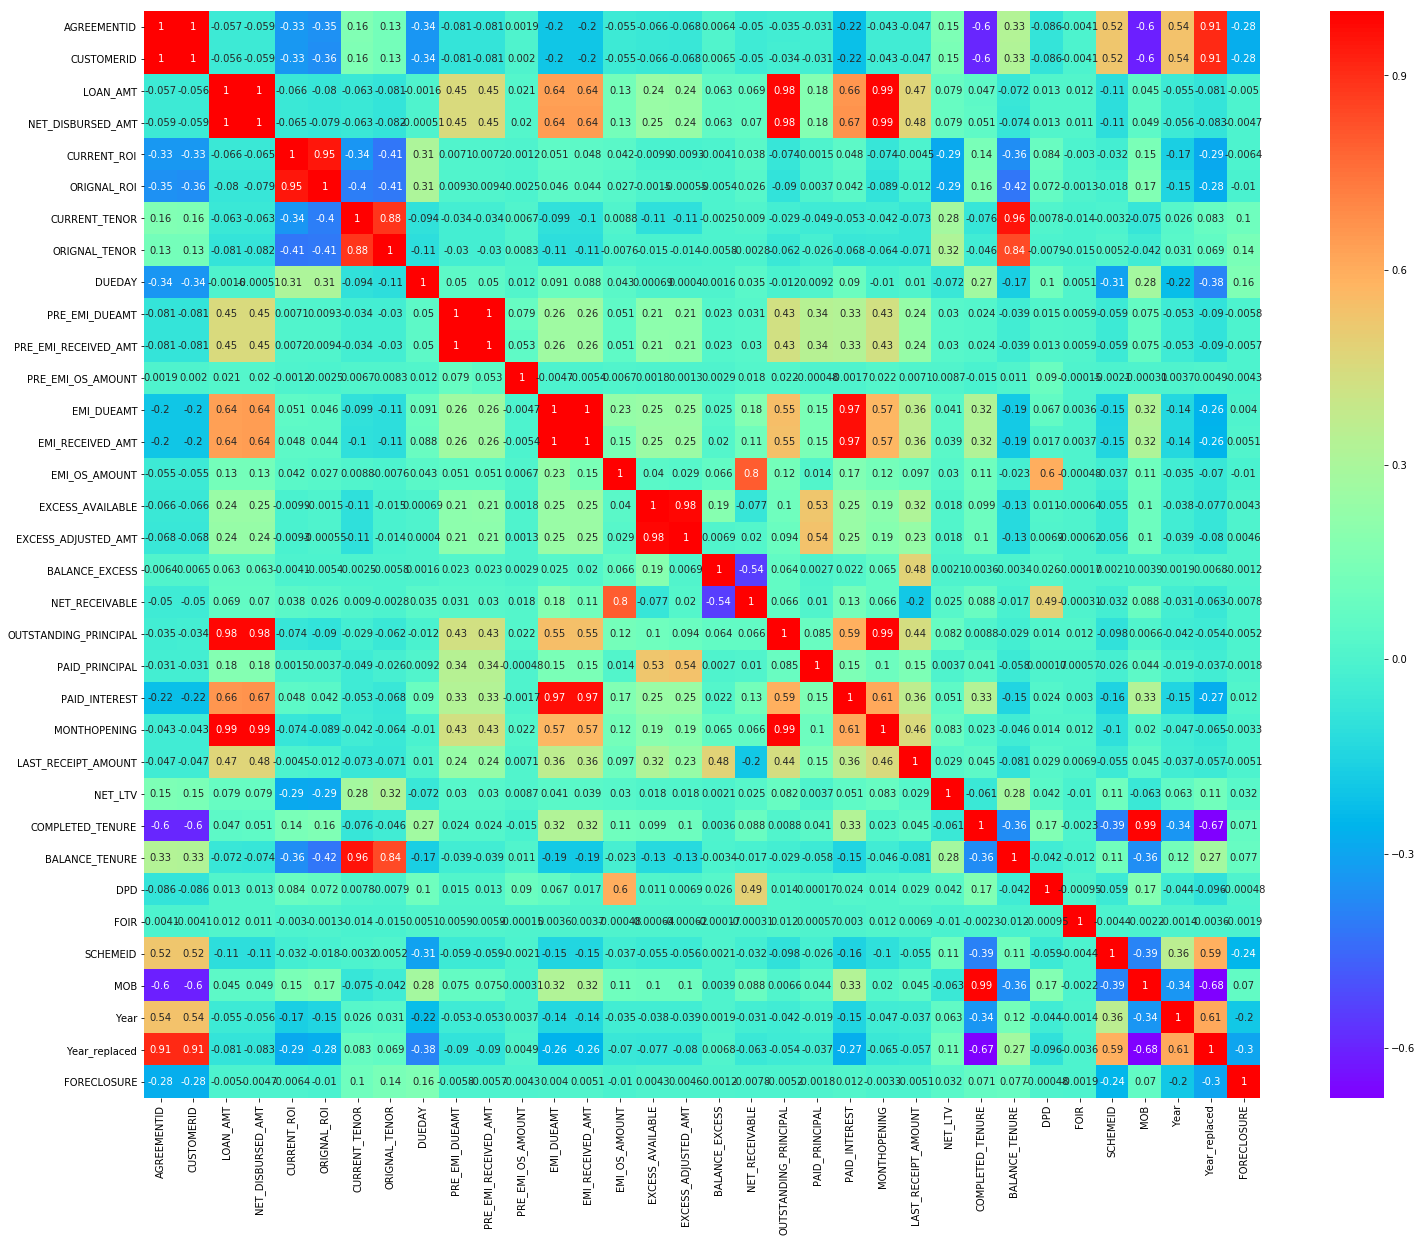

In [122]:
#lets check correlation
plt.figure(figsize=(25,20))
sns.heatmap(tran_train_merged.corr(), cmap = 'rainbow',annot = True, fmt  ='.2g')
plt.show()


In [124]:
tran_train_merged.shape,train_foreclosure.shape,test_foreclosure.shape

((624250, 39), (20012, 2), (13342, 2))

In [196]:
one_agreement = tran_train_merged[tran_train_merged['AGREEMENTID'] == 11220008].sort_values('LAST_RECEIPT_DATE', ascending = True)
one_agreement.head(20)

AGREEMENTID  CUSTOMERID  LOAN_AMT  NET_DISBURSED_AMT INTEREST_START_DATE  \
178     11220008    12001007  10022588           10022588          2010-10-06   
142     11220008    12001007  10022588           10022588          2010-10-06   
124     11220008    12001007  10022588           10022588          2010-10-06   
156     11220008    12001007  10022588           10022588          2010-10-06   
126     11220008    12001007  10022588           10022588          2010-10-06   
130     11220008    12001007  10022588           10022588          2010-10-06   
153     11220008    12001007  10022588           10022588          2010-10-06   
154     11220008    12001007  10022588           10022588          2010-10-06   
170     11220008    12001007  10022588           10022588          2010-10-06   
131     11220008    12001007  10022588           10022588          2010-10-06   
162     11220008    12001007  10022588           10022588          2010-10-06   
160     11220008    12001007  10022588           10022588          2010-10-06   
172     11220008    12001007  10022588           10022588          2010-10-06   
157     11220008    12001007  10022588           10022588          2010-10-06   
173     11220008    12001007  10022588           10022588          2010-10-06   
177     11220008    12001007  10022588           10022588          2010-10-06   
163     11220008    12001007  10022588           10022588          2010-10-06   
141     11220008    12001007  10022588           10022588          2010-10-06   
138     11220008    12001007  10022588           10022588          2010-10-06   
134     11220008    12001007  10022588           10022588          2010-10-06   

     CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  ORIGNAL_TENOR  DUEDAY  \
178           13           11            190            180       1   
142           14           11            194            180       1   
124           14           11            194            180       1   
156           13           11            190            180       1   
126           13           11            190            180       1   
130           13           11            190            180       1   
153           13           11            144            180       1   
154           13           11            144            180       1   
170           13           11            144            180       1   
131           13           11            144            180       1   
162           13           11            144            180       1   
160           13           11            144            180       1   
172           13           11            144            180       1   
157           13           11            144            180       1   
173           13           11            144            180       1   
177           13           11            144            180       1   
163           13           11            144            180       1   
141           13           11            144            180       1   
138           13           11            102            180       1   
134           13           11             91            180       1   

    AUTHORIZATIONDATE   CITY  PRE_EMI_DUEAMT  PRE_EMI_RECEIVED_AMT  \
178        1970-10-07  THANE           60322                 60322   
142        2010-10-06  THANE           60322                 60322   
124        2010-10-06  THANE           60322                 60322   
156        2010-10-06  THANE           60322                 60322   
126        2010-10-06  THANE           60322                 60322   
130        2010-10-06  THANE           60322                 60322   
153        2010-10-06  THANE           60322                 60322   
154        2010-10-06  THANE           60322                 60322   
170        2010-10-06  THANE           60322                 60322   
131        2010-10-06  THANE           60322                 60322   
162        2010-10-06  THANE           60

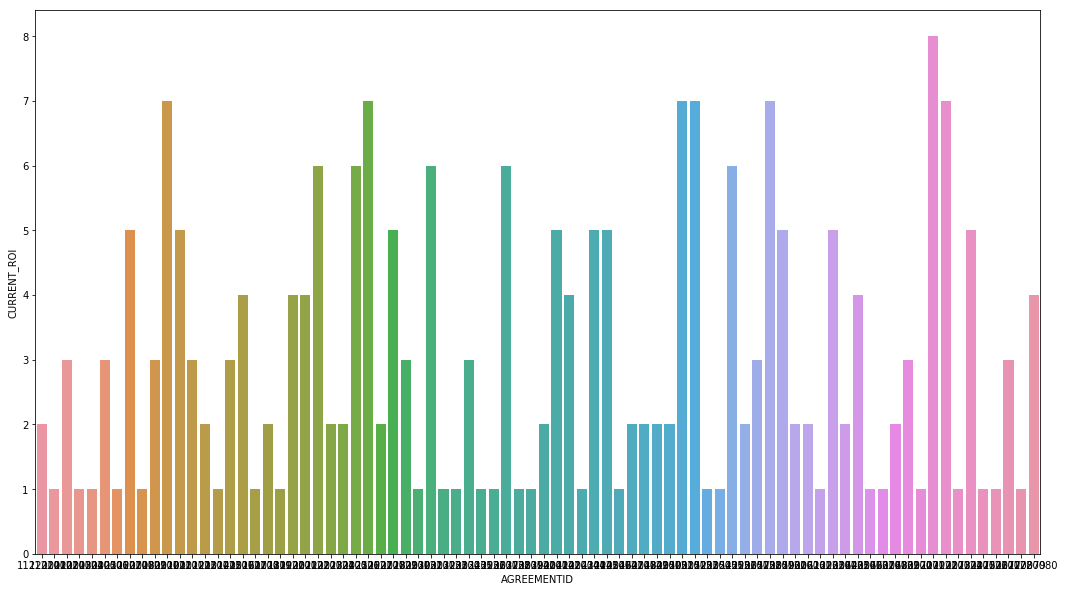

In [168]:
#checking current and original ROI
roi = tran_train_merged.groupby(['AGREEMENTID','ORIGNAL_ROI'])['CURRENT_ROI'].nunique().reset_index()
plt.figure(figsize=(18,10))
sns.barplot(x = 'AGREEMENTID',y = 'CURRENT_ROI', data=roi.head(80))
plt.show()

In [158]:
#if the roi always goes down
dum_1 = tran_train_merged[['CURRENT_ROI','ORIGNAL_ROI']].copy()
dum_1['Diff'] = pd.DataFrame(np.where(dum_1['CURRENT_ROI'] > dum_1['ORIGNAL_ROI'],1,0))
dum_1.sort_values('Diff',ascending = False)
dum_1.head(200)
# CURRENT ROI HAS GOOD MOVEMENT

CURRENT_ROI  ORIGNAL_ROI  Diff
0             14           11     1
1             13           11     1
2             13           11     1
3             13           11     1
4             13           11     1
5             13           11     1
6             14           11     1
7             14           11     1
8             17           12     1
9             17           12     1
10            17           12     1
11            17           12     1
12            17           12     1
13            17           12     1
14            17           12     1
15            17           12     1
16            17           12     1
17            17           12     1
18            17           12     1
19            17           12     1
20            17           12     1
21            17           12     1
22            17           12     1
23            17           12     1
24            17           12     1
25            17           12     1
26            17           12     1
27            17           12     1
28            17           12     1
29            17           12     1
30            17           12     1
31            17           12     1
32            17           12     1
33            17           12     1
34            17           12     1
35            17           12     1
36            17           12     1
37            17           12     1
38            17           12     1
39            17           12     1
40            17           12     1
41            17           12     1
42            17           12     1
43            17           12     1
44            17           12     1
45            17           12     1
46            17           12     1
47            17           12     1
48            17           12     1
49            17           12     1
50            17           12     1
51            17           12     1
52            17           12     1
53            17           12     1
54            17           12     1
55            17           12     1
56            17           12     1
57            17           12     1
58            16           11     1
59            17           12     1
60            17           12     1
61            17           12     1
62            17           12     1
63            17           12     1
64            17           12     1
65            17           12     1
66            17           12     1
67            17           12     1
68            16           12     1
69            16           12     1
70            16           12     1
71            16           12     1
72            16           12     1
73            16           12     1
74            16           12     1
75            16           12     1
76            16           12     1
77            16           12     1
78            16           12     1
79            16           12     1
80            16           12     1
81            16           12     1
82            16           12     1
83            16           12     1
84            16           12     1
85            16           12     1
86            16           12     1
87            16           12     1
88            16           12     1
89            16           12     1
90            16           12     1
91            16           12     1
92            16           12     1
93            16           12     1
94            16           12     1
95            16           12     1
96            16           12     1
97            16           12     1
98            16           12     1
99            16           12     1
100           16           12     1
101           16           12     1
102           16           12     1
103           16           12     1
104           16           12     1
105           16           12     1
106           16           12     1
107           16           12     1
108           16           12     1
109           16           12     1
110      

In [159]:
tran_train_merged['ROI_DIFF'] = tran_train_merged['ORIGNAL_ROI'] - tran_train_merged['CURRENT_ROI']  
tran_train_merged.head(2)

AGREEMENTID  CUSTOMERID  LOAN_AMT  NET_DISBURSED_AMT INTEREST_START_DATE  \
0     11220001    12001000  11710107           11710107          2010-08-30   
1     11220001    12001000  11710107           11710107          2010-08-30   

   CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  ORIGNAL_TENOR  DUEDAY  \
0           14           11             58            120       1   
1           13           11             58            120       1   

  AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  PRE_EMI_RECEIVED_AMT  \
0        2010-08-29  MUMBAI            7994                  7994   
1        2010-08-29  MUMBAI            7994                  7994   

   PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  EMI_OS_AMOUNT  \
0                  0     7516699           7332154         184544   
1                  0     7885787           7701243         184544   

   EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  NET_RECEIVABLE  \
0             29042                29042               0          184544   
1             29042                29042               0          184544   

   OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  MONTHOPENING  \
0                2262177         9447930        2617476       9338009   
1                2051797         9658311        2657989       9127629   

  LAST_RECEIPT_DATE  LAST_RECEIPT_AMOUNT  NET_LTV  COMPLETED_TENURE  \
0        2013-11-01                83559       40                39   
1        2014-01-01                83559       40                41   

   BALANCE_TENURE  DPD  FOIR PRODUCT  SCHEMEID  MOB  Year  Year_replaced  \
0              19    0     1      HL  10901100   39  2010           2010   
1              17    0     1      HL  10901100   41  2010           2010   

   FORECLOSURE  ROI_DIFF  
0            1        -3  
1            1        -3

In [172]:
#checking authorization
tran_train_merged[['AGREEMENTID' ,'INTEREST_START_DATE','AUTHORIZATIONDATE']].head(100)

AGREEMENTID INTEREST_START_DATE AUTHORIZATIONDATE
0      11220001          2010-08-30        2010-08-29
1      11220001          2010-08-30        2010-08-29
2      11220001          2010-08-30        1970-08-30
3      11220001          2010-08-30        2010-08-29
4      11220001          2010-08-30        2010-08-29
5      11220001          2010-08-30        2010-08-29
6      11220001          2010-08-30        2010-08-29
7      11220002          2010-09-15        2010-09-15
8      11220003          2010-09-06        2010-09-06
9      11220003          2010-09-06        2010-09-06
10     11220003          2010-09-06        2010-09-06
11     11220003          2010-09-06        2010-09-06
12     11220003          2010-09-06        2010-09-06
13     11220003          2010-09-06        2010-09-06
14     11220003          2010-09-06        2010-09-06
15     11220003          2010-09-06        2010-09-06
16     11220003          2010-09-06        2010-09-06
17     11220003          2010-09-06        2010-09-06
18     11220003          2010-09-06        2010-09-06
19     11220003          2010-09-06        2010-09-06
20     11220003          2010-09-06        2010-09-06
21     11220003          2010-09-06        2010-09-06
22     11220003          2010-09-06        2010-09-06
23     11220003          2010-09-06        2010-09-06
24     11220003          2010-09-06        2010-09-06
25     11220003          2010-09-06        2010-09-06
26     11220003          2010-09-06        1970-09-07
27     11220003          2010-09-06        2010-09-06
28     11220003          2010-09-06        2010-09-06
29     11220003          2010-09-06        2010-09-06
30     11220003          2010-09-06        2010-09-06
31     11220003          2010-09-06        2010-09-06
32     11220003          2010-09-06        2010-09-06
33     11220003          2010-09-06        2010-09-06
34     11220003          2010-09-06        2010-09-06
35     11220003          2010-09-06        2010-09-06
36     11220003          2010-09-06        2010-09-06
37     11220003          2010-09-06        2010-09-06
38     11220003          2010-09-06        2010-09-06
39     11220003          2010-09-06        2010-09-06
40     11220003          2010-09-06        2010-09-06
41     11220003          2010-09-06        2010-09-06
42     11220003          2010-09-06        2010-09-06
43     11220003          2010-09-06        2010-09-06
44     11220003          2010-09-06        2010-09-06
45     11220003          2010-09-06        2010-09-06
46     11220003          2010-09-06        2010-09-06
47     11220003          2010-09-06        2010-09-06
48     11220003          2010-09-06        2010-09-06
49     11220003          2010-09-06        2010-09-06
50     11220003          2010-09-06        2010-09-06
51     11220003          2010-09-06        2010-09-06
52     11220003          2010-09-06        2010-09-06
53     11220003          2010-09-06        2010-09-06
54     11220003          2010-09-06        2010-09-06
55     11220003          2010-09-06        2010-09-06
56     11220003          2010-09-06        2010-09-06
57     11220003          2010-09-06        2010-09-06
58     11220004          2010-09-29        2010-09-29
59     11220005          2010-09-06        2010-09-06
60     11220005          2010-09-06        2010-09-06
61     11220005          2010-09-06        2010-09-06
62     11220005          2010-09-06        1970-09-07
63     11220005          2010-09-06        2010-09-06
64     11220005          2010-09-06        2010-09-06
65     11220005          2010-09-06        2010-09-06
66     11220005          2010-09-06        2010-09-06
67     11220005          2010-09-06        2010-09-06
68     11220006          2010-11-01        2010-11-02
69     11220006          2010-11-01        2010-11-02
70     11220006          2010-11-01        2010-11-02
71     11220006          2010-11-01        2010-11-02
72     11220006          2010-11-01        2010-11-02
73     1

In [191]:
tran_train_merged['PRE_EMI_OS_AMOUNT'].value_counts()

0          622997
118056         41
340166         28
422674         28
189486         28
75840          15
77015          11
88344          10
20440           8
5932            6
79868           5
30633           5
26103           5
69145           5
44414           4
3737            4
65892           4
451697          4
16427           4
157253          4
8788            4
2688            4
24641           3
13390           3
6268            3
654             3
30920           3
418558          3
3099            3
22207           3
35061           3
146427          3
3534            3
21988           3
842594          3
14751           3
42309           3
17607           3
7178            3
86              3
55141           3
46947           2
91              2
31037           2
23112           2
84              2
7542            2
1917            2
88254           2
3951            2
32737           2
2993            2
5378            2
39144           2
23729           2
6177      

In [209]:
tran_train_merged['LAST_RECEIPT_DATE']= pd.to_datetime(tran_train_merged['LAST_RECEIPT_DATE'])
diff_principal_paid = tran_train_merged.sort_values('LAST_RECEIPT_DATE').groupby('AGREEMENTID').tail(1)
diff_principal_paid.head(10)

AGREEMENTID  CUSTOMERID  LOAN_AMT  NET_DISBURSED_AMT  \
9183       11220296    12001295  45038874           45038874   
6612       11220215    12001214  12010366           12010366   
29726      11220942    12001941   4503887            4503887   
36333      11221143    12002142   2540431            2540431   
33613      11221061    12002060   1726209            1726209   
93174      11222712    12003711    864746             864746   
105910     11223028    12004027   7318817            7318817   
8495       11220274    12001273   4189875            4189875   
6611       11220214    12001213  18015550           18015550   
10545      11220343    12001342    450389             450389   

       INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
9183            2011-09-29           17           16             61   
6612            2011-08-10           18           16             63   
29726           2012-07-06           18           17             49   
36333           2012-08-17           18           17            204   
33613           2012-08-17           16           15            200   
93174           2013-11-20           13           13            240   
105910          2014-01-31           14           14            240   
8495            2011-09-26           14           13            268   
6611            2011-08-10           18           16             63   
10545           2011-10-24           16           15            197   

        ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE       CITY  PRE_EMI_DUEAMT  \
9183               60      15        2011-09-29       PUNE          375454   
6612               60       5        2011-08-10       PUNE          147054   
29726              48       5        2012-07-06     MUMBAI               0   
36333             180       5        2012-08-17     MUMBAI           81438   
33613             180       5        2012-08-17     MUMBAI           16085   
93174             240       5        2013-11-20      SURAT               0   
105910            240       5        2014-01-31  AHMEDABAD               0   
8495              240       1        2011-09-27      THANE            8989   
6611               60       5        2011-08-10       PUNE          244045   
10545             180       1        2011-10-24      THANE            1804   

        PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  \
9183                  375454                  0    37476919          29981535   
6612                  147054                  0    11193127           8394845   
29726                      0                  0     3049774           2938648   
36333                  81438                  0      582263            533741   
33613                  16085                  0      487648            457170   
93174                      0                  0           0                 0   
105910                     0                  0           0                 0   
8495                    8989                  0     1600016           1538477   
6611                  244045                  0    16190029          12619028   
10545                   1804                  0      201475            193416   

        EMI_OS_AMOUNT  EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  \
9183          7495384                 0                    0               0   
6612          2798282                 0                    0               0   
29726          111126                 0                    0               0   
36333           48522                 0                    0               0   
33613           30478                 0                    0               0   
93174               0                 0                    0               0   
105910              0                 0                    0               0   
8495            61539                 0                    0               0   
6611          3571001             48059           

In [223]:
#checking LTV
ltv = pd.DataFrame(tran_train_merged.groupby('AGREEMENTID')['NET_LTV'].nunique()).reset_index().sort_values('NET_LTV', ascending = False)
ltv['NET_LTV'].value_counts()
#print(ltv.head(2))


       AGREEMENTID  NET_LTV
10433     11230434        2
11497     11231498        2


AGREEMENTID  CUSTOMERID  LOAN_AMT  NET_DISBURSED_AMT  \
380375     11231498    12012497   1576361            1409552   
380376     11231498    12012497   1576361            1576361   
380377     11231498    12012497   1576361            1576361   
380378     11231498    12012497   1576361            1576361   
380379     11231498    12012497   1576361            1576361   
380380     11231498    12012497   1576361            1576361   
380381     11231498    12012497   1576361            1576361   
380382     11231498    12012497   1576361            1576361   
380383     11231498    12012497   1576361            1576361   
380384     11231498    12012497   1576361            1576361   
380385     11231498    12012497   1576361            1576361   
380386     11231498    12012497   1576361            1109292   
380387     11231498    12012497   1576361            1109292   
380388     11231498    12012497   1576361            1576361   
380389     11231498    12012497   1576361            1576361   
380390     11231498    12012497   1576361            1576361   
380391     11231498    12012497   1576361            1576361   
380392     11231498    12012497   1576361            1576361   
380393     11231498    12012497   1576361            1576361   
380394     11231498    12012497   1576361            1109292   
380395     11231498    12012497   1576361            1576361   
380396     11231498    12012497   1576361            1576361   
380397     11231498    12012497   1576361            1409552   
380398     11231498    12012497   1576361            1576361   
380399     11231498    12012497   1576361            1576361   
380400     11231498    12012497   1576361            1576361   
380401     11231498    12012497   1576361            1576361   
380402     11231498    12012497   1576361            1576361   

       INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
380375          2016-09-30           18           18            180   
380376          2016-09-30           18           18            180   
380377          2016-09-30           18           18            180   
380378          2016-09-30           18           18            180   
380379          2016-09-30           18           18            180   
380380          2016-09-30           18           18            180   
380381          2016-09-30           18           18            180   
380382          2016-09-30           18           18            180   
380383          2016-09-30           18           18            180   
380384          2016-09-30           18           18            180   
380385          2016-09-30           18           18            180   
380386          2016-09-30           18           18            180   
380387          2016-09-30           18           18            180   
380388          2016-09-30           18           18            180   
380389          2016-09-30           18           18            180   
380390          2016-09-30           18           18            180   
380391          2016-09-30           18           18            180   
380392          2016-09-30           18           18            180   
380393          2016-09-30           18           18            180   
380394          2016-09-30           18           18            180   
380395          2016-09-30           18           18            180   
380396          2016-09-30           18           18            180   
380397          2016-09-30           18           18            180   
380398          2016-09-30           18           18            180   
380399          2016-09-30           18           18            180   
380400          2016-09-30           18           18            180   
380401          2016-09-30           18           18            180   
380402          2016-09-30           18           18            180   

        ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE     CITY  PRE_EMI_DUEAMT  \
380375         

In [227]:
tran_train_merged['PRODUCT'].value_counts()

STHL     216841
LAP      201565
HL       114025
STLAP     91819
Name: PRODUCT, dtype: int64

In [228]:
tran_train_merged['SCHEMEID'].value_counts()

10901104    84765
10901112    67321
10901106    45703
10901113    26722
10901287    26284
10901295    23083
10901154    18449
10901291    18183
10901285    17771
10901134    16782
10901267    16480
10901300    15910
10901289    15453
10901298    15185
10901121    12238
10901222    11114
10901147     9566
10901290     9388
10901103     8366
10901294     8275
10901251     7212
10901265     6441
10901207     6185
10901242     5823
10901288     5796
10901292     5377
10901249     4990
10901234     4465
10901115     4069
10901114     3584
10901284     3559
10901261     3227
10901256     3205
10901148     3189
10901303     2969
10901226     2846
10901307     2758
10901142     2704
10901266     2657
10901337     2532
10901264     2371
10901125     2342
10901343     2228
10901340     2011
10901126     1921
10901293     1915
10901231     1827
10901111     1572
10901310     1479
10901150     1422
10901195     1372
10901309     1224
10901330     1214
10901240     1209
10901376     1198
10901155  

In [229]:
tran_train_merged['MOB'].value_counts()
#not making sense

0     30616
1     29693
2     29029
3     28424
4     27492
5     26286
6     25271
7     24067
8     22860
9     21938
10    20277
11    18987
12    17751
13    16411
14    15296
15    14443
16    13548
17    12728
18    11996
19    11276
20    10903
21    10485
22     9911
23     9464
24     9095
25     8742
26     8439
27     8104
28     7688
29     7325
30     6893
31     6511
32     6213
33     5926
34     5546
35     5234
36     4927
37     4633
38     4432
39     4197
40     3961
41     3744
42     3534
43     3359
44     3183
45     3035
46     2849
47     2675
48     2522
49     2361
50     2243
51     2096
52     1966
53     1848
54     1718
55     1603
56     1471
57     1404
58     1276
59     1173
60     1082
61     1006
62      933
63      867
64      811
65      766
66      723
67      673
68      611
69      576
70      519
71      481
72      450
73      423
74      381
75      351
76      325
77      294
78      273
79      254
80      231
81      211
82      171
83  

In [9]:
train_test_merge = pd.concat([train_foreclosure,test_foreclosure], axis = 0)
final_df_24th    = train_test_merge.copy() 
train_test_merge.shape,final_df_24th.shape

((33354, 2), (33354, 2))

## Creating initial Master Data

In [10]:
print(tran_train_merged['CUSTOMERID'].nunique())
print(tran_train_merged['AGREEMENTID'].nunique())
#some people have taken multiple loans

#parsing customer IDs to master
m_cust = tran_train_merged.groupby('AGREEMENTID')['CUSTOMERID'].unique().str[0]
m_cust = pd.DataFrame(m_cust).reset_index()
m_cust.head(1)
print(m_cust.shape)
final_df_24th = pd.merge(final_df_24th,m_cust,left_on = 'AGREEMENTID',right_on = 'AGREEMENTID', how = 'left' )
final_df_24th.shape

32895
33354
(33354, 2)


(33354, 3)

In [11]:
final_df_24th.isnull().sum()

AGREEMENTID        0
FORECLOSURE    13342
CUSTOMERID       459
dtype: int64

In [12]:
tran_train_merged.isnull().sum().head(4)

AGREEMENTID            0
CUSTOMERID           516
LOAN_AMT               0
NET_DISBURSED_AMT      0
dtype: int64

In [13]:
missing_tran_cust = tran_train_merged[pd.isnull(tran_train_merged['CUSTOMERID'])]
print(missing_tran_cust['AGREEMENTID'].nunique())
missing_tran_cust

459


AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
622936     11252411         nan  1411425.23         1411425.23   
622937     11252411         nan  1411425.23         1411425.23   
622938     11252412         nan  2781796.03         2781796.03   
622939     11252412         nan  2781796.03         2781796.03   
622940     11252412         nan  2781796.03         2781796.03   
623549     11252718         nan  1201036.64         1201036.64   
623550     11252718         nan  1201036.64         1201036.64   
623551     11252719         nan  3727544.82         3727544.82   
623552     11252719         nan  3727544.82         3727544.82   
623553     11252720         nan  1501295.80         1501295.80   
623554     11252720         nan  1501295.80         1501295.80   
623555     11252721         nan  1606386.51          983769.11   
623556     11252721         nan  1606386.51          983769.11   
623557     11252722         nan  3852325.02         3852325.02   
623558     11252722         nan  3852325.02         3852325.02   
623559     11252723         nan  1651425.38         1651425.38   
623560     11252723         nan  1651425.38         1651425.38   
623561     11252724         nan  3753239.50         3753239.50   
623562     11252724         nan  3753239.50         3753239.50   
623563     11252725         nan  4503887.40         4503887.40   
623564     11252725         nan  4503887.40         4503887.40   
623565     11252726         nan  3753239.50         3753239.50   
623566     11252726         nan  3753239.50         3753239.50   
623567     11252727         nan  2251943.70         2251943.70   
623568     11252727         nan  2251943.70         2251943.70   
623569     11252728         nan   765660.86          765660.86   
623570     11252728         nan   765660.86          765660.86   
623571     11252729         nan  2251943.70         1501295.80   
623572     11252729         nan  2251943.70         1890221.49   
623573     11252730         nan  3401970.81         2219410.62   
623574     11252730         nan  3401970.81         2219410.62   
623575     11252731         nan  3527872.48         3527872.48   
623576     11252731         nan  3527872.48         3527872.48   
623577     11252732         nan   687593.48          687593.48   
623578     11252732         nan   687593.48          687593.48   
623579     11252733         nan  2055326.50         2055326.50   
623580     11252733         nan  2055326.50         2055326.50   
623581     11252734         nan  4501908.69         4501908.69   
623582     11252734         nan  4501908.69         4501908.69   
623583     11252735         nan   923296.92          923296.92   
623584     11252735         nan   923296.92          923296.92   
623585     11252736         nan  1591110.82         1204677.28   
623586     11252736         nan  1591110.82         1204677.28   
623587     11252737         nan  1238569.04         1238569.04   
623588     11252737         nan  1238569.04         1238569.04   
623589     11252738         nan   975842.27          975842.27   
623590     11252738         nan   975842.27          975842.27   
623591     11252739         nan  1092991.38         1092991.38   
623592     11252739         nan  1092991.38         1092991.38   
623593     11252740         nan  4478365.37         4478365.37   
623594     11252740         nan  4478365.37         4478365.37   
623595     11252741         nan   193423.95          193423.95   
623596     11252741         nan   193423.95          193423.95   
623597     11252742         nan  3753239.50         3753239.50   
623598     11252742         nan  3753239.50         3753239.50   
623599     11252743         nan  1501295.80         1501295.80   
623600     11252743         nan  1501295.80         1501295.80   
623601     11252744         nan  1870398.38         1555126.26   
623602     11252744         nan  1870398.38         1555126.26   
623603     11252745         nan  2486145.84     

In [14]:
customer_1 = tran_train_merged[tran_train_merged['AGREEMENTID'] == 11252411]
customer_1
customer_1 = tran_train_merged[tran_train_merged['AGREEMENTID'] == 11252412]
customer_1
customer_1 = tran_train_merged[tran_train_merged['AGREEMENTID'] == 11253083]
customer_1 
#cant do anything

AGREEMENTID  CUSTOMERID   LOAN_AMT  NET_DISBURSED_AMT  \
623968     11253083         nan 3152721.18         3152721.18   

       INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
623968          2018-12-31        20.54        20.54         180.00   

        ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE           CITY  \
623968            180       5        2018-12-31  WEST GODAVARI   

        PRE_EMI_DUEAMT  PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  \
623968            0.00                  0.00               0.00        0.00   

        EMI_RECEIVED_AMT  EMI_OS_AMOUNT  EXCESS_AVAILABLE  \
623968              0.00           0.00              0.00   

        EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  NET_RECEIVABLE  \
623968                 0.00            0.00            0.00   

        OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  MONTHOPENING  \
623968             3152721.18            0.00           0.00    3152721.18   

       LAST_RECEIPT_DATE  LAST_RECEIPT_AMOUNT  NET_LTV  COMPLETED_TENURE  \
623968        2018-12-29             31270.00    66.79                 0   

        BALANCE_TENURE  DPD  FOIR PRODUCT  SCHEMEID NPA_IN_LAST_MONTH  \
623968          180.00 0.00  0.37    STHL       nan               NaN   

       NPA_IN_CURRENT_MONTH  MOB  Year  Year_replaced  FORECLOSURE  
623968                  NaN    0  2018        2018.00         0.00

In [15]:
tran_train_merged.head(20)

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
0      11220001 12001000.00 11710107.24        11710107.24   
1      11220001 12001000.00 11710107.24        11710107.24   
2      11220001 12001000.00 11710107.24        11710107.24   
3      11220001 12001000.00 11710107.24        11710107.24   
4      11220001 12001000.00 11710107.24        11710107.24   
5      11220001 12001000.00 11710107.24        11710107.24   
6      11220001 12001000.00 11710107.24        11710107.24   
7      11220002 12001001.00 19290253.32        19290253.32   
8      11220003 12001002.00  4053498.66         4053498.66   
9      11220003 12001002.00  4053498.66         4053498.66   
10     11220003 12001002.00  4053498.66         4053498.66   
11     11220003 12001002.00  4053498.66         4053498.66   
12     11220003 12001002.00  4053498.66         4053498.66   
13     11220003 12001002.00  4053498.66         4053498.66   
14     11220003 12001002.00  4053498.66         4053498.66   
15     11220003 12001002.00  4053498.66         4053498.66   
16     11220003 12001002.00  4053498.66         4053498.66   
17     11220003 12001002.00  4053498.66         4053498.66   
18     11220003 12001002.00  4053498.66         4053498.66   
19     11220003 12001002.00  4053498.66         4053498.66   

   INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
0           2010-08-30        13.42        10.61          45.00   
1           2010-08-30        13.42        10.61          58.00   
2           2010-08-30        13.42        10.61          58.00   
3           2010-08-30        13.42        10.61          58.00   
4           2010-08-30        13.42        10.61          58.00   
5           2010-08-30        13.73        10.61          58.00   
6           2010-08-30        13.73        10.61          58.00   
7           2010-09-15        13.73        10.61         137.00   
8           2010-09-06        16.54        12.49         311.00   
9           2010-09-06        16.54        12.49         311.00   
10          2010-09-06        16.54        12.49         311.00   
11          2010-09-06        16.54        12.49         311.00   
12          2010-09-06        16.54        12.49         311.00   
13          2010-09-06        16.54        12.49         311.00   
14          2010-09-06        16.54        12.49         311.00   
15          2010-09-06        16.54        12.49         311.00   
16          2010-09-06        16.54        12.49         311.00   
17          2010-09-06        16.86        12.49         329.00   
18          2010-09-06        16.86        12.49         329.00   
19          2010-09-06        16.86        12.49         329.00   

    ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  \
0             120       1        2010-08-29  MUMBAI         7994.27   
1             120       1        2010-08-29  MUMBAI         7994.27   
2             120       1        2010-08-29  MUMBAI         7994.27   
3             120       1        1970-08-30  MUMBAI         7994.27   
4             120       1        2010-08-29  MUMBAI         7994.27   
5             120       1        2010-08-29  MUMBAI         7994.27   
6             120       1        2010-08-29  MUMBAI         7994.27   
7             180       1        2010-09-15  MUMBAI       100504.58   
8             180       5        2010-09-06  MUMBAI            0.00   
9             180       5        2010-09-06  MUMBAI            0.00   
10            180       5        2010-09-06  MUMBAI            0.00   
11            180       5        2010-09-06  MUMBAI            0.00   
12            180       5        2010-09-06  MUMBAI            0.00   
13            180       5        2010-09-06  MUMBAI            0.00   
14            180       5        2010-09-06  MUMBAI            0.00   
15            180       5        2010-09-06  MUMBAI            0.00   
16            180       5        2010-09-06  MUMBAI            0.00   
17            1

In [11]:
#parsing Loan Amount
loan_amount = pd.DataFrame(tran_train_merged.groupby('AGREEMENTID')['LOAN_AMT'].mean()).reset_index()
print(loan_amount.shape)
#merge
final_df_24th = pd.merge(final_df_24th,loan_amount, on = 'AGREEMENTID', how = 'left')
print(final_df_24th.shape)
final_df_24th.head(10)

(33354, 2)
(33354, 4)


AGREEMENTID  FORECLOSURE  CUSTOMERID    LOAN_AMT
0     11220001         1.00 12001000.00 11710107.24
1     11220002         1.00 12001001.00 19290253.32
2     11220006         1.00 12001005.00  3933395.00
3     11220008         1.00 12001007.00 10022587.71
4     11220010         1.00 12001009.00  7755937.31
5     11220011         0.00 12001010.00   954408.27
6     11220012         0.00 12001011.00  6605701.52
7     11220014         1.00 12001013.00 32960335.26
8     11220016         1.00 12001015.00  8407256.48
9     11220017         0.00 12001016.00   975842.27

In [12]:
#parsing start loan date
tran_train_merged['INTEREST_START_DATE'] = pd.to_datetime(tran_train_merged['INTEREST_START_DATE'])
m_start_date  = tran_train_merged.sort_values('INTEREST_START_DATE', ascending = True).groupby('AGREEMENTID').tail(1)
m_start_date  = m_start_date[['AGREEMENTID','INTEREST_START_DATE']]

final_df_24th = pd.merge(final_df_24th,m_start_date,  on = 'AGREEMENTID', how = 'left')
final_df_24th.shape


(33354, 5)

In [13]:
m_roi = tran_train_merged.groupby('AGREEMENTID')[['CURRENT_ROI','ORIGNAL_ROI']].mean().reset_index()
m_roi['diff_roi']   = m_roi['CURRENT_ROI']-m_roi['ORIGNAL_ROI']
m_roi['percent_roi']= m_roi['diff_roi']/m_roi['CURRENT_ROI']*100
m_roi = m_roi[['AGREEMENTID','diff_roi','percent_roi']]

final_df_24th = pd.merge(final_df_24th,m_roi,on = 'AGREEMENTID', how = 'left')
final_df_24th.shape

(33354, 7)

In [14]:
#city
from statistics import mode
#m_city  = pd.DataFrame(tran_train_merged.groupby('AGREEMENTID')['CITY'].nunique()).reset_index().sort_values('CITY',ascending = False)
m_city  = pd.DataFrame(tran_train_merged.groupby('AGREEMENTID')['CITY'].apply(lambda x: x.mode()))
m_city  = pd.DataFrame(m_city.groupby('AGREEMENTID')['CITY'].head(1)).reset_index()
m_city  = m_city[['AGREEMENTID','CITY']]
print(m_city.shape)
m_city.head(2)

#parsing into master 
final_df_24th = pd.merge(final_df_24th,m_city, on = 'AGREEMENTID', how = 'left')
final_df_24th.shape

(33354, 2)


(33354, 8)

In [20]:
tran_train_merged[tran_train_merged['AGREEMENTID'] == 11220001]

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT INTEREST_START_DATE  \
0     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   
1     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   
2     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   
3     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   
4     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   
5     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   
6     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   

   CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  ORIGNAL_TENOR  DUEDAY  \
0        13.42        10.61          45.00            120       1   
1        13.42        10.61          58.00            120       1   
2        13.42        10.61          58.00            120       1   
3        13.42        10.61          58.00            120       1   
4        13.42        10.61          58.00            120       1   
5        13.73        10.61          58.00            120       1   
6        13.73        10.61          58.00            120       1   

  AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  PRE_EMI_RECEIVED_AMT  \
0        2010-08-29  MUMBAI         7994.27               7994.27   
1        2010-08-29  MUMBAI         7994.27               7994.27   
2        2010-08-29  MUMBAI         7994.27               7994.27   
3        1970-08-30  MUMBAI         7994.27               7994.27   
4        2010-08-29  MUMBAI         7994.27               7994.27   
5        2010-08-29  MUMBAI         7994.27               7994.27   
6        2010-08-29  MUMBAI         7994.27               7994.27   

   PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  EMI_OS_AMOUNT  \
0               0.00  8614898.28        8439420.50      175477.78   
1               0.00  8439420.50        8254876.10      184544.40   
2               0.00  8254876.10        8070331.70      184544.40   
3               0.00  7885787.31        7885787.31           0.00   
4               0.00  7885787.31        7701242.91      184544.40   
5               0.00  7701242.91        7516698.51      184544.40   
6               0.00  7516698.51        7332154.12      184544.40   

   EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  NET_RECEIVABLE  \
0         213586.86            213586.86            0.00       175477.78   
1         213586.86            213586.86            0.00       184544.40   
2         213586.86            213586.86            0.00       184544.40   
3          29042.46             29042.46            0.00            0.00   
4          29042.46             29042.46            0.00       184544.40   
5          29042.46             29042.46            0.00       184544.40   
6          29042.46             29042.46            0.00       184544.40   

   OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  MONTHOPENING  \
0              116447.23     11593660.01     2725722.88    8693575.33   
1             1727712.37      9982394.87     2710245.45    8803544.67   
2             1836705.34      9873401.90     2693791.64    8912537.64   
3             1944730.57      9765376.67     2676370.10    9020562.87   
4             2051796.66      9658310.58     2657989.42    9127628.96   
5             2157466.66      9552640.58     2638212.64    9233298.96   
6             2262176.82      9447930.42     2617476.02    9338009.12   

  LAST_RECEIPT_DATE  LAST_RECEIPT_AMOUNT  NET_LTV  COMPLETED_TENURE  \
0        2014-05-05           1000000.00    40.06                45   
1        2014-04-01             83559.00    40.06                44   
2        2014-03-01             83559.00    40.06                43   
3        1974-02-02             83559.00    40.06                41   
4        2014-01-01             83559.00    40.06                41   
5        2013-12-01             83559.00    40.06                40   
6   

In [15]:
#pre_emi_os_amt
m_pre_emi_os  = tran_train_merged.sort_values('LAST_RECEIPT_DATE', ascending = True).groupby('AGREEMENTID').tail(1)
m_pre_emi_os.tail(20)
m_pre_emi_os = m_pre_emi_os[['AGREEMENTID','PRE_EMI_OS_AMOUNT']]
print(m_pre_emi_os.shape)
#parsing os ROI
final_df_24th = pd.merge(final_df_24th, m_pre_emi_os, on = 'AGREEMENTID', how = 'left')
final_df_24th.shape


(33354, 2)


(33354, 9)

In [16]:
#princi paid
m_paid_princi  = tran_train_merged.sort_values('LAST_RECEIPT_DATE', ascending = True).groupby('AGREEMENTID').tail(1)
m_paid_princi.tail(20)

m_paid_princi = m_paid_princi[['AGREEMENTID','PAID_PRINCIPAL']]
print(m_paid_princi.shape)

#parsing paid_princi to master

final_df_24th = pd.merge(final_df_24th,m_paid_princi, on = 'AGREEMENTID', how = 'left')
final_df_24th['percent_princi_paid'] =  (final_df_24th['PAID_PRINCIPAL'] / final_df_24th['LOAN_AMT'])*100
final_df_24th.shape

(33354, 2)


(33354, 11)

In [17]:
#duration since loan
m_duration  = tran_train_merged.sort_values('LAST_RECEIPT_DATE', ascending = True).groupby('AGREEMENTID').tail(1)
m_duration.head(20)

m_duration['days_since_loan'] = m_duration['LAST_RECEIPT_DATE'] - m_duration['INTEREST_START_DATE']
m_duration = m_duration[['AGREEMENTID','days_since_loan']] 
m_duration.shape
#parsing days to master

final_df_24th = pd.merge(final_df_24th,m_duration, on = 'AGREEMENTID', how = 'left')
final_df_24th.shape

(33354, 12)

In [24]:
x = tran_train_merged[tran_train_merged['AGREEMENTID'] == 11220005]
x

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
59     11220005 12001004.00 13211403.04        13211403.04   
60     11220005 12001004.00 13211403.04        13211403.04   
61     11220005 12001004.00 13211403.04        13211403.04   
62     11220005 12001004.00 13211403.04        13211403.04   
63     11220005 12001004.00 13211403.04        13211403.04   
64     11220005 12001004.00 13211403.04        13211403.04   
65     11220005 12001004.00 13211403.04        13211403.04   
66     11220005 12001004.00 13211403.04        13211403.04   
67     11220005 12001004.00 13211403.04        13211403.04   

   INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
59          2010-09-06        16.54        11.86         142.00   
60          2010-09-06        16.54        11.86         142.00   
61          2010-09-06        16.54        11.86         142.00   
62          2010-09-06        16.54        11.86         142.00   
63          2010-09-06        16.54        11.86         142.00   
64          2010-09-06        16.54        11.86         142.00   
65          2010-09-06        16.54        11.86         142.00   
66          2010-09-06        16.54        11.86         142.00   
67          2010-09-06        16.54        11.86         142.00   

    ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  \
59            180       5        2010-09-06  MUMBAI            0.00   
60            180       5        2010-09-06  MUMBAI            0.00   
61            180       5        2010-09-06  MUMBAI            0.00   
62            180       5        2010-09-06  MUMBAI            0.00   
63            180       5        2010-09-06  MUMBAI            0.00   
64            180       5        1970-09-07  MUMBAI            0.00   
65            180       5        2010-09-06  MUMBAI            0.00   
66            180       5        2010-09-06  MUMBAI            0.00   
67            180       5        2010-09-06  MUMBAI            0.00   

    PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  \
59                  0.00               0.00  9335619.98        9335619.98   
60                  0.00               0.00  9132671.72        9132671.72   
61                  0.00               0.00  8929723.46        8929723.46   
62                  0.00               0.00  8726775.20        8726775.20   
63                  0.00               0.00  8523826.94        8523826.94   
64                  0.00               0.00  8320878.68        8320878.68   
65                  0.00               0.00  8117930.42        8117930.42   
66                  0.00               0.00  7914982.15        7914982.15   
67                  0.00               0.00  7712033.89        7712033.89   

    EMI_OS_AMOUNT  EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  \
59           0.00         202948.26            202948.26            0.00   
60           0.00         202948.26            202948.26            0.00   
61           0.00         202948.26            202948.26            0.00   
62           0.00         202948.26            202948.26            0.00   
63           0.00         202948.26            202948.26            0.00   
64           0.00              0.00                 0.00            0.00   
65           0.00              0.00                 0.00            0.00   
66           0.00              0.00                 0.00            0.00   
67           0.00              0.00                 0.00            0.00   

    NET_RECEIVABLE  OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  \
59            0.00             8110480.61      5100922.43     4547953.72   
60            0.00             8158355.43      5053047.61     4457871.47   
61            0.00             8205707.82      5005695.22     4367266.78   
62            0.00             8252543.07      4958859.97     4276144.96   
63            0.00             8298866.83      4912536.21     4184511.64   
64           

In [18]:
#NET_LTV
m_LTV = tran_train_merged.groupby('AGREEMENTID')['NET_LTV'].apply(lambda x:x.mode()).reset_index()
m_LTV = m_LTV[['AGREEMENTID','NET_LTV']]
m_LTV.shape
#parsing LTV to master
final_df_24th = pd.merge(final_df_24th,m_LTV,on = 'AGREEMENTID', how = 'left')
final_df_24th.shape

(33354, 13)

In [19]:
#FOIR
m_FOIR = tran_train_merged.groupby('AGREEMENTID')['FOIR'].apply(lambda x:x.mode()).reset_index()
m_FOIR = m_FOIR[['AGREEMENTID','FOIR']]
m_FOIR.shape
#parsing FOIR to master
final_df_24th = pd.merge(final_df_24th,m_FOIR,on = 'AGREEMENTID', how = 'left')
final_df_24th.shape

(33354, 14)

In [20]:
#product
m_product = tran_train_merged.groupby('AGREEMENTID')['PRODUCT'].apply(lambda x:x.mode()).reset_index()
m_product = m_product[['AGREEMENTID','PRODUCT']]
m_product.shape
#parsing LTV to master
final_df_24th = pd.merge(final_df_24th,m_product,on = 'AGREEMENTID', how = 'left')
final_df_24th.shape

(33354, 15)

In [246]:
#SCHEMEID
#product
#m_SHEME = tran_train_merged.groupby('AGREEMENTID')['SCHEMEID'].apply(lambda x:x.mode()).reset_index()
#m_SHEME = m_SHEME[['AGREEMENTID','SCHEMEID']].groupby('AGREEMENTID').head(1)
#m_SHEME.shape
#parsing LTV to master
#final_df_24th = pd.merge(final_df_24th,m_SHEME,on = 'AGREEMENTID', how = 'left')
#inal_df_24th.shape

## not coming in proper shape because of missing values

(32895, 2)

In [230]:
final_df_24th.head(20)

AGREEMENTID  FORECLOSURE  CUSTOMERID    LOAN_AMT INTEREST_START_DATE  \
0      11220001         1.00 12001000.00 11710107.24          2010-08-30   
1      11220002         1.00 12001001.00 19290253.32          2010-09-15   
2      11220006         1.00 12001005.00  3933395.00          2010-11-01   
3      11220008         1.00 12001007.00 10022587.71          2010-10-06   
4      11220010         1.00 12001009.00  7755937.31          2010-10-26   
5      11220011         0.00 12001010.00   954408.27          2010-10-28   
6      11220012         0.00 12001011.00  6605701.52          2010-11-19   
7      11220014         1.00 12001013.00 32960335.26          2010-12-07   
8      11220016         1.00 12001015.00  8407256.48          2010-12-21   
9      11220017         0.00 12001016.00   975842.27          2010-11-27   
10     11220020         1.00 12001019.00 14664915.60          2010-12-09   
11     11220021         1.00 12001020.00  4343781.71          2010-11-05   
12     11220022         1.00 12001021.00  4080645.09          2010-12-08   
13     11220025         1.00 12001024.00  2166501.95          2011-01-05   
14     11220026         0.00 12001025.00  3753239.50          2010-12-30   
15     11220029         1.00 12001028.00  9007774.80          2011-01-05   
16     11220030         1.00 12001029.00  4613186.24          2011-01-05   
17     11220032         0.00 12001031.00 63805071.50          2010-11-25   
18     11220034         0.00 12001033.00 60051832.00          2011-01-05   
19     11220036         1.00 12001035.00  6157219.43          2011-02-05   

    diff_roi  percent_roi         CITY  PRE_EMI_OS_AMOUNT  PAID_PRINCIPAL  \
0       2.90        21.45       MUMBAI               0.00     11593660.01   
1       3.12        22.73       MUMBAI               0.00      6942656.03   
2       4.50        28.03       MUMBAI               0.00       939211.48   
3       2.18        17.07        THANE               0.00      9979636.50   
4       4.43        28.87       MUMBAI               0.00       555284.70   
5       2.08        16.40        THANE               0.00       185269.66   
6       4.46        28.98       MUMBAI               0.00       840168.25   
7       2.84        21.13       MUMBAI               0.00       709308.32   
8       2.58        19.53        THANE               0.00      7478849.05   
9       3.52        21.17        THANE               0.00        85587.21   
10      4.68        30.00       MUMBAI               0.00     14520320.45   
11      1.85        14.35       MUMBAI               0.00      4208147.25   
12      2.60        19.70       MUMBAI               0.00      4080645.84   
13      3.41        24.32        THANE               0.00        85284.23   
14      2.75        20.09  NAVI MUMBAI               0.00       709795.45   
15      2.05        15.77       MUMBAI               0.00      2498180.08   
16      4.33        28.38       MUMBAI               0.00      3689225.72   
17      3.63        24.96  NAVI MUMBAI               0.00      6403595.10   
18      5.31        27.87       MUMBAI               0.00      9719602.73   
19      4.68        28.30       MUMBAI               0.00      1819344.34   

    percent_princi_paid days_since_loan  NET_LTV  FOIR PRODUCT    SCHEMEID  
0                 99.01       1344 days    40.06  0.60      HL 10901100.00  
1                 35.99       1143 days    84.31  0.60      HL 10901100.00  
2                 23.88       2469 days    50.89  0.72      HL 10901101.00  
3                 99.57       2765 days    84.63  0.60      HL 10901100.00  
4                  7.16       2718 days    30.94  0.83      HL 10901101.00  
5                 19.41       2962 days    23.24  0.60      HL 10901100.00  
6                 12.72       2944 days    60.69  0.55      HL 10901100.00  
7                  2.15       1576 days    87.75  0.60      HL 10901100.00  
8                 88.96       2241 days    84.25  0.60      HL 10901101.00  
9                  

In [283]:
final_df_24th.notnull().sum()

AGREEMENTID            33354
FORECLOSURE            20012
CUSTOMERID             32895
LOAN_AMT               33354
INTEREST_START_DATE    33354
diff_roi               33354
percent_roi            33354
CITY                   33354
PRE_EMI_OS_AMOUNT      33354
PAID_PRINCIPAL         33354
percent_princi_paid    33354
days_since_loan        29581
NET_LTV                33354
FOIR                   33354
PRODUCT                33354
dtype: int64

In [21]:
#converting date difference to float
final_df_25th = final_df_24th.copy()
final_df_25th['days_diff'] = final_df_25th['days_since_loan'].astype('timedelta64[D]')
final_df_25th['days_diff'] = pd.to_numeric(final_df_25th['days_diff'])
final_df_25th.tail(5)

AGREEMENTID  FORECLOSURE  CUSTOMERID   LOAN_AMT INTEREST_START_DATE  \
33349     11253334          nan 12033875.00 7956867.74          2015-05-30   
33350     11253336          nan 12033877.00  615531.28          2015-05-26   
33351     11253342          nan 12033883.00 3002591.60          2015-05-30   
33352     11253343          nan 12033884.00 5250657.45          2015-06-30   
33353     11253352          nan 12033893.00 6608845.23          2015-07-31   

       diff_roi  percent_roi        CITY  PRE_EMI_OS_AMOUNT  PAID_PRINCIPAL  \
33349      0.00         0.00      MUMBAI               0.00            0.00   
33350      0.00         0.00  VILLUPURAM               0.00            0.00   
33351      0.00         0.00   HYDERABAD               0.00            0.00   
33352      0.00         0.00   BANGALORE               0.00            0.00   
33353      0.00         0.00   BANGALORE               0.00            0.00   

       percent_princi_paid days_since_loan  NET_LTV  FOIR PRODUCT  days_diff  
33349                 0.00          6 days    22.57  0.79      HL       6.00  
33350                 0.00          4 days    26.03  0.39    STHL       4.00  
33351                 0.00          0 days    34.01  0.49   STLAP       0.00  
33352                 0.00          0 days    82.09  0.44      HL       0.00  
33353                 0.00          5 days    40.39  0.83     LAP       5.00

In [22]:
#trying to encode city frequency wise

final_df_25th['l_city'] = final_df_24th.CITY.map(dict(zip(final_df_24th.CITY.value_counts().index, range(1, len(final_df_24th.CITY.value_counts().index)+1))))
sorted_indices          = final_df_24th.CITY.value_counts().index
final_df_25th['l_city'] = final_df_24th.CITY.map(dict(zip(sorted_indices, range(1, len(sorted_indices)+1))))

In [25]:
final_df_25th.isnull().sum()/final_df_25th.shape[0]*100

AGREEMENTID            0.00
FORECLOSURE           40.00
CUSTOMERID             1.38
LOAN_AMT               0.00
INTEREST_START_DATE    0.00
diff_roi               0.00
percent_roi            0.00
CITY                   0.00
PRE_EMI_OS_AMOUNT      0.00
PAID_PRINCIPAL         0.00
percent_princi_paid    0.00
days_since_loan       11.31
NET_LTV                0.00
FOIR                   0.00
PRODUCT                0.00
days_diff             11.31
l_city                 0.00
dtype: float64

In [120]:
final_df_25th.columns

Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
       'INTEREST_START_DATE', 'diff_roi', 'percent_roi', 'CITY',
       'PRE_EMI_OS_AMOUNT', 'PAID_PRINCIPAL', 'percent_princi_paid',
       'days_since_loan', 'NET_LTV', 'FOIR', 'PRODUCT', 'x', 'l_city',
       'days_diff'],
      dtype='object')

In [23]:
#lets try filling days values

for_impute =  final_df_25th.drop(['CITY','INTEREST_START_DATE','days_since_loan','CUSTOMERID','FORECLOSURE'],axis = 1)

for_impute_impute= for_impute[~pd.isnull(for_impute['days_diff'])].drop('days_diff', axis = 1)
test_x_impute    = for_impute[pd.isnull(for_impute['days_diff'])].drop('days_diff', axis = 1)
print(for_impute_impute.shape)
print(test_x_impute.shape)


train_knn_dummy  = pd.get_dummies(for_impute_impute)
test_knn_dummy   = pd.get_dummies(test_x_impute)
print(train_knn_dummy.shape, test_knn_dummy.shape)

#making train_y
train_y_knn       = for_impute.loc[for_impute_impute.index,'days_diff']


from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_knn_dummy)
for_impute_impute_scaled = scaler_impute.transform(train_knn_dummy)
test_x_impute_scaled = scaler_impute.transform(test_knn_dummy)

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(for_impute_impute_scaled, train_y_knn)
model_knn = model_knn.predict(test_x_impute_scaled)

#putting into original data
final_df_25th.loc[test_x_impute.index, 'days_diff'] = model_knn



(29581, 11)
(3773, 11)
(29581, 14) (3773, 14)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


In [30]:
train = final_df_25th[~pd.isnull(final_df_25th['FORECLOSURE'])]
test  = final_df_25th[pd.isnull(final_df_25th['FORECLOSURE'])]
print('train shape {}, test shape{}'.format(train.shape,test.shape))
train_foreclosure.shape,test_foreclosure.shape

train shape (20012, 17), test shape(13342, 17)


((20012, 2), (13342, 2))

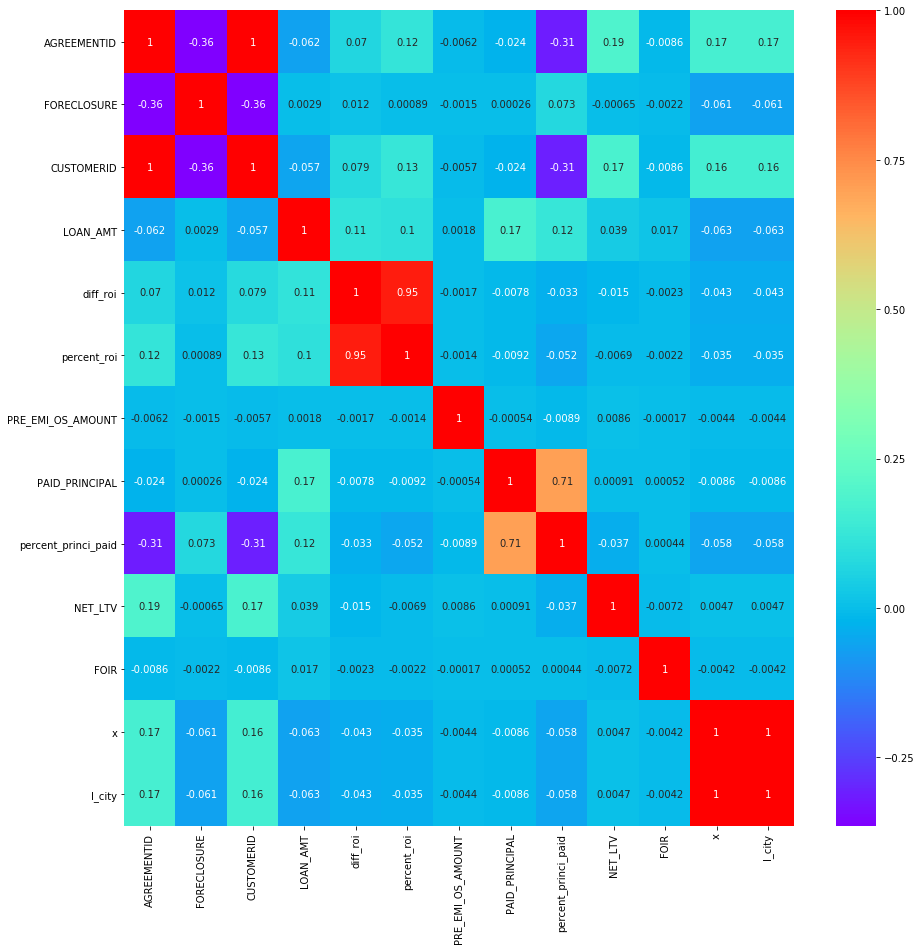

In [89]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True,cmap = 'rainbow',fmt = '.2g')
plt.show()

In [91]:
train['FORECLOSURE'].value_counts()/train.shape[0]*100

0.00   91.03
1.00    8.97
Name: FORECLOSURE, dtype: float64

In [31]:
train_wo_city  = train.drop(['CITY','INTEREST_START_DATE','days_since_loan','CUSTOMERID'] ,axis = 1)
test_wo_city   = test.drop(['CITY','INTEREST_START_DATE','days_since_loan','CUSTOMERID'], axis = 1)
train_dummy = pd.get_dummies(train_wo_city) 
test_dummy  = pd.get_dummies(test_wo_city)
train_x = train_dummy.drop('FORECLOSURE', axis = 1)
train_y = train_dummy['FORECLOSURE']
test_x  = test_dummy.drop('FORECLOSURE', axis = 1)
train_x.shape,train_y.shape,test_x.shape



((20012, 15), (20012,), (13342, 15))

In [27]:
train_x.isnull().sum()/train.shape[0]*100

AGREEMENTID           0.00
LOAN_AMT              0.00
diff_roi              0.00
percent_roi           0.00
PRE_EMI_OS_AMOUNT     0.00
PAID_PRINCIPAL        0.00
percent_princi_paid   0.00
NET_LTV               0.00
FOIR                  0.00
days_diff             0.00
l_city                0.00
PRODUCT_HL            0.00
PRODUCT_LAP           0.00
PRODUCT_STHL          0.00
PRODUCT_STLAP         0.00
dtype: float64

In [117]:
train_x.isnull().sum()/train.shape[0]*100

AGREEMENTID           0.00
LOAN_AMT              0.00
diff_roi              0.00
percent_roi           0.00
PRE_EMI_OS_AMOUNT     0.00
PAID_PRINCIPAL        0.00
percent_princi_paid   0.00
NET_LTV               0.00
FOIR                  0.00
l_city                0.00
days_diff             0.00
PRODUCT_HL            0.00
PRODUCT_LAP           0.00
PRODUCT_STHL          0.00
PRODUCT_STLAP         0.00
dtype: float64

In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from datetime import timedelta

In [134]:
model_rf = RandomForestClassifier(n_estimators=450,criterion='entropy')
model_rf.fit(train_x,train_y)
pred_rf  = pd.DataFrame(model_rf.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
pred_1   = pred_rf[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
print(AGREEMENTID.shape)
AGREEMENTID.head(1)


(13342, 1)


AGREEMENTID
0     11220003

In [135]:
sub_5_rf_15feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                    'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_5_rf_15feat.shape
sub_5_rf_15feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_5_rf_15feat.csv', index = False)

In [96]:
rf_importance = pd.DataFrame(model_rf.feature_importances_,
                            index= train_x.columns,
                            columns = ['IMPORTANCE']).sort_values('IMPORTANCE', ascending = False)
rf_importance



IMPORTANCE
AGREEMENTID                0.27
percent_princi_paid        0.10
PRODUCT_LAP                0.08
PAID_PRINCIPAL             0.08
PRODUCT_HL                 0.06
percent_roi                0.06
diff_roi                   0.06
LOAN_AMT                   0.06
NET_LTV                    0.05
FOIR                       0.05
PRODUCT_STLAP              0.03
l_city                     0.03
x                          0.03
PRODUCT_STHL               0.03
PRE_EMI_OS_AMOUNT          0.00

In [33]:
from sklearn.ensemble import BaggingClassifier

ada_b    = AdaBoostClassifier(n_estimators=400)
baggingc = BaggingClassifier( base_estimator=ada_b,n_estimators=20,max_features=0.8)
baggingc.fit(train_x,train_y)
bag_pred = pd.DataFrame(baggingc.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
print(pred_rf.shape)
pred_2   = bag_pred[['FORECLOSURE']].reset_index(drop = True)
print(pred_1.shape)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
print(AGREEMENTID.shape)
sub_2 = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                    'FORECLOSURE'  : pred_2['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_2.shape


KeyboardInterrupt: 

In [406]:
sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_3.csv', index = False)

In [136]:
model_rf = RandomForestClassifier(n_estimators=750,criterion='entropy',max_features='sqrt',n_jobs=-1,)
model_rf.fit(train_x,train_y)
pred_rf  = pd.DataFrame(model_rf.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
print(pred_rf.shape)
pred_1   = pred_rf[['FORECLOSURE']].reset_index(drop = True)
print(pred_1.shape)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
print(AGREEMENTID.shape)

print(type(pred_1))
print(type(AGREEMENTID))
AGREEMENTID.head(1)

sub_6 = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                    'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_6.shape

(13342, 2)
(13342, 1)
(13342, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


(13342, 2)

In [137]:
sub_6.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_6_rf_trees750_15feat.csv', index = False)

In [414]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.5,n_estimators=350,n_jobs=-1)
# Train classifier
xg.fit(train_x, train_y)
xg.predict(test_x)
pred_xg  = pd.DataFrame(xg.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
print(pred_xg.shape)
pred_4   = pred_xg[['FORECLOSURE']].reset_index(drop = True)
print(pred_1.shape)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
print(AGREEMENTID.shape)

print(type(pred_1))
print(type(AGREEMENTID))
AGREEMENTID.head(1)

sub_4 = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                    'FORECLOSURE'  : pred_4['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_4.shape



(13342, 2)
(13342, 1)
(13342, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


(13342, 2)

In [415]:
sub_4.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_4_xg.csv', index = False)

ValueError: Could not convert object to NumPy timedelta

## DAY 2 with more features

In [170]:
x = tran_train_merged[tran_train_merged['AGREEMENTID'] == 11220296]
#x[['ORIGNAL_TENOR', 'CURRENT_TENOR','COMPLETED_TENURE', 'BALANCE_TENURE','LAST_RECEIPT_DATE']]
x


AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
9182     11220296 12001295.00 45038874.00        45038874.00   
9183     11220296 12001295.00 45038874.00        45038874.00   
9184     11220296 12001295.00 45038874.00        45038874.00   
9185     11220296 12001295.00 45038874.00        45038874.00   
9186     11220296 12001295.00 45038874.00        45038874.00   

     INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
9182          2011-09-29        17.17        15.92          61.00   
9183          2011-09-29        17.17        15.92          61.00   
9184          2011-09-29        17.17        15.92          61.00   
9185          2011-09-29        17.17        15.92          61.00   
9186          2011-09-29        17.17        15.92          61.00   

      ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE  CITY  PRE_EMI_DUEAMT  \
9182             60      15        2011-09-29  PUNE       375453.84   
9183             60      15        2011-09-29  PUNE       375453.84   
9184             60      15        2011-09-29  PUNE       375453.84   
9185             60      15        1971-09-30  PUNE       375453.84   
9186             60      15        2011-09-29  PUNE       375453.84   

      PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  \
9182             375453.84               0.00 37476918.89       29981535.11   
9183             375453.84               0.00 38975995.64       29981535.11   
9184             375453.84               0.00 40475072.40       29981535.11   
9185             375453.84               0.00 41974149.15       29981535.11   
9186             375453.84               0.00 43473225.91       29981535.11   

      EMI_OS_AMOUNT  EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  \
9182     7495383.78              0.00                 0.00            0.00   
9183     8994460.53              0.00                 0.00            0.00   
9184    10493537.29              0.00                 0.00            0.00   
9185    11992614.04              0.00                 0.00            0.00   
9186    13491690.80              0.00                 0.00            0.00   

      NET_RECEIVABLE  OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  \
9182      7495383.78            33220664.45     11818209.55     8817401.48   
9183      8994460.53            33220664.45     11818209.55     8817401.48   
9184     10493537.29            33220664.45     11818209.55     8817401.48   
9185     11992614.04            33220664.45     11818209.55     8817401.48   
9186     13491690.80            33220664.45     11818209.55     8817401.48   

      MONTHOPENING LAST_RECEIPT_DATE  LAST_RECEIPT_AMOUNT  NET_LTV  \
9182   33220664.45        2013-08-15            678760.00    49.71   
9183   33220664.45        2013-08-15            678760.00    49.71   
9184   33220664.45        2013-08-15            678760.00    49.71   
9185   33220664.45        1973-08-16            678760.00    49.71   
9186   33220664.45        2013-08-15            678760.00    49.71   

      COMPLETED_TENURE  BALANCE_TENURE    DPD  FOIR PRODUCT    SCHEMEID  MOB  \
9182                25           36.00 138.00  1.00     LAP 10901103.00   26   
9183                26           35.00 169.00  1.00     LAP 10901103.00   27   
9184                27           34.00 200.00  1.00     LAP 10901103.00   28   
9185                28           33.00 228.00  1.00     LAP 10901103.00   29   
9186                29           32.00 259.00  1.00     LAP 10901103.00   30   

      Year  Year_replaced  FORECLOSURE  
9182  2011        2011.00          nan  
9183  2011        2011.00          nan  
9184  2011        2011.00          nan  
9185  1971        2011.00          nan  
9186  2011        2011.00          nan

In [172]:
x = tran_train_merged[tran_train_merged['AGREEMENTID'] == 11220005]
#x[['ORIGNAL_TENOR', 'CURRENT_TENOR','COMPLETED_TENURE', 'BALANCE_TENURE','LAST_RECEIPT_DATE']]
x


AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
59     11220005 12001004.00 13211403.04        13211403.04   
60     11220005 12001004.00 13211403.04        13211403.04   
61     11220005 12001004.00 13211403.04        13211403.04   
62     11220005 12001004.00 13211403.04        13211403.04   
63     11220005 12001004.00 13211403.04        13211403.04   
64     11220005 12001004.00 13211403.04        13211403.04   
65     11220005 12001004.00 13211403.04        13211403.04   
66     11220005 12001004.00 13211403.04        13211403.04   
67     11220005 12001004.00 13211403.04        13211403.04   

   INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
59          2010-09-06        16.54        11.86         142.00   
60          2010-09-06        16.54        11.86         142.00   
61          2010-09-06        16.54        11.86         142.00   
62          2010-09-06        16.54        11.86         142.00   
63          2010-09-06        16.54        11.86         142.00   
64          2010-09-06        16.54        11.86         142.00   
65          2010-09-06        16.54        11.86         142.00   
66          2010-09-06        16.54        11.86         142.00   
67          2010-09-06        16.54        11.86         142.00   

    ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  \
59            180       5        2010-09-06  MUMBAI            0.00   
60            180       5        2010-09-06  MUMBAI            0.00   
61            180       5        2010-09-06  MUMBAI            0.00   
62            180       5        2010-09-06  MUMBAI            0.00   
63            180       5        2010-09-06  MUMBAI            0.00   
64            180       5        1970-09-07  MUMBAI            0.00   
65            180       5        2010-09-06  MUMBAI            0.00   
66            180       5        2010-09-06  MUMBAI            0.00   
67            180       5        2010-09-06  MUMBAI            0.00   

    PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  \
59                  0.00               0.00  9335619.98        9335619.98   
60                  0.00               0.00  9132671.72        9132671.72   
61                  0.00               0.00  8929723.46        8929723.46   
62                  0.00               0.00  8726775.20        8726775.20   
63                  0.00               0.00  8523826.94        8523826.94   
64                  0.00               0.00  8320878.68        8320878.68   
65                  0.00               0.00  8117930.42        8117930.42   
66                  0.00               0.00  7914982.15        7914982.15   
67                  0.00               0.00  7712033.89        7712033.89   

    EMI_OS_AMOUNT  EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  \
59           0.00         202948.26            202948.26            0.00   
60           0.00         202948.26            202948.26            0.00   
61           0.00         202948.26            202948.26            0.00   
62           0.00         202948.26            202948.26            0.00   
63           0.00         202948.26            202948.26            0.00   
64           0.00              0.00                 0.00            0.00   
65           0.00              0.00                 0.00            0.00   
66           0.00              0.00                 0.00            0.00   
67           0.00              0.00                 0.00            0.00   

    NET_RECEIVABLE  OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  \
59            0.00             8110480.61      5100922.43     4547953.72   
60            0.00             8158355.43      5053047.61     4457871.47   
61            0.00             8205707.82      5005695.22     4367266.78   
62            0.00             8252543.07      4958859.97     4276144.96   
63            0.00             8298866.83      4912536.21     4184511.64   
64           

In [25]:
#taking tenures to data
m_tenure  = tran_train_merged.sort_values('LAST_RECEIPT_DATE', ascending = True).groupby('AGREEMENTID').tail(1)
m_tenure.head(10)

ten_feat_1                           = m_tenure[['AGREEMENTID','CURRENT_TENOR','ORIGNAL_TENOR','COMPLETED_TENURE', 'BALANCE_TENURE']]
ten_feat_1['tenure_diff']            = ten_feat_1['ORIGNAL_TENOR'] - ten_feat_1['CURRENT_TENOR']
ten_feat_1['cent_tenure_completed']  = ten_feat_1['COMPLETED_TENURE']/ten_feat_1['CURRENT_TENOR']
ten_feat_1                           = ten_feat_1[['AGREEMENTID','tenure_diff','cent_tenure_completed']]

ten_feat_1.shape
final_df_25th = pd.merge(ten_feat_1,final_df_25th, on = 'AGREEMENTID',how = 'left')
final_df_25th.shape

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(33354, 19)

In [35]:
train = final_df_25th[~pd.isnull(final_df_25th['FORECLOSURE'])]
test  = final_df_25th[pd.isnull(final_df_25th['FORECLOSURE'])]
print('train shape {}, test shape{}'.format(train.shape,test.shape))
train_foreclosure.shape,test_foreclosure.shape

train shape (20012, 19), test shape(13342, 19)


((20012, 2), (13342, 2))

In [36]:
train_wo_city  = train.drop(['CITY','INTEREST_START_DATE','days_since_loan','CUSTOMERID'] ,axis = 1)
test_wo_city   = test.drop(['CITY','INTEREST_START_DATE','days_since_loan','CUSTOMERID'], axis = 1)
train_dummy = pd.get_dummies(train_wo_city) 
test_dummy  = pd.get_dummies(test_wo_city)
train_x = train_dummy.drop('FORECLOSURE', axis = 1)
train_y = train_dummy['FORECLOSURE']
test_x  = test_dummy.drop('FORECLOSURE', axis = 1)
train_x.shape,train_y.shape,test_x.shape

((20012, 17), (20012,), (13342, 17))

In [215]:
model_rf    = RandomForestClassifier(n_estimators=450,criterion='entropy')
model_rf.fit(train_x,train_y)
pred_rf     = pd.DataFrame(model_rf.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_rf[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_7_rf_17feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_7_rf_17feat.shape
#sub_7_rf_17feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_7_rf_17feat.csv', index = False)

In [216]:
rf_importance = pd.DataFrame(model_rf.feature_importances_,
                            index= train_x.columns,
                            columns = ['IMPORTANCE']).sort_values('IMPORTANCE', ascending = False)
rf_importance


IMPORTANCE
AGREEMENTID                  0.27
days_diff                    0.13
PRODUCT_LAP                  0.09
cent_tenure_completed        0.07
PRODUCT_HL                   0.06
percent_princi_paid          0.05
diff_roi                     0.04
percent_roi                  0.04
tenure_diff                  0.04
PRODUCT_STHL                 0.04
PAID_PRINCIPAL               0.04
PRODUCT_STLAP                0.03
LOAN_AMT                     0.03
NET_LTV                      0.03
FOIR                         0.03
l_city                       0.02
PRE_EMI_OS_AMOUNT            0.00

In [183]:
test_foreclosure.shape

(13342, 2)

In [185]:
sub_7_rf_17feat.head(10)

AGREEMENTID  FORECLOSURE
1781      11220003         0.71
17        11220004         0.85
167       11220005         0.97
202       11220007         0.95
157       11220009         0.02
1255      11220013         0.86
126       11220015         0.01
11827     11220018         0.97
438       11220019         0.90
7663      11220023         0.01

### STACKING

In [32]:
from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_x)
train_x_scaled = scaler_impute.transform(train_x)
test_x_scaled  = scaler_impute.transform(test_x)
train_x_scaled_df = pd.DataFrame(train_x_scaled, columns=train_x.columns)
test_x_scaled_df  = pd.DataFrame(test_x_scaled, columns=test_x.columns)
train_x_scaled_df.shape,test_x_scaled_df.shape


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


((20012, 17), (13342, 17))

In [204]:
from sklearn.model_selection import StratifiedKFold

def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred =np.empty((0,1))
    train_pred=np.empty((0,1))
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        model.fit(x_train,y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
    model.fit(train,y)
    test_pred =np.append(test_pred,model.predict(test))
    return test_pred,train_pred


In [207]:
from xgboost import XGBClassifier
model1 = XGBClassifier(learning_rate=0.5,n_estimators=330)
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=train_x_scaled_df,y=train_y,test=test_x_scaled_df)
train_pred1=pd.DataFrame(train_pred1,columns={'XGB'})
test_pred1=pd.DataFrame(test_pred1,columns={'XGB'})

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10, train=train_x_scaled_df,y=train_y,test=test_x_scaled_df)
train_pred2=pd.DataFrame(train_pred2,columns={'Logi'})
test_pred2=pd.DataFrame(test_pred2,columns={'Logi'})

from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier()
test_pred3 ,train_pred3=Stacking(model=model3,n_fold=10, train=train_x,y=train_y,test=test_x)
train_pred3=pd.DataFrame(train_pred3,columns={'GRADIENT'})
test_pred3=pd.DataFrame(test_pred3,columns={'GRADIENT'})

model4 = BaggingClassifier()
test_pred4 ,train_pred4=Stacking(model=model4,n_fold=10, train=train_x,y=train_y,test=test_x)
train_pred4=pd.DataFrame(train_pred4,columns={'Bagging'})
test_pred4=pd.DataFrame(test_pred4,columns={'Bagging'})

from sklearn.neural_network import MLPClassifier

model5 = MLPClassifier()
test_pred5 ,train_pred5=Stacking(model=model5,n_fold=10, train=train_x_scaled_df,y=train_y,test=test_x_scaled_df)
train_pred5=pd.DataFrame(train_pred5,columns={'MLP'})
test_pred5=pd.DataFrame(test_pred5,columns={'MLP'})


model6 = KNeighborsClassifier(n_neighbors=3)
test_pred6 ,train_pred6=Stacking(model=model6,n_fold=10, train=train_x_scaled_df,y=train_y,test=test_x_scaled_df)
train_pred6=pd.DataFrame(train_pred6,columns={'KNN3'})
test_pred6=pd.DataFrame(test_pred6,columns={'KNN3'})

model7 = KNeighborsClassifier(n_neighbors=21)
test_pred7 ,train_pred7=Stacking(model=model7,n_fold=10, train=train_x_scaled_df,y=train_y,test=test_x_scaled_df)
train_pred7=pd.DataFrame(train_pred7,columns={'KNN21'})
test_pred7=pd.DataFrame(test_pred7,columns={'KNN21'})

model8 = KNeighborsClassifier(n_neighbors=9)
test_pred8 ,train_pred8=Stacking(model=model8,n_fold=10, train=train_x_scaled_df,y=train_y,test=test_x_scaled_df)
train_pred8=pd.DataFrame(train_pred8,columns={'KNN9'})
test_pred8=pd.DataFrame(test_pred8,columns={'KNN9'})




C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [208]:
train_pred1.shape,train_pred2.shape,train_pred3.shape,train_pred4.shape,train_pred5.shape,train_pred6.shape,train_pred7.shape,train_pred8.shape

((20012, 1),
 (20012, 1),
 (20012, 1),
 (20012, 1),
 (20012, 1),
 (20012, 1),
 (20012, 1),
 (20012, 1))

In [209]:
test_pred1.shape,test_pred2.shape,test_pred3.shape,test_pred4.shape,test_pred5.shape,test_pred6.shape,test_pred7.shape,test_pred8.shape

((13342, 1),
 (13342, 1),
 (13342, 1),
 (13342, 1),
 (13342, 1),
 (13342, 1),
 (13342, 1),
 (13342, 1))

In [ ]:
train_stack = train_x.copy()
test_stack = test_x.copy()
print(test_x.shape)
train_stack = train_stack.reset_index(drop = True)
test_stack = test_stack.reset_index(drop = True)

test_stack.shape

In [250]:
meta_train = pd.concat([train_pred1,train_pred2,train_pred3,train_pred4,train_pred5,train_pred6,train_pred7,train_pred8,train_stack], axis = 1)
meta_train.shape

(20012, 25)

In [251]:
meta_test = pd.concat([test_pred1,test_pred2,test_pred3,test_pred4,test_pred5,test_pred6,test_pred7,test_pred8,test_stack], axis = 1)
meta_test.shape

(13342, 25)

(13342, 17)


(13342, 17)

In [252]:
#LEVEL 2
meta_train  = meta_train.drop('AGREEMENTID', axis = 1)
meta_test   = meta_test.drop('AGREEMENTID', axis = 1)

model_rf    = RandomForestClassifier(n_estimators=500,criterion='entropy',n_jobs=-1)
model_rf.fit(meta_train,train_y)
pred_rf     = pd.DataFrame(model_rf.predict_proba(meta_test),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_rf[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub8_meta_rf_raw = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub8_meta_rf_raw.shape
sub8_meta_rf_raw.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub9_meta_rf_merged_rf_3.csv', index = False)


In [254]:
rf_importance = pd.DataFrame(model_rf.feature_importances_,
                            index= meta_train.columns,
                            columns = ['IMPORTANCE']).sort_values('IMPORTANCE', ascending = False)
rf_importance.head(15)


IMPORTANCE
days_diff                    0.10
cent_tenure_completed        0.09
percent_princi_paid          0.07
PRODUCT_HL                   0.07
PRODUCT_LAP                  0.07
PAID_PRINCIPAL               0.07
NET_LTV                      0.06
LOAN_AMT                     0.06
tenure_diff                  0.06
diff_roi                     0.06
percent_roi                  0.06
FOIR                         0.05
l_city                       0.04
XGB                          0.04
PRODUCT_STLAP                0.03

## cant break 98.96. SO lets try to find more features in customer comments df


In [255]:
cust_comments.head(10)

TicketId     Type                     SubType Status                 Date  \
0    571910  REQUEST  PROVISIONAL IT CERTIFICATE  Close  2019-01-23 16:34:00   
1    572747  REQUEST                         SOA  Close  2019-01-24 16:05:00   
2      4622  General                      Others  Close  2016-02-12 13:40:00   
3      4674  REQUEST                         SOA  Close  2016-02-12 15:41:00   
4      4681    QUERY                 CHANGEOFROI  Close  2016-02-12 15:55:00   
5      4736    QUERY             TDSREIMBRELATED  Close  2016-02-12 18:00:00   
6      4779  REQUEST                 FORECLOSURE  Close  2016-02-12 19:36:00   
7      5201  REQUEST          REPAYMENT SCHEDULE  Close  2016-02-13 12:40:00   
8      6033  General                      Others  Close  2016-02-14 22:50:00   
9      6310  REQUEST                 FORECLOSURE  Close  2016-02-15 11:20:00   

                              Preprocessed_EmailBody  \
0  hi team, can you please provide me itcertifica...   
1  hi team can you please arrange the certificate...   
2                                                NaN   
3  dear sir, you for your promptreply, please not...   
4  dear sachin, for your mail. this seems a great...   
5  sir / madam, we have already send tds certific...   
6                           sent from samsung mobile   
7  loannumber \npls send me statement of account ...   
8  dear sir ,\n\ni have home loan account no loan...   
9  to, \n edelweiss housing finance\nlimited \n \...   

                                Preprocessed_Subject  Masked_CustomerID  \
0                   loan account number - loannumber           12020736   
1  certificate of interest and principal for home...           12019080   
2              re: repaysch : loan number loannumber           12004815   
3               re: finalit : loan number loannumber           12005158   
4          re: fw: repaysch : loan number loannumber           12001022   
5                         re: process for tds refund           12005516   
6                                                NaN           12004239   
7                                         loannumber           12001518   
8                   loan no. loannumber sanjay vaidh           12007167   
9  foreclosure letter ( home loan a/c no - loannu...           12007184   

   Masked_AgreementID  
0                   0  
1                   0  
2                   0  
3            11230237  
4                   0  
5                   0  
6                   0  
7                   0  
8                   0  
9                   0

In [256]:
print(cust_comments.shape)
print('-----------------------------')
print(cust_comments.nunique())
print('-----------------------------')
print(cust_comments.isnull().sum()/cust_comments.shape[0])

(7511, 9)
-----------------------------
TicketId                  7511
Type                         8
SubType                     50
Status                       4
Date                      6057
Preprocessed_EmailBody    7184
Preprocessed_Subject      5830
Masked_CustomerID         2709
Masked_AgreementID         402
dtype: int64
-----------------------------
TicketId                 0.00
Type                     0.00
SubType                  0.00
Status                   0.00
Date                     0.00
Preprocessed_EmailBody   0.02
Preprocessed_Subject     0.02
Masked_CustomerID        0.00
Masked_AgreementID       0.00
dtype: float64


In [259]:
cust_comments['Type'].value_counts()

REQUEST        5865
QUERY          1502
COMPLAINT        94
General          29
Foreclosure       9
ROI               6
Unassigned        4
Request           2
Name: Type, dtype: int64

In [261]:
cust_comments['SubType'].value_counts().head(10)

FORECLOSURE                   2027
CHANGEOFROI                    968
SOA                            836
Others                         609
REPAYMENT SCHEDULE             374
TDSREIMBRELATED                368
LISTOFDOCS                     361
COPYOFORIGDOCS                 255
FINAL IT CERTIFICATE NONHL     191
FINAL IT CERTIFICATE           178
Name: SubType, dtype: int64

In [33]:
dig_1 = cust_comments[cust_comments['Type'] == 'REQUEST']['SubType'].value_counts()
dig_1

FORECLOSURE                                       2027
SOA                                                836
Others                                             583
REPAYMENT SCHEDULE                                 374
LISTOFDOCS                                         361
COPYOFORIGDOCS                                     255
FINAL IT CERTIFICATE NONHL                         190
FINAL IT CERTIFICATE                               178
PREPAYEMICHNG                                      174
UPDATECONTACTDET                                   134
PROVISIONAL IT CERTIFICATE                         117
EXCESS EMI REFUND                                  100
EMI NOT BANKED                                      90
DISBURSEMENT BREAK UP REQUIRED                      74
PREPAYTENORCHNG                                     64
REFOFINSUR                                          61
ORG PROPERTY PAPERS REQUIRED POST LOAN CLOSURE      55
PROVISIONAL IT CERTIFICATE NONHL                    52
TOP UP LOA

In [26]:
dig_2 = pd.DataFrame(cust_comments.groupby('Masked_CustomerID').size()).reset_index().sort_values(0,ascending = False).rename(columns = {0:'count_interaction'})
dig_2.head(10)

Masked_CustomerID  count_interaction
1477           12009302                 40
527            12003206                 28
1185           12007090                 26
210            12001834                 25
325            12002279                 24
24             12001066                 24
1968           12016391                 22
1474           12009269                 22
1435           12008855                 22
779            12004696                 21

In [27]:
df_with_two_frames = pd.merge(final_df_25th,dig_2, left_on='CUSTOMERID',right_on='Masked_CustomerID', how = 'left')
df_with_two_frames.shape

(33354, 21)

In [277]:
df_with_two_frames[['CUSTOMERID','Masked_CustomerID','count_interaction']].sort_values('count_interaction',ascending = False).head(10)

CUSTOMERID  Masked_CustomerID  count_interaction
12423 12009302.00        12009302.00              40.00
5323  12003206.00        12003206.00              28.00
28677 12007090.00        12007090.00              26.00
17570 12001834.00        12001834.00              25.00
27987 12002279.00        12002279.00              24.00
64    12001066.00        12001066.00              24.00
6377  12016391.00        12016391.00              22.00
6120  12008855.00        12008855.00              22.00
11758 12009269.00        12009269.00              22.00
1686  12004696.00        12004696.00              21.00

In [28]:
#i ve a feeling that scheme id could be useful.it also has very less amount of NAs which could be rectified.

m_scheme = tran_train_merged.groupby('AGREEMENTID')[['SCHEMEID']].mean().reset_index()
m_scheme.shape

df_with_two_frames = pd.merge(df_with_two_frames,m_scheme, on = 'AGREEMENTID', how = 'left')
df_with_two_frames.shape

(33354, 22)

In [332]:
df_with_two_frames.isnull().sum()

AGREEMENTID                  0
tenure_diff                  0
cent_tenure_completed        0
FORECLOSURE              13342
CUSTOMERID                 459
LOAN_AMT                     0
INTEREST_START_DATE          0
diff_roi                     0
percent_roi                  0
CITY                         0
PRE_EMI_OS_AMOUNT            0
PAID_PRINCIPAL               0
percent_princi_paid          0
days_since_loan           3773
NET_LTV                      0
FOIR                         0
PRODUCT                      0
x                            0
l_city                       0
days_diff                    0
Masked_CustomerID        30645
count_interaction            0
SCHEMEID                     0
dtype: int64

In [29]:
#lets take care of count interaction
df_with_two_frames['count_interaction'] = df_with_two_frames['count_interaction'].fillna(0)
df_with_two_frames.columns

Index(['AGREEMENTID', 'tenure_diff', 'cent_tenure_completed', 'FORECLOSURE',
       'CUSTOMERID', 'LOAN_AMT', 'INTEREST_START_DATE', 'diff_roi',
       'percent_roi', 'CITY', 'PRE_EMI_OS_AMOUNT', 'PAID_PRINCIPAL',
       'percent_princi_paid', 'days_since_loan', 'NET_LTV', 'FOIR', 'PRODUCT',
       'days_diff', 'l_city', 'Masked_CustomerID', 'count_interaction',
       'SCHEMEID'],
      dtype='object')

In [30]:
#lets fill up schemeid

for_impute =  df_with_two_frames.drop(['CITY','INTEREST_START_DATE','days_since_loan','CUSTOMERID','FORECLOSURE',
                                 'Masked_CustomerID'],axis = 1)

for_impute_impute= for_impute[~pd.isnull(for_impute['SCHEMEID'])].drop('SCHEMEID', axis = 1)
test_x_impute    = for_impute[pd.isnull(for_impute['SCHEMEID'])].drop('SCHEMEID', axis = 1)
print(for_impute_impute.shape)
print(test_x_impute.shape)


train_knn_dummy  = pd.get_dummies(for_impute_impute)
test_knn_dummy   = pd.get_dummies(test_x_impute)
print(train_knn_dummy.shape, test_knn_dummy.shape)

#making train_y
train_y_knn       = for_impute.loc[for_impute_impute.index,'SCHEMEID']


from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_knn_dummy)
for_impute_impute_scaled = scaler_impute.transform(train_knn_dummy)
test_x_impute_scaled = scaler_impute.transform(test_knn_dummy)

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(for_impute_impute_scaled, train_y_knn)
model_knn = model_knn.predict(test_x_impute_scaled)

#putting into original data
df_with_two_frames.loc[test_x_impute.index, 'SCHEMEID'] = model_knn




(32895, 15)
(459, 15)
(32895, 18) (459, 18)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


In [44]:
train = df_with_two_frames[~pd.isnull(df_with_two_frames['FORECLOSURE'])]
test  = df_with_two_frames[pd.isnull(df_with_two_frames['FORECLOSURE'])]
print('train shape {}, test shape{}'.format(train.shape,test.shape))
train_foreclosure.shape,test_foreclosure.shape

train shape (20012, 22), test shape(13342, 22)


((20012, 2), (13342, 2))

In [45]:
train_wo_city  = train.drop(['CITY','INTEREST_START_DATE','days_since_loan','CUSTOMERID',
                                 'Masked_CustomerID'],axis = 1)
test_wo_city   = test.drop(['CITY','INTEREST_START_DATE','days_since_loan','CUSTOMERID',
                                 'Masked_CustomerID'],axis = 1)
train_dummy = pd.get_dummies(train_wo_city) 
test_dummy  = pd.get_dummies(test_wo_city)
train_x = train_dummy.drop('FORECLOSURE', axis = 1)
train_y = train_dummy['FORECLOSURE']
test_x  = test_dummy.drop('FORECLOSURE', axis = 1)
train_x.shape,train_y.shape,test_x.shape

((20012, 19), (20012,), (13342, 19))

In [337]:
model_rf    = RandomForestClassifier(n_estimators=450,criterion='entropy')
model_rf.fit(train_x,train_y)
pred_rf     = pd.DataFrame(model_rf.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_rf[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_11_rf_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_11_rf_19feat.shape
sub_11_rf_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_11_rf_19feat.csv', index = False)


In [ ]:
#99.27% accuracy

In [338]:
rf_importance = pd.DataFrame(model_rf.feature_importances_,
                            index= train_x.columns,
                            columns = ['IMPORTANCE']).sort_values('IMPORTANCE', ascending = False)
rf_importance.head(10)

IMPORTANCE
AGREEMENTID                  0.23
days_diff                    0.13
SCHEMEID                     0.10
PRODUCT_LAP                  0.08
cent_tenure_completed        0.06
PRODUCT_HL                   0.06
percent_princi_paid          0.05
diff_roi                     0.04
percent_roi                  0.04
tenure_diff                  0.03

In [341]:
model_rf    = RandomForestClassifier(n_estimators=650,criterion='entropy')
model_rf.fit(train_x,train_y)
pred_rf     = pd.DataFrame(model_rf.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_rf[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_12_rf_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_12_rf_19feat.shape
sub_12_rf_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_13_rf_19feat.csv', index = False)


In [346]:
#from sklearn.svm import libsvm
from sklearn.svm import SVC

model_rf    = SVC(probability=True)
model_rf.fit(train_x,train_y)
pred_rf     = pd.DataFrame(model_rf.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_rf[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_12_rf_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_12_rf_19feat.shape
sub_12_rf_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_14_svm_19feat.csv', index = False)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
pred_1.head(10)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_x)
train_x_scaled = scaler_impute.transform(train_x)
test_x_scaled  = scaler_impute.transform(test_x)
train_x_scaled_df = pd.DataFrame(train_x_scaled, columns=train_x.columns)
test_x_scaled_df  = pd.DataFrame(test_x_scaled, columns=test_x.columns)
train_x_scaled_df.shape,test_x_scaled_df.shape


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


((20012, 19), (13342, 19))

In [348]:
#from sklearn.svm import libsvm
from sklearn.svm import SVC

model_rf    = LogisticRegression()
model_rf.fit(train_x_scaled_df,train_y)
pred_rf     = pd.DataFrame(model_rf.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_rf[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_12_rf_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_12_rf_19feat.shape
sub_12_rf_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_15_logi_19feat.csv', index = False)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [349]:
#from sklearn.svm import libsvm
from sklearn.svm import SVC

model_rf    = GradientBoostingClassifier(n_estimators=400)
model_rf.fit(train_x_scaled_df,train_y)
pred_rf     = pd.DataFrame(model_rf.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_rf[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_12_rf_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_12_rf_19feat.shape
sub_12_rf_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_15_gradi_19feat.csv', index = False)


In [352]:
!pip install catboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [356]:
cat_params = {'learning_rate': 0.02,
              'depth': 5,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 11,
              'allow_writing_files': False}


model = CatBoostClassifier(iterations=400,  eval_metric='AUC', **cat_params)
model.fit(train_x_scaled_df,train_y, cat_features=[], use_best_model=True, verbose=200)

In [360]:
pred_cat    = pd.DataFrame(model.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_12_cat_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_12_cat_19feat.shape
sub_12_cat_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_15_cat_19feat.csv', index = False)


array([[9.94642748e-01, 5.35725166e-03],
       [9.96592657e-01, 3.40734253e-03],
       [9.96330645e-01, 3.66935505e-03],
       ...,
       [9.96358609e-01, 3.64139128e-03],
       [9.99944822e-01, 5.51778462e-05],
       [9.89498436e-01, 1.05015644e-02]])

### splitting validate

In [49]:
x_train,x_val,y_train,y_val = train_test_split(train_x_scaled_df,train_y, test_size = 0.2)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((16009, 19), (4003, 19), (16009,), (4003,))

In [363]:
#from sklearn.svm import libsvm
from sklearn.svm import SVC

model_rf    = GradientBoostingClassifier(n_estimators=400)
model_rf.fit(x_train,y_train)
pred_rf     = pd.DataFrame(model_rf.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_rf[['FORECLOSURE']].reset_index(drop = True)

In [32]:
from sklearn.metrics import auc
#fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
#print(auc(fpr,tpr))


In [368]:
cat_params = {'learning_rate': 0.02,
              'depth': 5,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 11,
              'allow_writing_files': False}


model       = CatBoostClassifier(iterations=400,  eval_metric='AUC', **cat_params)
model.fit(x_train,y_train, cat_features=[], use_best_model=True, verbose=200)
pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 68.2ms	remaining: 27.2s
200:	total: 9.99s	remaining: 9.89s
399:	total: 19.7s	remaining: 0us
0.9911226668452102


In [155]:
var = ['balanced_subsample','balanced']
for i in var:
    model       = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True,class_weight=i)
    model.fit(x_train,y_train)
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(i)
    print(auc(fpr,tpr))
    print('--------')


balanced_subsample
0.9949885717815666
--------
balanced
0.9958275420064244
--------


In [156]:
model       = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True,class_weight=i)
model.fit(train_x_scaled_df,train_y)
pred_cat    = pd.DataFrame(model.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)

AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_31_cat_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_31_cat_19feat.shape
sub_31_cat_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_31_rf_tuned.csv', index = False)
#99.45%   

In [388]:
cat_params = {'learning_rate': 0.02,
              'depth': 5,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 11,
              'allow_writing_files': False}


model       = CatBoostClassifier(iterations=450,  eval_metric='AUC',bootstrap_type = 'Bernoulli')
model.fit(x_train,y_train, cat_features=[], use_best_model=True, verbose=200)
pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))


You should provide test set for use best model. use_best_model parameter swiched to false value.


Learning rate set to 0.074808
0:	total: 76.8ms	remaining: 34.5s
200:	total: 13.3s	remaining: 16.4s
400:	total: 26.2s	remaining: 3.21s
449:	total: 29.4s	remaining: 0us
0.9952514860029311


In [393]:
model       = CatBoostClassifier(iterations=450,  eval_metric='AUC',bootstrap_type = 'Bernoulli')
model.fit(train_x_scaled_df,train_y,cat_features=[], use_best_model=True, verbose=200)
pred_cat    = pd.DataFrame(model.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)

AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_21_cat_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_21_cat_19feat.shape
#sub_21_cat_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_21_cat_19feat.csv', index = False)
#99.45%

You should provide test set for use best model. use_best_model parameter swiched to false value.


Learning rate set to 0.079685
0:	total: 71ms	remaining: 31.9s
200:	total: 13.7s	remaining: 17s
400:	total: 26.7s	remaining: 3.26s
449:	total: 29.9s	remaining: 0us


In [69]:
cat_params = {'learning_rate': 0.02,
              'depth': 5,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 101,
              'allow_writing_files': False}

lr = [300,400,500,600,700,800]
od_wait_var = []
counter = 1
for iter_n in lr:
    model       = CatBoostClassifier(iterations=600,  eval_metric='AUC',bootstrap_type = 'Bernoulli',depth = 6,l2_leaf_reg=7,
                                     learning_rate=0.08)
    model.fit(x_train,y_train, cat_features=[], use_best_model=True, verbose=200)
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    #print(counter)
    #counter = counter + 1 
    auc_stat = auc(fpr,tpr)
    #print('-----------------')
    od_wait_var.append(auc_stat)


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 69.6ms	remaining: 20.8s
200:	total: 12.6s	remaining: 6.22s
299:	total: 18.9s	remaining: 0us


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 99.3ms	remaining: 39.6s
200:	total: 13.4s	remaining: 13.2s
399:	total: 26.7s	remaining: 0us


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 71.8ms	remaining: 35.8s
200:	total: 12.8s	remaining: 19s
400:	total: 25.5s	remaining: 6.3s
499:	total: 31.8s	remaining: 0us


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 73.4ms	remaining: 44s
200:	total: 12.6s	remaining: 25.1s
400:	total: 25.2s	remaining: 12.5s
599:	total: 37.7s	remaining: 0us


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 83.3ms	remaining: 58.2s
200:	total: 13.2s	remaining: 32.8s
400:	total: 25.9s	remaining: 19.3s
600:	total: 38.6s	remaining: 6.37s
699:	total: 44.9s	remaining: 0us


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 80ms	remaining: 1m 3s
200:	total: 12.8s	remaining: 38.2s
400:	total: 25.6s	remaining: 25.5s
600:	total: 38.4s	remaining: 12.7s
799:	total: 51.1s	remaining: 0us


In [70]:
od_wait_var

[0.9943499814677539,
 0.9947739065974796,
 0.9950225475660983,
 0.9952148196194712,
 0.99510903138127,
 0.9951545898196195]

[0.9944001729676304, 0.9947546021744502, 0.9948071102050902, 0.9943685137138621, 0.9945306708673092]


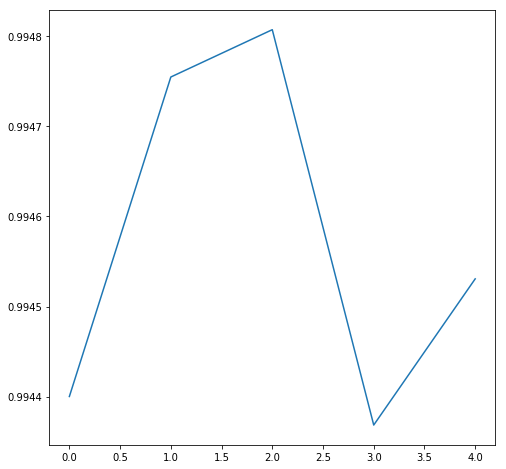

In [55]:
print(x)
plt.figure(figsize=(8,8))
plt.plot(x)
plt.show()

In [71]:
model       = CatBoostClassifier(iterations=600,  eval_metric='AUC',bootstrap_type = 'Bernoulli',depth = 6,l2_leaf_reg=7,
                                     learning_rate=0.08)
model.fit(train_x_scaled_df,train_y, cat_features=[], use_best_model=True, verbose=200)    
pred_cat    = pd.DataFrame(model.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)

AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_21_cat_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_21_cat_19feat.shape
sub_21_cat_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_22_cat_19feat.csv', index = False)
#99.45%

You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 85.9ms	remaining: 51.5s
200:	total: 14.4s	remaining: 28.6s
400:	total: 28.4s	remaining: 14.1s
599:	total: 41.2s	remaining: 0us


In [92]:
from xgboost import XGBClassifier
lr = [1]
counter = 8
for i in lr:
    model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=14,colsample_bytree=0.9)
    model.fit(x_train,y_train, eval_metric='auc')
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    counter = counter + 1
    print(auc(fpr,tpr))
    print('----------')


0.9958070793180134
----------


In [89]:
model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=14,colsample_bytree=0.9)
model.fit(train_x,train_y)
pred_xg     = pd.DataFrame(model.predict_proba(test_x),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_xg[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_25_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_25_xg_19feat.shape
sub_25_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_25_xg_woscale.csv', index = False)
    

In [95]:
model  = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=14,colsample_bytree=0.9)
bag_mod = BaggingClassifier(base_estimator=model,n_estimators=50)
bag_mod.fit(x_train,y_train)
pred_bag    = pd.DataFrame(bag_mod.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
counter = counter + 1
print(auc(fpr,tpr))
print('----------')


0.9959630590560911
----------


In [97]:
trees = [5,10,15]
model  = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=14,colsample_bytree=0.9)
    
for i in trees:
    bag_mod = BaggingClassifier(base_estimator=model,n_estimators=i)
    bag_mod.fit(x_train,y_train)
    pred_bag    = pd.DataFrame(bag_mod.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])
    counter = counter + 1
    print(counter)
    print(auc(fpr,tpr))
    print('----------')


16
0.9958371942179391
----------
17
0.995380837657524
----------
18
0.9958379663948603
----------


In [98]:
model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=14,colsample_bytree=0.9)
bag_mod     = BaggingClassifier(base_estimator=model,n_estimators=50)
bag_mod.fit(train_x_scaled_df,train_y)
pred_bag    = pd.DataFrame(bag_mod.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_25_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_25_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_25_xg_bagged.csv', index = False)



In [ ]:
sandbglobal
big basket
suderland
kabbage
shoplist
emplay analytics
litmus world

In [99]:
model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=14,colsample_bytree=0.9)
bag_mod     = BaggingClassifier(base_estimator=model,n_estimators=75)
bag_mod.fit(train_x_scaled_df,train_y)
pred_bag    = pd.DataFrame(bag_mod.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_25_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_25_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_26_xg_bagged_tree75.csv', index = False)



In [100]:
model       = CatBoostClassifier(iterations=600,  eval_metric='AUC',bootstrap_type = 'Bernoulli',depth = 6,l2_leaf_reg=7,
                                     learning_rate=0.08)
bag_mod     = BaggingClassifier(base_estimator=model,n_estimators=50)
bag_mod.fit(train_x_scaled_df,train_y)
pred_bag    = pd.DataFrame(bag_mod.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_27_cat_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_27_cat_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_27_cat_bagged_tree50.csv', index = False)


0:	total: 78.3ms	remaining: 46.9s
1:	total: 151ms	remaining: 45.3s
2:	total: 221ms	remaining: 44s
3:	total: 300ms	remaining: 44.7s
4:	total: 383ms	remaining: 45.6s
5:	total: 467ms	remaining: 46.3s
6:	total: 583ms	remaining: 49.4s
7:	total: 654ms	remaining: 48.4s
8:	total: 734ms	remaining: 48.2s
9:	total: 822ms	remaining: 48.5s
10:	total: 914ms	remaining: 48.9s
11:	total: 1s	remaining: 49s
12:	total: 1.11s	remaining: 50.2s
13:	total: 1.19s	remaining: 49.7s
14:	total: 1.26s	remaining: 49.3s
15:	total: 1.36s	remaining: 49.7s
16:	total: 1.45s	remaining: 49.6s
17:	total: 1.53s	remaining: 49.4s
18:	total: 1.61s	remaining: 49.3s
19:	total: 1.7s	remaining: 49.2s
20:	total: 1.83s	remaining: 50.5s
21:	total: 1.92s	remaining: 50.4s
22:	total: 2s	remaining: 50.1s
23:	total: 2.1s	remaining: 50.4s
24:	total: 2.2s	remaining: 50.6s
25:	total: 2.27s	remaining: 50.2s
26:	total: 2.36s	remaining: 50.2s
27:	total: 2.44s	remaining: 49.9s
28:	total: 2.52s	remaining: 49.6s
29:	total: 2.61s	remaining: 49.6s
30

242:	total: 19.4s	remaining: 28.5s
243:	total: 19.4s	remaining: 28.4s
244:	total: 19.5s	remaining: 28.3s
245:	total: 19.6s	remaining: 28.2s
246:	total: 19.7s	remaining: 28.1s
247:	total: 19.7s	remaining: 28s
248:	total: 19.8s	remaining: 27.9s
249:	total: 19.9s	remaining: 27.9s
250:	total: 20s	remaining: 27.8s
251:	total: 20s	remaining: 27.7s
252:	total: 20.1s	remaining: 27.6s
253:	total: 20.2s	remaining: 27.5s
254:	total: 20.3s	remaining: 27.4s
255:	total: 20.3s	remaining: 27.3s
256:	total: 20.4s	remaining: 27.2s
257:	total: 20.5s	remaining: 27.2s
258:	total: 20.6s	remaining: 27.1s
259:	total: 20.6s	remaining: 27s
260:	total: 20.7s	remaining: 26.9s
261:	total: 20.8s	remaining: 26.8s
262:	total: 20.9s	remaining: 26.7s
263:	total: 20.9s	remaining: 26.7s
264:	total: 21s	remaining: 26.6s
265:	total: 21.1s	remaining: 26.5s
266:	total: 21.2s	remaining: 26.4s
267:	total: 21.3s	remaining: 26.3s
268:	total: 21.3s	remaining: 26.2s
269:	total: 21.4s	remaining: 26.2s
270:	total: 21.5s	remaining: 2

479:	total: 37.3s	remaining: 9.32s
480:	total: 37.4s	remaining: 9.24s
481:	total: 37.4s	remaining: 9.16s
482:	total: 37.5s	remaining: 9.09s
483:	total: 37.6s	remaining: 9.01s
484:	total: 37.7s	remaining: 8.93s
485:	total: 37.7s	remaining: 8.85s
486:	total: 37.8s	remaining: 8.77s
487:	total: 37.9s	remaining: 8.7s
488:	total: 38s	remaining: 8.62s
489:	total: 38s	remaining: 8.54s
490:	total: 38.1s	remaining: 8.46s
491:	total: 38.2s	remaining: 8.38s
492:	total: 38.3s	remaining: 8.3s
493:	total: 38.3s	remaining: 8.22s
494:	total: 38.4s	remaining: 8.15s
495:	total: 38.5s	remaining: 8.07s
496:	total: 38.6s	remaining: 7.99s
497:	total: 38.6s	remaining: 7.91s
498:	total: 38.7s	remaining: 7.83s
499:	total: 38.8s	remaining: 7.76s
500:	total: 38.9s	remaining: 7.68s
501:	total: 38.9s	remaining: 7.6s
502:	total: 39s	remaining: 7.52s
503:	total: 39.1s	remaining: 7.44s
504:	total: 39.2s	remaining: 7.37s
505:	total: 39.2s	remaining: 7.29s
506:	total: 39.3s	remaining: 7.21s
507:	total: 39.4s	remaining: 

120:	total: 8.89s	remaining: 35.2s
121:	total: 8.97s	remaining: 35.1s
122:	total: 9.04s	remaining: 35.1s
123:	total: 9.12s	remaining: 35s
124:	total: 9.2s	remaining: 34.9s
125:	total: 9.27s	remaining: 34.9s
126:	total: 9.36s	remaining: 34.8s
127:	total: 9.43s	remaining: 34.8s
128:	total: 9.5s	remaining: 34.7s
129:	total: 9.57s	remaining: 34.6s
130:	total: 9.65s	remaining: 34.6s
131:	total: 9.72s	remaining: 34.5s
132:	total: 9.8s	remaining: 34.4s
133:	total: 9.87s	remaining: 34.3s
134:	total: 9.94s	remaining: 34.2s
135:	total: 10s	remaining: 34.2s
136:	total: 10.1s	remaining: 34s
137:	total: 10.1s	remaining: 34s
138:	total: 10.2s	remaining: 33.9s
139:	total: 10.3s	remaining: 33.8s
140:	total: 10.4s	remaining: 33.8s
141:	total: 10.4s	remaining: 33.7s
142:	total: 10.5s	remaining: 33.6s
143:	total: 10.6s	remaining: 33.5s
144:	total: 10.7s	remaining: 33.5s
145:	total: 10.7s	remaining: 33.4s
146:	total: 10.8s	remaining: 33.3s
147:	total: 10.9s	remaining: 33.2s
148:	total: 11s	remaining: 33.2

358:	total: 26.6s	remaining: 17.9s
359:	total: 26.7s	remaining: 17.8s
360:	total: 26.8s	remaining: 17.7s
361:	total: 26.8s	remaining: 17.6s
362:	total: 26.9s	remaining: 17.6s
363:	total: 27s	remaining: 17.5s
364:	total: 27.1s	remaining: 17.4s
365:	total: 27.1s	remaining: 17.4s
366:	total: 27.2s	remaining: 17.3s
367:	total: 27.3s	remaining: 17.2s
368:	total: 27.4s	remaining: 17.1s
369:	total: 27.4s	remaining: 17.1s
370:	total: 27.5s	remaining: 17s
371:	total: 27.6s	remaining: 16.9s
372:	total: 27.7s	remaining: 16.8s
373:	total: 27.7s	remaining: 16.8s
374:	total: 27.8s	remaining: 16.7s
375:	total: 27.9s	remaining: 16.6s
376:	total: 28s	remaining: 16.5s
377:	total: 28s	remaining: 16.5s
378:	total: 28.1s	remaining: 16.4s
379:	total: 28.2s	remaining: 16.3s
380:	total: 28.3s	remaining: 16.2s
381:	total: 28.3s	remaining: 16.2s
382:	total: 28.4s	remaining: 16.1s
383:	total: 28.5s	remaining: 16s
384:	total: 28.6s	remaining: 15.9s
385:	total: 28.6s	remaining: 15.9s
386:	total: 28.7s	remaining: 1

595:	total: 44.4s	remaining: 298ms
596:	total: 44.5s	remaining: 224ms
597:	total: 44.6s	remaining: 149ms
598:	total: 44.7s	remaining: 74.5ms
599:	total: 44.7s	remaining: 0us
0:	total: 77.2ms	remaining: 46.2s
1:	total: 150ms	remaining: 44.9s
2:	total: 208ms	remaining: 41.5s
3:	total: 284ms	remaining: 42.3s
4:	total: 367ms	remaining: 43.7s
5:	total: 439ms	remaining: 43.5s
6:	total: 509ms	remaining: 43.1s
7:	total: 584ms	remaining: 43.2s
8:	total: 669ms	remaining: 43.9s
9:	total: 748ms	remaining: 44.1s
10:	total: 836ms	remaining: 44.8s
11:	total: 907ms	remaining: 44.4s
12:	total: 988ms	remaining: 44.6s
13:	total: 1.07s	remaining: 44.9s
14:	total: 1.15s	remaining: 44.8s
15:	total: 1.22s	remaining: 44.7s
16:	total: 1.31s	remaining: 44.9s
17:	total: 1.39s	remaining: 44.8s
18:	total: 1.46s	remaining: 44.7s
19:	total: 1.55s	remaining: 45s
20:	total: 1.64s	remaining: 45.2s
21:	total: 1.71s	remaining: 44.9s
22:	total: 1.8s	remaining: 45.1s
23:	total: 1.87s	remaining: 44.9s
24:	total: 1.95s	remai

235:	total: 17.7s	remaining: 27.3s
236:	total: 17.8s	remaining: 27.2s
237:	total: 17.8s	remaining: 27.1s
238:	total: 17.9s	remaining: 27s
239:	total: 18s	remaining: 27s
240:	total: 18.1s	remaining: 26.9s
241:	total: 18.1s	remaining: 26.8s
242:	total: 18.2s	remaining: 26.8s
243:	total: 18.3s	remaining: 26.7s
244:	total: 18.4s	remaining: 26.6s
245:	total: 18.4s	remaining: 26.5s
246:	total: 18.5s	remaining: 26.4s
247:	total: 18.6s	remaining: 26.4s
248:	total: 18.7s	remaining: 26.3s
249:	total: 18.7s	remaining: 26.2s
250:	total: 18.8s	remaining: 26.1s
251:	total: 18.9s	remaining: 26.1s
252:	total: 19s	remaining: 26s
253:	total: 19s	remaining: 25.9s
254:	total: 19.1s	remaining: 25.9s
255:	total: 19.2s	remaining: 25.8s
256:	total: 19.3s	remaining: 25.7s
257:	total: 19.3s	remaining: 25.6s
258:	total: 19.4s	remaining: 25.5s
259:	total: 19.5s	remaining: 25.5s
260:	total: 19.5s	remaining: 25.4s
261:	total: 19.6s	remaining: 25.3s
262:	total: 19.7s	remaining: 25.2s
263:	total: 19.8s	remaining: 25.

472:	total: 35.6s	remaining: 9.55s
473:	total: 35.7s	remaining: 9.48s
474:	total: 35.7s	remaining: 9.4s
475:	total: 35.8s	remaining: 9.33s
476:	total: 35.9s	remaining: 9.25s
477:	total: 36s	remaining: 9.18s
478:	total: 36s	remaining: 9.1s
479:	total: 36.1s	remaining: 9.03s
480:	total: 36.2s	remaining: 8.95s
481:	total: 36.3s	remaining: 8.88s
482:	total: 36.3s	remaining: 8.8s
483:	total: 36.4s	remaining: 8.72s
484:	total: 36.5s	remaining: 8.65s
485:	total: 36.5s	remaining: 8.57s
486:	total: 36.6s	remaining: 8.5s
487:	total: 36.7s	remaining: 8.42s
488:	total: 36.8s	remaining: 8.35s
489:	total: 36.9s	remaining: 8.27s
490:	total: 36.9s	remaining: 8.2s
491:	total: 37s	remaining: 8.12s
492:	total: 37.1s	remaining: 8.05s
493:	total: 37.2s	remaining: 7.97s
494:	total: 37.2s	remaining: 7.9s
495:	total: 37.3s	remaining: 7.82s
496:	total: 37.4s	remaining: 7.75s
497:	total: 37.4s	remaining: 7.67s
498:	total: 37.5s	remaining: 7.59s
499:	total: 37.6s	remaining: 7.52s
500:	total: 37.7s	remaining: 7.4

113:	total: 8.43s	remaining: 36s
114:	total: 8.5s	remaining: 35.9s
115:	total: 8.58s	remaining: 35.8s
116:	total: 8.65s	remaining: 35.7s
117:	total: 8.73s	remaining: 35.7s
118:	total: 8.79s	remaining: 35.5s
119:	total: 8.87s	remaining: 35.5s
120:	total: 8.96s	remaining: 35.5s
121:	total: 9.03s	remaining: 35.4s
122:	total: 9.07s	remaining: 35.2s
123:	total: 9.16s	remaining: 35.2s
124:	total: 9.23s	remaining: 35.1s
125:	total: 9.3s	remaining: 35s
126:	total: 9.38s	remaining: 34.9s
127:	total: 9.45s	remaining: 34.9s
128:	total: 9.52s	remaining: 34.8s
129:	total: 9.6s	remaining: 34.7s
130:	total: 9.67s	remaining: 34.6s
131:	total: 9.74s	remaining: 34.5s
132:	total: 9.82s	remaining: 34.5s
133:	total: 9.89s	remaining: 34.4s
134:	total: 9.97s	remaining: 34.3s
135:	total: 10s	remaining: 34.2s
136:	total: 10.1s	remaining: 34.2s
137:	total: 10.2s	remaining: 34.1s
138:	total: 10.3s	remaining: 34.1s
139:	total: 10.3s	remaining: 34s
140:	total: 10.4s	remaining: 33.9s
141:	total: 10.5s	remaining: 33

351:	total: 26.5s	remaining: 18.6s
352:	total: 26.5s	remaining: 18.6s
353:	total: 26.6s	remaining: 18.5s
354:	total: 26.7s	remaining: 18.4s
355:	total: 26.8s	remaining: 18.3s
356:	total: 26.8s	remaining: 18.3s
357:	total: 26.9s	remaining: 18.2s
358:	total: 27s	remaining: 18.1s
359:	total: 27.1s	remaining: 18s
360:	total: 27.1s	remaining: 18s
361:	total: 27.2s	remaining: 17.9s
362:	total: 27.3s	remaining: 17.8s
363:	total: 27.4s	remaining: 17.7s
364:	total: 27.4s	remaining: 17.7s
365:	total: 27.5s	remaining: 17.6s
366:	total: 27.6s	remaining: 17.5s
367:	total: 27.7s	remaining: 17.4s
368:	total: 27.7s	remaining: 17.4s
369:	total: 27.8s	remaining: 17.3s
370:	total: 27.9s	remaining: 17.2s
371:	total: 28s	remaining: 17.1s
372:	total: 28.1s	remaining: 17.1s
373:	total: 28.1s	remaining: 17s
374:	total: 28.2s	remaining: 16.9s
375:	total: 28.3s	remaining: 16.9s
376:	total: 28.4s	remaining: 16.8s
377:	total: 28.4s	remaining: 16.7s
378:	total: 28.5s	remaining: 16.6s
379:	total: 28.6s	remaining: 1

588:	total: 44.2s	remaining: 825ms
589:	total: 44.3s	remaining: 750ms
590:	total: 44.4s	remaining: 675ms
591:	total: 44.4s	remaining: 600ms
592:	total: 44.5s	remaining: 525ms
593:	total: 44.6s	remaining: 450ms
594:	total: 44.7s	remaining: 375ms
595:	total: 44.7s	remaining: 300ms
596:	total: 44.8s	remaining: 225ms
597:	total: 44.9s	remaining: 150ms
598:	total: 45s	remaining: 75.1ms
599:	total: 45s	remaining: 0us
0:	total: 76.6ms	remaining: 45.9s
1:	total: 143ms	remaining: 42.9s
2:	total: 213ms	remaining: 42.4s
3:	total: 285ms	remaining: 42.4s
4:	total: 362ms	remaining: 43.1s
5:	total: 433ms	remaining: 42.9s
6:	total: 503ms	remaining: 42.6s
7:	total: 579ms	remaining: 42.9s
8:	total: 649ms	remaining: 42.6s
9:	total: 723ms	remaining: 42.7s
10:	total: 808ms	remaining: 43.2s
11:	total: 882ms	remaining: 43.2s
12:	total: 914ms	remaining: 41.3s
13:	total: 980ms	remaining: 41s
14:	total: 1.06s	remaining: 41.5s
15:	total: 1.13s	remaining: 41.3s
16:	total: 1.2s	remaining: 41.3s
17:	total: 1.28s	re

228:	total: 16.8s	remaining: 27.2s
229:	total: 16.9s	remaining: 27.1s
230:	total: 16.9s	remaining: 27.1s
231:	total: 17s	remaining: 27s
232:	total: 17.1s	remaining: 26.9s
233:	total: 17.2s	remaining: 26.8s
234:	total: 17.2s	remaining: 26.8s
235:	total: 17.3s	remaining: 26.7s
236:	total: 17.4s	remaining: 26.6s
237:	total: 17.5s	remaining: 26.5s
238:	total: 17.5s	remaining: 26.5s
239:	total: 17.6s	remaining: 26.4s
240:	total: 17.7s	remaining: 26.3s
241:	total: 17.7s	remaining: 26.3s
242:	total: 17.8s	remaining: 26.2s
243:	total: 17.9s	remaining: 26.1s
244:	total: 18s	remaining: 26s
245:	total: 18s	remaining: 26s
246:	total: 18.1s	remaining: 25.9s
247:	total: 18.2s	remaining: 25.8s
248:	total: 18.3s	remaining: 25.7s
249:	total: 18.3s	remaining: 25.7s
250:	total: 18.4s	remaining: 25.6s
251:	total: 18.5s	remaining: 25.5s
252:	total: 18.6s	remaining: 25.5s
253:	total: 18.7s	remaining: 25.4s
254:	total: 18.7s	remaining: 25.3s
255:	total: 18.8s	remaining: 25.3s
256:	total: 18.9s	remaining: 25.

465:	total: 34.8s	remaining: 10s
466:	total: 34.9s	remaining: 9.94s
467:	total: 35s	remaining: 9.87s
468:	total: 35.1s	remaining: 9.79s
469:	total: 35.1s	remaining: 9.72s
470:	total: 35.2s	remaining: 9.64s
471:	total: 35.3s	remaining: 9.57s
472:	total: 35.4s	remaining: 9.49s
473:	total: 35.4s	remaining: 9.42s
474:	total: 35.5s	remaining: 9.34s
475:	total: 35.6s	remaining: 9.27s
476:	total: 35.7s	remaining: 9.19s
477:	total: 35.7s	remaining: 9.12s
478:	total: 35.8s	remaining: 9.04s
479:	total: 35.9s	remaining: 8.97s
480:	total: 36s	remaining: 8.89s
481:	total: 36s	remaining: 8.82s
482:	total: 36.1s	remaining: 8.74s
483:	total: 36.2s	remaining: 8.67s
484:	total: 36.3s	remaining: 8.6s
485:	total: 36.3s	remaining: 8.52s
486:	total: 36.4s	remaining: 8.45s
487:	total: 36.5s	remaining: 8.37s
488:	total: 36.5s	remaining: 8.3s
489:	total: 36.6s	remaining: 8.22s
490:	total: 36.7s	remaining: 8.15s
491:	total: 36.8s	remaining: 8.07s
492:	total: 36.9s	remaining: 8s
493:	total: 36.9s	remaining: 7.92

105:	total: 7.89s	remaining: 36.8s
106:	total: 7.97s	remaining: 36.7s
107:	total: 8.04s	remaining: 36.6s
108:	total: 8.12s	remaining: 36.6s
109:	total: 8.19s	remaining: 36.5s
110:	total: 8.26s	remaining: 36.4s
111:	total: 8.34s	remaining: 36.3s
112:	total: 8.42s	remaining: 36.3s
113:	total: 8.49s	remaining: 36.2s
114:	total: 8.56s	remaining: 36.1s
115:	total: 8.64s	remaining: 36s
116:	total: 8.71s	remaining: 36s
117:	total: 8.79s	remaining: 35.9s
118:	total: 8.87s	remaining: 35.8s
119:	total: 8.94s	remaining: 35.7s
120:	total: 9.01s	remaining: 35.7s
121:	total: 9.09s	remaining: 35.6s
122:	total: 9.16s	remaining: 35.5s
123:	total: 9.24s	remaining: 35.5s
124:	total: 9.31s	remaining: 35.4s
125:	total: 9.38s	remaining: 35.3s
126:	total: 9.45s	remaining: 35.2s
127:	total: 9.53s	remaining: 35.1s
128:	total: 9.6s	remaining: 35.1s
129:	total: 9.68s	remaining: 35s
130:	total: 9.76s	remaining: 34.9s
131:	total: 9.83s	remaining: 34.8s
132:	total: 9.91s	remaining: 34.8s
133:	total: 9.99s	remaining

342:	total: 25.7s	remaining: 19.2s
343:	total: 25.8s	remaining: 19.2s
344:	total: 25.8s	remaining: 19.1s
345:	total: 25.9s	remaining: 19s
346:	total: 26s	remaining: 18.9s
347:	total: 26.1s	remaining: 18.9s
348:	total: 26.1s	remaining: 18.8s
349:	total: 26.2s	remaining: 18.7s
350:	total: 26.3s	remaining: 18.6s
351:	total: 26.4s	remaining: 18.6s
352:	total: 26.4s	remaining: 18.5s
353:	total: 26.5s	remaining: 18.4s
354:	total: 26.6s	remaining: 18.3s
355:	total: 26.7s	remaining: 18.3s
356:	total: 26.7s	remaining: 18.2s
357:	total: 26.8s	remaining: 18.1s
358:	total: 26.9s	remaining: 18.1s
359:	total: 27s	remaining: 18s
360:	total: 27s	remaining: 17.9s
361:	total: 27.1s	remaining: 17.8s
362:	total: 27.2s	remaining: 17.7s
363:	total: 27.3s	remaining: 17.7s
364:	total: 27.3s	remaining: 17.6s
365:	total: 27.4s	remaining: 17.5s
366:	total: 27.5s	remaining: 17.5s
367:	total: 27.6s	remaining: 17.4s
368:	total: 27.7s	remaining: 17.3s
369:	total: 27.8s	remaining: 17.3s
370:	total: 27.8s	remaining: 1

579:	total: 43.8s	remaining: 1.51s
580:	total: 43.9s	remaining: 1.43s
581:	total: 43.9s	remaining: 1.36s
582:	total: 44s	remaining: 1.28s
583:	total: 44.1s	remaining: 1.21s
584:	total: 44.2s	remaining: 1.13s
585:	total: 44.3s	remaining: 1.06s
586:	total: 44.4s	remaining: 982ms
587:	total: 44.4s	remaining: 907ms
588:	total: 44.5s	remaining: 831ms
589:	total: 44.6s	remaining: 756ms
590:	total: 44.7s	remaining: 680ms
591:	total: 44.7s	remaining: 605ms
592:	total: 44.8s	remaining: 529ms
593:	total: 44.9s	remaining: 453ms
594:	total: 45s	remaining: 378ms
595:	total: 45s	remaining: 302ms
596:	total: 45.1s	remaining: 227ms
597:	total: 45.2s	remaining: 151ms
598:	total: 45.3s	remaining: 75.6ms
599:	total: 45.3s	remaining: 0us
0:	total: 80.3ms	remaining: 48.1s
1:	total: 146ms	remaining: 43.7s
2:	total: 219ms	remaining: 43.6s
3:	total: 300ms	remaining: 44.8s
4:	total: 373ms	remaining: 44.4s
5:	total: 444ms	remaining: 43.9s
6:	total: 518ms	remaining: 43.9s
7:	total: 600ms	remaining: 44.4s
8:	tota

219:	total: 16.2s	remaining: 28s
220:	total: 16.3s	remaining: 28s
221:	total: 16.4s	remaining: 27.9s
222:	total: 16.5s	remaining: 27.8s
223:	total: 16.5s	remaining: 27.8s
224:	total: 16.6s	remaining: 27.7s
225:	total: 16.7s	remaining: 27.6s
226:	total: 16.8s	remaining: 27.5s
227:	total: 16.8s	remaining: 27.4s
228:	total: 16.9s	remaining: 27.4s
229:	total: 17s	remaining: 27.3s
230:	total: 17s	remaining: 27.2s
231:	total: 17.1s	remaining: 27.1s
232:	total: 17.2s	remaining: 27.1s
233:	total: 17.3s	remaining: 27s
234:	total: 17.3s	remaining: 26.9s
235:	total: 17.4s	remaining: 26.9s
236:	total: 17.5s	remaining: 26.8s
237:	total: 17.6s	remaining: 26.7s
238:	total: 17.6s	remaining: 26.6s
239:	total: 17.7s	remaining: 26.6s
240:	total: 17.8s	remaining: 26.5s
241:	total: 17.8s	remaining: 26.4s
242:	total: 17.9s	remaining: 26.3s
243:	total: 18s	remaining: 26.3s
244:	total: 18.1s	remaining: 26.2s
245:	total: 18.1s	remaining: 26.1s
246:	total: 18.2s	remaining: 26s
247:	total: 18.3s	remaining: 26s
2

457:	total: 34.5s	remaining: 10.7s
458:	total: 34.6s	remaining: 10.6s
459:	total: 34.7s	remaining: 10.6s
460:	total: 34.8s	remaining: 10.5s
461:	total: 34.8s	remaining: 10.4s
462:	total: 34.9s	remaining: 10.3s
463:	total: 35s	remaining: 10.3s
464:	total: 35.1s	remaining: 10.2s
465:	total: 35.1s	remaining: 10.1s
466:	total: 35.2s	remaining: 10s
467:	total: 35.3s	remaining: 9.95s
468:	total: 35.4s	remaining: 9.88s
469:	total: 35.4s	remaining: 9.8s
470:	total: 35.5s	remaining: 9.72s
471:	total: 35.6s	remaining: 9.65s
472:	total: 35.7s	remaining: 9.57s
473:	total: 35.7s	remaining: 9.5s
474:	total: 35.8s	remaining: 9.42s
475:	total: 35.9s	remaining: 9.35s
476:	total: 36s	remaining: 9.28s
477:	total: 36s	remaining: 9.2s
478:	total: 36.1s	remaining: 9.13s
479:	total: 36.2s	remaining: 9.05s
480:	total: 36.3s	remaining: 8.97s
481:	total: 36.3s	remaining: 8.9s
482:	total: 36.4s	remaining: 8.82s
483:	total: 36.5s	remaining: 8.74s
484:	total: 36.6s	remaining: 8.67s
485:	total: 36.6s	remaining: 8.6

96:	total: 7.27s	remaining: 37.7s
97:	total: 7.34s	remaining: 37.6s
98:	total: 7.41s	remaining: 37.5s
99:	total: 7.49s	remaining: 37.4s
100:	total: 7.56s	remaining: 37.4s
101:	total: 7.63s	remaining: 37.3s
102:	total: 7.71s	remaining: 37.2s
103:	total: 7.79s	remaining: 37.1s
104:	total: 7.85s	remaining: 37s
105:	total: 7.91s	remaining: 36.9s
106:	total: 7.99s	remaining: 36.8s
107:	total: 8.06s	remaining: 36.7s
108:	total: 8.13s	remaining: 36.6s
109:	total: 8.19s	remaining: 36.5s
110:	total: 8.27s	remaining: 36.4s
111:	total: 8.34s	remaining: 36.3s
112:	total: 8.41s	remaining: 36.2s
113:	total: 8.48s	remaining: 36.1s
114:	total: 8.56s	remaining: 36.1s
115:	total: 8.63s	remaining: 36s
116:	total: 8.71s	remaining: 36s
117:	total: 8.75s	remaining: 35.8s
118:	total: 8.82s	remaining: 35.7s
119:	total: 8.89s	remaining: 35.6s
120:	total: 8.97s	remaining: 35.5s
121:	total: 9.06s	remaining: 35.5s
122:	total: 9.13s	remaining: 35.4s
123:	total: 9.23s	remaining: 35.4s
124:	total: 9.3s	remaining: 35

333:	total: 24.9s	remaining: 19.9s
334:	total: 25s	remaining: 19.8s
335:	total: 25.1s	remaining: 19.7s
336:	total: 25.2s	remaining: 19.6s
337:	total: 25.2s	remaining: 19.6s
338:	total: 25.3s	remaining: 19.5s
339:	total: 25.4s	remaining: 19.4s
340:	total: 25.5s	remaining: 19.3s
341:	total: 25.5s	remaining: 19.3s
342:	total: 25.6s	remaining: 19.2s
343:	total: 25.7s	remaining: 19.1s
344:	total: 25.8s	remaining: 19s
345:	total: 25.8s	remaining: 19s
346:	total: 25.9s	remaining: 18.9s
347:	total: 26s	remaining: 18.8s
348:	total: 26.1s	remaining: 18.7s
349:	total: 26.1s	remaining: 18.7s
350:	total: 26.2s	remaining: 18.6s
351:	total: 26.3s	remaining: 18.5s
352:	total: 26.4s	remaining: 18.4s
353:	total: 26.4s	remaining: 18.4s
354:	total: 26.5s	remaining: 18.3s
355:	total: 26.6s	remaining: 18.2s
356:	total: 26.7s	remaining: 18.1s
357:	total: 26.7s	remaining: 18.1s
358:	total: 26.8s	remaining: 18s
359:	total: 26.9s	remaining: 17.9s
360:	total: 27s	remaining: 17.8s
361:	total: 27s	remaining: 17.8s

570:	total: 42.9s	remaining: 2.18s
571:	total: 43s	remaining: 2.1s
572:	total: 43s	remaining: 2.03s
573:	total: 43.1s	remaining: 1.95s
574:	total: 43.2s	remaining: 1.88s
575:	total: 43.3s	remaining: 1.8s
576:	total: 43.3s	remaining: 1.73s
577:	total: 43.4s	remaining: 1.65s
578:	total: 43.5s	remaining: 1.58s
579:	total: 43.6s	remaining: 1.5s
580:	total: 43.6s	remaining: 1.43s
581:	total: 43.7s	remaining: 1.35s
582:	total: 43.8s	remaining: 1.28s
583:	total: 43.9s	remaining: 1.2s
584:	total: 43.9s	remaining: 1.13s
585:	total: 44s	remaining: 1.05s
586:	total: 44.1s	remaining: 977ms
587:	total: 44.2s	remaining: 902ms
588:	total: 44.3s	remaining: 827ms
589:	total: 44.4s	remaining: 752ms
590:	total: 44.4s	remaining: 677ms
591:	total: 44.5s	remaining: 602ms
592:	total: 44.6s	remaining: 526ms
593:	total: 44.7s	remaining: 451ms
594:	total: 44.7s	remaining: 376ms
595:	total: 44.8s	remaining: 301ms
596:	total: 44.9s	remaining: 226ms
597:	total: 45s	remaining: 150ms
598:	total: 45s	remaining: 75.2m

211:	total: 16s	remaining: 29.3s
212:	total: 16.1s	remaining: 29.3s
213:	total: 16.2s	remaining: 29.2s
214:	total: 16.3s	remaining: 29.1s
215:	total: 16.3s	remaining: 29s
216:	total: 16.4s	remaining: 28.9s
217:	total: 16.5s	remaining: 28.9s
218:	total: 16.6s	remaining: 28.8s
219:	total: 16.6s	remaining: 28.7s
220:	total: 16.7s	remaining: 28.6s
221:	total: 16.8s	remaining: 28.6s
222:	total: 16.8s	remaining: 28.5s
223:	total: 16.9s	remaining: 28.4s
224:	total: 17s	remaining: 28.3s
225:	total: 17.1s	remaining: 28.2s
226:	total: 17.1s	remaining: 28.2s
227:	total: 17.2s	remaining: 28.1s
228:	total: 17.3s	remaining: 28s
229:	total: 17.4s	remaining: 27.9s
230:	total: 17.4s	remaining: 27.8s
231:	total: 17.5s	remaining: 27.8s
232:	total: 17.6s	remaining: 27.7s
233:	total: 17.6s	remaining: 27.6s
234:	total: 17.7s	remaining: 27.5s
235:	total: 17.8s	remaining: 27.4s
236:	total: 17.9s	remaining: 27.4s
237:	total: 17.9s	remaining: 27.3s
238:	total: 18s	remaining: 27.2s
239:	total: 18.1s	remaining: 2

448:	total: 33.9s	remaining: 11.4s
449:	total: 33.9s	remaining: 11.3s
450:	total: 34s	remaining: 11.2s
451:	total: 34.1s	remaining: 11.2s
452:	total: 34.2s	remaining: 11.1s
453:	total: 34.2s	remaining: 11s
454:	total: 34.3s	remaining: 10.9s
455:	total: 34.4s	remaining: 10.9s
456:	total: 34.5s	remaining: 10.8s
457:	total: 34.6s	remaining: 10.7s
458:	total: 34.6s	remaining: 10.6s
459:	total: 34.7s	remaining: 10.6s
460:	total: 34.8s	remaining: 10.5s
461:	total: 34.9s	remaining: 10.4s
462:	total: 34.9s	remaining: 10.3s
463:	total: 35s	remaining: 10.3s
464:	total: 35.1s	remaining: 10.2s
465:	total: 35.1s	remaining: 10.1s
466:	total: 35.2s	remaining: 10s
467:	total: 35.3s	remaining: 9.96s
468:	total: 35.4s	remaining: 9.88s
469:	total: 35.4s	remaining: 9.8s
470:	total: 35.5s	remaining: 9.73s
471:	total: 35.6s	remaining: 9.65s
472:	total: 35.7s	remaining: 9.58s
473:	total: 35.7s	remaining: 9.5s
474:	total: 35.8s	remaining: 9.43s
475:	total: 35.9s	remaining: 9.35s
476:	total: 36s	remaining: 9.2

89:	total: 7.7s	remaining: 43.6s
90:	total: 7.8s	remaining: 43.7s
91:	total: 7.91s	remaining: 43.7s
92:	total: 8.01s	remaining: 43.7s
93:	total: 8.13s	remaining: 43.7s
94:	total: 8.23s	remaining: 43.7s
95:	total: 8.35s	remaining: 43.8s
96:	total: 8.44s	remaining: 43.8s
97:	total: 8.56s	remaining: 43.9s
98:	total: 8.68s	remaining: 43.9s
99:	total: 8.8s	remaining: 44s
100:	total: 8.9s	remaining: 44s
101:	total: 9s	remaining: 44s
102:	total: 9.1s	remaining: 43.9s
103:	total: 9.21s	remaining: 43.9s
104:	total: 9.3s	remaining: 43.8s
105:	total: 9.4s	remaining: 43.8s
106:	total: 9.51s	remaining: 43.8s
107:	total: 9.58s	remaining: 43.7s
108:	total: 9.69s	remaining: 43.7s
109:	total: 9.79s	remaining: 43.6s
110:	total: 9.88s	remaining: 43.5s
111:	total: 9.98s	remaining: 43.5s
112:	total: 10.1s	remaining: 43.3s
113:	total: 10.1s	remaining: 43.2s
114:	total: 10.2s	remaining: 43.2s
115:	total: 10.3s	remaining: 43.1s
116:	total: 10.4s	remaining: 43s
117:	total: 10.5s	remaining: 42.9s
118:	total: 10

327:	total: 28.9s	remaining: 24s
328:	total: 29s	remaining: 23.9s
329:	total: 29.1s	remaining: 23.8s
330:	total: 29.2s	remaining: 23.7s
331:	total: 29.3s	remaining: 23.7s
332:	total: 29.4s	remaining: 23.6s
333:	total: 29.5s	remaining: 23.5s
334:	total: 29.6s	remaining: 23.4s
335:	total: 29.7s	remaining: 23.3s
336:	total: 29.8s	remaining: 23.2s
337:	total: 29.9s	remaining: 23.2s
338:	total: 30s	remaining: 23.1s
339:	total: 30.1s	remaining: 23s
340:	total: 30.2s	remaining: 22.9s
341:	total: 30.3s	remaining: 22.9s
342:	total: 30.4s	remaining: 22.8s
343:	total: 30.5s	remaining: 22.7s
344:	total: 30.6s	remaining: 22.6s
345:	total: 30.7s	remaining: 22.5s
346:	total: 30.7s	remaining: 22.4s
347:	total: 30.8s	remaining: 22.3s
348:	total: 30.9s	remaining: 22.2s
349:	total: 31s	remaining: 22.1s
350:	total: 31.1s	remaining: 22s
351:	total: 31.1s	remaining: 21.9s
352:	total: 31.2s	remaining: 21.8s
353:	total: 31.3s	remaining: 21.7s
354:	total: 31.4s	remaining: 21.6s
355:	total: 31.4s	remaining: 21.

566:	total: 50.2s	remaining: 2.92s
567:	total: 50.3s	remaining: 2.83s
568:	total: 50.4s	remaining: 2.75s
569:	total: 50.5s	remaining: 2.66s
570:	total: 50.6s	remaining: 2.57s
571:	total: 50.6s	remaining: 2.48s
572:	total: 50.7s	remaining: 2.39s
573:	total: 50.8s	remaining: 2.3s
574:	total: 50.9s	remaining: 2.21s
575:	total: 51s	remaining: 2.12s
576:	total: 51s	remaining: 2.03s
577:	total: 51.1s	remaining: 1.95s
578:	total: 51.2s	remaining: 1.86s
579:	total: 51.3s	remaining: 1.77s
580:	total: 51.3s	remaining: 1.68s
581:	total: 51.4s	remaining: 1.59s
582:	total: 51.5s	remaining: 1.5s
583:	total: 51.6s	remaining: 1.41s
584:	total: 51.7s	remaining: 1.32s
585:	total: 51.8s	remaining: 1.24s
586:	total: 51.8s	remaining: 1.15s
587:	total: 51.9s	remaining: 1.06s
588:	total: 52s	remaining: 971ms
589:	total: 52.1s	remaining: 882ms
590:	total: 52.1s	remaining: 794ms
591:	total: 52.2s	remaining: 706ms
592:	total: 52.3s	remaining: 617ms
593:	total: 52.4s	remaining: 529ms
594:	total: 52.5s	remaining:

208:	total: 16.4s	remaining: 30.6s
209:	total: 16.5s	remaining: 30.6s
210:	total: 16.5s	remaining: 30.5s
211:	total: 16.6s	remaining: 30.4s
212:	total: 16.7s	remaining: 30.3s
213:	total: 16.8s	remaining: 30.2s
214:	total: 16.8s	remaining: 30.2s
215:	total: 16.9s	remaining: 30.1s
216:	total: 17s	remaining: 30.1s
217:	total: 17.1s	remaining: 30s
218:	total: 17.2s	remaining: 30s
219:	total: 17.3s	remaining: 29.9s
220:	total: 17.4s	remaining: 29.9s
221:	total: 17.5s	remaining: 29.9s
222:	total: 17.6s	remaining: 29.8s
223:	total: 17.7s	remaining: 29.8s
224:	total: 17.8s	remaining: 29.7s
225:	total: 17.9s	remaining: 29.7s
226:	total: 18s	remaining: 29.6s
227:	total: 18.1s	remaining: 29.6s
228:	total: 18.2s	remaining: 29.5s
229:	total: 18.3s	remaining: 29.4s
230:	total: 18.4s	remaining: 29.4s
231:	total: 18.5s	remaining: 29.3s
232:	total: 18.6s	remaining: 29.3s
233:	total: 18.7s	remaining: 29.2s
234:	total: 18.8s	remaining: 29.1s
235:	total: 18.8s	remaining: 29s
236:	total: 18.9s	remaining: 2

447:	total: 36.1s	remaining: 12.2s
448:	total: 36.2s	remaining: 12.2s
449:	total: 36.2s	remaining: 12.1s
450:	total: 36.3s	remaining: 12s
451:	total: 36.4s	remaining: 11.9s
452:	total: 36.5s	remaining: 11.8s
453:	total: 36.6s	remaining: 11.8s
454:	total: 36.7s	remaining: 11.7s
455:	total: 36.7s	remaining: 11.6s
456:	total: 36.8s	remaining: 11.5s
457:	total: 36.9s	remaining: 11.5s
458:	total: 37s	remaining: 11.4s
459:	total: 37.1s	remaining: 11.3s
460:	total: 37.2s	remaining: 11.2s
461:	total: 37.3s	remaining: 11.1s
462:	total: 37.4s	remaining: 11.1s
463:	total: 37.5s	remaining: 11s
464:	total: 37.5s	remaining: 10.9s
465:	total: 37.6s	remaining: 10.8s
466:	total: 37.7s	remaining: 10.7s
467:	total: 37.8s	remaining: 10.7s
468:	total: 37.9s	remaining: 10.6s
469:	total: 37.9s	remaining: 10.5s
470:	total: 38s	remaining: 10.4s
471:	total: 38.1s	remaining: 10.3s
472:	total: 38.2s	remaining: 10.3s
473:	total: 38.2s	remaining: 10.2s
474:	total: 38.3s	remaining: 10.1s
475:	total: 38.4s	remaining:

88:	total: 7.16s	remaining: 41.1s
89:	total: 7.24s	remaining: 41s
90:	total: 7.32s	remaining: 41s
91:	total: 7.4s	remaining: 40.9s
92:	total: 7.49s	remaining: 40.8s
93:	total: 7.56s	remaining: 40.7s
94:	total: 7.65s	remaining: 40.7s
95:	total: 7.74s	remaining: 40.6s
96:	total: 7.82s	remaining: 40.5s
97:	total: 7.9s	remaining: 40.5s
98:	total: 7.98s	remaining: 40.4s
99:	total: 8.06s	remaining: 40.3s
100:	total: 8.15s	remaining: 40.3s
101:	total: 8.23s	remaining: 40.2s
102:	total: 8.3s	remaining: 40.1s
103:	total: 8.38s	remaining: 40s
104:	total: 8.46s	remaining: 39.9s
105:	total: 8.53s	remaining: 39.8s
106:	total: 8.62s	remaining: 39.7s
107:	total: 8.7s	remaining: 39.6s
108:	total: 8.79s	remaining: 39.6s
109:	total: 9s	remaining: 40.1s
110:	total: 9.2s	remaining: 40.5s
111:	total: 9.31s	remaining: 40.6s
112:	total: 9.39s	remaining: 40.5s
113:	total: 9.47s	remaining: 40.4s
114:	total: 9.56s	remaining: 40.3s
115:	total: 9.63s	remaining: 40.2s
116:	total: 9.72s	remaining: 40.1s
117:	total:

327:	total: 28.4s	remaining: 23.6s
328:	total: 28.5s	remaining: 23.5s
329:	total: 28.6s	remaining: 23.4s
330:	total: 28.7s	remaining: 23.3s
331:	total: 28.7s	remaining: 23.2s
332:	total: 28.8s	remaining: 23.1s
333:	total: 28.9s	remaining: 23s
334:	total: 29s	remaining: 22.9s
335:	total: 29s	remaining: 22.8s
336:	total: 29.1s	remaining: 22.7s
337:	total: 29.2s	remaining: 22.6s
338:	total: 29.3s	remaining: 22.5s
339:	total: 29.3s	remaining: 22.4s
340:	total: 29.4s	remaining: 22.3s
341:	total: 29.5s	remaining: 22.3s
342:	total: 29.6s	remaining: 22.2s
343:	total: 29.6s	remaining: 22.1s
344:	total: 29.7s	remaining: 22s
345:	total: 29.8s	remaining: 21.9s
346:	total: 29.9s	remaining: 21.8s
347:	total: 29.9s	remaining: 21.7s
348:	total: 30s	remaining: 21.6s
349:	total: 30.1s	remaining: 21.5s
350:	total: 30.2s	remaining: 21.4s
351:	total: 30.3s	remaining: 21.3s
352:	total: 30.3s	remaining: 21.2s
353:	total: 30.4s	remaining: 21.1s
354:	total: 30.5s	remaining: 21s
355:	total: 30.6s	remaining: 20.

566:	total: 47.6s	remaining: 2.77s
567:	total: 47.7s	remaining: 2.68s
568:	total: 47.7s	remaining: 2.6s
569:	total: 47.8s	remaining: 2.52s
570:	total: 47.9s	remaining: 2.43s
571:	total: 48s	remaining: 2.35s
572:	total: 48.1s	remaining: 2.27s
573:	total: 48.2s	remaining: 2.18s
574:	total: 48.2s	remaining: 2.1s
575:	total: 48.3s	remaining: 2.01s
576:	total: 48.4s	remaining: 1.93s
577:	total: 48.5s	remaining: 1.84s
578:	total: 48.5s	remaining: 1.76s
579:	total: 48.6s	remaining: 1.68s
580:	total: 48.7s	remaining: 1.59s
581:	total: 48.8s	remaining: 1.51s
582:	total: 48.9s	remaining: 1.42s
583:	total: 48.9s	remaining: 1.34s
584:	total: 49s	remaining: 1.26s
585:	total: 49.1s	remaining: 1.17s
586:	total: 49.2s	remaining: 1.09s
587:	total: 49.2s	remaining: 1s
588:	total: 49.3s	remaining: 921ms
589:	total: 49.4s	remaining: 837ms
590:	total: 49.5s	remaining: 753ms
591:	total: 49.6s	remaining: 670ms
592:	total: 49.6s	remaining: 586ms
593:	total: 49.7s	remaining: 502ms
594:	total: 49.8s	remaining: 

207:	total: 17s	remaining: 32s
208:	total: 17.1s	remaining: 31.9s
209:	total: 17.1s	remaining: 31.8s
210:	total: 17.2s	remaining: 31.8s
211:	total: 17.3s	remaining: 31.7s
212:	total: 17.4s	remaining: 31.6s
213:	total: 17.5s	remaining: 31.5s
214:	total: 17.5s	remaining: 31.4s
215:	total: 17.6s	remaining: 31.3s
216:	total: 17.7s	remaining: 31.2s
217:	total: 17.8s	remaining: 31.1s
218:	total: 17.8s	remaining: 31s
219:	total: 17.9s	remaining: 31s
220:	total: 18s	remaining: 30.9s
221:	total: 18.1s	remaining: 30.8s
222:	total: 18.2s	remaining: 30.7s
223:	total: 18.2s	remaining: 30.6s
224:	total: 18.3s	remaining: 30.5s
225:	total: 18.4s	remaining: 30.4s
226:	total: 18.5s	remaining: 30.4s
227:	total: 18.5s	remaining: 30.3s
228:	total: 18.6s	remaining: 30.2s
229:	total: 18.7s	remaining: 30.1s
230:	total: 18.8s	remaining: 30s
231:	total: 18.9s	remaining: 29.9s
232:	total: 18.9s	remaining: 29.8s
233:	total: 19s	remaining: 29.8s
234:	total: 19.1s	remaining: 29.7s
235:	total: 19.2s	remaining: 29.6s

446:	total: 37.1s	remaining: 12.7s
447:	total: 37.2s	remaining: 12.6s
448:	total: 37.3s	remaining: 12.5s
449:	total: 37.3s	remaining: 12.4s
450:	total: 37.4s	remaining: 12.4s
451:	total: 37.5s	remaining: 12.3s
452:	total: 37.6s	remaining: 12.2s
453:	total: 37.7s	remaining: 12.1s
454:	total: 37.7s	remaining: 12s
455:	total: 37.8s	remaining: 11.9s
456:	total: 37.9s	remaining: 11.9s
457:	total: 38s	remaining: 11.8s
458:	total: 38.1s	remaining: 11.7s
459:	total: 38.2s	remaining: 11.6s
460:	total: 38.3s	remaining: 11.6s
461:	total: 38.4s	remaining: 11.5s
462:	total: 38.5s	remaining: 11.4s
463:	total: 38.6s	remaining: 11.3s
464:	total: 38.7s	remaining: 11.2s
465:	total: 38.8s	remaining: 11.2s
466:	total: 39s	remaining: 11.1s
467:	total: 39.1s	remaining: 11s
468:	total: 39.2s	remaining: 10.9s
469:	total: 39.3s	remaining: 10.9s
470:	total: 39.4s	remaining: 10.8s
471:	total: 39.4s	remaining: 10.7s
472:	total: 39.5s	remaining: 10.6s
473:	total: 39.6s	remaining: 10.5s
474:	total: 39.7s	remaining:

86:	total: 8.81s	remaining: 51.9s
87:	total: 8.87s	remaining: 51.6s
88:	total: 8.94s	remaining: 51.3s
89:	total: 9.01s	remaining: 51s
90:	total: 9.08s	remaining: 50.8s
91:	total: 9.15s	remaining: 50.5s
92:	total: 9.21s	remaining: 50.2s
93:	total: 9.29s	remaining: 50s
94:	total: 9.36s	remaining: 49.8s
95:	total: 9.43s	remaining: 49.5s
96:	total: 9.49s	remaining: 49.2s
97:	total: 9.56s	remaining: 49s
98:	total: 9.64s	remaining: 48.8s
99:	total: 9.71s	remaining: 48.5s
100:	total: 9.78s	remaining: 48.3s
101:	total: 9.85s	remaining: 48.1s
102:	total: 9.92s	remaining: 47.9s
103:	total: 9.98s	remaining: 47.6s
104:	total: 10.1s	remaining: 47.4s
105:	total: 10.1s	remaining: 47.2s
106:	total: 10.2s	remaining: 47s
107:	total: 10.3s	remaining: 46.8s
108:	total: 10.3s	remaining: 46.6s
109:	total: 10.4s	remaining: 46.4s
110:	total: 10.5s	remaining: 46.2s
111:	total: 10.6s	remaining: 46s
112:	total: 10.6s	remaining: 45.9s
113:	total: 10.7s	remaining: 45.7s
114:	total: 10.8s	remaining: 45.5s
115:	tota

324:	total: 28.6s	remaining: 24.2s
325:	total: 28.7s	remaining: 24.1s
326:	total: 28.8s	remaining: 24s
327:	total: 28.9s	remaining: 23.9s
328:	total: 28.9s	remaining: 23.8s
329:	total: 29s	remaining: 23.7s
330:	total: 29.1s	remaining: 23.7s
331:	total: 29.2s	remaining: 23.6s
332:	total: 29.3s	remaining: 23.5s
333:	total: 29.3s	remaining: 23.4s
334:	total: 29.4s	remaining: 23.3s
335:	total: 29.5s	remaining: 23.2s
336:	total: 29.6s	remaining: 23.1s
337:	total: 29.7s	remaining: 23s
338:	total: 29.7s	remaining: 22.9s
339:	total: 29.8s	remaining: 22.8s
340:	total: 29.9s	remaining: 22.7s
341:	total: 29.9s	remaining: 22.6s
342:	total: 30s	remaining: 22.5s
343:	total: 30.1s	remaining: 22.4s
344:	total: 30.2s	remaining: 22.3s
345:	total: 30.2s	remaining: 22.2s
346:	total: 30.3s	remaining: 22.1s
347:	total: 30.4s	remaining: 22s
348:	total: 30.4s	remaining: 21.9s
349:	total: 30.5s	remaining: 21.8s
350:	total: 30.6s	remaining: 21.7s
351:	total: 30.7s	remaining: 21.6s
352:	total: 30.7s	remaining: 2

563:	total: 46.2s	remaining: 2.95s
564:	total: 46.3s	remaining: 2.87s
565:	total: 46.4s	remaining: 2.79s
566:	total: 46.5s	remaining: 2.71s
567:	total: 46.6s	remaining: 2.62s
568:	total: 46.6s	remaining: 2.54s
569:	total: 46.7s	remaining: 2.46s
570:	total: 46.8s	remaining: 2.38s
571:	total: 46.8s	remaining: 2.29s
572:	total: 46.9s	remaining: 2.21s
573:	total: 47s	remaining: 2.13s
574:	total: 47s	remaining: 2.04s
575:	total: 47.1s	remaining: 1.96s
576:	total: 47.2s	remaining: 1.88s
577:	total: 47.3s	remaining: 1.8s
578:	total: 47.3s	remaining: 1.72s
579:	total: 47.4s	remaining: 1.63s
580:	total: 47.5s	remaining: 1.55s
581:	total: 47.5s	remaining: 1.47s
582:	total: 47.6s	remaining: 1.39s
583:	total: 47.7s	remaining: 1.31s
584:	total: 47.7s	remaining: 1.22s
585:	total: 47.8s	remaining: 1.14s
586:	total: 47.9s	remaining: 1.06s
587:	total: 48s	remaining: 979ms
588:	total: 48s	remaining: 897ms
589:	total: 48.1s	remaining: 816ms
590:	total: 48.2s	remaining: 734ms
591:	total: 48.3s	remaining: 

204:	total: 15.5s	remaining: 29.8s
205:	total: 15.5s	remaining: 29.7s
206:	total: 15.6s	remaining: 29.6s
207:	total: 15.7s	remaining: 29.5s
208:	total: 15.8s	remaining: 29.5s
209:	total: 15.8s	remaining: 29.4s
210:	total: 15.9s	remaining: 29.3s
211:	total: 16s	remaining: 29.2s
212:	total: 16.1s	remaining: 29.2s
213:	total: 16.1s	remaining: 29.1s
214:	total: 16.2s	remaining: 29s
215:	total: 16.3s	remaining: 29s
216:	total: 16.4s	remaining: 28.9s
217:	total: 16.5s	remaining: 28.9s
218:	total: 16.6s	remaining: 28.8s
219:	total: 16.6s	remaining: 28.7s
220:	total: 16.7s	remaining: 28.7s
221:	total: 16.8s	remaining: 28.6s
222:	total: 16.9s	remaining: 28.6s
223:	total: 17s	remaining: 28.5s
224:	total: 17.1s	remaining: 28.5s
225:	total: 17.2s	remaining: 28.4s
226:	total: 17.3s	remaining: 28.4s
227:	total: 17.4s	remaining: 28.3s
228:	total: 17.4s	remaining: 28.3s
229:	total: 17.5s	remaining: 28.2s
230:	total: 17.6s	remaining: 28.1s
231:	total: 17.7s	remaining: 28s
232:	total: 17.8s	remaining: 2

441:	total: 33.2s	remaining: 11.9s
442:	total: 33.2s	remaining: 11.8s
443:	total: 33.3s	remaining: 11.7s
444:	total: 33.4s	remaining: 11.6s
445:	total: 33.5s	remaining: 11.6s
446:	total: 33.5s	remaining: 11.5s
447:	total: 33.6s	remaining: 11.4s
448:	total: 33.7s	remaining: 11.3s
449:	total: 33.8s	remaining: 11.3s
450:	total: 33.8s	remaining: 11.2s
451:	total: 33.9s	remaining: 11.1s
452:	total: 34s	remaining: 11s
453:	total: 34.1s	remaining: 11s
454:	total: 34.2s	remaining: 10.9s
455:	total: 34.3s	remaining: 10.8s
456:	total: 34.3s	remaining: 10.7s
457:	total: 34.4s	remaining: 10.7s
458:	total: 34.5s	remaining: 10.6s
459:	total: 34.5s	remaining: 10.5s
460:	total: 34.6s	remaining: 10.4s
461:	total: 34.7s	remaining: 10.4s
462:	total: 34.8s	remaining: 10.3s
463:	total: 34.8s	remaining: 10.2s
464:	total: 34.9s	remaining: 10.1s
465:	total: 35s	remaining: 10.1s
466:	total: 35s	remaining: 9.98s
467:	total: 35.1s	remaining: 9.9s
468:	total: 35.2s	remaining: 9.83s
469:	total: 35.3s	remaining: 9.

80:	total: 5.93s	remaining: 38s
81:	total: 6.01s	remaining: 38s
82:	total: 6.08s	remaining: 37.9s
83:	total: 6.14s	remaining: 37.7s
84:	total: 6.22s	remaining: 37.7s
85:	total: 6.28s	remaining: 37.5s
86:	total: 6.35s	remaining: 37.5s
87:	total: 6.43s	remaining: 37.4s
88:	total: 6.51s	remaining: 37.4s
89:	total: 6.57s	remaining: 37.2s
90:	total: 6.65s	remaining: 37.2s
91:	total: 6.74s	remaining: 37.2s
92:	total: 6.79s	remaining: 37s
93:	total: 6.86s	remaining: 36.9s
94:	total: 6.95s	remaining: 36.9s
95:	total: 7.01s	remaining: 36.8s
96:	total: 7.08s	remaining: 36.7s
97:	total: 7.13s	remaining: 36.5s
98:	total: 7.19s	remaining: 36.4s
99:	total: 7.26s	remaining: 36.3s
100:	total: 7.34s	remaining: 36.3s
101:	total: 7.41s	remaining: 36.2s
102:	total: 7.48s	remaining: 36.1s
103:	total: 7.55s	remaining: 36s
104:	total: 7.62s	remaining: 35.9s
105:	total: 7.69s	remaining: 35.9s
106:	total: 7.76s	remaining: 35.8s
107:	total: 7.84s	remaining: 35.7s
108:	total: 7.91s	remaining: 35.6s
109:	total: 7

318:	total: 25.7s	remaining: 22.7s
319:	total: 25.9s	remaining: 22.7s
320:	total: 26.1s	remaining: 22.7s
321:	total: 26.2s	remaining: 22.6s
322:	total: 26.3s	remaining: 22.6s
323:	total: 26.4s	remaining: 22.5s
324:	total: 26.5s	remaining: 22.4s
325:	total: 26.6s	remaining: 22.4s
326:	total: 26.8s	remaining: 22.3s
327:	total: 26.8s	remaining: 22.3s
328:	total: 26.9s	remaining: 22.2s
329:	total: 27.1s	remaining: 22.1s
330:	total: 27.2s	remaining: 22.1s
331:	total: 27.3s	remaining: 22s
332:	total: 27.4s	remaining: 21.9s
333:	total: 27.5s	remaining: 21.9s
334:	total: 27.6s	remaining: 21.8s
335:	total: 27.7s	remaining: 21.7s
336:	total: 27.8s	remaining: 21.7s
337:	total: 27.9s	remaining: 21.6s
338:	total: 27.9s	remaining: 21.5s
339:	total: 28s	remaining: 21.4s
340:	total: 28.1s	remaining: 21.4s
341:	total: 28.2s	remaining: 21.3s
342:	total: 28.3s	remaining: 21.2s
343:	total: 28.4s	remaining: 21.1s
344:	total: 28.5s	remaining: 21s
345:	total: 28.6s	remaining: 21s
346:	total: 28.7s	remaining:

556:	total: 45.2s	remaining: 3.49s
557:	total: 45.3s	remaining: 3.41s
558:	total: 45.3s	remaining: 3.33s
559:	total: 45.4s	remaining: 3.25s
560:	total: 45.5s	remaining: 3.16s
561:	total: 45.6s	remaining: 3.08s
562:	total: 45.7s	remaining: 3s
563:	total: 45.7s	remaining: 2.92s
564:	total: 45.8s	remaining: 2.84s
565:	total: 45.9s	remaining: 2.76s
566:	total: 46s	remaining: 2.67s
567:	total: 46s	remaining: 2.59s
568:	total: 46.1s	remaining: 2.51s
569:	total: 46.2s	remaining: 2.43s
570:	total: 46.3s	remaining: 2.35s
571:	total: 46.4s	remaining: 2.27s
572:	total: 46.5s	remaining: 2.19s
573:	total: 46.6s	remaining: 2.11s
574:	total: 46.7s	remaining: 2.03s
575:	total: 46.8s	remaining: 1.95s
576:	total: 46.9s	remaining: 1.87s
577:	total: 47s	remaining: 1.79s
578:	total: 47s	remaining: 1.71s
579:	total: 47.1s	remaining: 1.62s
580:	total: 47.2s	remaining: 1.54s
581:	total: 47.3s	remaining: 1.46s
582:	total: 47.4s	remaining: 1.38s
583:	total: 47.4s	remaining: 1.3s
584:	total: 47.5s	remaining: 1.2

197:	total: 15.7s	remaining: 31.9s
198:	total: 15.8s	remaining: 31.9s
199:	total: 15.9s	remaining: 31.8s
200:	total: 16s	remaining: 31.7s
201:	total: 16s	remaining: 31.6s
202:	total: 16.2s	remaining: 31.7s
203:	total: 16.3s	remaining: 31.6s
204:	total: 16.4s	remaining: 31.5s
205:	total: 16.5s	remaining: 31.5s
206:	total: 16.5s	remaining: 31.4s
207:	total: 16.6s	remaining: 31.3s
208:	total: 16.7s	remaining: 31.2s
209:	total: 16.7s	remaining: 31.1s
210:	total: 16.8s	remaining: 31s
211:	total: 16.9s	remaining: 30.9s
212:	total: 16.9s	remaining: 30.8s
213:	total: 17s	remaining: 30.7s
214:	total: 17.1s	remaining: 30.6s
215:	total: 17.2s	remaining: 30.5s
216:	total: 17.2s	remaining: 30.4s
217:	total: 17.3s	remaining: 30.3s
218:	total: 17.4s	remaining: 30.2s
219:	total: 17.4s	remaining: 30.1s
220:	total: 17.5s	remaining: 30.1s
221:	total: 17.6s	remaining: 30s
222:	total: 17.7s	remaining: 29.9s
223:	total: 17.7s	remaining: 29.8s
224:	total: 17.8s	remaining: 29.7s
225:	total: 17.9s	remaining: 2

435:	total: 34s	remaining: 12.8s
436:	total: 34.1s	remaining: 12.7s
437:	total: 34.2s	remaining: 12.6s
438:	total: 34.2s	remaining: 12.6s
439:	total: 34.3s	remaining: 12.5s
440:	total: 34.4s	remaining: 12.4s
441:	total: 34.5s	remaining: 12.3s
442:	total: 34.5s	remaining: 12.2s
443:	total: 34.6s	remaining: 12.2s
444:	total: 34.7s	remaining: 12.1s
445:	total: 34.7s	remaining: 12s
446:	total: 34.8s	remaining: 11.9s
447:	total: 34.9s	remaining: 11.8s
448:	total: 35s	remaining: 11.8s
449:	total: 35s	remaining: 11.7s
450:	total: 35.1s	remaining: 11.6s
451:	total: 35.2s	remaining: 11.5s
452:	total: 35.3s	remaining: 11.4s
453:	total: 35.3s	remaining: 11.4s
454:	total: 35.4s	remaining: 11.3s
455:	total: 35.5s	remaining: 11.2s
456:	total: 35.5s	remaining: 11.1s
457:	total: 35.6s	remaining: 11s
458:	total: 35.7s	remaining: 11s
459:	total: 35.8s	remaining: 10.9s
460:	total: 36s	remaining: 10.8s
461:	total: 36s	remaining: 10.8s
462:	total: 36.2s	remaining: 10.7s
463:	total: 36.3s	remaining: 10.6s
4

75:	total: 5.69s	remaining: 39.2s
76:	total: 5.77s	remaining: 39.2s
77:	total: 5.83s	remaining: 39.1s
78:	total: 5.91s	remaining: 39s
79:	total: 5.99s	remaining: 38.9s
80:	total: 6.05s	remaining: 38.8s
81:	total: 6.13s	remaining: 38.7s
82:	total: 6.2s	remaining: 38.6s
83:	total: 6.27s	remaining: 38.5s
84:	total: 6.34s	remaining: 38.4s
85:	total: 6.41s	remaining: 38.3s
86:	total: 6.48s	remaining: 38.2s
87:	total: 6.55s	remaining: 38.1s
88:	total: 6.62s	remaining: 38s
89:	total: 6.7s	remaining: 37.9s
90:	total: 6.76s	remaining: 37.8s
91:	total: 6.84s	remaining: 37.8s
92:	total: 6.92s	remaining: 37.7s
93:	total: 6.96s	remaining: 37.5s
94:	total: 7.04s	remaining: 37.4s
95:	total: 7.09s	remaining: 37.2s
96:	total: 7.16s	remaining: 37.1s
97:	total: 7.23s	remaining: 37s
98:	total: 7.3s	remaining: 36.9s
99:	total: 7.36s	remaining: 36.8s
100:	total: 7.43s	remaining: 36.7s
101:	total: 7.5s	remaining: 36.6s
102:	total: 7.58s	remaining: 36.6s
103:	total: 7.65s	remaining: 36.5s
104:	total: 7.72s	re

315:	total: 23.5s	remaining: 21.1s
316:	total: 23.6s	remaining: 21.1s
317:	total: 23.7s	remaining: 21s
318:	total: 23.8s	remaining: 20.9s
319:	total: 23.8s	remaining: 20.9s
320:	total: 23.9s	remaining: 20.8s
321:	total: 24s	remaining: 20.7s
322:	total: 24.1s	remaining: 20.7s
323:	total: 24.1s	remaining: 20.6s
324:	total: 24.2s	remaining: 20.5s
325:	total: 24.3s	remaining: 20.4s
326:	total: 24.4s	remaining: 20.3s
327:	total: 24.4s	remaining: 20.3s
328:	total: 24.5s	remaining: 20.2s
329:	total: 24.6s	remaining: 20.1s
330:	total: 24.7s	remaining: 20s
331:	total: 24.7s	remaining: 20s
332:	total: 24.8s	remaining: 19.9s
333:	total: 24.9s	remaining: 19.8s
334:	total: 25s	remaining: 19.7s
335:	total: 25s	remaining: 19.7s
336:	total: 25.1s	remaining: 19.6s
337:	total: 25.2s	remaining: 19.5s
338:	total: 25.3s	remaining: 19.5s
339:	total: 25.4s	remaining: 19.4s
340:	total: 25.4s	remaining: 19.3s
341:	total: 25.5s	remaining: 19.2s
342:	total: 25.6s	remaining: 19.2s
343:	total: 25.7s	remaining: 19.

552:	total: 43.4s	remaining: 3.69s
553:	total: 43.5s	remaining: 3.61s
554:	total: 43.5s	remaining: 3.53s
555:	total: 43.6s	remaining: 3.45s
556:	total: 43.7s	remaining: 3.37s
557:	total: 43.8s	remaining: 3.29s
558:	total: 43.9s	remaining: 3.22s
559:	total: 43.9s	remaining: 3.14s
560:	total: 44s	remaining: 3.06s
561:	total: 44.1s	remaining: 2.98s
562:	total: 44.2s	remaining: 2.9s
563:	total: 44.2s	remaining: 2.82s
564:	total: 44.3s	remaining: 2.74s
565:	total: 44.4s	remaining: 2.67s
566:	total: 44.5s	remaining: 2.59s
567:	total: 44.5s	remaining: 2.51s
568:	total: 44.6s	remaining: 2.43s
569:	total: 44.7s	remaining: 2.35s
570:	total: 44.8s	remaining: 2.27s
571:	total: 44.9s	remaining: 2.19s
572:	total: 44.9s	remaining: 2.12s
573:	total: 45s	remaining: 2.04s
574:	total: 45.1s	remaining: 1.96s
575:	total: 45.2s	remaining: 1.88s
576:	total: 45.2s	remaining: 1.8s
577:	total: 45.3s	remaining: 1.73s
578:	total: 45.4s	remaining: 1.65s
579:	total: 45.5s	remaining: 1.57s
580:	total: 45.6s	remainin

193:	total: 14.7s	remaining: 30.8s
194:	total: 14.8s	remaining: 30.8s
195:	total: 14.9s	remaining: 30.7s
196:	total: 15s	remaining: 30.6s
197:	total: 15.1s	remaining: 30.6s
198:	total: 15.1s	remaining: 30.5s
199:	total: 15.2s	remaining: 30.4s
200:	total: 15.3s	remaining: 30.3s
201:	total: 15.4s	remaining: 30.3s
202:	total: 15.4s	remaining: 30.2s
203:	total: 15.5s	remaining: 30.1s
204:	total: 15.6s	remaining: 30s
205:	total: 15.7s	remaining: 29.9s
206:	total: 15.7s	remaining: 29.9s
207:	total: 15.8s	remaining: 29.8s
208:	total: 15.9s	remaining: 29.7s
209:	total: 16s	remaining: 29.6s
210:	total: 16s	remaining: 29.6s
211:	total: 16.1s	remaining: 29.5s
212:	total: 16.2s	remaining: 29.4s
213:	total: 16.3s	remaining: 29.3s
214:	total: 16.3s	remaining: 29.3s
215:	total: 16.4s	remaining: 29.2s
216:	total: 16.5s	remaining: 29.1s
217:	total: 16.6s	remaining: 29s
218:	total: 16.6s	remaining: 29s
219:	total: 16.7s	remaining: 28.9s
220:	total: 16.8s	remaining: 28.8s
221:	total: 16.9s	remaining: 28.

430:	total: 32.8s	remaining: 12.9s
431:	total: 32.9s	remaining: 12.8s
432:	total: 32.9s	remaining: 12.7s
433:	total: 33s	remaining: 12.6s
434:	total: 33.1s	remaining: 12.5s
435:	total: 33.2s	remaining: 12.5s
436:	total: 33.2s	remaining: 12.4s
437:	total: 33.3s	remaining: 12.3s
438:	total: 33.4s	remaining: 12.2s
439:	total: 33.5s	remaining: 12.2s
440:	total: 33.5s	remaining: 12.1s
441:	total: 33.6s	remaining: 12s
442:	total: 33.7s	remaining: 11.9s
443:	total: 33.8s	remaining: 11.9s
444:	total: 33.8s	remaining: 11.8s
445:	total: 33.9s	remaining: 11.7s
446:	total: 34s	remaining: 11.6s
447:	total: 34.1s	remaining: 11.6s
448:	total: 34.2s	remaining: 11.5s
449:	total: 34.2s	remaining: 11.4s
450:	total: 34.3s	remaining: 11.3s
451:	total: 34.4s	remaining: 11.3s
452:	total: 34.5s	remaining: 11.2s
453:	total: 34.5s	remaining: 11.1s
454:	total: 34.6s	remaining: 11s
455:	total: 34.7s	remaining: 11s
456:	total: 34.7s	remaining: 10.9s
457:	total: 34.8s	remaining: 10.8s
458:	total: 34.9s	remaining: 1

71:	total: 6.02s	remaining: 44.2s
72:	total: 6.1s	remaining: 44.1s
73:	total: 6.14s	remaining: 43.6s
74:	total: 6.21s	remaining: 43.5s
75:	total: 6.3s	remaining: 43.4s
76:	total: 6.37s	remaining: 43.2s
77:	total: 6.44s	remaining: 43.1s
78:	total: 6.51s	remaining: 43s
79:	total: 6.6s	remaining: 42.9s
80:	total: 6.67s	remaining: 42.7s
81:	total: 6.75s	remaining: 42.7s
82:	total: 6.83s	remaining: 42.5s
83:	total: 6.9s	remaining: 42.4s
84:	total: 6.97s	remaining: 42.2s
85:	total: 7.05s	remaining: 42.2s
86:	total: 7.12s	remaining: 42s
87:	total: 7.2s	remaining: 41.9s
88:	total: 7.28s	remaining: 41.8s
89:	total: 7.34s	remaining: 41.6s
90:	total: 7.42s	remaining: 41.5s
91:	total: 7.5s	remaining: 41.4s
92:	total: 7.57s	remaining: 41.3s
93:	total: 7.65s	remaining: 41.2s
94:	total: 7.72s	remaining: 41.1s
95:	total: 7.79s	remaining: 40.9s
96:	total: 7.88s	remaining: 40.8s
97:	total: 7.95s	remaining: 40.7s
98:	total: 8.03s	remaining: 40.6s
99:	total: 8.11s	remaining: 40.5s
100:	total: 8.18s	remain

311:	total: 24.5s	remaining: 22.6s
312:	total: 24.6s	remaining: 22.6s
313:	total: 24.7s	remaining: 22.5s
314:	total: 24.8s	remaining: 22.4s
315:	total: 24.8s	remaining: 22.3s
316:	total: 24.9s	remaining: 22.2s
317:	total: 25s	remaining: 22.2s
318:	total: 25.1s	remaining: 22.1s
319:	total: 25.1s	remaining: 22s
320:	total: 25.2s	remaining: 21.9s
321:	total: 25.3s	remaining: 21.8s
322:	total: 25.4s	remaining: 21.8s
323:	total: 25.4s	remaining: 21.7s
324:	total: 25.5s	remaining: 21.6s
325:	total: 25.6s	remaining: 21.5s
326:	total: 25.7s	remaining: 21.4s
327:	total: 25.8s	remaining: 21.4s
328:	total: 25.8s	remaining: 21.3s
329:	total: 25.9s	remaining: 21.2s
330:	total: 26s	remaining: 21.1s
331:	total: 26.1s	remaining: 21s
332:	total: 26.1s	remaining: 21s
333:	total: 26.2s	remaining: 20.9s
334:	total: 26.3s	remaining: 20.8s
335:	total: 26.4s	remaining: 20.7s
336:	total: 26.4s	remaining: 20.6s
337:	total: 26.5s	remaining: 20.6s
338:	total: 26.6s	remaining: 20.5s
339:	total: 26.7s	remaining: 2

548:	total: 42.7s	remaining: 3.96s
549:	total: 42.7s	remaining: 3.88s
550:	total: 42.8s	remaining: 3.81s
551:	total: 42.9s	remaining: 3.73s
552:	total: 43s	remaining: 3.65s
553:	total: 43s	remaining: 3.57s
554:	total: 43.1s	remaining: 3.5s
555:	total: 43.2s	remaining: 3.42s
556:	total: 43.3s	remaining: 3.34s
557:	total: 43.3s	remaining: 3.26s
558:	total: 43.4s	remaining: 3.18s
559:	total: 43.5s	remaining: 3.11s
560:	total: 43.6s	remaining: 3.03s
561:	total: 43.7s	remaining: 2.95s
562:	total: 43.8s	remaining: 2.88s
563:	total: 43.8s	remaining: 2.8s
564:	total: 43.9s	remaining: 2.72s
565:	total: 44s	remaining: 2.64s
566:	total: 44.1s	remaining: 2.56s
567:	total: 44.1s	remaining: 2.49s
568:	total: 44.2s	remaining: 2.41s
569:	total: 44.3s	remaining: 2.33s
570:	total: 44.4s	remaining: 2.25s
571:	total: 44.4s	remaining: 2.17s
572:	total: 44.5s	remaining: 2.1s
573:	total: 44.6s	remaining: 2.02s
574:	total: 44.7s	remaining: 1.94s
575:	total: 44.8s	remaining: 1.86s
576:	total: 44.8s	remaining: 

189:	total: 15.4s	remaining: 33.3s
190:	total: 15.5s	remaining: 33.2s
191:	total: 15.6s	remaining: 33.1s
192:	total: 15.7s	remaining: 33s
193:	total: 15.7s	remaining: 32.9s
194:	total: 15.8s	remaining: 32.8s
195:	total: 15.9s	remaining: 32.8s
196:	total: 16s	remaining: 32.7s
197:	total: 16.1s	remaining: 32.6s
198:	total: 16.2s	remaining: 32.6s
199:	total: 16.2s	remaining: 32.5s
200:	total: 16.3s	remaining: 32.4s
201:	total: 16.4s	remaining: 32.3s
202:	total: 16.5s	remaining: 32.3s
203:	total: 16.6s	remaining: 32.2s
204:	total: 16.7s	remaining: 32.1s
205:	total: 16.8s	remaining: 32s
206:	total: 16.8s	remaining: 31.9s
207:	total: 16.9s	remaining: 31.9s
208:	total: 17s	remaining: 31.8s
209:	total: 17.1s	remaining: 31.7s
210:	total: 17.1s	remaining: 31.6s
211:	total: 17.2s	remaining: 31.5s
212:	total: 17.3s	remaining: 31.4s
213:	total: 17.4s	remaining: 31.4s
214:	total: 17.5s	remaining: 31.3s
215:	total: 17.5s	remaining: 31.2s
216:	total: 17.6s	remaining: 31.1s
217:	total: 17.7s	remaining:

426:	total: 34.5s	remaining: 14s
427:	total: 34.6s	remaining: 13.9s
428:	total: 34.7s	remaining: 13.8s
429:	total: 34.8s	remaining: 13.8s
430:	total: 34.9s	remaining: 13.7s
431:	total: 34.9s	remaining: 13.6s
432:	total: 35s	remaining: 13.5s
433:	total: 35.1s	remaining: 13.4s
434:	total: 35.2s	remaining: 13.3s
435:	total: 35.3s	remaining: 13.3s
436:	total: 35.3s	remaining: 13.2s
437:	total: 35.4s	remaining: 13.1s
438:	total: 35.5s	remaining: 13s
439:	total: 35.6s	remaining: 12.9s
440:	total: 35.6s	remaining: 12.8s
441:	total: 35.7s	remaining: 12.8s
442:	total: 35.8s	remaining: 12.7s
443:	total: 35.9s	remaining: 12.6s
444:	total: 35.9s	remaining: 12.5s
445:	total: 36s	remaining: 12.4s
446:	total: 36.1s	remaining: 12.4s
447:	total: 36.2s	remaining: 12.3s
448:	total: 36.2s	remaining: 12.2s
449:	total: 36.3s	remaining: 12.1s
450:	total: 36.4s	remaining: 12s
451:	total: 36.5s	remaining: 11.9s
452:	total: 36.5s	remaining: 11.9s
453:	total: 36.6s	remaining: 11.8s
454:	total: 36.7s	remaining: 1

66:	total: 5.2s	remaining: 41.4s
67:	total: 5.27s	remaining: 41.3s
68:	total: 5.34s	remaining: 41.1s
69:	total: 5.41s	remaining: 41s
70:	total: 5.49s	remaining: 40.9s
71:	total: 5.57s	remaining: 40.8s
72:	total: 5.64s	remaining: 40.8s
73:	total: 5.73s	remaining: 40.8s
74:	total: 5.81s	remaining: 40.7s
75:	total: 5.9s	remaining: 40.7s
76:	total: 5.97s	remaining: 40.5s
77:	total: 6.04s	remaining: 40.4s
78:	total: 6.12s	remaining: 40.3s
79:	total: 6.2s	remaining: 40.3s
80:	total: 6.26s	remaining: 40.1s
81:	total: 6.34s	remaining: 40.1s
82:	total: 6.42s	remaining: 40s
83:	total: 6.49s	remaining: 39.9s
84:	total: 6.57s	remaining: 39.8s
85:	total: 6.65s	remaining: 39.8s
86:	total: 6.72s	remaining: 39.7s
87:	total: 6.8s	remaining: 39.6s
88:	total: 6.88s	remaining: 39.5s
89:	total: 6.95s	remaining: 39.4s
90:	total: 7.02s	remaining: 39.3s
91:	total: 7.1s	remaining: 39.2s
92:	total: 7.17s	remaining: 39.1s
93:	total: 7.25s	remaining: 39s
94:	total: 7.33s	remaining: 38.9s
95:	total: 7.39s	remainin

305:	total: 23.3s	remaining: 22.4s
306:	total: 23.4s	remaining: 22.4s
307:	total: 23.5s	remaining: 22.3s
308:	total: 23.6s	remaining: 22.2s
309:	total: 23.7s	remaining: 22.1s
310:	total: 23.7s	remaining: 22.1s
311:	total: 23.8s	remaining: 22s
312:	total: 23.9s	remaining: 21.9s
313:	total: 23.9s	remaining: 21.8s
314:	total: 24s	remaining: 21.7s
315:	total: 24.1s	remaining: 21.7s
316:	total: 24.2s	remaining: 21.6s
317:	total: 24.2s	remaining: 21.5s
318:	total: 24.3s	remaining: 21.4s
319:	total: 24.4s	remaining: 21.4s
320:	total: 24.5s	remaining: 21.3s
321:	total: 24.6s	remaining: 21.2s
322:	total: 24.6s	remaining: 21.1s
323:	total: 24.7s	remaining: 21.1s
324:	total: 24.8s	remaining: 21s
325:	total: 24.9s	remaining: 20.9s
326:	total: 24.9s	remaining: 20.8s
327:	total: 25s	remaining: 20.8s
328:	total: 25.1s	remaining: 20.7s
329:	total: 25.2s	remaining: 20.6s
330:	total: 25.2s	remaining: 20.5s
331:	total: 25.3s	remaining: 20.4s
332:	total: 25.4s	remaining: 20.4s
333:	total: 25.5s	remaining:

542:	total: 41.4s	remaining: 4.34s
543:	total: 41.5s	remaining: 4.27s
544:	total: 41.5s	remaining: 4.19s
545:	total: 41.6s	remaining: 4.12s
546:	total: 41.7s	remaining: 4.04s
547:	total: 41.8s	remaining: 3.96s
548:	total: 41.8s	remaining: 3.89s
549:	total: 41.9s	remaining: 3.81s
550:	total: 42s	remaining: 3.73s
551:	total: 42.1s	remaining: 3.66s
552:	total: 42.1s	remaining: 3.58s
553:	total: 42.2s	remaining: 3.5s
554:	total: 42.3s	remaining: 3.43s
555:	total: 42.4s	remaining: 3.35s
556:	total: 42.4s	remaining: 3.28s
557:	total: 42.5s	remaining: 3.2s
558:	total: 42.6s	remaining: 3.12s
559:	total: 42.7s	remaining: 3.05s
560:	total: 42.7s	remaining: 2.97s
561:	total: 42.8s	remaining: 2.9s
562:	total: 42.9s	remaining: 2.82s
563:	total: 43s	remaining: 2.74s
564:	total: 43s	remaining: 2.67s
565:	total: 43.1s	remaining: 2.59s
566:	total: 43.2s	remaining: 2.51s
567:	total: 43.3s	remaining: 2.44s
568:	total: 43.3s	remaining: 2.36s
569:	total: 43.4s	remaining: 2.29s
570:	total: 43.5s	remaining: 

184:	total: 14s	remaining: 31.4s
185:	total: 14.1s	remaining: 31.3s
186:	total: 14.2s	remaining: 31.3s
187:	total: 14.2s	remaining: 31.2s
188:	total: 14.3s	remaining: 31.1s
189:	total: 14.4s	remaining: 31s
190:	total: 14.5s	remaining: 31s
191:	total: 14.5s	remaining: 30.9s
192:	total: 14.6s	remaining: 30.8s
193:	total: 14.7s	remaining: 30.8s
194:	total: 14.8s	remaining: 30.7s
195:	total: 14.8s	remaining: 30.6s
196:	total: 14.9s	remaining: 30.5s
197:	total: 15s	remaining: 30.5s
198:	total: 15.1s	remaining: 30.4s
199:	total: 15.2s	remaining: 30.3s
200:	total: 15.2s	remaining: 30.2s
201:	total: 15.3s	remaining: 30.1s
202:	total: 15.4s	remaining: 30.1s
203:	total: 15.4s	remaining: 30s
204:	total: 15.5s	remaining: 29.9s
205:	total: 15.6s	remaining: 29.8s
206:	total: 15.7s	remaining: 29.7s
207:	total: 15.7s	remaining: 29.7s
208:	total: 15.8s	remaining: 29.6s
209:	total: 15.9s	remaining: 29.5s
210:	total: 16s	remaining: 29.4s
211:	total: 16s	remaining: 29.4s
212:	total: 16.1s	remaining: 29.3s

421:	total: 32s	remaining: 13.5s
422:	total: 32.1s	remaining: 13.4s
423:	total: 32.2s	remaining: 13.3s
424:	total: 32.3s	remaining: 13.3s
425:	total: 32.3s	remaining: 13.2s
426:	total: 32.4s	remaining: 13.1s
427:	total: 32.5s	remaining: 13.1s
428:	total: 32.6s	remaining: 13s
429:	total: 32.6s	remaining: 12.9s
430:	total: 32.7s	remaining: 12.8s
431:	total: 32.8s	remaining: 12.8s
432:	total: 32.9s	remaining: 12.7s
433:	total: 32.9s	remaining: 12.6s
434:	total: 33s	remaining: 12.5s
435:	total: 33.1s	remaining: 12.5s
436:	total: 33.2s	remaining: 12.4s
437:	total: 33.3s	remaining: 12.3s
438:	total: 33.3s	remaining: 12.2s
439:	total: 33.4s	remaining: 12.2s
440:	total: 33.5s	remaining: 12.1s
441:	total: 33.6s	remaining: 12s
442:	total: 33.7s	remaining: 11.9s
443:	total: 33.7s	remaining: 11.8s
444:	total: 33.8s	remaining: 11.8s
445:	total: 33.9s	remaining: 11.7s
446:	total: 34s	remaining: 11.6s
447:	total: 34s	remaining: 11.5s
448:	total: 34.1s	remaining: 11.5s
449:	total: 34.2s	remaining: 11.

60:	total: 4.8s	remaining: 42.4s
61:	total: 4.88s	remaining: 42.3s
62:	total: 4.95s	remaining: 42.2s
63:	total: 5.02s	remaining: 42.1s
64:	total: 5.11s	remaining: 42s
65:	total: 5.17s	remaining: 41.9s
66:	total: 5.26s	remaining: 41.9s
67:	total: 5.33s	remaining: 41.7s
68:	total: 5.4s	remaining: 41.6s
69:	total: 5.48s	remaining: 41.5s
70:	total: 5.56s	remaining: 41.4s
71:	total: 5.62s	remaining: 41.2s
72:	total: 5.71s	remaining: 41.3s
73:	total: 5.79s	remaining: 41.1s
74:	total: 5.85s	remaining: 41s
75:	total: 5.93s	remaining: 40.9s
76:	total: 6s	remaining: 40.8s
77:	total: 6.08s	remaining: 40.7s
78:	total: 6.16s	remaining: 40.6s
79:	total: 6.23s	remaining: 40.5s
80:	total: 6.3s	remaining: 40.4s
81:	total: 6.38s	remaining: 40.3s
82:	total: 6.46s	remaining: 40.3s
83:	total: 6.53s	remaining: 40.1s
84:	total: 6.61s	remaining: 40.1s
85:	total: 6.7s	remaining: 40s
86:	total: 6.77s	remaining: 39.9s
87:	total: 6.85s	remaining: 39.9s
88:	total: 6.92s	remaining: 39.8s
89:	total: 6.99s	remaining:

300:	total: 23s	remaining: 22.8s
301:	total: 23.1s	remaining: 22.8s
302:	total: 23.1s	remaining: 22.7s
303:	total: 23.2s	remaining: 22.6s
304:	total: 23.3s	remaining: 22.5s
305:	total: 23.4s	remaining: 22.5s
306:	total: 23.4s	remaining: 22.4s
307:	total: 23.5s	remaining: 22.3s
308:	total: 23.6s	remaining: 22.2s
309:	total: 23.7s	remaining: 22.2s
310:	total: 23.8s	remaining: 22.1s
311:	total: 23.8s	remaining: 22s
312:	total: 23.9s	remaining: 21.9s
313:	total: 24s	remaining: 21.9s
314:	total: 24.1s	remaining: 21.8s
315:	total: 24.1s	remaining: 21.7s
316:	total: 24.2s	remaining: 21.6s
317:	total: 24.3s	remaining: 21.5s
318:	total: 24.4s	remaining: 21.5s
319:	total: 24.4s	remaining: 21.4s
320:	total: 24.5s	remaining: 21.3s
321:	total: 24.6s	remaining: 21.2s
322:	total: 24.6s	remaining: 21.1s
323:	total: 24.7s	remaining: 21.1s
324:	total: 24.8s	remaining: 21s
325:	total: 24.9s	remaining: 20.9s
326:	total: 24.9s	remaining: 20.8s
327:	total: 25s	remaining: 20.8s
328:	total: 25.1s	remaining: 2

537:	total: 41.1s	remaining: 4.74s
538:	total: 41.2s	remaining: 4.67s
539:	total: 41.3s	remaining: 4.59s
540:	total: 41.4s	remaining: 4.51s
541:	total: 41.4s	remaining: 4.43s
542:	total: 41.5s	remaining: 4.36s
543:	total: 41.6s	remaining: 4.28s
544:	total: 41.7s	remaining: 4.21s
545:	total: 41.7s	remaining: 4.13s
546:	total: 41.8s	remaining: 4.05s
547:	total: 41.9s	remaining: 3.98s
548:	total: 42s	remaining: 3.9s
549:	total: 42s	remaining: 3.82s
550:	total: 42.1s	remaining: 3.75s
551:	total: 42.2s	remaining: 3.67s
552:	total: 42.3s	remaining: 3.59s
553:	total: 42.3s	remaining: 3.52s
554:	total: 42.4s	remaining: 3.44s
555:	total: 42.5s	remaining: 3.36s
556:	total: 42.6s	remaining: 3.29s
557:	total: 42.6s	remaining: 3.21s
558:	total: 42.7s	remaining: 3.13s
559:	total: 42.8s	remaining: 3.06s
560:	total: 42.9s	remaining: 2.98s
561:	total: 42.9s	remaining: 2.9s
562:	total: 43s	remaining: 2.83s
563:	total: 43.1s	remaining: 2.75s
564:	total: 43.2s	remaining: 2.67s
565:	total: 43.3s	remaining:

178:	total: 13.6s	remaining: 32s
179:	total: 13.7s	remaining: 31.9s
180:	total: 13.7s	remaining: 31.8s
181:	total: 13.8s	remaining: 31.7s
182:	total: 13.9s	remaining: 31.6s
183:	total: 14s	remaining: 31.6s
184:	total: 14s	remaining: 31.5s
185:	total: 14.1s	remaining: 31.4s
186:	total: 14.2s	remaining: 31.3s
187:	total: 14.3s	remaining: 31.2s
188:	total: 14.3s	remaining: 31.2s
189:	total: 14.4s	remaining: 31.1s
190:	total: 14.5s	remaining: 31s
191:	total: 14.6s	remaining: 30.9s
192:	total: 14.6s	remaining: 30.9s
193:	total: 14.7s	remaining: 30.8s
194:	total: 14.8s	remaining: 30.7s
195:	total: 14.9s	remaining: 30.6s
196:	total: 14.9s	remaining: 30.6s
197:	total: 15s	remaining: 30.5s
198:	total: 15.1s	remaining: 30.4s
199:	total: 15.2s	remaining: 30.3s
200:	total: 15.2s	remaining: 30.2s
201:	total: 15.3s	remaining: 30.1s
202:	total: 15.4s	remaining: 30.1s
203:	total: 15.5s	remaining: 30s
204:	total: 15.5s	remaining: 29.9s
205:	total: 15.6s	remaining: 29.8s
206:	total: 15.7s	remaining: 29.

415:	total: 31.5s	remaining: 13.9s
416:	total: 31.6s	remaining: 13.9s
417:	total: 31.7s	remaining: 13.8s
418:	total: 31.7s	remaining: 13.7s
419:	total: 31.8s	remaining: 13.6s
420:	total: 31.9s	remaining: 13.6s
421:	total: 32s	remaining: 13.5s
422:	total: 32s	remaining: 13.4s
423:	total: 32.1s	remaining: 13.3s
424:	total: 32.2s	remaining: 13.3s
425:	total: 32.3s	remaining: 13.2s
426:	total: 32.3s	remaining: 13.1s
427:	total: 32.4s	remaining: 13s
428:	total: 32.5s	remaining: 13s
429:	total: 32.6s	remaining: 12.9s
430:	total: 32.6s	remaining: 12.8s
431:	total: 32.7s	remaining: 12.7s
432:	total: 32.8s	remaining: 12.6s
433:	total: 32.9s	remaining: 12.6s
434:	total: 32.9s	remaining: 12.5s
435:	total: 33s	remaining: 12.4s
436:	total: 33.1s	remaining: 12.3s
437:	total: 33.2s	remaining: 12.3s
438:	total: 33.2s	remaining: 12.2s
439:	total: 33.3s	remaining: 12.1s
440:	total: 33.4s	remaining: 12s
441:	total: 33.5s	remaining: 12s
442:	total: 33.6s	remaining: 11.9s
443:	total: 33.6s	remaining: 11.8s

55:	total: 4.23s	remaining: 41.1s
56:	total: 4.31s	remaining: 41.1s
57:	total: 4.38s	remaining: 41s
58:	total: 4.46s	remaining: 40.9s
59:	total: 4.54s	remaining: 40.9s
60:	total: 4.61s	remaining: 40.7s
61:	total: 4.69s	remaining: 40.7s
62:	total: 4.78s	remaining: 40.7s
63:	total: 4.85s	remaining: 40.6s
64:	total: 4.93s	remaining: 40.6s
65:	total: 5s	remaining: 40.5s
66:	total: 5.08s	remaining: 40.4s
67:	total: 5.15s	remaining: 40.3s
68:	total: 5.23s	remaining: 40.3s
69:	total: 5.3s	remaining: 40.2s
70:	total: 5.38s	remaining: 40.1s
71:	total: 5.45s	remaining: 40s
72:	total: 5.52s	remaining: 39.9s
73:	total: 5.6s	remaining: 39.8s
74:	total: 5.67s	remaining: 39.7s
75:	total: 5.75s	remaining: 39.6s
76:	total: 5.83s	remaining: 39.6s
77:	total: 5.91s	remaining: 39.5s
78:	total: 5.97s	remaining: 39.4s
79:	total: 6.05s	remaining: 39.4s
80:	total: 6.13s	remaining: 39.3s
81:	total: 6.2s	remaining: 39.1s
82:	total: 6.27s	remaining: 39.1s
83:	total: 6.34s	remaining: 39s
84:	total: 6.41s	remaining

295:	total: 23.6s	remaining: 24.2s
296:	total: 23.6s	remaining: 24.1s
297:	total: 23.7s	remaining: 24s
298:	total: 23.8s	remaining: 24s
299:	total: 23.9s	remaining: 23.9s
300:	total: 23.9s	remaining: 23.8s
301:	total: 24s	remaining: 23.7s
302:	total: 24.1s	remaining: 23.6s
303:	total: 24.2s	remaining: 23.5s
304:	total: 24.3s	remaining: 23.5s
305:	total: 24.3s	remaining: 23.4s
306:	total: 24.4s	remaining: 23.3s
307:	total: 24.5s	remaining: 23.2s
308:	total: 24.6s	remaining: 23.1s
309:	total: 24.6s	remaining: 23s
310:	total: 24.7s	remaining: 23s
311:	total: 24.8s	remaining: 22.9s
312:	total: 24.9s	remaining: 22.8s
313:	total: 24.9s	remaining: 22.7s
314:	total: 25s	remaining: 22.6s
315:	total: 25.1s	remaining: 22.5s
316:	total: 25.2s	remaining: 22.5s
317:	total: 25.2s	remaining: 22.4s
318:	total: 25.3s	remaining: 22.3s
319:	total: 25.4s	remaining: 22.2s
320:	total: 25.5s	remaining: 22.1s
321:	total: 25.5s	remaining: 22s
322:	total: 25.6s	remaining: 22s
323:	total: 25.7s	remaining: 21.9s
3

532:	total: 41.7s	remaining: 5.24s
533:	total: 41.8s	remaining: 5.17s
534:	total: 41.9s	remaining: 5.09s
535:	total: 42s	remaining: 5.01s
536:	total: 42s	remaining: 4.93s
537:	total: 42.1s	remaining: 4.85s
538:	total: 42.2s	remaining: 4.78s
539:	total: 42.3s	remaining: 4.7s
540:	total: 42.4s	remaining: 4.62s
541:	total: 42.4s	remaining: 4.54s
542:	total: 42.5s	remaining: 4.46s
543:	total: 42.6s	remaining: 4.38s
544:	total: 42.7s	remaining: 4.31s
545:	total: 42.8s	remaining: 4.23s
546:	total: 42.8s	remaining: 4.15s
547:	total: 42.9s	remaining: 4.07s
548:	total: 43s	remaining: 3.99s
549:	total: 43.1s	remaining: 3.92s
550:	total: 43.2s	remaining: 3.84s
551:	total: 43.2s	remaining: 3.76s
552:	total: 43.3s	remaining: 3.68s
553:	total: 43.4s	remaining: 3.6s
554:	total: 43.5s	remaining: 3.52s
555:	total: 43.5s	remaining: 3.44s
556:	total: 43.6s	remaining: 3.37s
557:	total: 43.7s	remaining: 3.29s
558:	total: 43.8s	remaining: 3.21s
559:	total: 43.8s	remaining: 3.13s
560:	total: 43.9s	remaining:

173:	total: 13.1s	remaining: 32.2s
174:	total: 13.2s	remaining: 32.1s
175:	total: 13.3s	remaining: 32s
176:	total: 13.4s	remaining: 32s
177:	total: 13.4s	remaining: 31.9s
178:	total: 13.5s	remaining: 31.8s
179:	total: 13.6s	remaining: 31.7s
180:	total: 13.7s	remaining: 31.6s
181:	total: 13.7s	remaining: 31.6s
182:	total: 13.8s	remaining: 31.5s
183:	total: 13.9s	remaining: 31.4s
184:	total: 14s	remaining: 31.3s
185:	total: 14s	remaining: 31.3s
186:	total: 14.1s	remaining: 31.2s
187:	total: 14.2s	remaining: 31.1s
188:	total: 14.3s	remaining: 31s
189:	total: 14.4s	remaining: 31s
190:	total: 14.4s	remaining: 30.9s
191:	total: 14.5s	remaining: 30.8s
192:	total: 14.6s	remaining: 30.7s
193:	total: 14.6s	remaining: 30.6s
194:	total: 14.7s	remaining: 30.6s
195:	total: 14.8s	remaining: 30.5s
196:	total: 14.9s	remaining: 30.4s
197:	total: 14.9s	remaining: 30.3s
198:	total: 15s	remaining: 30.3s
199:	total: 15.1s	remaining: 30.2s
200:	total: 15.2s	remaining: 30.1s
201:	total: 15.2s	remaining: 30s
2

412:	total: 32.5s	remaining: 14.7s
413:	total: 32.6s	remaining: 14.7s
414:	total: 32.7s	remaining: 14.6s
415:	total: 32.8s	remaining: 14.5s
416:	total: 32.8s	remaining: 14.4s
417:	total: 32.9s	remaining: 14.3s
418:	total: 33s	remaining: 14.3s
419:	total: 33.1s	remaining: 14.2s
420:	total: 33.1s	remaining: 14.1s
421:	total: 33.2s	remaining: 14s
422:	total: 33.3s	remaining: 13.9s
423:	total: 33.4s	remaining: 13.9s
424:	total: 33.5s	remaining: 13.8s
425:	total: 33.5s	remaining: 13.7s
426:	total: 33.6s	remaining: 13.6s
427:	total: 33.7s	remaining: 13.5s
428:	total: 33.8s	remaining: 13.5s
429:	total: 33.8s	remaining: 13.4s
430:	total: 33.9s	remaining: 13.3s
431:	total: 34s	remaining: 13.2s
432:	total: 34.1s	remaining: 13.1s
433:	total: 34.2s	remaining: 13.1s
434:	total: 34.2s	remaining: 13s
435:	total: 34.3s	remaining: 12.9s
436:	total: 34.4s	remaining: 12.8s
437:	total: 34.5s	remaining: 12.7s
438:	total: 34.5s	remaining: 12.7s
439:	total: 34.6s	remaining: 12.6s
440:	total: 34.7s	remaining:

52:	total: 4.22s	remaining: 43.5s
53:	total: 4.3s	remaining: 43.5s
54:	total: 4.35s	remaining: 43.1s
55:	total: 4.43s	remaining: 43s
56:	total: 4.51s	remaining: 43s
57:	total: 4.58s	remaining: 42.8s
58:	total: 4.67s	remaining: 42.8s
59:	total: 4.74s	remaining: 42.7s
60:	total: 4.81s	remaining: 42.5s
61:	total: 4.89s	remaining: 42.5s
62:	total: 4.96s	remaining: 42.3s
63:	total: 5.03s	remaining: 42.2s
64:	total: 5.11s	remaining: 42s
65:	total: 5.18s	remaining: 41.9s
66:	total: 5.25s	remaining: 41.8s
67:	total: 5.33s	remaining: 41.7s
68:	total: 5.41s	remaining: 41.6s
69:	total: 5.48s	remaining: 41.5s
70:	total: 5.56s	remaining: 41.5s
71:	total: 5.63s	remaining: 41.3s
72:	total: 5.71s	remaining: 41.2s
73:	total: 5.79s	remaining: 41.2s
74:	total: 5.86s	remaining: 41s
75:	total: 5.93s	remaining: 40.9s
76:	total: 6.01s	remaining: 40.8s
77:	total: 6.09s	remaining: 40.7s
78:	total: 6.16s	remaining: 40.6s
79:	total: 6.24s	remaining: 40.6s
80:	total: 6.31s	remaining: 40.5s
81:	total: 6.37s	remain

291:	total: 22.3s	remaining: 23.6s
292:	total: 22.4s	remaining: 23.5s
293:	total: 22.5s	remaining: 23.4s
294:	total: 22.6s	remaining: 23.3s
295:	total: 22.6s	remaining: 23.2s
296:	total: 22.7s	remaining: 23.2s
297:	total: 22.8s	remaining: 23.1s
298:	total: 22.9s	remaining: 23s
299:	total: 22.9s	remaining: 22.9s
300:	total: 23s	remaining: 22.9s
301:	total: 23.1s	remaining: 22.8s
302:	total: 23.2s	remaining: 22.7s
303:	total: 23.2s	remaining: 22.6s
304:	total: 23.3s	remaining: 22.6s
305:	total: 23.4s	remaining: 22.5s
306:	total: 23.5s	remaining: 22.4s
307:	total: 23.5s	remaining: 22.3s
308:	total: 23.6s	remaining: 22.2s
309:	total: 23.7s	remaining: 22.2s
310:	total: 23.8s	remaining: 22.1s
311:	total: 23.9s	remaining: 22s
312:	total: 23.9s	remaining: 21.9s
313:	total: 24s	remaining: 21.9s
314:	total: 24.1s	remaining: 21.8s
315:	total: 24.2s	remaining: 21.7s
316:	total: 24.2s	remaining: 21.6s
317:	total: 24.3s	remaining: 21.6s
318:	total: 24.4s	remaining: 21.5s
319:	total: 24.5s	remaining:

528:	total: 40.4s	remaining: 5.42s
529:	total: 40.5s	remaining: 5.35s
530:	total: 40.6s	remaining: 5.27s
531:	total: 40.7s	remaining: 5.2s
532:	total: 40.7s	remaining: 5.12s
533:	total: 40.8s	remaining: 5.04s
534:	total: 40.9s	remaining: 4.97s
535:	total: 41s	remaining: 4.89s
536:	total: 41s	remaining: 4.82s
537:	total: 41.1s	remaining: 4.74s
538:	total: 41.2s	remaining: 4.66s
539:	total: 41.3s	remaining: 4.58s
540:	total: 41.3s	remaining: 4.51s
541:	total: 41.4s	remaining: 4.43s
542:	total: 41.5s	remaining: 4.36s
543:	total: 41.6s	remaining: 4.28s
544:	total: 41.7s	remaining: 4.2s
545:	total: 41.8s	remaining: 4.13s
546:	total: 41.9s	remaining: 4.06s
547:	total: 42s	remaining: 3.98s
548:	total: 42s	remaining: 3.9s
549:	total: 42.1s	remaining: 3.83s
550:	total: 42.3s	remaining: 3.76s
551:	total: 42.5s	remaining: 3.7s
552:	total: 42.7s	remaining: 3.63s
553:	total: 42.8s	remaining: 3.56s
554:	total: 43s	remaining: 3.49s
555:	total: 43.1s	remaining: 3.41s
556:	total: 43.2s	remaining: 3.34s

169:	total: 13.6s	remaining: 34.4s
170:	total: 13.7s	remaining: 34.3s
171:	total: 13.7s	remaining: 34.2s
172:	total: 13.8s	remaining: 34.1s
173:	total: 13.9s	remaining: 34s
174:	total: 14s	remaining: 33.9s
175:	total: 14s	remaining: 33.8s
176:	total: 14.1s	remaining: 33.8s
177:	total: 14.2s	remaining: 33.7s
178:	total: 14.3s	remaining: 33.7s
179:	total: 14.4s	remaining: 33.6s
180:	total: 14.5s	remaining: 33.6s
181:	total: 14.6s	remaining: 33.5s
182:	total: 14.7s	remaining: 33.5s
183:	total: 14.8s	remaining: 33.4s
184:	total: 14.9s	remaining: 33.4s
185:	total: 15s	remaining: 33.3s
186:	total: 15s	remaining: 33.2s
187:	total: 15.1s	remaining: 33.2s
188:	total: 15.2s	remaining: 33.1s
189:	total: 15.3s	remaining: 33s
190:	total: 15.4s	remaining: 33s
191:	total: 15.5s	remaining: 32.9s
192:	total: 15.5s	remaining: 32.8s
193:	total: 15.6s	remaining: 32.7s
194:	total: 15.7s	remaining: 32.7s
195:	total: 15.8s	remaining: 32.6s
196:	total: 15.9s	remaining: 32.5s
197:	total: 16s	remaining: 32.4s
1

406:	total: 32.3s	remaining: 15.3s
407:	total: 32.4s	remaining: 15.2s
408:	total: 32.5s	remaining: 15.2s
409:	total: 32.6s	remaining: 15.1s
410:	total: 32.6s	remaining: 15s
411:	total: 32.7s	remaining: 14.9s
412:	total: 32.8s	remaining: 14.8s
413:	total: 32.9s	remaining: 14.8s
414:	total: 32.9s	remaining: 14.7s
415:	total: 33s	remaining: 14.6s
416:	total: 33.1s	remaining: 14.5s
417:	total: 33.2s	remaining: 14.4s
418:	total: 33.2s	remaining: 14.4s
419:	total: 33.3s	remaining: 14.3s
420:	total: 33.4s	remaining: 14.2s
421:	total: 33.5s	remaining: 14.1s
422:	total: 33.5s	remaining: 14s
423:	total: 33.6s	remaining: 14s
424:	total: 33.7s	remaining: 13.9s
425:	total: 33.8s	remaining: 13.8s
426:	total: 33.8s	remaining: 13.7s
427:	total: 33.9s	remaining: 13.6s
428:	total: 34s	remaining: 13.6s
429:	total: 34.1s	remaining: 13.5s
430:	total: 34.1s	remaining: 13.4s
431:	total: 34.2s	remaining: 13.3s
432:	total: 34.3s	remaining: 13.2s
433:	total: 34.4s	remaining: 13.1s
434:	total: 34.5s	remaining: 1

45:	total: 3.48s	remaining: 42s
46:	total: 3.56s	remaining: 41.9s
47:	total: 3.63s	remaining: 41.8s
48:	total: 3.71s	remaining: 41.7s
49:	total: 3.78s	remaining: 41.6s
50:	total: 3.86s	remaining: 41.5s
51:	total: 3.94s	remaining: 41.5s
52:	total: 4.01s	remaining: 41.4s
53:	total: 4.08s	remaining: 41.3s
54:	total: 4.16s	remaining: 41.3s
55:	total: 4.24s	remaining: 41.2s
56:	total: 4.31s	remaining: 41.1s
57:	total: 4.38s	remaining: 41s
58:	total: 4.47s	remaining: 41s
59:	total: 4.54s	remaining: 40.8s
60:	total: 4.62s	remaining: 40.8s
61:	total: 4.7s	remaining: 40.8s
62:	total: 4.77s	remaining: 40.6s
63:	total: 4.85s	remaining: 40.6s
64:	total: 4.92s	remaining: 40.5s
65:	total: 5s	remaining: 40.4s
66:	total: 5.08s	remaining: 40.4s
67:	total: 5.16s	remaining: 40.4s
68:	total: 5.23s	remaining: 40.3s
69:	total: 5.31s	remaining: 40.2s
70:	total: 5.38s	remaining: 40.1s
71:	total: 5.46s	remaining: 40.1s
72:	total: 5.54s	remaining: 40s
73:	total: 5.62s	remaining: 39.9s
74:	total: 5.69s	remaining

286:	total: 21.6s	remaining: 23.6s
287:	total: 21.7s	remaining: 23.5s
288:	total: 21.8s	remaining: 23.4s
289:	total: 21.8s	remaining: 23.3s
290:	total: 21.9s	remaining: 23.3s
291:	total: 22s	remaining: 23.2s
292:	total: 22.1s	remaining: 23.1s
293:	total: 22.1s	remaining: 23s
294:	total: 22.2s	remaining: 22.9s
295:	total: 22.3s	remaining: 22.9s
296:	total: 22.4s	remaining: 22.8s
297:	total: 22.4s	remaining: 22.7s
298:	total: 22.5s	remaining: 22.6s
299:	total: 22.6s	remaining: 22.6s
300:	total: 22.6s	remaining: 22.5s
301:	total: 22.7s	remaining: 22.4s
302:	total: 22.8s	remaining: 22.4s
303:	total: 22.9s	remaining: 22.3s
304:	total: 23s	remaining: 22.2s
305:	total: 23s	remaining: 22.1s
306:	total: 23.1s	remaining: 22.1s
307:	total: 23.2s	remaining: 22s
308:	total: 23.3s	remaining: 21.9s
309:	total: 23.3s	remaining: 21.8s
310:	total: 23.4s	remaining: 21.8s
311:	total: 23.5s	remaining: 21.7s
312:	total: 23.6s	remaining: 21.6s
313:	total: 23.6s	remaining: 21.5s
314:	total: 23.7s	remaining: 2

523:	total: 40.2s	remaining: 5.82s
524:	total: 40.2s	remaining: 5.75s
525:	total: 40.3s	remaining: 5.67s
526:	total: 40.4s	remaining: 5.59s
527:	total: 40.5s	remaining: 5.52s
528:	total: 40.5s	remaining: 5.44s
529:	total: 40.6s	remaining: 5.36s
530:	total: 40.7s	remaining: 5.29s
531:	total: 40.8s	remaining: 5.21s
532:	total: 40.8s	remaining: 5.13s
533:	total: 40.9s	remaining: 5.06s
534:	total: 41s	remaining: 4.98s
535:	total: 41.1s	remaining: 4.9s
536:	total: 41.1s	remaining: 4.83s
537:	total: 41.2s	remaining: 4.75s
538:	total: 41.3s	remaining: 4.67s
539:	total: 41.4s	remaining: 4.59s
540:	total: 41.4s	remaining: 4.52s
541:	total: 41.5s	remaining: 4.44s
542:	total: 41.6s	remaining: 4.37s
543:	total: 41.7s	remaining: 4.29s
544:	total: 41.7s	remaining: 4.21s
545:	total: 41.8s	remaining: 4.13s
546:	total: 41.9s	remaining: 4.06s
547:	total: 42s	remaining: 3.98s
548:	total: 42s	remaining: 3.9s
549:	total: 42.1s	remaining: 3.83s
550:	total: 42.2s	remaining: 3.75s
551:	total: 42.3s	remaining:

164:	total: 12.4s	remaining: 32.6s
165:	total: 12.4s	remaining: 32.5s
166:	total: 12.5s	remaining: 32.4s
167:	total: 12.6s	remaining: 32.4s
168:	total: 12.7s	remaining: 32.3s
169:	total: 12.7s	remaining: 32.2s
170:	total: 12.8s	remaining: 32.2s
171:	total: 12.9s	remaining: 32.1s
172:	total: 13s	remaining: 32s
173:	total: 13s	remaining: 31.9s
174:	total: 13.1s	remaining: 31.9s
175:	total: 13.2s	remaining: 31.8s
176:	total: 13.3s	remaining: 31.7s
177:	total: 13.3s	remaining: 31.6s
178:	total: 13.4s	remaining: 31.5s
179:	total: 13.5s	remaining: 31.5s
180:	total: 13.6s	remaining: 31.4s
181:	total: 13.6s	remaining: 31.3s
182:	total: 13.7s	remaining: 31.2s
183:	total: 13.8s	remaining: 31.2s
184:	total: 13.9s	remaining: 31.1s
185:	total: 13.9s	remaining: 31s
186:	total: 14s	remaining: 30.9s
187:	total: 14.1s	remaining: 30.9s
188:	total: 14.1s	remaining: 30.8s
189:	total: 14.2s	remaining: 30.7s
190:	total: 14.3s	remaining: 30.6s
191:	total: 14.4s	remaining: 30.6s
192:	total: 14.5s	remaining: 3

402:	total: 30.3s	remaining: 14.8s
403:	total: 30.4s	remaining: 14.7s
404:	total: 30.4s	remaining: 14.7s
405:	total: 30.5s	remaining: 14.6s
406:	total: 30.6s	remaining: 14.5s
407:	total: 30.7s	remaining: 14.4s
408:	total: 30.7s	remaining: 14.4s
409:	total: 30.8s	remaining: 14.3s
410:	total: 30.9s	remaining: 14.2s
411:	total: 31s	remaining: 14.1s
412:	total: 31s	remaining: 14.1s
413:	total: 31.1s	remaining: 14s
414:	total: 31.2s	remaining: 13.9s
415:	total: 31.3s	remaining: 13.8s
416:	total: 31.3s	remaining: 13.8s
417:	total: 31.4s	remaining: 13.7s
418:	total: 31.5s	remaining: 13.6s
419:	total: 31.6s	remaining: 13.5s
420:	total: 31.6s	remaining: 13.5s
421:	total: 31.7s	remaining: 13.4s
422:	total: 31.8s	remaining: 13.3s
423:	total: 31.9s	remaining: 13.2s
424:	total: 31.9s	remaining: 13.2s
425:	total: 32s	remaining: 13.1s
426:	total: 32.1s	remaining: 13s
427:	total: 32.2s	remaining: 12.9s
428:	total: 32.2s	remaining: 12.9s
429:	total: 32.3s	remaining: 12.8s
430:	total: 32.4s	remaining: 1

43:	total: 3.35s	remaining: 42.3s
44:	total: 3.41s	remaining: 42.1s
45:	total: 3.48s	remaining: 42s
46:	total: 3.56s	remaining: 42s
47:	total: 3.65s	remaining: 41.9s
48:	total: 3.72s	remaining: 41.8s
49:	total: 3.79s	remaining: 41.7s
50:	total: 3.87s	remaining: 41.7s
51:	total: 3.94s	remaining: 41.5s
52:	total: 4.01s	remaining: 41.4s
53:	total: 4.09s	remaining: 41.4s
54:	total: 4.17s	remaining: 41.3s
55:	total: 4.25s	remaining: 41.3s
56:	total: 4.33s	remaining: 41.2s
57:	total: 4.4s	remaining: 41.1s
58:	total: 4.47s	remaining: 41s
59:	total: 4.56s	remaining: 41s
60:	total: 4.63s	remaining: 40.9s
61:	total: 4.71s	remaining: 40.9s
62:	total: 4.82s	remaining: 41.1s
63:	total: 4.89s	remaining: 41s
64:	total: 4.98s	remaining: 41s
65:	total: 5.05s	remaining: 40.9s
66:	total: 5.12s	remaining: 40.7s
67:	total: 5.2s	remaining: 40.7s
68:	total: 5.28s	remaining: 40.6s
69:	total: 5.35s	remaining: 40.5s
70:	total: 5.43s	remaining: 40.5s
71:	total: 5.5s	remaining: 40.4s
72:	total: 5.58s	remaining: 4

282:	total: 21.4s	remaining: 23.9s
283:	total: 21.5s	remaining: 23.9s
284:	total: 21.5s	remaining: 23.8s
285:	total: 21.6s	remaining: 23.7s
286:	total: 21.7s	remaining: 23.6s
287:	total: 21.8s	remaining: 23.6s
288:	total: 21.8s	remaining: 23.5s
289:	total: 21.9s	remaining: 23.4s
290:	total: 22s	remaining: 23.3s
291:	total: 22.1s	remaining: 23.3s
292:	total: 22.1s	remaining: 23.2s
293:	total: 22.2s	remaining: 23.1s
294:	total: 22.3s	remaining: 23s
295:	total: 22.4s	remaining: 23s
296:	total: 22.4s	remaining: 22.9s
297:	total: 22.5s	remaining: 22.8s
298:	total: 22.6s	remaining: 22.7s
299:	total: 22.6s	remaining: 22.6s
300:	total: 22.7s	remaining: 22.6s
301:	total: 22.8s	remaining: 22.5s
302:	total: 22.9s	remaining: 22.4s
303:	total: 22.9s	remaining: 22.3s
304:	total: 23s	remaining: 22.3s
305:	total: 23.1s	remaining: 22.2s
306:	total: 23.2s	remaining: 22.1s
307:	total: 23.3s	remaining: 22.1s
308:	total: 23.3s	remaining: 22s
309:	total: 23.4s	remaining: 21.9s
310:	total: 23.5s	remaining: 2

521:	total: 40.1s	remaining: 5.99s
522:	total: 40.2s	remaining: 5.92s
523:	total: 40.3s	remaining: 5.84s
524:	total: 40.4s	remaining: 5.76s
525:	total: 40.4s	remaining: 5.69s
526:	total: 40.5s	remaining: 5.61s
527:	total: 40.6s	remaining: 5.53s
528:	total: 40.6s	remaining: 5.46s
529:	total: 40.7s	remaining: 5.38s
530:	total: 40.8s	remaining: 5.3s
531:	total: 40.9s	remaining: 5.22s
532:	total: 40.9s	remaining: 5.15s
533:	total: 41s	remaining: 5.07s
534:	total: 41.1s	remaining: 4.99s
535:	total: 41.2s	remaining: 4.92s
536:	total: 41.2s	remaining: 4.84s
537:	total: 41.3s	remaining: 4.76s
538:	total: 41.4s	remaining: 4.68s
539:	total: 41.5s	remaining: 4.61s
540:	total: 41.5s	remaining: 4.53s
541:	total: 41.6s	remaining: 4.45s
542:	total: 41.7s	remaining: 4.38s
543:	total: 41.8s	remaining: 4.3s
544:	total: 41.8s	remaining: 4.22s
545:	total: 41.9s	remaining: 4.14s
546:	total: 42s	remaining: 4.07s
547:	total: 42.1s	remaining: 3.99s
548:	total: 42.1s	remaining: 3.91s
549:	total: 42.2s	remainin

162:	total: 12.2s	remaining: 32.7s
163:	total: 12.3s	remaining: 32.6s
164:	total: 12.3s	remaining: 32.5s
165:	total: 12.4s	remaining: 32.5s
166:	total: 12.5s	remaining: 32.4s
167:	total: 12.6s	remaining: 32.3s
168:	total: 12.6s	remaining: 32.2s
169:	total: 12.7s	remaining: 32.2s
170:	total: 12.8s	remaining: 32.1s
171:	total: 12.9s	remaining: 32s
172:	total: 12.9s	remaining: 32s
173:	total: 13s	remaining: 31.9s
174:	total: 13.1s	remaining: 31.8s
175:	total: 13.2s	remaining: 31.7s
176:	total: 13.2s	remaining: 31.6s
177:	total: 13.3s	remaining: 31.6s
178:	total: 13.4s	remaining: 31.5s
179:	total: 13.5s	remaining: 31.4s
180:	total: 13.5s	remaining: 31.3s
181:	total: 13.6s	remaining: 31.2s
182:	total: 13.7s	remaining: 31.2s
183:	total: 13.7s	remaining: 31.1s
184:	total: 13.8s	remaining: 31s
185:	total: 13.9s	remaining: 30.9s
186:	total: 14s	remaining: 30.9s
187:	total: 14.1s	remaining: 30.8s
188:	total: 14.1s	remaining: 30.7s
189:	total: 14.2s	remaining: 30.6s
190:	total: 14.3s	remaining: 3

400:	total: 30.2s	remaining: 15s
401:	total: 30.2s	remaining: 14.9s
402:	total: 30.3s	remaining: 14.8s
403:	total: 30.4s	remaining: 14.7s
404:	total: 30.5s	remaining: 14.7s
405:	total: 30.5s	remaining: 14.6s
406:	total: 30.6s	remaining: 14.5s
407:	total: 30.7s	remaining: 14.4s
408:	total: 30.8s	remaining: 14.4s
409:	total: 30.8s	remaining: 14.3s
410:	total: 30.9s	remaining: 14.2s
411:	total: 31s	remaining: 14.1s
412:	total: 31.1s	remaining: 14.1s
413:	total: 31.2s	remaining: 14s
414:	total: 31.2s	remaining: 13.9s
415:	total: 31.3s	remaining: 13.8s
416:	total: 31.4s	remaining: 13.8s
417:	total: 31.5s	remaining: 13.7s
418:	total: 31.5s	remaining: 13.6s
419:	total: 31.6s	remaining: 13.5s
420:	total: 31.7s	remaining: 13.5s
421:	total: 31.7s	remaining: 13.4s
422:	total: 31.8s	remaining: 13.3s
423:	total: 31.9s	remaining: 13.2s
424:	total: 32s	remaining: 13.2s
425:	total: 32.1s	remaining: 13.1s
426:	total: 32.1s	remaining: 13s
427:	total: 32.2s	remaining: 12.9s
428:	total: 32.3s	remaining: 1

39:	total: 3.1s	remaining: 43.4s
40:	total: 3.19s	remaining: 43.6s
41:	total: 3.26s	remaining: 43.3s
42:	total: 3.34s	remaining: 43.3s
43:	total: 3.42s	remaining: 43.2s
44:	total: 3.5s	remaining: 43.1s
45:	total: 3.57s	remaining: 43s
46:	total: 3.65s	remaining: 42.9s
47:	total: 3.72s	remaining: 42.7s
48:	total: 3.79s	remaining: 42.6s
49:	total: 3.87s	remaining: 42.6s
50:	total: 3.94s	remaining: 42.4s
51:	total: 4.02s	remaining: 42.3s
52:	total: 4.1s	remaining: 42.3s
53:	total: 4.17s	remaining: 42.2s
54:	total: 4.24s	remaining: 42.1s
55:	total: 4.32s	remaining: 41.9s
56:	total: 4.39s	remaining: 41.8s
57:	total: 4.47s	remaining: 41.7s
58:	total: 4.54s	remaining: 41.7s
59:	total: 4.61s	remaining: 41.5s
60:	total: 4.69s	remaining: 41.5s
61:	total: 4.77s	remaining: 41.4s
62:	total: 4.84s	remaining: 41.3s
63:	total: 4.92s	remaining: 41.2s
64:	total: 5s	remaining: 41.2s
65:	total: 5.07s	remaining: 41s
66:	total: 5.15s	remaining: 41s
67:	total: 5.23s	remaining: 40.9s
68:	total: 5.31s	remaining

279:	total: 21.4s	remaining: 24.5s
280:	total: 21.5s	remaining: 24.4s
281:	total: 21.6s	remaining: 24.3s
282:	total: 21.7s	remaining: 24.3s
283:	total: 21.7s	remaining: 24.2s
284:	total: 21.8s	remaining: 24.1s
285:	total: 21.9s	remaining: 24s
286:	total: 22s	remaining: 23.9s
287:	total: 22s	remaining: 23.9s
288:	total: 22.1s	remaining: 23.8s
289:	total: 22.2s	remaining: 23.7s
290:	total: 22.3s	remaining: 23.6s
291:	total: 22.3s	remaining: 23.6s
292:	total: 22.4s	remaining: 23.5s
293:	total: 22.5s	remaining: 23.4s
294:	total: 22.6s	remaining: 23.3s
295:	total: 22.6s	remaining: 23.3s
296:	total: 22.7s	remaining: 23.2s
297:	total: 22.8s	remaining: 23.1s
298:	total: 22.9s	remaining: 23s
299:	total: 22.9s	remaining: 22.9s
300:	total: 23s	remaining: 22.9s
301:	total: 23.1s	remaining: 22.8s
302:	total: 23.2s	remaining: 22.7s
303:	total: 23.2s	remaining: 22.6s
304:	total: 23.3s	remaining: 22.6s
305:	total: 23.4s	remaining: 22.5s
306:	total: 23.5s	remaining: 22.4s
307:	total: 23.5s	remaining: 2

517:	total: 39.4s	remaining: 6.24s
518:	total: 39.5s	remaining: 6.17s
519:	total: 39.6s	remaining: 6.09s
520:	total: 39.7s	remaining: 6.01s
521:	total: 39.7s	remaining: 5.94s
522:	total: 39.8s	remaining: 5.86s
523:	total: 39.9s	remaining: 5.79s
524:	total: 40s	remaining: 5.71s
525:	total: 40s	remaining: 5.63s
526:	total: 40.1s	remaining: 5.56s
527:	total: 40.2s	remaining: 5.48s
528:	total: 40.3s	remaining: 5.4s
529:	total: 40.3s	remaining: 5.33s
530:	total: 40.4s	remaining: 5.25s
531:	total: 40.5s	remaining: 5.17s
532:	total: 40.6s	remaining: 5.1s
533:	total: 40.6s	remaining: 5.02s
534:	total: 40.7s	remaining: 4.95s
535:	total: 40.8s	remaining: 4.87s
536:	total: 40.9s	remaining: 4.79s
537:	total: 40.9s	remaining: 4.72s
538:	total: 41s	remaining: 4.64s
539:	total: 41.1s	remaining: 4.57s
540:	total: 41.2s	remaining: 4.49s
541:	total: 41.2s	remaining: 4.41s
542:	total: 41.3s	remaining: 4.34s
543:	total: 41.4s	remaining: 4.26s
544:	total: 41.5s	remaining: 4.18s
545:	total: 41.5s	remaining:

157:	total: 12.1s	remaining: 33.7s
158:	total: 12.1s	remaining: 33.7s
159:	total: 12.2s	remaining: 33.6s
160:	total: 12.3s	remaining: 33.5s
161:	total: 12.4s	remaining: 33.4s
162:	total: 12.4s	remaining: 33.3s
163:	total: 12.5s	remaining: 33.3s
164:	total: 12.6s	remaining: 33.2s
165:	total: 12.7s	remaining: 33.1s
166:	total: 12.7s	remaining: 33s
167:	total: 12.8s	remaining: 33s
168:	total: 12.9s	remaining: 32.9s
169:	total: 13s	remaining: 32.8s
170:	total: 13.1s	remaining: 32.8s
171:	total: 13.1s	remaining: 32.7s
172:	total: 13.2s	remaining: 32.6s
173:	total: 13.3s	remaining: 32.5s
174:	total: 13.4s	remaining: 32.4s
175:	total: 13.4s	remaining: 32.4s
176:	total: 13.5s	remaining: 32.3s
177:	total: 13.6s	remaining: 32.2s
178:	total: 13.7s	remaining: 32.1s
179:	total: 13.7s	remaining: 32.1s
180:	total: 13.8s	remaining: 32s
181:	total: 13.9s	remaining: 31.9s
182:	total: 14s	remaining: 31.8s
183:	total: 14s	remaining: 31.8s
184:	total: 14.1s	remaining: 31.7s
185:	total: 14.2s	remaining: 31.

395:	total: 30.8s	remaining: 15.9s
396:	total: 30.8s	remaining: 15.8s
397:	total: 30.9s	remaining: 15.7s
398:	total: 31s	remaining: 15.6s
399:	total: 31.1s	remaining: 15.5s
400:	total: 31.2s	remaining: 15.5s
401:	total: 31.2s	remaining: 15.4s
402:	total: 31.3s	remaining: 15.3s
403:	total: 31.4s	remaining: 15.2s
404:	total: 31.5s	remaining: 15.1s
405:	total: 31.5s	remaining: 15.1s
406:	total: 31.6s	remaining: 15s
407:	total: 31.7s	remaining: 14.9s
408:	total: 31.8s	remaining: 14.8s
409:	total: 31.8s	remaining: 14.8s
410:	total: 31.9s	remaining: 14.7s
411:	total: 32s	remaining: 14.6s
412:	total: 32.1s	remaining: 14.5s
413:	total: 32.1s	remaining: 14.4s
414:	total: 32.2s	remaining: 14.4s
415:	total: 32.3s	remaining: 14.3s
416:	total: 32.4s	remaining: 14.2s
417:	total: 32.5s	remaining: 14.1s
418:	total: 32.5s	remaining: 14.1s
419:	total: 32.6s	remaining: 14s
420:	total: 32.7s	remaining: 13.9s
421:	total: 32.8s	remaining: 13.8s
422:	total: 32.8s	remaining: 13.7s
423:	total: 32.9s	remaining:

34:	total: 2.63s	remaining: 42.5s
35:	total: 2.71s	remaining: 42.4s
36:	total: 2.77s	remaining: 42.2s
37:	total: 2.85s	remaining: 42.2s
38:	total: 2.93s	remaining: 42.1s
39:	total: 3s	remaining: 42s
40:	total: 3.07s	remaining: 41.9s
41:	total: 3.15s	remaining: 41.8s
42:	total: 3.22s	remaining: 41.7s
43:	total: 3.29s	remaining: 41.6s
44:	total: 3.37s	remaining: 41.6s
45:	total: 3.44s	remaining: 41.5s
46:	total: 3.52s	remaining: 41.5s
47:	total: 3.6s	remaining: 41.4s
48:	total: 3.67s	remaining: 41.3s
49:	total: 3.75s	remaining: 41.2s
50:	total: 3.82s	remaining: 41.2s
51:	total: 3.9s	remaining: 41.1s
52:	total: 3.97s	remaining: 41s
53:	total: 4.05s	remaining: 40.9s
54:	total: 4.12s	remaining: 40.8s
55:	total: 4.19s	remaining: 40.7s
56:	total: 4.27s	remaining: 40.7s
57:	total: 4.34s	remaining: 40.5s
58:	total: 4.42s	remaining: 40.5s
59:	total: 4.49s	remaining: 40.4s
60:	total: 4.56s	remaining: 40.3s
61:	total: 4.64s	remaining: 40.3s
62:	total: 4.72s	remaining: 40.2s
63:	total: 4.78s	remain

275:	total: 21.3s	remaining: 25.1s
276:	total: 21.4s	remaining: 25s
277:	total: 21.5s	remaining: 24.9s
278:	total: 21.6s	remaining: 24.8s
279:	total: 21.6s	remaining: 24.7s
280:	total: 21.7s	remaining: 24.7s
281:	total: 21.8s	remaining: 24.6s
282:	total: 21.9s	remaining: 24.5s
283:	total: 21.9s	remaining: 24.4s
284:	total: 22s	remaining: 24.3s
285:	total: 22.1s	remaining: 24.2s
286:	total: 22.2s	remaining: 24.2s
287:	total: 22.2s	remaining: 24.1s
288:	total: 22.3s	remaining: 24s
289:	total: 22.4s	remaining: 23.9s
290:	total: 22.4s	remaining: 23.8s
291:	total: 22.5s	remaining: 23.8s
292:	total: 22.6s	remaining: 23.7s
293:	total: 22.7s	remaining: 23.6s
294:	total: 22.8s	remaining: 23.5s
295:	total: 22.8s	remaining: 23.4s
296:	total: 22.9s	remaining: 23.4s
297:	total: 23s	remaining: 23.3s
298:	total: 23.1s	remaining: 23.2s
299:	total: 23.1s	remaining: 23.1s
300:	total: 23.2s	remaining: 23.1s
301:	total: 23.3s	remaining: 23s
302:	total: 23.4s	remaining: 22.9s
303:	total: 23.4s	remaining: 2

513:	total: 39.4s	remaining: 6.58s
514:	total: 39.4s	remaining: 6.51s
515:	total: 39.5s	remaining: 6.43s
516:	total: 39.6s	remaining: 6.36s
517:	total: 39.7s	remaining: 6.28s
518:	total: 39.7s	remaining: 6.2s
519:	total: 39.8s	remaining: 6.13s
520:	total: 39.9s	remaining: 6.05s
521:	total: 40s	remaining: 5.97s
522:	total: 40s	remaining: 5.89s
523:	total: 40.1s	remaining: 5.82s
524:	total: 40.2s	remaining: 5.74s
525:	total: 40.3s	remaining: 5.66s
526:	total: 40.3s	remaining: 5.59s
527:	total: 40.4s	remaining: 5.51s
528:	total: 40.5s	remaining: 5.43s
529:	total: 40.6s	remaining: 5.36s
530:	total: 40.6s	remaining: 5.28s
531:	total: 40.7s	remaining: 5.2s
532:	total: 40.8s	remaining: 5.13s
533:	total: 40.9s	remaining: 5.05s
534:	total: 40.9s	remaining: 4.97s
535:	total: 41s	remaining: 4.9s
536:	total: 41.1s	remaining: 4.82s
537:	total: 41.2s	remaining: 4.74s
538:	total: 41.2s	remaining: 4.67s
539:	total: 41.3s	remaining: 4.59s
540:	total: 41.4s	remaining: 4.51s
541:	total: 41.5s	remaining: 

154:	total: 11.8s	remaining: 34s
155:	total: 11.9s	remaining: 34s
156:	total: 12s	remaining: 33.9s
157:	total: 12.1s	remaining: 33.8s
158:	total: 12.2s	remaining: 33.7s
159:	total: 12.2s	remaining: 33.6s
160:	total: 12.3s	remaining: 33.5s
161:	total: 12.4s	remaining: 33.5s
162:	total: 12.4s	remaining: 33.4s
163:	total: 12.5s	remaining: 33.3s
164:	total: 12.6s	remaining: 33.2s
165:	total: 12.7s	remaining: 33.1s
166:	total: 12.8s	remaining: 33.1s
167:	total: 12.8s	remaining: 33s
168:	total: 12.9s	remaining: 32.9s
169:	total: 13s	remaining: 32.8s
170:	total: 13s	remaining: 32.7s
171:	total: 13.1s	remaining: 32.6s
172:	total: 13.2s	remaining: 32.6s
173:	total: 13.3s	remaining: 32.5s
174:	total: 13.3s	remaining: 32.4s
175:	total: 13.4s	remaining: 32.3s
176:	total: 13.5s	remaining: 32.3s
177:	total: 13.6s	remaining: 32.2s
178:	total: 13.7s	remaining: 32.1s
179:	total: 13.7s	remaining: 32s
180:	total: 13.8s	remaining: 31.9s
181:	total: 13.9s	remaining: 31.9s
182:	total: 14s	remaining: 31.8s
1

391:	total: 29.8s	remaining: 15.8s
392:	total: 29.9s	remaining: 15.7s
393:	total: 30s	remaining: 15.7s
394:	total: 30s	remaining: 15.6s
395:	total: 30.1s	remaining: 15.5s
396:	total: 30.2s	remaining: 15.4s
397:	total: 30.3s	remaining: 15.4s
398:	total: 30.3s	remaining: 15.3s
399:	total: 30.4s	remaining: 15.2s
400:	total: 30.5s	remaining: 15.1s
401:	total: 30.6s	remaining: 15.1s
402:	total: 30.6s	remaining: 15s
403:	total: 30.7s	remaining: 14.9s
404:	total: 30.8s	remaining: 14.8s
405:	total: 30.9s	remaining: 14.7s
406:	total: 30.9s	remaining: 14.7s
407:	total: 31s	remaining: 14.6s
408:	total: 31.1s	remaining: 14.5s
409:	total: 31.2s	remaining: 14.4s
410:	total: 31.3s	remaining: 14.4s
411:	total: 31.3s	remaining: 14.3s
412:	total: 31.4s	remaining: 14.2s
413:	total: 31.5s	remaining: 14.1s
414:	total: 31.6s	remaining: 14.1s
415:	total: 31.6s	remaining: 14s
416:	total: 31.7s	remaining: 13.9s
417:	total: 31.8s	remaining: 13.8s
418:	total: 31.9s	remaining: 13.8s
419:	total: 31.9s	remaining: 1

30:	total: 2.35s	remaining: 43.1s
31:	total: 2.43s	remaining: 43.2s
32:	total: 2.5s	remaining: 43s
33:	total: 2.59s	remaining: 43.1s
34:	total: 2.66s	remaining: 42.9s
35:	total: 2.73s	remaining: 42.8s
36:	total: 2.8s	remaining: 42.7s
37:	total: 2.88s	remaining: 42.6s
38:	total: 2.93s	remaining: 42.2s
39:	total: 3s	remaining: 42s
40:	total: 3.07s	remaining: 41.8s
41:	total: 3.14s	remaining: 41.7s
42:	total: 3.21s	remaining: 41.6s
43:	total: 3.28s	remaining: 41.5s
44:	total: 3.36s	remaining: 41.5s
45:	total: 3.43s	remaining: 41.3s
46:	total: 3.51s	remaining: 41.3s
47:	total: 3.59s	remaining: 41.3s
48:	total: 3.66s	remaining: 41.2s
49:	total: 3.74s	remaining: 41.1s
50:	total: 3.81s	remaining: 41s
51:	total: 3.88s	remaining: 40.9s
52:	total: 3.96s	remaining: 40.9s
53:	total: 4.04s	remaining: 40.8s
54:	total: 4.11s	remaining: 40.7s
55:	total: 4.18s	remaining: 40.6s
56:	total: 4.26s	remaining: 40.6s
57:	total: 4.33s	remaining: 40.5s
58:	total: 4.41s	remaining: 40.4s
59:	total: 4.48s	remainin

269:	total: 20.2s	remaining: 24.7s
270:	total: 20.3s	remaining: 24.7s
271:	total: 20.4s	remaining: 24.6s
272:	total: 20.5s	remaining: 24.5s
273:	total: 20.5s	remaining: 24.4s
274:	total: 20.6s	remaining: 24.4s
275:	total: 20.7s	remaining: 24.3s
276:	total: 20.8s	remaining: 24.2s
277:	total: 20.8s	remaining: 24.1s
278:	total: 20.9s	remaining: 24.1s
279:	total: 21s	remaining: 24s
280:	total: 21.1s	remaining: 23.9s
281:	total: 21.1s	remaining: 23.8s
282:	total: 21.2s	remaining: 23.8s
283:	total: 21.3s	remaining: 23.7s
284:	total: 21.4s	remaining: 23.6s
285:	total: 21.4s	remaining: 23.5s
286:	total: 21.5s	remaining: 23.5s
287:	total: 21.6s	remaining: 23.4s
288:	total: 21.7s	remaining: 23.3s
289:	total: 21.7s	remaining: 23.2s
290:	total: 21.8s	remaining: 23.2s
291:	total: 21.9s	remaining: 23.1s
292:	total: 22s	remaining: 23s
293:	total: 22s	remaining: 22.9s
294:	total: 22.1s	remaining: 22.9s
295:	total: 22.2s	remaining: 22.8s
296:	total: 22.3s	remaining: 22.7s
297:	total: 22.3s	remaining: 2

507:	total: 38.3s	remaining: 6.93s
508:	total: 38.4s	remaining: 6.86s
509:	total: 38.4s	remaining: 6.78s
510:	total: 38.5s	remaining: 6.71s
511:	total: 38.6s	remaining: 6.63s
512:	total: 38.7s	remaining: 6.56s
513:	total: 38.7s	remaining: 6.48s
514:	total: 38.8s	remaining: 6.41s
515:	total: 38.9s	remaining: 6.33s
516:	total: 39s	remaining: 6.26s
517:	total: 39.1s	remaining: 6.18s
518:	total: 39.1s	remaining: 6.11s
519:	total: 39.2s	remaining: 6.03s
520:	total: 39.3s	remaining: 5.96s
521:	total: 39.3s	remaining: 5.88s
522:	total: 39.4s	remaining: 5.8s
523:	total: 39.5s	remaining: 5.73s
524:	total: 39.6s	remaining: 5.65s
525:	total: 39.6s	remaining: 5.58s
526:	total: 39.7s	remaining: 5.5s
527:	total: 39.8s	remaining: 5.43s
528:	total: 39.9s	remaining: 5.35s
529:	total: 40s	remaining: 5.28s
530:	total: 40s	remaining: 5.2s
531:	total: 40.1s	remaining: 5.13s
532:	total: 40.2s	remaining: 5.05s
533:	total: 40.2s	remaining: 4.97s
534:	total: 40.3s	remaining: 4.9s
535:	total: 40.4s	remaining: 4

149:	total: 11.2s	remaining: 33.7s
150:	total: 11.3s	remaining: 33.6s
151:	total: 11.4s	remaining: 33.5s
152:	total: 11.5s	remaining: 33.5s
153:	total: 11.5s	remaining: 33.4s
154:	total: 11.6s	remaining: 33.3s
155:	total: 11.7s	remaining: 33.3s
156:	total: 11.8s	remaining: 33.2s
157:	total: 11.8s	remaining: 33.1s
158:	total: 11.9s	remaining: 33s
159:	total: 12s	remaining: 33s
160:	total: 12.1s	remaining: 33.1s
161:	total: 12.2s	remaining: 33.1s
162:	total: 12.3s	remaining: 33.1s
163:	total: 12.5s	remaining: 33.1s
164:	total: 12.6s	remaining: 33.1s
165:	total: 12.7s	remaining: 33.2s
166:	total: 12.8s	remaining: 33.2s
167:	total: 12.9s	remaining: 33.2s
168:	total: 13s	remaining: 33.1s
169:	total: 13.1s	remaining: 33.1s
170:	total: 13.2s	remaining: 33.1s
171:	total: 13.3s	remaining: 33.1s
172:	total: 13.4s	remaining: 33.1s
173:	total: 13.5s	remaining: 33.1s
174:	total: 13.6s	remaining: 33.1s
175:	total: 13.7s	remaining: 33.1s
176:	total: 13.8s	remaining: 33s
177:	total: 13.9s	remaining: 3

386:	total: 29.9s	remaining: 16.5s
387:	total: 30s	remaining: 16.4s
388:	total: 30s	remaining: 16.3s
389:	total: 30.1s	remaining: 16.2s
390:	total: 30.2s	remaining: 16.1s
391:	total: 30.3s	remaining: 16.1s
392:	total: 30.4s	remaining: 16s
393:	total: 30.4s	remaining: 15.9s
394:	total: 30.5s	remaining: 15.8s
395:	total: 30.6s	remaining: 15.8s
396:	total: 30.7s	remaining: 15.7s
397:	total: 30.7s	remaining: 15.6s
398:	total: 30.8s	remaining: 15.5s
399:	total: 30.9s	remaining: 15.4s
400:	total: 31s	remaining: 15.4s
401:	total: 31s	remaining: 15.3s
402:	total: 31.1s	remaining: 15.2s
403:	total: 31.2s	remaining: 15.1s
404:	total: 31.3s	remaining: 15.1s
405:	total: 31.4s	remaining: 15s
406:	total: 31.4s	remaining: 14.9s
407:	total: 31.5s	remaining: 14.8s
408:	total: 31.6s	remaining: 14.8s
409:	total: 31.7s	remaining: 14.7s
410:	total: 31.7s	remaining: 14.6s
411:	total: 31.8s	remaining: 14.5s
412:	total: 31.9s	remaining: 14.4s
413:	total: 32s	remaining: 14.4s
414:	total: 32s	remaining: 14.3s
4

24:	total: 1.93s	remaining: 44.3s
25:	total: 2.02s	remaining: 44.6s
26:	total: 2.09s	remaining: 44.4s
27:	total: 2.17s	remaining: 44.4s
28:	total: 2.25s	remaining: 44.3s
29:	total: 2.32s	remaining: 44.1s
30:	total: 2.4s	remaining: 44.1s
31:	total: 2.48s	remaining: 44s
32:	total: 2.55s	remaining: 43.8s
33:	total: 2.63s	remaining: 43.7s
34:	total: 2.71s	remaining: 43.7s
35:	total: 2.78s	remaining: 43.5s
36:	total: 2.85s	remaining: 43.5s
37:	total: 2.94s	remaining: 43.5s
38:	total: 3s	remaining: 43.1s
39:	total: 3.08s	remaining: 43.1s
40:	total: 3.16s	remaining: 43s
41:	total: 3.23s	remaining: 43s
42:	total: 3.31s	remaining: 42.9s
43:	total: 3.39s	remaining: 42.8s
44:	total: 3.46s	remaining: 42.7s
45:	total: 3.54s	remaining: 42.6s
46:	total: 3.62s	remaining: 42.6s
47:	total: 3.69s	remaining: 42.5s
48:	total: 3.77s	remaining: 42.4s
49:	total: 3.85s	remaining: 42.4s
50:	total: 3.93s	remaining: 42.3s
51:	total: 4s	remaining: 42.2s
52:	total: 4.08s	remaining: 42.2s
53:	total: 4.14s	remaining:

265:	total: 20.2s	remaining: 25.4s
266:	total: 20.3s	remaining: 25.3s
267:	total: 20.4s	remaining: 25.2s
268:	total: 20.5s	remaining: 25.2s
269:	total: 20.5s	remaining: 25.1s
270:	total: 20.6s	remaining: 25s
271:	total: 20.7s	remaining: 25s
272:	total: 20.8s	remaining: 24.9s
273:	total: 20.8s	remaining: 24.8s
274:	total: 20.9s	remaining: 24.7s
275:	total: 21s	remaining: 24.6s
276:	total: 21.1s	remaining: 24.6s
277:	total: 21.1s	remaining: 24.5s
278:	total: 21.2s	remaining: 24.4s
279:	total: 21.3s	remaining: 24.3s
280:	total: 21.4s	remaining: 24.3s
281:	total: 21.4s	remaining: 24.2s
282:	total: 21.5s	remaining: 24.1s
283:	total: 21.6s	remaining: 24s
284:	total: 21.7s	remaining: 24s
285:	total: 21.7s	remaining: 23.9s
286:	total: 21.8s	remaining: 23.8s
287:	total: 21.9s	remaining: 23.7s
288:	total: 22s	remaining: 23.6s
289:	total: 22s	remaining: 23.6s
290:	total: 22.1s	remaining: 23.5s
291:	total: 22.2s	remaining: 23.4s
292:	total: 22.3s	remaining: 23.3s
293:	total: 22.3s	remaining: 23.3s

502:	total: 38.4s	remaining: 7.4s
503:	total: 38.5s	remaining: 7.33s
504:	total: 38.5s	remaining: 7.25s
505:	total: 38.6s	remaining: 7.17s
506:	total: 38.7s	remaining: 7.09s
507:	total: 38.8s	remaining: 7.02s
508:	total: 38.8s	remaining: 6.94s
509:	total: 38.9s	remaining: 6.87s
510:	total: 39s	remaining: 6.79s
511:	total: 39.1s	remaining: 6.71s
512:	total: 39.1s	remaining: 6.64s
513:	total: 39.2s	remaining: 6.56s
514:	total: 39.3s	remaining: 6.49s
515:	total: 39.4s	remaining: 6.41s
516:	total: 39.4s	remaining: 6.33s
517:	total: 39.5s	remaining: 6.25s
518:	total: 39.6s	remaining: 6.18s
519:	total: 39.7s	remaining: 6.1s
520:	total: 39.8s	remaining: 6.03s
521:	total: 39.8s	remaining: 5.95s
522:	total: 39.9s	remaining: 5.87s
523:	total: 40s	remaining: 5.8s
524:	total: 40s	remaining: 5.72s
525:	total: 40.1s	remaining: 5.64s
526:	total: 40.2s	remaining: 5.57s
527:	total: 40.3s	remaining: 5.49s
528:	total: 40.3s	remaining: 5.42s
529:	total: 40.4s	remaining: 5.34s
530:	total: 40.5s	remaining: 

142:	total: 10.8s	remaining: 34.5s
143:	total: 10.9s	remaining: 34.5s
144:	total: 11s	remaining: 34.4s
145:	total: 11s	remaining: 34.3s
146:	total: 11.1s	remaining: 34.2s
147:	total: 11.2s	remaining: 34.1s
148:	total: 11.3s	remaining: 34.1s
149:	total: 11.3s	remaining: 34s
150:	total: 11.4s	remaining: 33.9s
151:	total: 11.5s	remaining: 33.9s
152:	total: 11.6s	remaining: 33.8s
153:	total: 11.6s	remaining: 33.7s
154:	total: 11.7s	remaining: 33.7s
155:	total: 11.8s	remaining: 33.6s
156:	total: 11.9s	remaining: 33.5s
157:	total: 11.9s	remaining: 33.4s
158:	total: 12s	remaining: 33.3s
159:	total: 12.1s	remaining: 33.3s
160:	total: 12.2s	remaining: 33.2s
161:	total: 12.2s	remaining: 33.1s
162:	total: 12.3s	remaining: 33s
163:	total: 12.4s	remaining: 33s
164:	total: 12.5s	remaining: 32.9s
165:	total: 12.5s	remaining: 32.8s
166:	total: 12.6s	remaining: 32.7s
167:	total: 12.7s	remaining: 32.7s
168:	total: 12.8s	remaining: 32.6s
169:	total: 12.9s	remaining: 32.5s
170:	total: 12.9s	remaining: 32.

381:	total: 29.1s	remaining: 16.6s
382:	total: 29.2s	remaining: 16.5s
383:	total: 29.3s	remaining: 16.5s
384:	total: 29.3s	remaining: 16.4s
385:	total: 29.4s	remaining: 16.3s
386:	total: 29.5s	remaining: 16.2s
387:	total: 29.6s	remaining: 16.2s
388:	total: 29.6s	remaining: 16.1s
389:	total: 29.7s	remaining: 16s
390:	total: 29.8s	remaining: 15.9s
391:	total: 29.9s	remaining: 15.9s
392:	total: 30s	remaining: 15.8s
393:	total: 30s	remaining: 15.7s
394:	total: 30.1s	remaining: 15.6s
395:	total: 30.2s	remaining: 15.5s
396:	total: 30.3s	remaining: 15.5s
397:	total: 30.3s	remaining: 15.4s
398:	total: 30.4s	remaining: 15.3s
399:	total: 30.5s	remaining: 15.2s
400:	total: 30.6s	remaining: 15.2s
401:	total: 30.6s	remaining: 15.1s
402:	total: 30.7s	remaining: 15s
403:	total: 30.8s	remaining: 14.9s
404:	total: 30.8s	remaining: 14.9s
405:	total: 30.9s	remaining: 14.8s
406:	total: 31s	remaining: 14.7s
407:	total: 31.1s	remaining: 14.6s
408:	total: 31.1s	remaining: 14.5s
409:	total: 31.2s	remaining: 1

19:	total: 1.5s	remaining: 43.5s
20:	total: 1.58s	remaining: 43.6s
21:	total: 1.65s	remaining: 43.4s
22:	total: 1.74s	remaining: 43.6s
23:	total: 1.81s	remaining: 43.4s
24:	total: 1.88s	remaining: 43.2s
25:	total: 1.95s	remaining: 43.1s
26:	total: 2.03s	remaining: 43.1s
27:	total: 2.1s	remaining: 42.9s
28:	total: 2.18s	remaining: 42.9s
29:	total: 2.25s	remaining: 42.8s
30:	total: 2.32s	remaining: 42.6s
31:	total: 2.4s	remaining: 42.6s
32:	total: 2.48s	remaining: 42.6s
33:	total: 2.55s	remaining: 42.4s
34:	total: 2.62s	remaining: 42.4s
35:	total: 2.7s	remaining: 42.3s
36:	total: 2.77s	remaining: 42.2s
37:	total: 2.85s	remaining: 42.2s
38:	total: 2.92s	remaining: 42.1s
39:	total: 2.99s	remaining: 41.9s
40:	total: 3.07s	remaining: 41.8s
41:	total: 3.14s	remaining: 41.8s
42:	total: 3.21s	remaining: 41.6s
43:	total: 3.29s	remaining: 41.6s
44:	total: 3.37s	remaining: 41.5s
45:	total: 3.44s	remaining: 41.4s
46:	total: 3.51s	remaining: 41.3s
47:	total: 3.59s	remaining: 41.3s
48:	total: 3.66s	r

258:	total: 19.5s	remaining: 25.7s
259:	total: 19.6s	remaining: 25.6s
260:	total: 19.6s	remaining: 25.5s
261:	total: 19.7s	remaining: 25.4s
262:	total: 19.8s	remaining: 25.3s
263:	total: 19.9s	remaining: 25.3s
264:	total: 19.9s	remaining: 25.2s
265:	total: 20s	remaining: 25.1s
266:	total: 20.1s	remaining: 25s
267:	total: 20.2s	remaining: 25s
268:	total: 20.2s	remaining: 24.9s
269:	total: 20.3s	remaining: 24.8s
270:	total: 20.4s	remaining: 24.8s
271:	total: 20.5s	remaining: 24.7s
272:	total: 20.5s	remaining: 24.6s
273:	total: 20.6s	remaining: 24.5s
274:	total: 20.7s	remaining: 24.5s
275:	total: 20.8s	remaining: 24.4s
276:	total: 20.9s	remaining: 24.3s
277:	total: 20.9s	remaining: 24.2s
278:	total: 21s	remaining: 24.2s
279:	total: 21.1s	remaining: 24.1s
280:	total: 21.2s	remaining: 24s
281:	total: 21.2s	remaining: 23.9s
282:	total: 21.3s	remaining: 23.9s
283:	total: 21.4s	remaining: 23.8s
284:	total: 21.5s	remaining: 23.7s
285:	total: 21.5s	remaining: 23.6s
286:	total: 21.6s	remaining: 2

495:	total: 37.6s	remaining: 7.89s
496:	total: 37.7s	remaining: 7.82s
497:	total: 37.8s	remaining: 7.74s
498:	total: 37.9s	remaining: 7.66s
499:	total: 37.9s	remaining: 7.59s
500:	total: 38s	remaining: 7.51s
501:	total: 38.1s	remaining: 7.44s
502:	total: 38.2s	remaining: 7.36s
503:	total: 38.2s	remaining: 7.28s
504:	total: 38.3s	remaining: 7.21s
505:	total: 38.4s	remaining: 7.13s
506:	total: 38.5s	remaining: 7.05s
507:	total: 38.5s	remaining: 6.98s
508:	total: 38.6s	remaining: 6.9s
509:	total: 38.7s	remaining: 6.83s
510:	total: 38.8s	remaining: 6.75s
511:	total: 38.8s	remaining: 6.68s
512:	total: 38.9s	remaining: 6.6s
513:	total: 39s	remaining: 6.52s
514:	total: 39.1s	remaining: 6.45s
515:	total: 39.1s	remaining: 6.37s
516:	total: 39.2s	remaining: 6.3s
517:	total: 39.3s	remaining: 6.22s
518:	total: 39.4s	remaining: 6.14s
519:	total: 39.4s	remaining: 6.07s
520:	total: 39.5s	remaining: 5.99s
521:	total: 39.6s	remaining: 5.92s
522:	total: 39.7s	remaining: 5.84s
523:	total: 39.7s	remaining

134:	total: 9.99s	remaining: 34.4s
135:	total: 10.1s	remaining: 34.4s
136:	total: 10.1s	remaining: 34.3s
137:	total: 10.2s	remaining: 34.2s
138:	total: 10.3s	remaining: 34.1s
139:	total: 10.4s	remaining: 34s
140:	total: 10.4s	remaining: 34s
141:	total: 10.5s	remaining: 33.9s
142:	total: 10.6s	remaining: 33.8s
143:	total: 10.7s	remaining: 33.8s
144:	total: 10.7s	remaining: 33.7s
145:	total: 10.8s	remaining: 33.6s
146:	total: 10.9s	remaining: 33.6s
147:	total: 11s	remaining: 33.5s
148:	total: 11s	remaining: 33.4s
149:	total: 11.1s	remaining: 33.3s
150:	total: 11.2s	remaining: 33.3s
151:	total: 11.3s	remaining: 33.2s
152:	total: 11.3s	remaining: 33.1s
153:	total: 11.4s	remaining: 33s
154:	total: 11.5s	remaining: 32.9s
155:	total: 11.6s	remaining: 32.9s
156:	total: 11.6s	remaining: 32.8s
157:	total: 11.7s	remaining: 32.7s
158:	total: 11.8s	remaining: 32.7s
159:	total: 11.8s	remaining: 32.6s
160:	total: 11.9s	remaining: 32.5s
161:	total: 12s	remaining: 32.4s
162:	total: 12.1s	remaining: 32.

371:	total: 27.7s	remaining: 17s
372:	total: 27.8s	remaining: 16.9s
373:	total: 27.8s	remaining: 16.8s
374:	total: 27.9s	remaining: 16.7s
375:	total: 28s	remaining: 16.7s
376:	total: 28.1s	remaining: 16.6s
377:	total: 28.1s	remaining: 16.5s
378:	total: 28.2s	remaining: 16.4s
379:	total: 28.3s	remaining: 16.4s
380:	total: 28.4s	remaining: 16.3s
381:	total: 28.4s	remaining: 16.2s
382:	total: 28.5s	remaining: 16.1s
383:	total: 28.6s	remaining: 16.1s
384:	total: 28.7s	remaining: 16s
385:	total: 28.7s	remaining: 15.9s
386:	total: 28.8s	remaining: 15.9s
387:	total: 28.9s	remaining: 15.8s
388:	total: 29s	remaining: 15.7s
389:	total: 29s	remaining: 15.6s
390:	total: 29.1s	remaining: 15.6s
391:	total: 29.2s	remaining: 15.5s
392:	total: 29.3s	remaining: 15.4s
393:	total: 29.3s	remaining: 15.3s
394:	total: 29.4s	remaining: 15.3s
395:	total: 29.5s	remaining: 15.2s
396:	total: 29.5s	remaining: 15.1s
397:	total: 29.6s	remaining: 15s
398:	total: 29.7s	remaining: 15s
399:	total: 29.8s	remaining: 14.9s

9:	total: 738ms	remaining: 43.5s
10:	total: 824ms	remaining: 44.1s
11:	total: 890ms	remaining: 43.6s
12:	total: 972ms	remaining: 43.9s
13:	total: 1.05s	remaining: 43.9s
14:	total: 1.12s	remaining: 43.6s
15:	total: 1.19s	remaining: 43.5s
16:	total: 1.28s	remaining: 44s
17:	total: 1.37s	remaining: 44.2s
18:	total: 1.45s	remaining: 44.5s
19:	total: 1.53s	remaining: 44.5s
20:	total: 1.6s	remaining: 44.2s
21:	total: 1.68s	remaining: 44s
22:	total: 1.75s	remaining: 43.9s
23:	total: 1.82s	remaining: 43.7s
24:	total: 1.89s	remaining: 43.6s
25:	total: 1.97s	remaining: 43.6s
26:	total: 2.04s	remaining: 43.3s
27:	total: 2.12s	remaining: 43.2s
28:	total: 2.2s	remaining: 43.4s
29:	total: 2.27s	remaining: 43.1s
30:	total: 2.35s	remaining: 43.2s
31:	total: 2.43s	remaining: 43.1s
32:	total: 2.5s	remaining: 42.9s
33:	total: 2.56s	remaining: 42.7s
34:	total: 2.65s	remaining: 42.8s
35:	total: 2.72s	remaining: 42.6s
36:	total: 2.8s	remaining: 42.7s
37:	total: 2.88s	remaining: 42.5s
38:	total: 2.95s	remain

249:	total: 19.1s	remaining: 26.8s
250:	total: 19.2s	remaining: 26.7s
251:	total: 19.3s	remaining: 26.7s
252:	total: 19.4s	remaining: 26.7s
253:	total: 19.5s	remaining: 26.6s
254:	total: 19.6s	remaining: 26.5s
255:	total: 19.7s	remaining: 26.4s
256:	total: 19.7s	remaining: 26.4s
257:	total: 19.8s	remaining: 26.3s
258:	total: 19.9s	remaining: 26.2s
259:	total: 20s	remaining: 26.1s
260:	total: 20s	remaining: 26s
261:	total: 20.1s	remaining: 26s
262:	total: 20.2s	remaining: 25.9s
263:	total: 20.3s	remaining: 25.8s
264:	total: 20.3s	remaining: 25.7s
265:	total: 20.4s	remaining: 25.6s
266:	total: 20.5s	remaining: 25.6s
267:	total: 20.6s	remaining: 25.5s
268:	total: 20.6s	remaining: 25.4s
269:	total: 20.7s	remaining: 25.3s
270:	total: 20.8s	remaining: 25.3s
271:	total: 20.9s	remaining: 25.2s
272:	total: 21s	remaining: 25.1s
273:	total: 21s	remaining: 25s
274:	total: 21.1s	remaining: 25s
275:	total: 21.2s	remaining: 24.9s
276:	total: 21.3s	remaining: 24.8s
277:	total: 21.4s	remaining: 24.7s
2

487:	total: 37.2s	remaining: 8.55s
488:	total: 37.3s	remaining: 8.47s
489:	total: 37.4s	remaining: 8.39s
490:	total: 37.5s	remaining: 8.32s
491:	total: 37.5s	remaining: 8.24s
492:	total: 37.6s	remaining: 8.16s
493:	total: 37.7s	remaining: 8.09s
494:	total: 37.8s	remaining: 8.01s
495:	total: 37.8s	remaining: 7.93s
496:	total: 37.9s	remaining: 7.86s
497:	total: 38s	remaining: 7.78s
498:	total: 38.1s	remaining: 7.7s
499:	total: 38.1s	remaining: 7.63s
500:	total: 38.2s	remaining: 7.55s
501:	total: 38.3s	remaining: 7.47s
502:	total: 38.4s	remaining: 7.4s
503:	total: 38.4s	remaining: 7.32s
504:	total: 38.5s	remaining: 7.24s
505:	total: 38.6s	remaining: 7.17s
506:	total: 38.7s	remaining: 7.09s
507:	total: 38.7s	remaining: 7.01s
508:	total: 38.8s	remaining: 6.94s
509:	total: 38.9s	remaining: 6.86s
510:	total: 39s	remaining: 6.78s
511:	total: 39s	remaining: 6.71s
512:	total: 39.1s	remaining: 6.63s
513:	total: 39.2s	remaining: 6.55s
514:	total: 39.3s	remaining: 6.48s
515:	total: 39.3s	remaining:

129:	total: 9.88s	remaining: 35.7s
130:	total: 9.95s	remaining: 35.6s
131:	total: 10s	remaining: 35.5s
132:	total: 10.1s	remaining: 35.4s
133:	total: 10.2s	remaining: 35.4s
134:	total: 10.2s	remaining: 35.3s
135:	total: 10.3s	remaining: 35.2s
136:	total: 10.4s	remaining: 35.1s
137:	total: 10.5s	remaining: 35s
138:	total: 10.5s	remaining: 35s
139:	total: 10.6s	remaining: 34.9s
140:	total: 10.7s	remaining: 34.8s
141:	total: 10.8s	remaining: 34.7s
142:	total: 10.8s	remaining: 34.7s
143:	total: 10.9s	remaining: 34.6s
144:	total: 11s	remaining: 34.5s
145:	total: 11.1s	remaining: 34.4s
146:	total: 11.1s	remaining: 34.3s
147:	total: 11.2s	remaining: 34.2s
148:	total: 11.3s	remaining: 34.2s
149:	total: 11.4s	remaining: 34.1s
150:	total: 11.4s	remaining: 34s
151:	total: 11.5s	remaining: 33.9s
152:	total: 11.6s	remaining: 33.8s
153:	total: 11.7s	remaining: 33.8s
154:	total: 11.7s	remaining: 33.7s
155:	total: 11.8s	remaining: 33.6s
156:	total: 11.9s	remaining: 33.5s
157:	total: 12s	remaining: 33.

367:	total: 27.8s	remaining: 17.5s
368:	total: 27.9s	remaining: 17.4s
369:	total: 27.9s	remaining: 17.4s
370:	total: 28s	remaining: 17.3s
371:	total: 28.1s	remaining: 17.2s
372:	total: 28.2s	remaining: 17.1s
373:	total: 28.2s	remaining: 17.1s
374:	total: 28.3s	remaining: 17s
375:	total: 28.4s	remaining: 16.9s
376:	total: 28.5s	remaining: 16.8s
377:	total: 28.5s	remaining: 16.8s
378:	total: 28.6s	remaining: 16.7s
379:	total: 28.7s	remaining: 16.6s
380:	total: 28.8s	remaining: 16.5s
381:	total: 28.8s	remaining: 16.5s
382:	total: 28.9s	remaining: 16.4s
383:	total: 29s	remaining: 16.3s
384:	total: 29.1s	remaining: 16.2s
385:	total: 29.1s	remaining: 16.2s
386:	total: 29.2s	remaining: 16.1s
387:	total: 29.3s	remaining: 16s
388:	total: 29.4s	remaining: 15.9s
389:	total: 29.4s	remaining: 15.9s
390:	total: 29.5s	remaining: 15.8s
391:	total: 29.6s	remaining: 15.7s
392:	total: 29.7s	remaining: 15.6s
393:	total: 29.7s	remaining: 15.5s
394:	total: 29.8s	remaining: 15.5s
395:	total: 29.9s	remaining:

4:	total: 371ms	remaining: 44.1s
5:	total: 439ms	remaining: 43.5s
6:	total: 508ms	remaining: 43.1s
7:	total: 581ms	remaining: 43s
8:	total: 662ms	remaining: 43.5s
9:	total: 739ms	remaining: 43.6s
10:	total: 818ms	remaining: 43.8s
11:	total: 894ms	remaining: 43.8s
12:	total: 963ms	remaining: 43.5s
13:	total: 1.04s	remaining: 43.7s
14:	total: 1.12s	remaining: 43.7s
15:	total: 1.19s	remaining: 43.4s
16:	total: 1.27s	remaining: 43.7s
17:	total: 1.35s	remaining: 43.7s
18:	total: 1.42s	remaining: 43.5s
19:	total: 1.5s	remaining: 43.5s
20:	total: 1.57s	remaining: 43.4s
21:	total: 1.64s	remaining: 43.2s
22:	total: 1.72s	remaining: 43.2s
23:	total: 1.8s	remaining: 43.2s
24:	total: 1.87s	remaining: 43.1s
25:	total: 1.94s	remaining: 42.9s
26:	total: 2.03s	remaining: 43.1s
27:	total: 2.1s	remaining: 42.9s
28:	total: 2.18s	remaining: 42.9s
29:	total: 2.25s	remaining: 42.8s
30:	total: 2.32s	remaining: 42.6s
31:	total: 2.4s	remaining: 42.5s
32:	total: 2.48s	remaining: 42.5s
33:	total: 2.54s	remaining

244:	total: 18.5s	remaining: 26.8s
245:	total: 18.6s	remaining: 26.8s
246:	total: 18.7s	remaining: 26.7s
247:	total: 18.7s	remaining: 26.6s
248:	total: 18.8s	remaining: 26.5s
249:	total: 18.9s	remaining: 26.5s
250:	total: 19s	remaining: 26.4s
251:	total: 19s	remaining: 26.3s
252:	total: 19.1s	remaining: 26.2s
253:	total: 19.2s	remaining: 26.1s
254:	total: 19.3s	remaining: 26.1s
255:	total: 19.3s	remaining: 26s
256:	total: 19.4s	remaining: 25.9s
257:	total: 19.5s	remaining: 25.8s
258:	total: 19.6s	remaining: 25.8s
259:	total: 19.6s	remaining: 25.7s
260:	total: 19.7s	remaining: 25.6s
261:	total: 19.8s	remaining: 25.5s
262:	total: 19.9s	remaining: 25.5s
263:	total: 19.9s	remaining: 25.4s
264:	total: 20s	remaining: 25.3s
265:	total: 20.1s	remaining: 25.2s
266:	total: 20.2s	remaining: 25.2s
267:	total: 20.2s	remaining: 25.1s
268:	total: 20.3s	remaining: 25s
269:	total: 20.4s	remaining: 24.9s
270:	total: 20.5s	remaining: 24.8s
271:	total: 20.5s	remaining: 24.8s
272:	total: 20.6s	remaining: 2

481:	total: 36.5s	remaining: 8.94s
482:	total: 36.6s	remaining: 8.87s
483:	total: 36.7s	remaining: 8.79s
484:	total: 36.8s	remaining: 8.72s
485:	total: 36.8s	remaining: 8.64s
486:	total: 36.9s	remaining: 8.56s
487:	total: 37s	remaining: 8.49s
488:	total: 37.1s	remaining: 8.41s
489:	total: 37.1s	remaining: 8.34s
490:	total: 37.2s	remaining: 8.26s
491:	total: 37.3s	remaining: 8.19s
492:	total: 37.4s	remaining: 8.11s
493:	total: 37.5s	remaining: 8.04s
494:	total: 37.5s	remaining: 7.96s
495:	total: 37.6s	remaining: 7.89s
496:	total: 37.7s	remaining: 7.81s
497:	total: 37.8s	remaining: 7.73s
498:	total: 37.8s	remaining: 7.66s
499:	total: 37.9s	remaining: 7.58s
500:	total: 38s	remaining: 7.51s
501:	total: 38.1s	remaining: 7.43s
502:	total: 38.1s	remaining: 7.35s
503:	total: 38.2s	remaining: 7.28s
504:	total: 38.3s	remaining: 7.2s
505:	total: 38.4s	remaining: 7.13s
506:	total: 38.4s	remaining: 7.05s
507:	total: 38.5s	remaining: 6.97s
508:	total: 38.6s	remaining: 6.9s
509:	total: 38.7s	remainin

121:	total: 9.04s	remaining: 35.4s
122:	total: 9.12s	remaining: 35.4s
123:	total: 9.19s	remaining: 35.3s
124:	total: 9.27s	remaining: 35.2s
125:	total: 9.34s	remaining: 35.1s
126:	total: 9.41s	remaining: 35s
127:	total: 9.49s	remaining: 35s
128:	total: 9.57s	remaining: 34.9s
129:	total: 9.64s	remaining: 34.9s
130:	total: 9.72s	remaining: 34.8s
131:	total: 9.8s	remaining: 34.7s
132:	total: 9.87s	remaining: 34.7s
133:	total: 9.96s	remaining: 34.6s
134:	total: 10s	remaining: 34.6s
135:	total: 10.1s	remaining: 34.5s
136:	total: 10.2s	remaining: 34.4s
137:	total: 10.3s	remaining: 34.3s
138:	total: 10.3s	remaining: 34.3s
139:	total: 10.4s	remaining: 34.2s
140:	total: 10.5s	remaining: 34.1s
141:	total: 10.5s	remaining: 34s
142:	total: 10.6s	remaining: 34s
143:	total: 10.7s	remaining: 33.9s
144:	total: 10.8s	remaining: 33.8s
145:	total: 10.9s	remaining: 33.7s
146:	total: 10.9s	remaining: 33.7s
147:	total: 11s	remaining: 33.6s
148:	total: 11.1s	remaining: 33.5s
149:	total: 11.2s	remaining: 33.5

358:	total: 27s	remaining: 18.1s
359:	total: 27.1s	remaining: 18.1s
360:	total: 27.2s	remaining: 18s
361:	total: 27.3s	remaining: 17.9s
362:	total: 27.3s	remaining: 17.8s
363:	total: 27.4s	remaining: 17.8s
364:	total: 27.5s	remaining: 17.7s
365:	total: 27.6s	remaining: 17.6s
366:	total: 27.6s	remaining: 17.5s
367:	total: 27.7s	remaining: 17.5s
368:	total: 27.8s	remaining: 17.4s
369:	total: 27.9s	remaining: 17.3s
370:	total: 27.9s	remaining: 17.2s
371:	total: 28s	remaining: 17.2s
372:	total: 28.1s	remaining: 17.1s
373:	total: 28.2s	remaining: 17s
374:	total: 28.2s	remaining: 16.9s
375:	total: 28.3s	remaining: 16.9s
376:	total: 28.4s	remaining: 16.8s
377:	total: 28.5s	remaining: 16.7s
378:	total: 28.5s	remaining: 16.6s
379:	total: 28.6s	remaining: 16.6s
380:	total: 28.7s	remaining: 16.5s
381:	total: 28.8s	remaining: 16.4s
382:	total: 28.8s	remaining: 16.3s
383:	total: 28.9s	remaining: 16.3s
384:	total: 29s	remaining: 16.2s
385:	total: 29.1s	remaining: 16.1s
386:	total: 29.1s	remaining: 1

595:	total: 44.9s	remaining: 301ms
596:	total: 45s	remaining: 226ms
597:	total: 45.1s	remaining: 151ms
598:	total: 45.2s	remaining: 75.4ms
599:	total: 45.2s	remaining: 0us
0:	total: 85.4ms	remaining: 51.2s
1:	total: 151ms	remaining: 45.1s
2:	total: 220ms	remaining: 43.7s
3:	total: 292ms	remaining: 43.5s
4:	total: 377ms	remaining: 44.9s
5:	total: 445ms	remaining: 44s
6:	total: 514ms	remaining: 43.6s
7:	total: 589ms	remaining: 43.6s
8:	total: 660ms	remaining: 43.3s
9:	total: 732ms	remaining: 43.2s
10:	total: 810ms	remaining: 43.4s
11:	total: 880ms	remaining: 43.1s
12:	total: 953ms	remaining: 43s
13:	total: 1.05s	remaining: 43.9s
14:	total: 1.11s	remaining: 43.5s
15:	total: 1.2s	remaining: 43.6s
16:	total: 1.27s	remaining: 43.5s
17:	total: 1.33s	remaining: 43.2s
18:	total: 1.42s	remaining: 43.3s
19:	total: 1.5s	remaining: 43.4s
20:	total: 1.57s	remaining: 43.3s
21:	total: 1.65s	remaining: 43.2s
22:	total: 1.72s	remaining: 43.1s
23:	total: 1.79s	remaining: 42.9s
24:	total: 1.87s	remaining:

237:	total: 17.9s	remaining: 27.2s
238:	total: 18s	remaining: 27.2s
239:	total: 18.1s	remaining: 27.1s
240:	total: 18.1s	remaining: 27s
241:	total: 18.2s	remaining: 26.9s
242:	total: 18.3s	remaining: 26.8s
243:	total: 18.3s	remaining: 26.8s
244:	total: 18.4s	remaining: 26.7s
245:	total: 18.5s	remaining: 26.6s
246:	total: 18.6s	remaining: 26.5s
247:	total: 18.7s	remaining: 26.5s
248:	total: 18.7s	remaining: 26.4s
249:	total: 18.8s	remaining: 26.3s
250:	total: 18.9s	remaining: 26.2s
251:	total: 18.9s	remaining: 26.2s
252:	total: 19s	remaining: 26.1s
253:	total: 19.1s	remaining: 26s
254:	total: 19.2s	remaining: 25.9s
255:	total: 19.2s	remaining: 25.8s
256:	total: 19.3s	remaining: 25.8s
257:	total: 19.4s	remaining: 25.7s
258:	total: 19.5s	remaining: 25.6s
259:	total: 19.5s	remaining: 25.5s
260:	total: 19.6s	remaining: 25.5s
261:	total: 19.7s	remaining: 25.4s
262:	total: 19.8s	remaining: 25.3s
263:	total: 19.8s	remaining: 25.2s
264:	total: 19.9s	remaining: 25.2s
265:	total: 20s	remaining: 2

474:	total: 35.9s	remaining: 9.45s
475:	total: 36s	remaining: 9.38s
476:	total: 36.1s	remaining: 9.3s
477:	total: 36.1s	remaining: 9.22s
478:	total: 36.2s	remaining: 9.15s
479:	total: 36.3s	remaining: 9.07s
480:	total: 36.4s	remaining: 8.99s
481:	total: 36.4s	remaining: 8.92s
482:	total: 36.5s	remaining: 8.84s
483:	total: 36.6s	remaining: 8.77s
484:	total: 36.6s	remaining: 8.69s
485:	total: 36.7s	remaining: 8.61s
486:	total: 36.8s	remaining: 8.54s
487:	total: 36.9s	remaining: 8.46s
488:	total: 36.9s	remaining: 8.39s
489:	total: 37s	remaining: 8.31s
490:	total: 37.1s	remaining: 8.23s
491:	total: 37.2s	remaining: 8.16s
492:	total: 37.2s	remaining: 8.08s
493:	total: 37.3s	remaining: 8.01s
494:	total: 37.4s	remaining: 7.93s
495:	total: 37.5s	remaining: 7.85s
496:	total: 37.5s	remaining: 7.78s
497:	total: 37.6s	remaining: 7.7s
498:	total: 37.7s	remaining: 7.63s
499:	total: 37.8s	remaining: 7.55s
500:	total: 37.8s	remaining: 7.48s
501:	total: 37.9s	remaining: 7.4s
502:	total: 38s	remaining: 

116:	total: 8.88s	remaining: 36.7s
117:	total: 8.97s	remaining: 36.7s
118:	total: 9.04s	remaining: 36.5s
119:	total: 9.12s	remaining: 36.5s
120:	total: 9.2s	remaining: 36.4s
121:	total: 9.26s	remaining: 36.3s
122:	total: 9.34s	remaining: 36.2s
123:	total: 9.42s	remaining: 36.2s
124:	total: 9.49s	remaining: 36.1s
125:	total: 9.57s	remaining: 36s
126:	total: 9.65s	remaining: 35.9s
127:	total: 9.73s	remaining: 35.9s
128:	total: 9.81s	remaining: 35.8s
129:	total: 9.88s	remaining: 35.7s
130:	total: 9.95s	remaining: 35.6s
131:	total: 10s	remaining: 35.5s
132:	total: 10.1s	remaining: 35.4s
133:	total: 10.2s	remaining: 35.3s
134:	total: 10.2s	remaining: 35.3s
135:	total: 10.3s	remaining: 35.2s
136:	total: 10.4s	remaining: 35.1s
137:	total: 10.5s	remaining: 35.1s
138:	total: 10.5s	remaining: 35s
139:	total: 10.6s	remaining: 34.9s
140:	total: 10.7s	remaining: 34.8s
141:	total: 10.8s	remaining: 34.8s
142:	total: 10.8s	remaining: 34.7s
143:	total: 10.9s	remaining: 34.6s
144:	total: 11s	remaining: 

353:	total: 27.2s	remaining: 18.9s
354:	total: 27.3s	remaining: 18.8s
355:	total: 27.3s	remaining: 18.7s
356:	total: 27.4s	remaining: 18.6s
357:	total: 27.5s	remaining: 18.6s
358:	total: 27.6s	remaining: 18.5s
359:	total: 27.6s	remaining: 18.4s
360:	total: 27.7s	remaining: 18.3s
361:	total: 27.8s	remaining: 18.3s
362:	total: 27.8s	remaining: 18.2s
363:	total: 27.9s	remaining: 18.1s
364:	total: 28s	remaining: 18s
365:	total: 28.1s	remaining: 18s
366:	total: 28.2s	remaining: 17.9s
367:	total: 28.2s	remaining: 17.8s
368:	total: 28.3s	remaining: 17.7s
369:	total: 28.4s	remaining: 17.6s
370:	total: 28.5s	remaining: 17.6s
371:	total: 28.5s	remaining: 17.5s
372:	total: 28.6s	remaining: 17.4s
373:	total: 28.7s	remaining: 17.3s
374:	total: 28.8s	remaining: 17.3s
375:	total: 28.8s	remaining: 17.2s
376:	total: 28.9s	remaining: 17.1s
377:	total: 29s	remaining: 17s
378:	total: 29.1s	remaining: 17s
379:	total: 29.1s	remaining: 16.9s
380:	total: 29.2s	remaining: 16.8s
381:	total: 29.3s	remaining: 16.

590:	total: 45.1s	remaining: 687ms
591:	total: 45.2s	remaining: 611ms
592:	total: 45.3s	remaining: 534ms
593:	total: 45.3s	remaining: 458ms
594:	total: 45.4s	remaining: 382ms
595:	total: 45.5s	remaining: 305ms
596:	total: 45.6s	remaining: 229ms
597:	total: 45.6s	remaining: 153ms
598:	total: 45.7s	remaining: 76.3ms
599:	total: 45.8s	remaining: 0us
0:	total: 86.7ms	remaining: 51.9s
1:	total: 162ms	remaining: 48.5s
2:	total: 235ms	remaining: 46.8s
3:	total: 328ms	remaining: 48.8s
4:	total: 404ms	remaining: 48.1s
5:	total: 474ms	remaining: 46.9s
6:	total: 561ms	remaining: 47.5s
7:	total: 637ms	remaining: 47.1s
8:	total: 713ms	remaining: 46.8s
9:	total: 799ms	remaining: 47.1s
10:	total: 874ms	remaining: 46.8s
11:	total: 949ms	remaining: 46.5s
12:	total: 1.03s	remaining: 46.5s
13:	total: 1.11s	remaining: 46.4s
14:	total: 1.19s	remaining: 46.2s
15:	total: 1.27s	remaining: 46.3s
16:	total: 1.35s	remaining: 46.2s
17:	total: 1.42s	remaining: 45.8s
18:	total: 1.5s	remaining: 46s
19:	total: 1.58s	

232:	total: 17.6s	remaining: 27.8s
233:	total: 17.7s	remaining: 27.7s
234:	total: 17.8s	remaining: 27.6s
235:	total: 17.9s	remaining: 27.6s
236:	total: 18s	remaining: 27.5s
237:	total: 18s	remaining: 27.4s
238:	total: 18.1s	remaining: 27.4s
239:	total: 18.2s	remaining: 27.3s
240:	total: 18.3s	remaining: 27.2s
241:	total: 18.3s	remaining: 27.1s
242:	total: 18.4s	remaining: 27s
243:	total: 18.5s	remaining: 27s
244:	total: 18.6s	remaining: 26.9s
245:	total: 18.6s	remaining: 26.8s
246:	total: 18.7s	remaining: 26.7s
247:	total: 18.8s	remaining: 26.7s
248:	total: 18.9s	remaining: 26.6s
249:	total: 18.9s	remaining: 26.5s
250:	total: 19s	remaining: 26.4s
251:	total: 19.1s	remaining: 26.4s
252:	total: 19.2s	remaining: 26.3s
253:	total: 19.2s	remaining: 26.2s
254:	total: 19.3s	remaining: 26.1s
255:	total: 19.4s	remaining: 26s
256:	total: 19.5s	remaining: 26s
257:	total: 19.5s	remaining: 25.9s
258:	total: 19.6s	remaining: 25.8s
259:	total: 19.7s	remaining: 25.7s
260:	total: 19.8s	remaining: 25.7s

469:	total: 35.6s	remaining: 9.86s
470:	total: 35.7s	remaining: 9.78s
471:	total: 35.8s	remaining: 9.71s
472:	total: 35.9s	remaining: 9.63s
473:	total: 35.9s	remaining: 9.55s
474:	total: 36s	remaining: 9.48s
475:	total: 36.1s	remaining: 9.4s
476:	total: 36.2s	remaining: 9.32s
477:	total: 36.2s	remaining: 9.25s
478:	total: 36.3s	remaining: 9.17s
479:	total: 36.4s	remaining: 9.1s
480:	total: 36.5s	remaining: 9.02s
481:	total: 36.5s	remaining: 8.95s
482:	total: 36.6s	remaining: 8.87s
483:	total: 36.7s	remaining: 8.79s
484:	total: 36.8s	remaining: 8.72s
485:	total: 36.8s	remaining: 8.64s
486:	total: 36.9s	remaining: 8.56s
487:	total: 37s	remaining: 8.49s
488:	total: 37.1s	remaining: 8.41s
489:	total: 37.1s	remaining: 8.34s
490:	total: 37.2s	remaining: 8.26s
491:	total: 37.3s	remaining: 8.19s
492:	total: 37.4s	remaining: 8.11s
493:	total: 37.4s	remaining: 8.03s
494:	total: 37.5s	remaining: 7.96s
495:	total: 37.6s	remaining: 7.88s
496:	total: 37.7s	remaining: 7.8s
497:	total: 37.7s	remaining

In [101]:
model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=14,colsample_bytree=0.9)
bag_mod     = BaggingClassifier(base_estimator=model,n_estimators=50)
bag_mod.fit(train_x_scaled_df,train_y)
pred_bag    = pd.DataFrame(bag_mod.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_25_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_25_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_29_xg_bagged_tree50_bootstrapfeat.csv', index = False)



In [102]:
cust_demo.shape

(10000, 15)

## trying to add new features (27/02/19)

In [103]:
final_df_25th.columns

Index(['AGREEMENTID', 'tenure_diff', 'cent_tenure_completed', 'FORECLOSURE',
       'CUSTOMERID', 'LOAN_AMT', 'INTEREST_START_DATE', 'diff_roi',
       'percent_roi', 'CITY', 'PRE_EMI_OS_AMOUNT', 'PAID_PRINCIPAL',
       'percent_princi_paid', 'days_since_loan', 'NET_LTV', 'FOIR', 'PRODUCT',
       'days_diff', 'l_city'],
      dtype='object')

In [105]:
x = tran_train_merged[tran_train_merged['AGREEMENTID'] == 11220005]
x

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
59     11220005 12001004.00 13211403.04        13211403.04   
60     11220005 12001004.00 13211403.04        13211403.04   
61     11220005 12001004.00 13211403.04        13211403.04   
62     11220005 12001004.00 13211403.04        13211403.04   
63     11220005 12001004.00 13211403.04        13211403.04   
64     11220005 12001004.00 13211403.04        13211403.04   
65     11220005 12001004.00 13211403.04        13211403.04   
66     11220005 12001004.00 13211403.04        13211403.04   
67     11220005 12001004.00 13211403.04        13211403.04   

   INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
59          2010-09-06        16.54        11.86         142.00   
60          2010-09-06        16.54        11.86         142.00   
61          2010-09-06        16.54        11.86         142.00   
62          2010-09-06        16.54        11.86         142.00   
63          2010-09-06        16.54        11.86         142.00   
64          2010-09-06        16.54        11.86         142.00   
65          2010-09-06        16.54        11.86         142.00   
66          2010-09-06        16.54        11.86         142.00   
67          2010-09-06        16.54        11.86         142.00   

    ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  \
59            180       5        2010-09-06  MUMBAI            0.00   
60            180       5        2010-09-06  MUMBAI            0.00   
61            180       5        2010-09-06  MUMBAI            0.00   
62            180       5        2010-09-06  MUMBAI            0.00   
63            180       5        2010-09-06  MUMBAI            0.00   
64            180       5        1970-09-07  MUMBAI            0.00   
65            180       5        2010-09-06  MUMBAI            0.00   
66            180       5        2010-09-06  MUMBAI            0.00   
67            180       5        2010-09-06  MUMBAI            0.00   

    PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  \
59                  0.00               0.00  9335619.98        9335619.98   
60                  0.00               0.00  9132671.72        9132671.72   
61                  0.00               0.00  8929723.46        8929723.46   
62                  0.00               0.00  8726775.20        8726775.20   
63                  0.00               0.00  8523826.94        8523826.94   
64                  0.00               0.00  8320878.68        8320878.68   
65                  0.00               0.00  8117930.42        8117930.42   
66                  0.00               0.00  7914982.15        7914982.15   
67                  0.00               0.00  7712033.89        7712033.89   

    EMI_OS_AMOUNT  EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  \
59           0.00         202948.26            202948.26            0.00   
60           0.00         202948.26            202948.26            0.00   
61           0.00         202948.26            202948.26            0.00   
62           0.00         202948.26            202948.26            0.00   
63           0.00         202948.26            202948.26            0.00   
64           0.00              0.00                 0.00            0.00   
65           0.00              0.00                 0.00            0.00   
66           0.00              0.00                 0.00            0.00   
67           0.00              0.00                 0.00            0.00   

    NET_RECEIVABLE  OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  \
59            0.00             8110480.61      5100922.43     4547953.72   
60            0.00             8158355.43      5053047.61     4457871.47   
61            0.00             8205707.82      5005695.22     4367266.78   
62            0.00             8252543.07      4958859.97     4276144.96   
63            0.00             8298866.83      4912536.21     4184511.64   
64           

In [33]:
#lets add ccurrent roi
m_cur_roi = tran_train_merged.sort_values(['AGREEMENTID','COMPLETED_TENURE'],ascending = True).groupby('AGREEMENTID')[['AGREEMENTID','CURRENT_ROI','ORIGNAL_ROI']].head(1)
print(m_cur_roi.shape)
print(df_with_two_frames.shape)
df_with_two_frames = pd.merge(df_with_two_frames,m_cur_roi, on = 'AGREEMENTID', how = 'left')
df_with_two_frames.shape

(33354, 3)
(33354, 22)


(33354, 24)

In [34]:
m_days = pd.DataFrame(tran_train_merged.groupby('AGREEMENTID')['DUEDAY'].apply(lambda x: x.mode())).groupby('AGREEMENTID').head(1).reset_index()
print(m_days.shape)
m_days.head(5)

df_with_two_frames = pd.merge(df_with_two_frames,m_days, on = 'AGREEMENTID', how = 'left')
df_with_two_frames.shape

(33354, 3)


(33354, 26)

In [123]:
#for reference
tran_train_merged[tran_train_merged['AGREEMENTID'] == 11220364]
tran_train_merged[tran_train_merged['AGREEMENTID'] == 11220005]

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT  \
4         11220005 12001004.00 13211403.04        13211403.04   
2857      11220005 12001004.00 13211403.04        13211403.04   
5827      11220005 12001004.00 13211403.04        13211403.04   
8930      11220005 12001004.00 13211403.04        13211403.04   
12195     11220005 12001004.00 13211403.04        13211403.04   
15536     11220005 12001004.00 13211403.04        13211403.04   
18933     11220005 12001004.00 13211403.04        13211403.04   
22616     11220005 12001004.00 13211403.04        13211403.04   
26490     11220005 12001004.00 13211403.04        13211403.04   

      INTEREST_START_DATE  CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  \
4              2010-09-06        16.54        11.86         142.00   
2857           2010-09-06        16.54        11.86         142.00   
5827           2010-09-06        16.54        11.86         142.00   
8930           2010-09-06        16.54        11.86         142.00   
12195          2010-09-06        16.54        11.86         142.00   
15536          2010-09-06        16.54        11.86         142.00   
18933          2010-09-06        16.54        11.86         142.00   
22616          2010-09-06        16.54        11.86         142.00   
26490          2010-09-06        16.54        11.86         142.00   

       ORIGNAL_TENOR  DUEDAY AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  \
4                180       5        2010-09-06  MUMBAI            0.00   
2857             180       5        2010-09-06  MUMBAI            0.00   
5827             180       5        2010-09-06  MUMBAI            0.00   
8930             180       5        1970-09-07  MUMBAI            0.00   
12195            180       5        2010-09-06  MUMBAI            0.00   
15536            180       5        2010-09-06  MUMBAI            0.00   
18933            180       5        2010-09-06  MUMBAI            0.00   
22616            180       5        2010-09-06  MUMBAI            0.00   
26490            180       5        2010-09-06  MUMBAI            0.00   

       PRE_EMI_RECEIVED_AMT  PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  \
4                      0.00               0.00  7712033.89        7712033.89   
2857                   0.00               0.00  7914982.15        7914982.15   
5827                   0.00               0.00  8117930.42        8117930.42   
8930                   0.00               0.00  8320878.68        8320878.68   
12195                  0.00               0.00  8523826.94        8523826.94   
15536                  0.00               0.00  8726775.20        8726775.20   
18933                  0.00               0.00  8929723.46        8929723.46   
22616                  0.00               0.00  9132671.72        9132671.72   
26490                  0.00               0.00  9335619.98        9335619.98   

       EMI_OS_AMOUNT  EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  \
4               0.00              0.00                 0.00            0.00   
2857            0.00              0.00                 0.00            0.00   
5827            0.00              0.00                 0.00            0.00   
8930            0.00              0.00                 0.00            0.00   
12195           0.00         202948.26            202948.26            0.00   
15536           0.00         202948.26            202948.26            0.00   
18933           0.00         202948.26            202948.26            0.00   
22616           0.00         202948.26            202948.26            0.00   
26490           0.00         202948.26            202948.26            0.00   

       NET_RECEIVABLE  OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  \
4                0.00             8479157.74      4732245.30     3812974.26   
2857             0.00             8434824.70      4776578.34     3906598.29   
5827             0.00             8390002.15      4821400.89     3999732.81   
8930  

In [140]:
#trying to see diffrence between authorization and interest start
m_auth_int_diff = tran_train_merged.sort_values(['AGREEMENTID','AUTHORIZATIONDATE'],ascending = True).groupby('AGREEMENTID')[['AUTHORIZATIONDATE','INTEREST_START_DATE']].tail(1)
m_auth_int_diff['diff_auth_start'] = m_auth_int_diff['INTEREST_START_DATE'] - m_auth_int_diff['AUTHORIZATIONDATE']
m_auth_int_diff.sort_values('diff_auth_start', ascending = False).head(10)

m_auth_int_diff['diff_auth_start'].value_counts().head(5)
#does not seem important

0 days     33222
-1 days       81
5 days        13
-2 days        6
2 days         5
Name: diff_auth_start, dtype: int64

In [35]:
#city changing freq

m_city_freq = pd.DataFrame(tran_train_merged.groupby('AGREEMENTID')['CITY'].nunique()).reset_index()
print(m_city_freq.shape)
m_city_freq.head(2)
df_with_two_frames = pd.merge(df_with_two_frames,m_city_freq,on = 'AGREEMENTID', how = 'left')
df_with_two_frames.shape

(33354, 2)


(33354, 27)

In [36]:
#number of times person has outstanding EMI

m_emi_os = pd.DataFrame(tran_train_merged.groupby('AGREEMENTID')['EMI_OS_AMOUNT'].nunique()).reset_index()
m_emi_os.shape

df_with_two_frames = pd.merge(df_with_two_frames,m_emi_os, on = 'AGREEMENTID', how = 'left')
df_with_two_frames.shape

(33354, 28)

In [37]:
#days past due
#taking mean. on an average how many days does he delay
m_days_due = pd.DataFrame(tran_train_merged.groupby('AGREEMENTID')['DPD'].mean()).reset_index().sort_values('DPD', ascending = False)
m_days_due.head(5)
m_days_due.shape
df_with_two_frames = pd.merge(df_with_two_frames, m_days_due, on = 'AGREEMENTID', how = 'left')
df_with_two_frames.shape

(33354, 29)

In [41]:
train = df_with_two_frames[~pd.isnull(df_with_two_frames['FORECLOSURE'])]
test  = df_with_two_frames[pd.isnull(df_with_two_frames['FORECLOSURE'])]
print('train shape {}, test shape{}'.format(train.shape,test.shape))
train_foreclosure.shape,test_foreclosure.shape
train_wo_city  = train.drop(['INTEREST_START_DATE','days_since_loan','CUSTOMERID',
                                 'Masked_CustomerID','CITY_x'],axis = 1)
test_wo_city   = test.drop(['INTEREST_START_DATE','days_since_loan','CUSTOMERID',
                                 'Masked_CustomerID','CITY_x'],axis = 1)
train_dummy = pd.get_dummies(train_wo_city) 
test_dummy  = pd.get_dummies(test_wo_city)
train_x = train_dummy.drop('FORECLOSURE', axis = 1)
train_y = train_dummy['FORECLOSURE']
test_x  = test_dummy.drop('FORECLOSURE', axis = 1)
print(train_x.shape,train_y.shape,test_x.shape)


train shape (20012, 29), test shape(13342, 29)
(20012, 26) (20012,) (13342, 26)


AGREEMENTID  tenure_diff  cent_tenure_completed   LOAN_AMT  diff_roi  \
5     11222712         0.00                   0.00  864746.38      0.00   
6     11223028         0.00                   0.00 7318817.03      0.00   

   percent_roi     CITY_x  PRE_EMI_OS_AMOUNT  PAID_PRINCIPAL  \
5         0.00      SURAT               0.00            0.00   
6         0.00  AHMEDABAD               0.00            0.00   

   percent_princi_paid  NET_LTV  FOIR PRODUCT  days_diff  l_city  \
5                 0.00    15.44  0.48      HL     -41.00       4   
6                 0.00    41.67  1.09      HL     -98.00       3   

   count_interaction    SCHEMEID  CURRENT_ROI  ORIGNAL_ROI  level_1  DUEDAY  \
5               0.00 10901142.00        13.42        13.42        0       5   
6               0.00 10901104.00        13.73        13.73        0       5   

   CITY_y  EMI_OS_AMOUNT  DPD  
5       1              1 0.00  
6       1              1 0.00

In [42]:
from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_x)
train_x_scaled = scaler_impute.transform(train_x)
test_x_scaled  = scaler_impute.transform(test_x)
train_x_scaled_df = pd.DataFrame(train_x_scaled, columns=train_x.columns)
test_x_scaled_df  = pd.DataFrame(test_x_scaled, columns=test_x.columns)
train_x_scaled_df.shape,test_x_scaled_df.shape
x_train,x_val,y_train,y_val = train_test_split(train_x_scaled_df,train_y, test_size = 0.2)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


((16009, 26), (4003, 26), (16009,), (4003,))

In [203]:
var = [1]
for i in var:
    model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    model.fit(x_train,y_train, eval_metric='auc')
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(i)
    print(auc(fpr,tpr))
    print('----------')


1
0.9974722896116914
----------


In [207]:
model = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
model.fit(train_x_scaled_df,train_y)
pred_xg     = pd.DataFrame(model.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_xg[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_32_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_32_xg_19feat.shape
sub_32_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_33_xg_feat26_tuned.csv', index = False)
#99.63    

In [258]:
model       = XGBClassifier(n_estimators=5,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
bag_mod     = BaggingClassifier(base_estimator=model,n_estimators=1)
bag_mod.fit(train_x_scaled_df,train_y)
pred_bag    = pd.DataFrame(bag_mod.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_25_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_25_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_tp.csv', index = False)



In [212]:
model       = XGBClassifier(n_estimators=700,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
bag_mod     = BaggingClassifier(base_estimator=model,n_estimators=80)
bag_mod.fit(train_x_scaled_df,train_y)
pred_bag    = pd.DataFrame(bag_mod.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_25_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_25_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_33_xg_bagged_tree80_bootstrapfeat.csv', index = False)



In [257]:
model       = XGBClassifier(n_estimators=850,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
bag_mod     = BaggingClassifier(base_estimator=model,n_estimators=150)
bag_mod.fit(train_x_scaled_df,train_y)
pred_bag    = pd.DataFrame(bag_mod.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_bag[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_25_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_25_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_33_xg_bagged_tree150.csv', index = False)



KeyboardInterrupt: 

In [233]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

var = [1]
for i in var:
    model       = CatBoostClassifier(iterations=600,  eval_metric='AUC',bootstrap_type = 'Bernoulli',depth = i,l2_leaf_reg=7,
                                     learning_rate=0.08)
    model.fit(x_train,y_train, cat_features=[], verbose=200)
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(auc(fpr,tpr))
#print('-----------------')


0:	total: 35.1ms	remaining: 21s
200:	total: 6.2s	remaining: 12.3s
400:	total: 12.3s	remaining: 6.08s
599:	total: 17.9s	remaining: 0us
0.9816265235265919


In [100]:
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier()
clf3 = LogisticRegression()
xg = XGBClassifier()

# The StackingCVClassifier uses scikit-learn's check_cv
# internally, which doesn't support a random seed. Thus
# NumPy's random seed need to be specified explicitely for
# deterministic behavior
RANDOM_SEED = 101
np.random.seed(RANDOM_SEED)
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            use_probas=True,
                            meta_classifier=xg)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, train_x_scaled_df, train_y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [243]:
!pip install mlens
#from mlens.ensemble import SuperLearner

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [349]:
def get_models():
    """Generate a library of base learners."""
    RF      = RandomForestClassifier(n_estimators=350)
    knn     = KNeighborsClassifier(n_neighbors=3)
    nn      = MLPClassifier((80, 10), early_stopping=False)
    log     = LogisticRegression()
    cat     = CatBoostClassifier()
    knn_2   = KNeighborsClassifier(n_neighbors=21)
    et_g    = ExtraTreesClassifier(n_estimators=250, criterion='gini')
    et_e    = ExtraTreesClassifier(n_estimators=250, criterion='entropy')
    knn_51  = KNeighborsClassifier(n_neighbors=51)
    xg      =  XGBClassifier(n_estimators=350,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    bag     = BaggingClassifier(n_estimators=100, max_features=0.8)
    ada     = GradientBoostingClassifier()
    xg_n    = XGBClassifier(learning_rate=0.05, max_depth=20,n_estimators=450)
    RF_E    = RandomForestClassifier(n_estimators=450, criterion='entropy')
    RF_tun  = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True)
    
    
    
    models = {'xg': xg,
              'knn': knn,
              'log': log,
              'mlp-nn': nn,
              'cat' : cat,
              'random forest': RF,
              'knn_2':knn_2,
              'knn_51':knn_51,
               
              'et_g' : et_g,
              'et_e':et_e,
              'RF_tun' : RF_tun,
              'RF_E': RF_E,
              'xg_n':xg_n,
              'ada' : ada,
              'bag':bag,
              
             }

    return models
models = get_models()

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
#models = get_models()

In [351]:
from mlens.ensemble import SuperLearner



meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005, 
    )
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(x_train,y_train)

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))



Fitting 2 layers
Processing layer-1             done | 00:25:36
Processing layer-2             done | 00:00:12
Fit complete                        | 00:25:49

Predicting 2 layers
Processing layer-1             done | 00:00:37
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:38
0.9973832480378072


In [353]:
def get_models():
    """Generate a library of base learners."""
    RF      = RandomForestClassifier(n_estimators=350)
    knn     = KNeighborsClassifier(n_neighbors=3)
    nn      = MLPClassifier((80, 10), early_stopping=False)
    log     = LogisticRegression()
    cat     = CatBoostClassifier()
    knn_2   = KNeighborsClassifier(n_neighbors=21)
    et_g    = ExtraTreesClassifier(n_estimators=250, criterion='gini')
    et_e    = ExtraTreesClassifier(n_estimators=250, criterion='entropy')
    knn_51  = KNeighborsClassifier(n_neighbors=51)
    xg      =  XGBClassifier(n_estimators=350,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    bag     = BaggingClassifier(n_estimators=100, max_features=0.8)
    ada     = GradientBoostingClassifier()
    xg_n    = XGBClassifier(learning_rate=0.05, max_depth=20,n_estimators=450)
    RF_E    = RandomForestClassifier(n_estimators=450, criterion='entropy')
    RF_tun  = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True)
    
    
    models = {'xg': xg,
              'knn': knn,
              'log': log,
              'mlp-nn': nn,
              'cat' : cat,
              'random forest': RF,
              'knn_2':knn_2,
              'knn_51':knn_51,
              
              'et_g' : et_g,
              'et_e':et_e,
              'RF_tun' : RF_tun,
              'RF_E': RF_E,
              'xg_n':xg_n,
              'ada' : ada,
              'bag':bag,
              
             }

    return models
models = get_models()

In [354]:
from mlens.ensemble import SuperLearner



meta_learner = CatBoostClassifier()
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(x_train,y_train)

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))



Fitting 2 layers
Processing layer-1             

JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Administrator\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Administrator\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001D51820BDB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Administrator\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\A...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001D51820BDB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Administrator\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\A...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\Administrator\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\Administrator\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(1068, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\Administrator\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(1068, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (1068, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=1068, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 28, 4, 24, 34, 993376, tzinfo=tzutc()), 'msg_id': '0bd82637885c4ec9ae02f8c594f3bf53', 'msg_type': 'execute_request', 'session': '51fa1b769a6c417f8294a8049e13040a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0bd82637885c4ec9ae02f8c594f3bf53', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'51fa1b769a6c417f8294a8049e13040a']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 28, 4, 24, 34, 993376, tzinfo=tzutc()), 'msg_id': '0bd82637885c4ec9ae02f8c594f3bf53', 'msg_type': 'execute_request', 'session': '51fa1b769a6c417f8294a8049e13040a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0bd82637885c4ec9ae02f8c594f3bf53', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'51fa1b769a6c417f8294a8049e13040a'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 28, 4, 24, 34, 993376, tzinfo=tzutc()), 'msg_id': '0bd82637885c4ec9ae02f8c594f3bf53', 'msg_type': 'execute_request', 'session': '51fa1b769a6c417f8294a8049e13040a', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '0bd82637885c4ec9ae02f8c594f3bf53', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="from mlens.ensemble import SuperLearner\n\n\n\nmeta_...FORECLOSURE'])#, pos_label=2\nprint(auc(fpr,tpr))\n", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-354-982b21a5b19a>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1d545dbb7f0, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001D52B633270, file "<ipython-input-354-982b21a5b19a>", line 19>
        result = <ExecutionResult object at 1d545dbb7f0, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001D52B633270, file "<ipython-input-354-982b21a5b19a>", line 19>, result=<ExecutionResult object at 1d545dbb7f0, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001D52B633270, file "<ipython-input-354-982b21a5b19a>", line 19>
        self.user_global_ns = {'AGREEMENTID':        AGREEMENTID
0         11220296
1         ...   11253313
13340     11253326
13341     11253327, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'CatBoostClassifier': <class 'catboost.core.CatBoostClassifier'>, 'CatBoostRegressor': <class 'catboost.core.CatBoostRegressor'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Image': <class 'IPython.core.display.Image'>, ...}
        self.user_ns = {'AGREEMENTID':        AGREEMENTID
0         11220296
1         ...   11253313
13340     11253326
13341     11253327, 'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'CatBoostClassifier': <class 'catboost.core.CatBoostClassifier'>, 'CatBoostRegressor': <class 'catboost.core.CatBoostRegressor'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Image': <class 'IPython.core.display.Image'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\Administrator\<ipython-input-354-982b21a5b19a> in <module>()
     14 # Add the base learners and the meta learner
     15 sl.add(list(models.values()), proba=True) 
     16 sl.add_meta(meta_learner, proba=True)
     17 
     18 # Train the ensemble
---> 19 sl.fit(x_train,y_train)
     20 
     21 # Predict the test set
     22 
     23 p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\ensemble\base.py in fit(self=SuperLearner(array_check=None, backend=None, fol...20, scorer=None, shuffle=False,
       verbose=2), X=       AGREEMENTID  tenure_diff  cent_tenure_com...-0.46        -0.67         -0.76           2.36  , y=29920   0.00
29441   0.00
26551   0.00
27909   0...00
18513   0.00
Name: FORECLOSURE, dtype: float64, **kwargs={})
    509             return self
    510 
    511         if self.model_selection:
    512             self._id_train.fit(X)
    513 
--> 514         out = self._backend.fit(X, y, **kwargs)
        out = undefined
        self._backend.fit = <bound method Sequential.fit of Sequential(backe...nsformers=[])],
   verbose=1)],
      verbose=2)>
        X =        AGREEMENTID  tenure_diff  cent_tenure_com...-0.46        -0.67         -0.76           2.36  
        y = 29920   0.00
29441   0.00
26551   0.00
27909   0...00
18513   0.00
Name: FORECLOSURE, dtype: float64
        kwargs = {}
    515         if out is not self._backend:
    516             # fit_transform
    517             return out
    518         else:

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\ensemble\base.py in fit(self=Sequential(backend='multiprocessing', dtype=<cla...ansformers=[])],
   verbose=1)],
      verbose=2), X=       AGREEMENTID  tenure_diff  cent_tenure_com...-0.46        -0.67         -0.76           2.36  , y=29920   0.00
29441   0.00
26551   0.00
27909   0...00
18513   0.00
Name: FORECLOSURE, dtype: float64, **kwargs={})
    153 
    154         f, t0 = print_job(self, "Fitting")
    155 
    156         with ParallelProcessing(self.backend, self.n_jobs,
    157                                 max(self.verbose - 4, 0)) as manager:
--> 158             out = manager.stack(self, 'fit', X, y, **kwargs)
        out = undefined
        manager.stack = <bound method ParallelProcessing.stack of <mlens.parallel.backend.ParallelProcessing object>>
        self = Sequential(backend='multiprocessing', dtype=<cla...ansformers=[])],
   verbose=1)],
      verbose=2)
        X =        AGREEMENTID  tenure_diff  cent_tenure_com...-0.46        -0.67         -0.76           2.36  
        y = 29920   0.00
29441   0.00
26551   0.00
27909   0...00
18513   0.00
Name: FORECLOSURE, dtype: float64
        kwargs = {}
    159 
    160         if self.verbose:
    161             print_time(t0, "{:<35}".format("Fit complete"), file=f)
    162 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\backend.py in stack(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='multiprocessing', dtype=<cla...ansformers=[])],
   verbose=1)],
      verbose=2), job='fit', X=       AGREEMENTID  tenure_diff  cent_tenure_com...-0.46        -0.67         -0.76           2.36  , y=29920   0.00
29441   0.00
26551   0.00
27909   0...00
18513   0.00
Name: FORECLOSURE, dtype: float64, path=None, return_preds=False, warm_start=False, split=True, **kwargs={})
    668             Prediction array(s).
    669         """
    670         out = self.initialize(
    671             job=job, X=X, y=y, path=path, warm_start=warm_start,
    672             return_preds=return_preds, split=split, stack=True)
--> 673         return self.process(caller=caller, out=out, **kwargs)
        self.process = <bound method ParallelProcessing.process of <mlens.parallel.backend.ParallelProcessing object>>
        caller = Sequential(backend='multiprocessing', dtype=<cla...ansformers=[])],
   verbose=1)],
      verbose=2)
        out = {}
        kwargs = {}
    674 
    675     def process(self, caller, out, **kwargs):
    676         """Process job.
    677 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\backend.py in process(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='multiprocessing', dtype=<cla...ansformers=[])],
   verbose=1)],
      verbose=2), out=None, **kwargs={})
    713                       backend=self.backend) as parallel:
    714 
    715             for task in caller:
    716                 self.job.clear()
    717 
--> 718                 self._partial_process(task, parallel, **kwargs)
        self._partial_process = <bound method ParallelProcessing._partial_proces...lens.parallel.backend.ParallelProcessing object>>
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1)
        parallel = Parallel(n_jobs=-1)
        kwargs = {}
    719 
    720                 if task.name in return_names:
    721                     out.append(self.get_preds(dtype=_dtype(task)))
    722 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\backend.py in _partial_process(self=<mlens.parallel.backend.ParallelProcessing object>, task=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1), parallel=Parallel(n_jobs=-1), **kwargs={})
    734         task.setup(self.job.predict_in, self.job.targets, self.job.job)
    735 
    736         if not task.__no_output__:
    737             self._gen_prediction_array(task, self.job.job, self.__threading__)
    738 
--> 739         task(self.job.args(**kwargs), parallel=parallel)
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1)
        self.job.args = <bound method Job.args of <mlens.parallel.backend.Job object>>
        kwargs = {}
        parallel = Parallel(n_jobs=-1)
    740 
    741         if not task.__no_output__ and getattr(task, 'n_feature_prop', 0):
    742             self._propagate_features(task)
    743 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\layer.py in __call__(self=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1), args={'auxiliary': {'P': None, 'X':        AGREEMENTID  tenure_diff  cent_tenure_com...-0.46        -0.67         -0.76           2.36  , 'y': 29920   0.00
29441   0.00
26551   0.00
27909   0...00
18513   0.00
Name: FORECLOSURE, dtype: float64}, 'dir': r'C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_mc61a170\task_0', 'job': 'fit', 'main': {'P': memmap([[1.        , 0.        , 0.9999932 , ......0.        ,
         0.        ]], dtype=float32), 'X':        AGREEMENTID  tenure_diff  cent_tenure_com...-0.46        -0.67         -0.76           2.36  , 'y': 29920   0.00
29441   0.00
26551   0.00
27909   0...00
18513   0.00
Name: FORECLOSURE, dtype: float64}}, parallel=Parallel(n_jobs=-1))
    147         if self.verbose >= 2:
    148             safe_print(msg.format('Learners ...'), file=f, end=e2)
    149             t1 = time()
    150 
    151         parallel(delayed(sublearner, not _threading)()
--> 152                  for learner in self.learners
        self.learners = [Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...proba=True, raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...proba=True, raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...proba=True, raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...proba=True, raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None), Learner(attr='predict_proba', backend='threading...a=True,
    raise_on_exception=True, scorer=None)]
    153                  for sublearner in learner(args, 'main'))
    154 
    155         if self.verbose >= 2:
    156             print_time(t1, 'done', file=f)

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object Layer.__call__.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Thu Feb 28 10:11:21 2019
PID: 16568        Python 3.6.5: C:\Users\Administrator\Anaconda3\python.exe
...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\externals\joblib\parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.SubLearner object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.SubLearner object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\learner.py in __call__(self=<mlens.parallel.learner.SubLearner object>)
    119         else:
    120             self.processing_index = ''
    121 
    122     def __call__(self):
    123         """Launch job"""
--> 124         return getattr(self, self.job)()
        self = <mlens.parallel.learner.SubLearner object>
        self.job = 'fit'
    125 
    126     def fit(self, path=None):
    127         """Fit sub-learner"""
    128         if path is None:

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\learner.py in fit(self=<mlens.parallel.learner.SubLearner object>, path=r'C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_mc61a170\task_0')
    128         if path is None:
    129             path = self.path
    130         t0 = time()
    131         transformers = self._load_preprocess(path)
    132 
--> 133         self._fit(transformers)
        self._fit = <bound method SubLearner._fit of <mlens.parallel.learner.SubLearner object>>
        transformers = None
    134 
    135         if self.out_array is not None:
    136             self._predict(transformers, self.scorer is not None)
    137 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\learner.py in _fit(self=<mlens.parallel.learner.SubLearner object>, transformers=None)
    174         t0 = time()
    175         if transformers:
    176             xtemp, ytemp = transformers.transform(xtemp, ytemp)
    177 
    178         # Fit estimator
--> 179         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method BaseForest.fit of RandomForestClas... random_state=None, verbose=0, warm_start=False)>
        xtemp =        AGREEMENTID  tenure_diff  cent_tenure_com....755187       2.364650

[16009 rows x 26 columns]
        ytemp = 29920    0.0
29441    0.0
26551    0.0
27909    ...
Name: FORECLOSURE, Length: 16009, dtype: float64
    180         self.fit_time_ = time() - t0
    181 
    182     def _load_preprocess(self, path):
    183         """Load preprocessing pipeline"""

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei..., random_state=None, verbose=0, warm_start=False), X=array([[-1.19989   ,  0.15608844, -0.72120506, ....       -0.75518715,  2.3646495 ]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=None)
    271             # [:, np.newaxis] that does not.
    272             y = np.reshape(y, (-1, 1))
    273 
    274         self.n_outputs_ = y.shape[1]
    275 
--> 276         y, expanded_class_weight = self._validate_y_class_weight(y)
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])
        expanded_class_weight = undefined
        self._validate_y_class_weight = <bound method ForestClassifier._validate_y_class... random_state=None, verbose=0, warm_start=False)>
    277 
    278         if getattr(y, "dtype", None) != DOUBLE or not y.flags.contiguous:
    279             y = np.ascontiguousarray(y, dtype=DOUBLE)
    280 

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _validate_y_class_weight(self=RandomForestClassifier(bootstrap=True, class_wei..., random_state=None, verbose=0, warm_start=False), y=array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]]))
    514                 if self.class_weight == "balanced_subsample":
    515                     class_weight = "balanced"
    516                 else:
    517                     class_weight = self.class_weight
    518                 expanded_class_weight = compute_sample_weight(class_weight,
--> 519                                                               y_original)
        y_original = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])
    520 
    521         return y, expanded_class_weight
    522 
    523     def predict(self, X):

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py in compute_sample_weight(class_weight=1, y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), indices=None)
    159 
    160             classes_missing = set(classes_full) - set(classes_subsample)
    161         else:
    162             weight_k = compute_class_weight(class_weight_k,
    163                                             classes_full,
--> 164                                             y_full)
        y_full = array([0., 0., 0., ..., 0., 0., 0.])
    165 
    166         weight_k = weight_k[np.searchsorted(classes_full, y_full)]
    167 
    168         if classes_missing:

...........................................................................
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py in compute_class_weight(class_weight=1, classes=array([0., 1.]), y=array([0., 0., 0., ..., 0., 0., 0.]))
     39     from ..preprocessing import LabelEncoder
     40 
     41     if set(y) - set(classes):
     42         raise ValueError("classes should include all valid labels that can "
     43                          "be in y")
---> 44     if class_weight is None or len(class_weight) == 0:
        class_weight = 1
     45         # uniform class weights
     46         weight = np.ones(classes.shape[0], dtype=np.float64, order='C')
     47     elif class_weight == 'balanced':
     48         # Find the weight of each class as present in y.

TypeError: object of type 'int' has no len()
___________________________________________________________________________

In [39]:
from mlens.ensemble import SuperLearner

[MLENS] backend: threading
[MLENS] Found 8 residual cache(s):
        1 (4096): C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_c5mvfwok
        2 (4096): C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_dwyri_fj
        3 (4096): C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_gkvigkj9
        4 (4096): C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_hrnlazlo
        5 (4096): C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_ilbx18sv
        6 (4096): C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_krcy8eve
        7 (4096): C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_q9_m275c
        8 (4096): C:\Users\ADMINI~1\AppData\Local\Temp\.mlens_tmp_cache_xp980g32
        Total size: 32768
[MLENS] Removing... done.


In [356]:
def get_models():
    """Generate a library of base learners."""
    RF      = RandomForestClassifier(n_estimators=350)
    knn     = KNeighborsClassifier(n_neighbors=3)
    nn      = MLPClassifier((80, 10), early_stopping=False)
    log     = LogisticRegression()
    cat     = CatBoostClassifier()
    knn_2   = KNeighborsClassifier(n_neighbors=21)
    et_g    = ExtraTreesClassifier(n_estimators=250, criterion='gini')
    et_e    = ExtraTreesClassifier(n_estimators=250, criterion='entropy')
    knn_51  = KNeighborsClassifier(n_neighbors=51)
    xg      =  XGBClassifier(n_estimators=350,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    bag     = BaggingClassifier(n_estimators=100, max_features=0.8)
    ada     = GradientBoostingClassifier()
    xg_n    = XGBClassifier(learning_rate=0.05, max_depth=20,n_estimators=450)
    RF_E    = RandomForestClassifier(n_estimators=450, criterion='entropy')
    RF_tun  = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True)
    knn_128 = KNeighborsClassifier(n_neighbors=128)
    xg_1    = XGBClassifier(learning_rate=0.2,max_depth=7,colsample_bytree=0.7)
    
    
    models = {'xg': xg,
              'knn': knn,
              'log': log,
              'mlp-nn': nn,
              'cat' : cat,
              'random forest': RF,
              'knn_2':knn_2,
              'knn_51':knn_51,
              'et_g' : et_g,
              'et_e':et_e,
              'RF_tun' : RF_tun,
              'RF_E': RF_E,
              'xg_n':xg_n,
              'ada' : ada,
              'bag':bag,
              'xg_1':xg_1,
              'knn_128':knn_128
             }

    return models
models = get_models()

In [357]:
from mlens.ensemble import SuperLearner



meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005, 
    )
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(x_train,y_train)

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))



Fitting 2 layers
Processing layer-1             done | 00:25:22
Processing layer-2             done | 00:00:08
Fit complete                        | 00:25:31

Predicting 2 layers
Processing layer-1             done | 00:00:37
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:38
0.9973780531246661


In [ ]:
from mlens.ensemble import SuperLearner



meta_learner = xg      =  XGBClassifier(n_estimators=1000,
                                        subsample=0.5,
                                        booster='gbtree',
                                        learning_rate=0.1,max_depth=15,
                                        colsample_bytree=0.9,
                                        scale_pos_weight=1)
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(x_train,y_train)

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))


In [358]:
from mlens.ensemble import SuperLearner



meta_learner = xg      =  RandomForestClassifier(n_estimators=1000,criterion='entropy',max_features=8,max_depth=35)
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(x_train,y_train)

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))



Fitting 2 layers
Processing layer-1             done | 00:24:43
Processing layer-2             done | 00:00:39
Fit complete                        | 00:25:24

Predicting 2 layers
Processing layer-1             done | 00:00:37
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:40
0.9972526330788322


In [359]:
from mlens.ensemble import SuperLearner



meta_learner = xg      =  XGBClassifier(n_estimators=1000,
                                        subsample=0.5,
                                        booster='gbtree',
                                        learning_rate=0.1,max_depth=15,
                                        colsample_bytree=0.9,
                                        scale_pos_weight=1)
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(x_train,y_train)

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))



Fitting 2 layers
Processing layer-1             done | 00:25:14
Processing layer-2             done | 00:00:45
Fit complete                        | 00:26:01

Predicting 2 layers
Processing layer-1             done | 00:00:40
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:40
0.9963598501490198


In [118]:
#not finding needed result. lets try to build it one by one
def get_models():
    """Generate a library of base learners."""
    
    xg      =  XGBClassifier(n_estimators=350,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    
    cat_boost = CatBoostClassifier()
    
    RF_tun  = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True)
    
    #mlp     = MLPClassifier(hidden_layer_sizes=(30,35,30))
    
    #knn     = KNeighborsClassifier(n_neighbors=5) 
    log     = LogisticRegression()
    
    #mod = [cat_boost,log,RF_tun,mlp,knn]
    
    
    models = {'xg': xg,
              'cat':cat_boost,
              'RF_tun' : RF_tun,
              #'1': i
              #'mlp': mlp
              }

    return models
models = get_models()



In [119]:
from mlens.ensemble import SuperLearner



meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005, 
    )
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(x_train,y_train)

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))



Fitting 2 layers
Processing layer-1             done | 00:15:23
Processing layer-2             done | 00:00:07
Fit complete                        | 00:15:31

Predicting 2 layers
Processing layer-1             done | 00:00:07
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:09
0.9964554873947198


In [114]:
x_val.isnull().sum()

AGREEMENTID              0
tenure_diff              0
cent_tenure_completed    0
LOAN_AMT                 0
diff_roi                 0
percent_roi              0
PRE_EMI_OS_AMOUNT        0
PAID_PRINCIPAL           0
percent_princi_paid      0
NET_LTV                  0
FOIR                     0
days_diff                0
l_city                   0
count_interaction        0
SCHEMEID                 0
CURRENT_ROI              0
ORIGNAL_ROI              0
level_1                  0
DUEDAY                   0
CITY_y                   0
EMI_OS_AMOUNT            0
DPD                      0
clusters_11              0
clusters_5               0
clusters_15              0
PRODUCT_HL               0
PRODUCT_LAP              0
PRODUCT_STHL             0
PRODUCT_STLAP            0
dtype: int64

In [52]:
df_with_two_frames.columns

Index(['AGREEMENTID', 'tenure_diff', 'cent_tenure_completed', 'FORECLOSURE',
       'CUSTOMERID', 'LOAN_AMT', 'INTEREST_START_DATE', 'diff_roi',
       'percent_roi', 'CITY_x', 'PRE_EMI_OS_AMOUNT', 'PAID_PRINCIPAL',
       'percent_princi_paid', 'days_since_loan', 'NET_LTV', 'FOIR', 'PRODUCT',
       'days_diff', 'l_city', 'Masked_CustomerID', 'count_interaction',
       'SCHEMEID', 'CURRENT_ROI', 'ORIGNAL_ROI', 'level_1', 'DUEDAY', 'CITY_y',
       'EMI_OS_AMOUNT', 'DPD'],
      dtype='object')

In [40]:
#df_with_two_frames = df_with_two_frames.drop(['days_since_loan','INTEREST_START_DATE'], axis = 1)
df_with_two_frames.head(1)
df_with_two_frames['DPD'] = df_with_two_frames['DPD'].fillna(0)

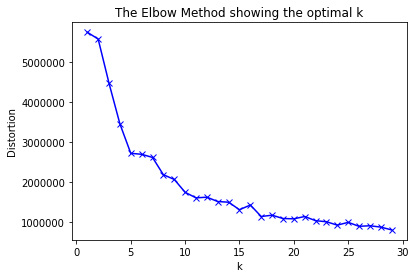

In [90]:
# k means determine k
distortions = []
kmeansdf = df_with_two_frames.drop(['FORECLOSURE','Masked_CustomerID','CUSTOMERID'], axis = 1) 
dummy_df_with_two = pd.get_dummies(kmeansdf)
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dummy_df_with_two)
    kmeanModel.fit(dummy_df_with_two)
    distortions.append(sum(np.min(cdist(dummy_df_with_two, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dummy_df_with_two.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [92]:
#taking k = 11 as we dont see much drop

kmeans = KMeans(n_clusters=15)
kmeans.fit(dummy_df_with_two)

lab = kmeans.labels_
df_with_two_frames['clusters_15'] = lab

In [93]:
df_with_two_frames.head(5)

AGREEMENTID  tenure_diff  cent_tenure_completed  FORECLOSURE  CUSTOMERID  \
0     11220296        -1.00                   0.41          nan 12001295.00   
1     11220215        -3.00                   0.44          nan 12001214.00   
2     11220942        -1.00                   0.45          nan 12001941.00   
3     11221143       -24.00                   0.05          nan 12002142.00   
4     11221061       -20.00                   0.08          nan 12002060.00   

     LOAN_AMT  diff_roi  percent_roi  PRE_EMI_OS_AMOUNT  PAID_PRINCIPAL  \
0 45038874.00      1.25         7.27               0.00     11818209.55   
1 12010366.40      2.18        12.07               0.00      3187121.87   
2  4503887.40      0.94         5.26               0.00      1638725.92   
3  2540431.20      0.94         5.26               0.00        47897.34   
4  1726209.43      0.94         5.88               0.00        53365.06   

   percent_princi_paid  NET_LTV  FOIR PRODUCT  days_diff  l_city  \
0                26.24    49.71  1.00     LAP     686.00       5   
1                26.54    32.30  1.00     LAP     767.00       5   
2                36.38    29.99  0.36     LAP     440.00       1   
3                 1.89    35.47  0.38     LAP     414.00       1   
4                 3.09    24.10  0.23      HL     414.00       1   

   Masked_CustomerID  count_interaction    SCHEMEID  CURRENT_ROI  ORIGNAL_ROI  \
0                nan               0.00 10901103.00        17.17        15.92   
1                nan               0.00 10901121.00        18.10        15.92   
2                nan               0.00 10901121.00        17.79        16.86   
3                nan               0.00 10901113.00        17.79        16.86   
4                nan               0.00 10901104.00        15.92        14.98   

   level_1  DUEDAY  CITY_y  EMI_OS_AMOUNT    DPD  clusters_11  clusters_5  \
0        0      15       1              5 198.80            3           2   
1        0       5       1              5 208.80           10           4   
2        0       5       1              7  30.29            0           0   
3        0       5       1              2  12.75            7           0   
4        0       5       1              2  12.75            7           0   

   clusters_15  
0            6  
1            8  
2            0  
3           13  
4           13

In [190]:
train = df_with_two_frames[~pd.isnull(df_with_two_frames['FORECLOSURE'])]
test  = df_with_two_frames[pd.isnull(df_with_two_frames['FORECLOSURE'])]
print('train shape {}, test shape{}'.format(train.shape,test.shape))
train_foreclosure.shape,test_foreclosure.shape
train_wo_city  = train.drop(['CUSTOMERID',
                                 'Masked_CustomerID','CITY_x','days_since_loan','INTEREST_START_DATE'],axis = 1)
test_wo_city   = test.drop(['CUSTOMERID',
                                 'Masked_CustomerID','CITY_x','days_since_loan','INTEREST_START_DATE'],axis = 1)
train_dummy = pd.get_dummies(train_wo_city) 
test_dummy  = pd.get_dummies(test_wo_city)
train_x = train_dummy.drop('FORECLOSURE', axis = 1)
train_y = train_dummy['FORECLOSURE']
test_x  = test_dummy.drop('FORECLOSURE', axis = 1)
print(train_x.shape,train_y.shape,test_x.shape)
from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_x)
train_x_scaled = scaler_impute.transform(train_x)
test_x_scaled  = scaler_impute.transform(test_x)
train_x_scaled_df = pd.DataFrame(train_x_scaled, columns=train_x.columns)
test_x_scaled_df  = pd.DataFrame(test_x_scaled, columns=test_x.columns)
train_x_scaled_df.shape,test_x_scaled_df.shape
x_train,x_val,y_train,y_val = train_test_split(train_x_scaled_df,train_y, test_size = 0.2)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

train shape (20012, 29), test shape(13342, 29)
(20012, 26) (20012,) (13342, 26)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


((16009, 26), (4003, 26), (16009,), (4003,))

In [189]:
train_x.dtypes

AGREEMENTID                       int64
tenure_diff                     float64
cent_tenure_completed           float64
LOAN_AMT                        float64
INTEREST_START_DATE      datetime64[ns]
diff_roi                        float64
percent_roi                     float64
PRE_EMI_OS_AMOUNT               float64
PAID_PRINCIPAL                  float64
percent_princi_paid             float64
NET_LTV                         float64
FOIR                            float64
days_diff                       float64
l_city                            int64
count_interaction               float64
SCHEMEID                        float64
CURRENT_ROI                     float64
ORIGNAL_ROI                     float64
level_1                           int64
DUEDAY                            int64
CITY_y                            int64
EMI_OS_AMOUNT                     int64
DPD                             float64
PRODUCT_HL                        uint8
PRODUCT_LAP                       uint8


In [98]:
lr = [1]

for i in lr:
    model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.15,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1, min_child_weight=i)
    model.fit(x_train,y_train, eval_metric='auc')
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(i)
    print(auc(fpr,tpr))
    print('----------')

1
0.9956999787172177
----------


In [97]:
model = CatBoostClassifier()
model.fit(x_train,y_train)
pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
print(i)
print(auc(fpr,tpr))
print('----------')

Learning rate set to 0.036725
0:	learn: 0.6087294	total: 129ms	remaining: 2m 9s
1:	learn: 0.5354963	total: 212ms	remaining: 1m 45s
2:	learn: 0.4803115	total: 294ms	remaining: 1m 37s
3:	learn: 0.4330701	total: 368ms	remaining: 1m 31s
4:	learn: 0.3892667	total: 451ms	remaining: 1m 29s
5:	learn: 0.3529221	total: 523ms	remaining: 1m 26s
6:	learn: 0.3215814	total: 597ms	remaining: 1m 24s
7:	learn: 0.2977622	total: 682ms	remaining: 1m 24s
8:	learn: 0.2818792	total: 757ms	remaining: 1m 23s
9:	learn: 0.2599372	total: 825ms	remaining: 1m 21s
10:	learn: 0.2446068	total: 906ms	remaining: 1m 21s
11:	learn: 0.2293756	total: 990ms	remaining: 1m 21s
12:	learn: 0.2153520	total: 1.07s	remaining: 1m 20s
13:	learn: 0.2019658	total: 1.14s	remaining: 1m 20s
14:	learn: 0.1922281	total: 1.22s	remaining: 1m 20s
15:	learn: 0.1827415	total: 1.29s	remaining: 1m 19s
16:	learn: 0.1742698	total: 1.36s	remaining: 1m 18s
17:	learn: 0.1685475	total: 1.43s	remaining: 1m 18s
18:	learn: 0.1626111	total: 1.51s	remaining: 

160:	learn: 0.0627070	total: 12.2s	remaining: 1m 3s
161:	learn: 0.0625714	total: 12.3s	remaining: 1m 3s
162:	learn: 0.0624923	total: 12.4s	remaining: 1m 3s
163:	learn: 0.0624241	total: 12.4s	remaining: 1m 3s
164:	learn: 0.0623378	total: 12.5s	remaining: 1m 3s
165:	learn: 0.0620733	total: 12.6s	remaining: 1m 3s
166:	learn: 0.0614584	total: 12.7s	remaining: 1m 3s
167:	learn: 0.0614218	total: 12.7s	remaining: 1m 3s
168:	learn: 0.0614026	total: 12.8s	remaining: 1m 3s
169:	learn: 0.0610793	total: 12.9s	remaining: 1m 2s
170:	learn: 0.0605911	total: 13s	remaining: 1m 2s
171:	learn: 0.0602805	total: 13s	remaining: 1m 2s
172:	learn: 0.0599371	total: 13.1s	remaining: 1m 2s
173:	learn: 0.0598336	total: 13.2s	remaining: 1m 2s
174:	learn: 0.0597290	total: 13.3s	remaining: 1m 2s
175:	learn: 0.0596613	total: 13.3s	remaining: 1m 2s
176:	learn: 0.0593115	total: 13.4s	remaining: 1m 2s
177:	learn: 0.0592292	total: 13.5s	remaining: 1m 2s
178:	learn: 0.0591771	total: 13.6s	remaining: 1m 2s
179:	learn: 0.05

321:	learn: 0.0457844	total: 24.6s	remaining: 51.9s
322:	learn: 0.0457714	total: 24.7s	remaining: 51.8s
323:	learn: 0.0457591	total: 24.8s	remaining: 51.7s
324:	learn: 0.0456596	total: 24.9s	remaining: 51.6s
325:	learn: 0.0456272	total: 24.9s	remaining: 51.6s
326:	learn: 0.0455480	total: 25s	remaining: 51.5s
327:	learn: 0.0455098	total: 25.1s	remaining: 51.4s
328:	learn: 0.0453666	total: 25.1s	remaining: 51.3s
329:	learn: 0.0453491	total: 25.2s	remaining: 51.2s
330:	learn: 0.0453176	total: 25.3s	remaining: 51.2s
331:	learn: 0.0452344	total: 25.4s	remaining: 51.1s
332:	learn: 0.0451805	total: 25.5s	remaining: 51s
333:	learn: 0.0450507	total: 25.5s	remaining: 50.9s
334:	learn: 0.0450401	total: 25.6s	remaining: 50.8s
335:	learn: 0.0449635	total: 25.7s	remaining: 50.7s
336:	learn: 0.0449408	total: 25.7s	remaining: 50.6s
337:	learn: 0.0449212	total: 25.8s	remaining: 50.5s
338:	learn: 0.0449127	total: 25.9s	remaining: 50.5s
339:	learn: 0.0448776	total: 25.9s	remaining: 50.4s
340:	learn: 0.04

482:	learn: 0.0387935	total: 36.1s	remaining: 38.6s
483:	learn: 0.0387577	total: 36.1s	remaining: 38.5s
484:	learn: 0.0387412	total: 36.2s	remaining: 38.4s
485:	learn: 0.0387362	total: 36.3s	remaining: 38.4s
486:	learn: 0.0387022	total: 36.3s	remaining: 38.3s
487:	learn: 0.0386795	total: 36.4s	remaining: 38.2s
488:	learn: 0.0386546	total: 36.5s	remaining: 38.1s
489:	learn: 0.0386109	total: 36.6s	remaining: 38.1s
490:	learn: 0.0383646	total: 36.6s	remaining: 38s
491:	learn: 0.0383629	total: 36.7s	remaining: 37.9s
492:	learn: 0.0383282	total: 36.8s	remaining: 37.8s
493:	learn: 0.0382811	total: 36.9s	remaining: 37.8s
494:	learn: 0.0382792	total: 36.9s	remaining: 37.7s
495:	learn: 0.0382619	total: 37s	remaining: 37.6s
496:	learn: 0.0381328	total: 37s	remaining: 37.5s
497:	learn: 0.0381197	total: 37.1s	remaining: 37.4s
498:	learn: 0.0381045	total: 37.2s	remaining: 37.3s
499:	learn: 0.0380226	total: 37.3s	remaining: 37.3s
500:	learn: 0.0379973	total: 37.3s	remaining: 37.2s
501:	learn: 0.0379

641:	learn: 0.0339194	total: 47.3s	remaining: 26.4s
642:	learn: 0.0339175	total: 47.3s	remaining: 26.3s
643:	learn: 0.0339008	total: 47.4s	remaining: 26.2s
644:	learn: 0.0338929	total: 47.5s	remaining: 26.1s
645:	learn: 0.0338809	total: 47.5s	remaining: 26s
646:	learn: 0.0338060	total: 47.6s	remaining: 26s
647:	learn: 0.0337954	total: 47.7s	remaining: 25.9s
648:	learn: 0.0337573	total: 47.7s	remaining: 25.8s
649:	learn: 0.0336903	total: 47.8s	remaining: 25.7s
650:	learn: 0.0336771	total: 47.9s	remaining: 25.7s
651:	learn: 0.0336699	total: 47.9s	remaining: 25.6s
652:	learn: 0.0336474	total: 48s	remaining: 25.5s
653:	learn: 0.0336091	total: 48.1s	remaining: 25.4s
654:	learn: 0.0335794	total: 48.2s	remaining: 25.4s
655:	learn: 0.0335682	total: 48.2s	remaining: 25.3s
656:	learn: 0.0335250	total: 48.3s	remaining: 25.2s
657:	learn: 0.0335184	total: 48.4s	remaining: 25.1s
658:	learn: 0.0335065	total: 48.4s	remaining: 25.1s
659:	learn: 0.0334676	total: 48.5s	remaining: 25s
660:	learn: 0.033457

802:	learn: 0.0305724	total: 58.6s	remaining: 14.4s
803:	learn: 0.0305607	total: 58.6s	remaining: 14.3s
804:	learn: 0.0305412	total: 58.7s	remaining: 14.2s
805:	learn: 0.0305368	total: 58.8s	remaining: 14.1s
806:	learn: 0.0304073	total: 58.9s	remaining: 14.1s
807:	learn: 0.0303716	total: 58.9s	remaining: 14s
808:	learn: 0.0302858	total: 59s	remaining: 13.9s
809:	learn: 0.0302783	total: 59.1s	remaining: 13.9s
810:	learn: 0.0302707	total: 59.1s	remaining: 13.8s
811:	learn: 0.0302580	total: 59.2s	remaining: 13.7s
812:	learn: 0.0302509	total: 59.3s	remaining: 13.6s
813:	learn: 0.0302494	total: 59.3s	remaining: 13.6s
814:	learn: 0.0302463	total: 59.4s	remaining: 13.5s
815:	learn: 0.0302408	total: 59.5s	remaining: 13.4s
816:	learn: 0.0302402	total: 59.6s	remaining: 13.3s
817:	learn: 0.0302346	total: 59.6s	remaining: 13.3s
818:	learn: 0.0302181	total: 59.7s	remaining: 13.2s
819:	learn: 0.0302152	total: 59.8s	remaining: 13.1s
820:	learn: 0.0302016	total: 59.8s	remaining: 13s
821:	learn: 0.0301

962:	learn: 0.0277667	total: 1m 9s	remaining: 2.69s
963:	learn: 0.0277633	total: 1m 9s	remaining: 2.61s
964:	learn: 0.0277525	total: 1m 10s	remaining: 2.54s
965:	learn: 0.0277397	total: 1m 10s	remaining: 2.47s
966:	learn: 0.0277378	total: 1m 10s	remaining: 2.4s
967:	learn: 0.0277350	total: 1m 10s	remaining: 2.32s
968:	learn: 0.0277321	total: 1m 10s	remaining: 2.25s
969:	learn: 0.0277297	total: 1m 10s	remaining: 2.18s
970:	learn: 0.0277276	total: 1m 10s	remaining: 2.11s
971:	learn: 0.0277262	total: 1m 10s	remaining: 2.03s
972:	learn: 0.0277238	total: 1m 10s	remaining: 1.96s
973:	learn: 0.0277153	total: 1m 10s	remaining: 1.89s
974:	learn: 0.0276872	total: 1m 10s	remaining: 1.82s
975:	learn: 0.0276508	total: 1m 10s	remaining: 1.74s
976:	learn: 0.0276420	total: 1m 10s	remaining: 1.67s
977:	learn: 0.0276392	total: 1m 11s	remaining: 1.6s
978:	learn: 0.0276388	total: 1m 11s	remaining: 1.53s
979:	learn: 0.0276373	total: 1m 11s	remaining: 1.45s
980:	learn: 0.0276196	total: 1m 11s	remaining: 1.3

In [228]:
#trying smote
x_val_copy   = x_val.copy()
x_train_copy  = x_train.copy()
y_train_copy = y_train.copy()

#sns.barplot(y_train_copy)
#plt.show()
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.5,random_state=2,k_neighbors=7,)
print(y_train_copy.value_counts())
print(y_train.shape, x_train.shape)
x_train_smot, y_train_smot = sm.fit_sample(x_train_copy,y_train.ravel())
x_train_smot.shape,y_train_smot.shape

x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)


0.00    14619
1.00     1390
Name: FORECLOSURE, dtype: int64
(16009,) (16009, 29)


In [148]:
lr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in lr:
    sm = SMOTE(sampling_strategy=i,random_state=2,k_neighbors=7,)
    x_train_smot, y_train_smot = sm.fit_sample(x_train_copy,y_train.ravel())
    x_train_smot.shape,y_train_smot.shape
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)

    
    
    
    model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.08,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    model.fit(x_train_smot,y_train_smot, eval_metric='auc')
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(i)
    print(auc(fpr,tpr))
    print('----------')

0.1
0.9964428097775749
----------
0.2
0.9967560214952728
----------
0.3
0.9971728913766849
----------
0.4
0.9969305251665617
----------
0.5
0.996722463096948
----------
0.6
0.9965367732928843
----------
0.7
0.9971080118065903
----------
0.8
0.9971356042674351
----------
0.9
0.9973421748526786
----------


In [149]:
lr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in lr:
    sm = SMOTE(sampling_strategy=i,random_state=2,k_neighbors=7,)
    x_train_smot, y_train_smot = sm.fit_sample(x_train_copy,y_train.ravel())
    x_train_smot.shape,y_train_smot.shape
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)
    model       = CatBoostClassifier(iterations=600,  eval_metric='AUC',bootstrap_type = 'Bernoulli',depth = 6,l2_leaf_reg=7,
                                     learning_rate=0.08)
    model.fit(x_train_smot,y_train_smot,cat_features=[], use_best_model=True, verbose=200)    
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(i)
    print(auc(fpr,tpr))
    print('----------')



You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 83.6ms	remaining: 50.1s
200:	total: 13.7s	remaining: 27.1s
400:	total: 27.7s	remaining: 13.7s
599:	total: 41.2s	remaining: 0us
0.1
0.9947283484942719
----------


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 81.1ms	remaining: 48.6s
200:	total: 14.6s	remaining: 29s
400:	total: 28.8s	remaining: 14.3s
599:	total: 43s	remaining: 0us
0.2
0.9948133631033613
----------


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 84.1ms	remaining: 50.4s
200:	total: 14.8s	remaining: 29.5s
400:	total: 29.6s	remaining: 14.7s
599:	total: 44.5s	remaining: 0us
0.3
0.9939840977936472
----------


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 86.5ms	remaining: 51.8s
200:	total: 15.3s	remaining: 30.4s
400:	total: 30.3s	remaining: 15s
599:	total: 45.1s	remaining: 0us
0.4
0.9949692232200252
----------


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 83.7ms	remaining: 50.1s
200:	total: 15.2s	remaining: 30.1s
400:	total: 30.3s	remaining: 15s
599:	total: 45.2s	remaining: 0us
0.5
0.9943875443157293
----------


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 88.2ms	remaining: 52.8s
200:	total: 16s	remaining: 31.7s
400:	total: 31.5s	remaining: 15.6s
599:	total: 46.5s	remaining: 0us
0.6
0.9948871915796758
----------


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 87.3ms	remaining: 52.3s
200:	total: 15.3s	remaining: 30.4s
400:	total: 30.5s	remaining: 15.2s
599:	total: 45.7s	remaining: 0us
0.7
0.9961184119271023
----------


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 105ms	remaining: 1m 3s
200:	total: 18.4s	remaining: 36.6s
400:	total: 36.4s	remaining: 18.1s
599:	total: 54.6s	remaining: 0us
0.8
0.994993086969945
----------


You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 104ms	remaining: 1m 2s
200:	total: 18.3s	remaining: 36.4s
400:	total: 36.3s	remaining: 18s
599:	total: 54.2s	remaining: 0us
0.9
0.995287655133018
----------


In [239]:
lr = [1]

for i in lr:
    sm = SMOTE( sampling_strategy=0.4,random_state=2,k_neighbors=7,)
    x_train_smot, y_train_smot = sm.fit_sample(x_train_copy,y_train.ravel())
    x_train_smot.shape,y_train_smot.shape
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train_copy.columns)

    #x_train_smot = x_train_smot.drop(['clusters_11','clusters_5', 'clusters_15'], axis = 1)
   # x_val        = x_val.drop(['clusters_11','clusters_5', 'clusters_15'], axis = 1)
    
    param = [1]
    for x in param:
        model       = XGBClassifier(n_estimators=800,booster='gbtree',learning_rate=0.08,max_depth=15,colsample_bytree=0.9,reg_alpha=1)

        model.fit(x_train_smot,y_train_smot, eval_metric='auc')

        pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
        pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
        fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2

        print(x)
        print(auc(fpr,tpr))
        print('----------')
    
   

0.5
0.9958426835210233
----------
0.6
0.9959092499948531
----------
0.7
0.9963415889485928
----------
0.8
0.9964829569239426
----------
0.9
0.9966771663269719
----------


KeyboardInterrupt: 

In [256]:
def get_models():
    """Generate a library of base learners."""
    
    xg      = XGBClassifier(n_estimators=350,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    
    
    cat    = CatBoostClassifier() 
    RF_tun = RandomForestClassifier()
    et     = ExtraTreesClassifier()
    models = {'xg': xg,
              
              'RF_tun' : RF_tun,
              'et'     : et,
              'cat'    : cat
              #'bag':bag,
              #'xg_1':xg_1,
              }

    return models
models = get_models()

In [257]:
from mlens.ensemble import SuperLearner

meta_learner = XGBClassifier()

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner,proba=True)
# Train the ensemble
sl.fit(x_train_smot,y_train_smot)
# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))



Fitting 2 layers
Processing layer-1             done | 00:16:43
Processing layer-2             done | 00:00:01
Fit complete                        | 00:16:46

Predicting 2 layers
Processing layer-1             

C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parameter value (10) has changed since model was fitted ('warn').
  (lpar, rpar), ParameterChangeWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:313: ParameterChangeWarning: Parame

done | 00:00:10
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:12
0.99626198368092


In [184]:
def get_models():
    """Generate a library of base learners."""
    RF      = RandomForestClassifier(n_estimators=350)
    knn     = KNeighborsClassifier(n_neighbors=3)
    nn      = MLPClassifier((80, 10), early_stopping=False)
    log     = LogisticRegression()
    #cat     = CatBoostClassifier()
    knn_2   = KNeighborsClassifier(n_neighbors=21)
    et_g    = ExtraTreesClassifier(n_estimators=250, criterion='gini')
    et_e    = ExtraTreesClassifier(n_estimators=250, criterion='entropy')
    knn_51  = KNeighborsClassifier(n_neighbors=51)
    xg      =  XGBClassifier(n_estimators=350,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    bag     = BaggingClassifier(n_estimators=100, max_features=0.8)
    ada     = GradientBoostingClassifier()
    xg_n    = XGBClassifier(learning_rate=0.05, max_depth=20,n_estimators=450)
    RF_E    = RandomForestClassifier(n_estimators=450, criterion='entropy')
    RF_tun  = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True)
    knn_128 = KNeighborsClassifier(n_neighbors=128)
    xg_1    = XGBClassifier(learning_rate=0.2,max_depth=7,colsample_bytree=0.7)
    
    
    models = {'xg': xg,
              'knn': knn,
              'log': log,
              'mlp-nn': nn,
              #'cat' : cat,
              'random forest': RF,
              'knn_2':knn_2,
              'knn_51':knn_51,
              'et_g' : et_g,
              'et_e':et_e,
              'RF_tun' : RF_tun,
              'RF_E': RF_E,
              'xg_n':xg_n,
              'ada' : ada,
              'bag':bag,
              'xg_1':xg_1,
              'knn_128':knn_128
             }

    return models
models = get_models()

In [220]:
from mlens.ensemble import SuperLearner


#x_train_copy   = x_train_copy.drop(['clusters_11','clusters_5', 'clusters_15'],axis = 1)
print(x_train_copy.shape)

#x_val_wo_clust = x_val.drop(['clusters_11','clusters_5', 'clusters_15'],axis = 1)
print(x_val_wo_clust.shape)




sm = SMOTE(sampling_strategy=0.9,random_state=2,k_neighbors=7,)
x_train_smot, y_train_smot = sm.fit_sample(x_train_copy,y_train.ravel())
x_train_smot.shape,y_train_smot.shape
x_train_smot = pd.DataFrame(x_train_smot, columns=x_train_copy.columns)



meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005, 
    )
meta_rf  = RandomForestClassifier(n_estimators=700,criterion='entropy',max_depth=35,max_features=9,oob_score=True)

meta_et  = BaggingClassifier(n_estimators=300,max_features=0.9)


meta_lev_2 = XGBClassifier(n_estimators=850,subsample=0.8,learning_rate=0.08)



# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=5,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta([meta_learner,meta_rf,meta_et],proba=True)
sl.add_meta(meta_lev_2,proba = True)
# Train the ensemble
sl.fit(x_train_smot,y_train_smot)

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val_wo_clust),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))


(16009, 26)
(4003, 26)

Fitting 3 layers
Processing layer-1             done | 00:15:23
Processing layer-2             done | 00:01:31
Processing layer-3             done | 00:00:10
Fit complete                        | 00:17:06

Predicting 3 layers
Processing layer-1             done | 00:00:27
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:28
0.910522306631256


In [219]:

# Predict the test set

p_sl = pd.DataFrame(sl.predict_proba(x_val_wo_clust),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, p_sl['FORECLOSURE'])#, pos_label=2
print(auc(fpr,tpr))
try_1


Predicting 3 layers
Processing layer-1             done | 00:00:24
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:26
0.9053390429525319


In [305]:
from mlens.ensemble import SuperLearner

meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005, 
    )
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(models.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(train_x_scaled_df,train_y)

# Predict the test set
p_sl = pd.DataFrame(sl.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])

p_sl      = p_sl[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_40_stacked_1 = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : p_sl['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_40_stacked_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_43_stacked_1.csv', index = False)




Fitting 2 layers
Processing layer-1             done | 00:17:30
Processing layer-2             done | 00:00:10
Fit complete                        | 00:17:41

Predicting 2 layers
Processing layer-1             done | 00:00:34
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:35


In [261]:
train_x_scaled_df.shape,test_x_scaled_df.shape,train_y.shape

((20012, 26), (13342, 26), (20012,))

In [272]:
#train_x_scaled_df.isnull().sum()
test_x_scaled_df['DPD'] = test_x_scaled_df['DPD'].fillna(0)
test_x_scaled_df.isnull().sum()

AGREEMENTID              0
tenure_diff              0
cent_tenure_completed    0
LOAN_AMT                 0
diff_roi                 0
percent_roi              0
PRE_EMI_OS_AMOUNT        0
PAID_PRINCIPAL           0
percent_princi_paid      0
NET_LTV                  0
FOIR                     0
days_diff                0
l_city                   0
count_interaction        0
SCHEMEID                 0
CURRENT_ROI              0
ORIGNAL_ROI              0
level_1                  0
DUEDAY                   0
CITY_y                   0
EMI_OS_AMOUNT            0
DPD                      0
PRODUCT_HL               0
PRODUCT_LAP              0
PRODUCT_STHL             0
PRODUCT_STLAP            0
dtype: int64

In [259]:
cust_comments.nunique()

TicketId                  7511
Type                         8
SubType                     50
Status                       4
Date                      6057
Preprocessed_EmailBody    7184
Preprocessed_Subject      5830
Masked_CustomerID         2709
Masked_AgreementID         402
dtype: int64

### Date 5th March

In [57]:
var = [1]
for i in var:
    model       = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
    model.fit(x_train,y_train, eval_metric='auc')
#    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
#    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)


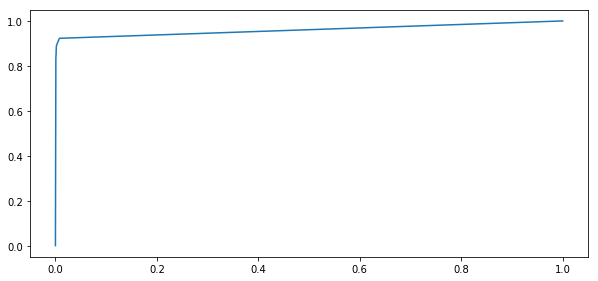

In [62]:
from sklearn.metrics import f1_score

probs = pd.DataFrame(model.predict_proba(x_val),columns=['Neg_1', 'Pos_2'])
#print(probs.head(10))
cut_offs = []
tpr      = []#true positive rate / sensitivity
fpr      = []#false positive rate/ specificity
y        = [] 
for cut_off in np.linspace(0,1,11):
    test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
    tn,fp,fn,tp = confusion_matrix(y_val, test_pred2, labels =[0,1]).ravel()
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    cut_offs.append(cut_off)
    tpr.append(sensitivity)
    fpr.append(1-specificity)
    #print(y.append(f1_score(y_val, test_pred2)))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(fpr,tpr)
plt.show()


In [76]:
from sklearn.metrics import classification_report
probs = pd.DataFrame(model.predict_proba(x_val),columns=['Neg_1', 'Pos_2'])
test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > 0.2 else 0)
print(classification_report(y_val, test_pred2))

fpr,tpr,cutoffs = roc_curve(y_val, test_pred2)#, pos_label=2
print(auc(fpr,tpr))


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3615
         1.0       0.96      0.90      0.93       388

   micro avg       0.99      0.99      0.99      4003
   macro avg       0.97      0.95      0.96      4003
weighted avg       0.99      0.99      0.99      4003

0.950106586246


In [ ]:
#SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.8,random_state=2,k_neighbors=5)
print(y_train.value_counts())
print(y_train.shape, x_train.shape)
x_train_smot, y_train_smot = sm.fit_sample(x_train,y_train.ravel())
x_train_smot.shape,y_train_smot.shape

x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)


In [104]:
var = [1]
from imblearn.ensemble import BalancedRandomForestClassifier
for i in var:
    model       = BalancedRandomForestClassifier(n_estimators=450)
    model.fit(x_train_smot,y_train_smot)
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(i)
    print(auc(fpr,tpr))
    print('----------')
    

1
0.991873779071
----------


In [106]:
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

model       = RUSBoostClassifier()
model.fit(x_train_smot,y_train_smot)
pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
print(i)
print(auc(fpr,tpr))
print('----------')

1
0.989966633871
----------


In [111]:
xg    = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
from imblearn.ensemble import BalancedBaggingClassifier
model = BalancedBaggingClassifier(base_estimator=xg,n_estimators=10)
model.fit(x_train,y_train)
pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
print(i)
print(auc(fpr,tpr))
print('----------')


1
0.992995251743
----------


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.8,random_state=2,k_neighbors=5)
print(y_train.value_counts())
print(y_train.shape, x_train.shape)
x_train_smot, y_train_smot = sm.fit_sample(x_train,y_train.ravel())
x_train_smot.shape,y_train_smot.shape

x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)

In [160]:
duplicates = [1]

for dup in duplicates:
    sm = SMOTE(sampling_strategy=1,random_state=2,k_neighbors=5)
    x_train_smot, y_train_smot = sm.fit_sample(x_train,y_train.ravel())
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)


    var_1 =[1]
    for i in var_1:
        
        model       = BalancedRandomForestClassifier(n_estimators=400, criterion='entropy',
                                                 max_depth = 132312,max_features=19,min_samples_split=3,
                                                 random_state=36,bootstrap = True)
        model.fit(x_train_smot,y_train_smot)
        pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
        pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
        fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
        print(i)
        print(auc(fpr,tpr))
        print('----------')

1
0.996283383953
----------


In [215]:
duplicates = [1]
from sklearn.feature_selection import RFE, f_classif , RFECV

for dup in duplicates:
    sm = SMOTE(sampling_strategy=1,random_state=2,k_neighbors=5)
    x_train_smot, y_train_smot = sm.fit_sample(x_train,y_train.ravel())
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)
    #x_train_smot = x_train_smot.drop('AGREEMENTID', axis = 1)
    #x_val_copy = x_val.drop('AGREEMENTID', axis = 1)


    var_1 =[20]
    for i in var_1:
        
        rfe       = BalancedRandomForestClassifier(n_estimators=400,max_features=17,criterion='entropy',
                                                 max_depth = 31,min_samples_split=3,
                                                 random_state=36, bootstrap = True)
        #rfe = RFECV(model,15)
        rfe.fit(x_train_smot,y_train_smot)
        pred_cat    = pd.DataFrame(rfe.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
        pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
        fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
        print(i)
        print(auc(fpr,tpr))
        print('----------')
#since agreement id affects greatly we will try something different

20
0.995084232643
----------


In [84]:
duplicates = [1]
from sklearn.feature_selection import RFE, f_classif , RFECV
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE, ADASYN

for dup in duplicates:
    sm = ADASYN()
    x_train_smot, y_train_smot = sm.fit_resample(x_train,y_train.ravel())
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)
    print(x_train.shape,y_train.shape)
    print(x_train_smot.shape,x_train_smot.shape)
    #x_train_smot = x_train_smot.drop('AGREEMENTID', axis = 1)
    #x_val_copy = x_val.drop('AGREEMENTID', axis = 1)


    var_1 =[20]
    for i in var_1:
        
        rfe       = RandomForestClassifier(n_estimators=400,max_features=17,criterion='entropy',
                                                 max_depth = 31,min_samples_split=3,
                                                 random_state=36, bootstrap = True)
        #rfe = RFECV(model,15)
        rfe.fit(x_train_smot,y_train_smot)
        pred_cat    = pd.DataFrame(rfe.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
        pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
        fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
        print(i)
        print(auc(fpr,tpr))
        print('----------')
#since agreement id affects greatly we will try something different

(16009, 28) (16009,)
(29317, 28) (29317, 28)
20
0.99045508133
----------


In [85]:
x_val.head(1)
one_row = x_val.iloc[1719].values.reshape(1,-1)
one_row
pred_one_row= rfe.predict_proba(one_row)
pred_one_row

array([[ 0.99375,  0.00625]])

In [196]:
import shap

# DF, based on which importance is checked
X_importance = x_val

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

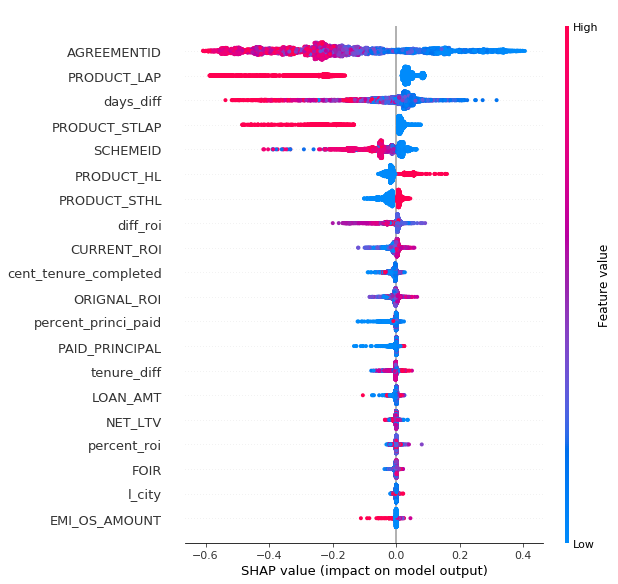

In [225]:
# Plot summary_plot
shap.summary_plot(shap_values[1], X_importance)


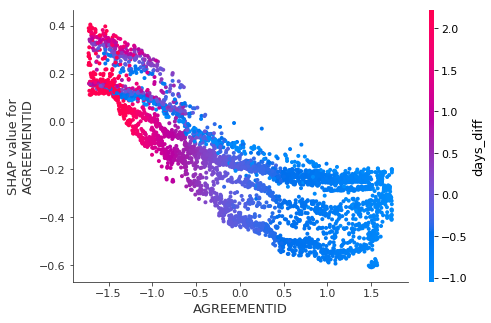

In [233]:
# make plot.
shap.dependence_plot('AGREEMENTID', shap_values[1], X_importance, interaction_index="days_diff")

platt scaling

In [86]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rfe)

# Calculate Shap values
shap_values = explainer.shap_values(one_row)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], one_row,feature_names=x_val.columns)

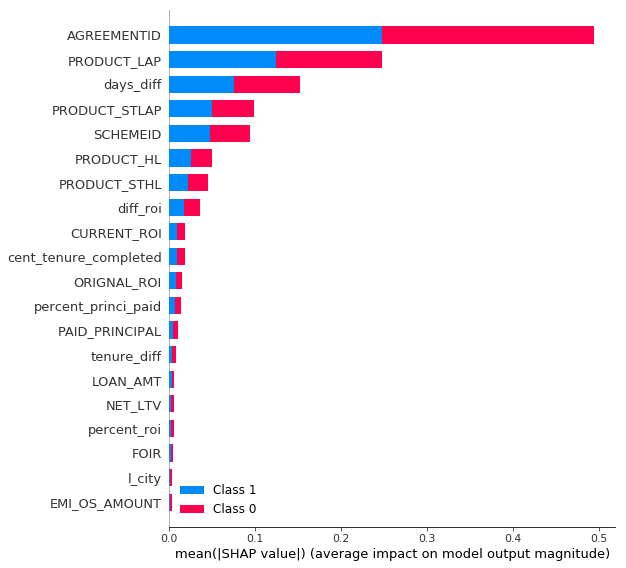

In [220]:
shap.summary_plot(shap_values, X_importance,plot_type='violin')

In [224]:
correlation = df_with_two_frames.corr().reset_index()
correlation[['index','AGREEMENTID','FORECLOSURE']]

index  AGREEMENTID  FORECLOSURE
0             AGREEMENTID         1.00        -0.36
1             tenure_diff        -0.18         0.13
2   cent_tenure_completed        -0.62         0.14
3             FORECLOSURE        -0.36         1.00
4              CUSTOMERID         1.00        -0.36
5                LOAN_AMT        -0.06         0.00
6                diff_roi         0.07         0.01
7             percent_roi         0.12         0.00
8       PRE_EMI_OS_AMOUNT        -0.00        -0.00
9          PAID_PRINCIPAL        -0.03         0.00
10    percent_princi_paid        -0.34         0.07
11                NET_LTV         0.18        -0.00
12                   FOIR        -0.01        -0.00
13              days_diff        -0.77         0.17
14                 l_city         0.16        -0.06
15      Masked_CustomerID         1.00        -0.32
16      count_interaction        -0.18         0.09
17               SCHEMEID         0.40        -0.26
18            CURRENT_ROI        -0.35         0.07
19            ORIGNAL_ROI        -0.31         0.05
20                level_1          nan          nan
21                 DUEDAY        -0.32         0.21
22                 CITY_y        -0.04         0.01
23          EMI_OS_AMOUNT        -0.20         0.02
24                    DPD        -0.12         0.01

In [191]:
duplicates = [1]

for dup in duplicates:
    sm = SMOTE(sampling_strategy=1,random_state=2,k_neighbors=5)
    x_train_smot, y_train_smot = sm.fit_sample(x_train,y_train.ravel())
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)
    x_train_smot = x_train_smot.drop('AGREEMENTID', axis = 1)
    x_val_copy = x_val.drop('AGREEMENTID', axis = 1)


    var_1 =[1]
    for i in var_1:
        xg    = XGBClassifier(n_estimators=600,booster='gbtree',learning_rate=0.1,max_depth=15,colsample_bytree=0.9,scale_pos_weight=1)
        from imblearn.ensemble import BalancedBaggingClassifier
        model = BalancedBaggingClassifier(base_estimator=xg,n_estimators=10)
        model.fit(x_train_smot,y_train_smot)
        pred_cat    = pd.DataFrame(model.predict_proba(x_val_copy),columns= ['NEG','FORECLOSURE'])
        pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
        fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
        print(i)
        print(auc(fpr,tpr))
        print('----------')

1
0.979247968551
----------


In [ ]:
model       = XGBClassifier()
model.fit(x_train_smot,y_train_smot)
pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
print(i)
print(auc(fpr,tpr))
print('----------')

In [323]:
cust_tran.head(5)

AGREEMENTID  CUSTOMERID    LOAN_AMT  NET_DISBURSED_AMT INTEREST_START_DATE  \
0     11220001 12001000.00 11710107.24        11710107.24          2010-08-30   
1     11220002 12001001.00 19290253.32        19290253.32          2010-09-15   
2     11220003 12001002.00  4053498.66         4053498.66          2010-09-06   
3     11220004 12001003.00 13257031.92        13257031.92          2010-09-29   
4     11220005 12001004.00 13211403.04        13211403.04          2010-09-06   

   CURRENT_ROI  ORIGNAL_ROI  CURRENT_TENOR  ORIGNAL_TENOR  DUEDAY  \
0        13.73        10.61          58.00            120       1   
1        13.73        10.61         137.00            180       1   
2        17.17        12.49         360.00            180       5   
3        15.61        10.92         198.00            180       5   
4        16.54        11.86         142.00            180       5   

  AUTHORIZATIONDATE    CITY  PRE_EMI_DUEAMT  PRE_EMI_RECEIVED_AMT  \
0        2010-08-29  MUMBAI         7994.27               7994.27   
1        2010-09-15  MUMBAI       100504.58             100504.58   
2        2010-09-06  MUMBAI            0.00                  0.00   
3        2010-09-29  MUMBAI        28441.73              28441.73   
4        2010-09-06  MUMBAI            0.00                  0.00   

   PRE_EMI_OS_AMOUNT  EMI_DUEAMT  EMI_RECEIVED_AMT  EMI_OS_AMOUNT  \
0               0.00  7516698.51        7332154.12      184544.40   
1               0.00 10619027.21       10339579.13      279448.08   
2               0.00  2439241.88        2439241.88           0.00   
3               0.00  7211964.72        7211964.72           0.00   
4               0.00  7712033.89        7712033.89           0.00   

   EXCESS_AVAILABLE  EXCESS_ADJUSTED_AMT  BALANCE_EXCESS  NET_RECEIVABLE  \
0          29042.46             29042.46            0.00       184544.40   
1              0.00                 0.00            0.00       279448.08   
2              0.44                 0.00            0.44           -0.44   
3              0.00                 0.00            0.00            0.00   
4              0.00                 0.00            0.00            0.00   

   OUTSTANDING_PRINCIPAL  PAID_PRINCIPAL  PAID_INTEREST  MONTHOPENING  \
0             2262176.82      9447930.42     2617476.02    9338009.12   
1            12347597.30      6942656.03     4945153.59   17138606.02   
2             3944954.28       108544.38     1549566.27    3944954.28   
3            10302778.81      2954253.12     4219463.67   12554722.51   
4             8479157.74      4732245.30     3812974.26   11782008.50   

  LAST_RECEIPT_DATE  LAST_RECEIPT_AMOUNT  NET_LTV  COMPLETED_TENURE  \
0        2013-11-01             83559.00    40.06                39   
1        2013-11-01            126530.00    84.31                38   
2        2013-11-05             30898.00    79.34                38   
3        2013-11-05             88256.00    86.86                37   
4        2013-11-05             91892.00    40.93                38   

   BALANCE_TENURE  DPD  FOIR PRODUCT    SCHEMEID NPA_IN_LAST_MONTH  \
0           19.00 0.00  0.60      HL 10901100.00               NaN   
1           99.00 0.00  0.60      HL 10901100.00               NaN   
2          322.00 0.00  0.91      HL 10901101.00               NaN   
3          161.00 0.00  0.97      HL 10901101.00               NaN   
4          104.00 0.00  0.73      HL 10901101.00               NaN   

  NPA_IN_CURRENT_MONTH  MOB  Year  
0                  NaN   39  2010  
1                  NaN   38  2010  
2                  NaN   38  2010  
3                  NaN   38  2010  
4                  NaN   38  2010

In [332]:
cust_demo['BRANCH_PINCODE'].unique()

array([ 400070.,      nan,  110001.,  560095.,  411005.,  380015.,
        500034.,  600017.,  391440.,  395002.,  625010.,  620017.,
             0.,  641002.,  600053.,  636004.,  605005.,  628002.,
        613009.,  632007.,  635109.,  641601.,  517501.,  570009.,
        302001.,  520003.,  627005.,  530016.,  624003.,  639001.,
        602001.,  637001.,  631501.,  612001.,  621212.,  518002.,
        524001.,  506009.,  622001.,  533101.,  603001.,  360001.,
        606601.,  422007.,  440010.,  500050.,  400053.,  500092.,
        534006.,  505001.])

In [330]:
x = cust_demo[cust_demo['BRANCH_PINCODE'] == 400070].sort_values('CUSTOMERID', ascending = True)
x.head(1000)

CUSTOMERID  CUST_CONSTTYPE_ID  CUST_CATEGORYID  PROFESSION   AGE  SEX  \
0       12001000                  1                5         nan 33.00    M   
1       12001001                  1                5         nan 44.00    M   
2       12001002                  1                7         nan 50.00    M   
3       12001003                  3                4         nan 40.00    M   
4       12001004                  3                4         nan 27.00    M   
5       12001005                  3                4         nan 43.00    M   
6       12001006                  3                4         nan 48.00    M   
7       12001007                  1                5         nan 33.00    M   
8       12001008                  1                4         nan 44.00    M   
9       12001009                  3                4         nan 37.00    M   
10      12001010                  1                5         nan 30.00    M   
11      12001011                  1                5         nan 33.00    M   
12      12001012                  1                5         nan 29.00    M   
13      12001013                  1                5         nan 32.00    M   
14      12001014                  1                5         nan 30.00    M   
15      12001015                  1                5         nan 41.00    M   
16      12001017                  1                4         nan 49.00    M   
17      12001018                  1                5         nan 42.00    M   
18      12001019                  3                4         nan 34.00    M   
19      12001020                  1                5         nan 32.00    F   
20      12001021                  1                7         nan 62.00    F   
21      12001022                  3                4         nan 37.00    M   
22      12001023                  1                5         nan 25.00    M   
23      12001024                  1                5         nan 28.00    M   
24      12001025                  1                4         nan 35.00    M   
25      12001026                  1                5         nan 26.00    M   
26      12001027                  1                5         nan 32.00    M   
27      12001028                  1                5         nan 31.00    M   
28      12001029                  1                4         nan 34.00    M   
29      12001030                  3                6         nan 25.00    M   
30      12001031                  1                4         nan 38.00    M   
31      12001033                  1                4         nan 50.00    M   
32      12001034                  1                5         nan 28.00    M   
33      12001035                  1                5         nan 30.00    M   
34      12001036                  1                5         nan 31.00    M   
35      12001037                  1                4         nan 42.00    M   
36      12001038                  1                4         nan 32.00    M   
37      12001039                  4                8         nan   nan  NaN   
38      12001040                  1                4         nan 49.00    M   
39      12001041                  3                4         nan 46.00    M   
40      12001042                  1                4         nan 56.00    M   
41      12001044                  1                4         nan 51.00    M   
42      12001045                  1                4         nan 45.00    M   
43      12001047                  1                5         nan 30.00    M   
44      12001048                  3                4         nan 37.00    F   
45      12001049                  1                4         nan 34.00    F   
46      12001050                  3                4         nan 45.00    F   
47      12001051                  1                5         nan 37.00    F   
48      12001052                  2                4         nan 43.00    F   
49      12001053                  1                4    

In [333]:
x = cust_demo[cust_demo['BRANCH_PINCODE'] == 110001].sort_values('CUSTOMERID', ascending = True)
x.head(1000)

CUSTOMERID  CUST_CONSTTYPE_ID  CUST_CATEGORYID  PROFESSION   AGE  SEX  \
82      12001099                  4                8         nan   nan  NaN   
91      12001110                  1                4         nan 48.00    F   
93      12001121                  1                4         nan 47.00    M   
104     12001137                  1                4         nan 34.00    M   
116     12001152                  1                6         nan 38.00    F   
118     12001154                  1                5         nan 42.00    M   
123     12001159                  4                8         nan   nan  NaN   
140     12001185                  1                5         nan 43.00    M   
141     12001186                  1                5         nan 53.00    M   
163     12001220                  4                8         nan   nan  NaN   
186     12001255                  1                5         nan 34.00    M   
196     12001265                  1                5         nan 28.00    M   
209     12001280                  1                6         nan 53.00    M   
220     12001307                  1                4         nan 48.00    M   
223     12001310                  1                5         nan 41.00    M   
232     12001319                  1                4         nan 70.00    M   
241     12001333                  1                4         nan 41.00    M   
245     12001337                  1                5         nan 35.00    M   
254     12001366                  1                5         nan 33.00    M   
260     12001376                  1                4         nan 36.00    M   
340     12001484                  1                6         nan 46.00    F   
357     12001524                  5                8         nan   nan  NaN   
363     12001535                  1                4         nan 47.00    M   
364     12001537                  1                4         nan 31.00    M   
365     12001538                  1                5         nan 39.00    M   
373     12001549                  1                4         nan 38.00    M   
389     12001567                  1                4         nan 35.00    M   
395     12001574                  1                4         nan 36.00    M   
399     12001580                  1                4         nan 41.00    M   
409     12001591                  1                5         nan 46.00    F   
411     12001594                  1                5         nan 47.00    M   
430     12001638                  1                4         nan 62.00    M   
447     12001660                  1                4         nan 40.00    M   
450     12001665                  1                5         nan 41.00    M   
451     12001666                  1                4         nan 41.00    M   
452     12001669                  1                5         nan 57.00    M   
466     12001686                  1                4         nan 58.00    M   
468     12001690                  1                5         nan 42.00    M   
475     12001700                  1                4         nan 37.00    M   
483     12001713                  1                5         nan 33.00    M   
488     12001723                  1                4         nan 56.00    F   
494     12001730                  1                4         nan 59.00    M   
501     12001740                  1                4         nan 46.00    M   
508     12001766                  1                5         nan 47.00    M   
512     12001770                  1                5         nan 30.00    M   
534     12001799                  1                6         nan 44.00    F   
537     12001802                  1                4         nan 32.00    M   
543     12001813                  1                4         nan 51.00    M   
555     12001831                  4                8         nan   nan  NaN   
558     12001835                  4                8    

In [41]:
df_branch = cust_demo[['CUSTOMERID','BRANCH_PINCODE']]
df_7th    = pd.merge(df_with_two_frames, df_branch, on = 'CUSTOMERID', how  = 'left')
df_7th.shape

(33354, 30)

In [42]:
#since the branch values are assigned with respect to city and customer id. lets sort them and then fill forward

df_7th = df_7th.sort_values(['CITY_x','CUSTOMERID'], ascending = True)
df_7th.head(10)

AGREEMENTID  tenure_diff  cent_tenure_completed  FORECLOSURE  \
32654     11247484         0.00                   0.00         0.00   
28740     11251845         0.00                   0.00         0.00   
15942     11229236         0.00                   0.27          nan   
22690     11238037         0.00                   0.11          nan   
12200     11238639         0.00                   0.10         0.00   
20919     11247093         0.00                   0.03         0.00   
28555     11252869         0.00                   0.00         0.00   
2609      11220199       234.00                   0.91         1.00   
16674     11220216       105.00                   0.45         0.00   
95        11220222        -7.00                   0.20         1.00   

       CUSTOMERID   LOAN_AMT INTEREST_START_DATE  diff_roi  percent_roi  \
32654 12028483.00 3978433.87          2018-06-30      0.54         4.11   
28740 12032844.00 4053498.66          2018-10-09      0.00         0.00   
15942 12010235.00 2251943.70          2016-03-31      0.00         0.00   
22690 12019036.00 1399207.69          2017-10-30      0.00         0.00   
12200 12019638.00 1050907.06          2017-11-29      0.00         0.00   
20919 12028092.00 1501295.80          2018-06-30      0.00         0.00   
28555 12033812.00 3092669.35          2018-12-29      0.00         0.00   
2609  12001198.00 2589735.25          2011-08-11      0.68         5.03   
16674 12001215.00 3603109.92          2011-08-23     -0.09        -0.67   
95    12001221.00 4503887.40          2011-09-28      1.25         8.62   

            CITY_x  PRE_EMI_OS_AMOUNT  PAID_PRINCIPAL  percent_princi_paid  \
32654  24 PARGANAS               0.00            0.00                 0.00   
28740  24 PARGANAS               0.00            0.00                 0.00   
15942     ADILABAD               0.00       346697.24                15.40   
22690     ADILABAD               0.00        93617.80                 6.69   
12200     ADILABAD               0.00        55780.65                 5.31   
20919     ADILABAD               0.00        18498.97                 1.23   
28555     ADILABAD               0.00            0.00                 0.00   
2609     AHMEDABAD               0.00      2415820.65                93.28   
16674    AHMEDABAD               0.00      1267962.91                35.19   
95       AHMEDABAD               0.00       590115.84                13.10   

      days_since_loan  NET_LTV  FOIR PRODUCT  days_diff  l_city  \
32654             NaT    63.15  0.74     LAP      96.00     205   
28740         81 days    66.86  0.76     LAP      81.00     205   
15942        979 days    44.78  0.53   STLAP     979.00     161   
22690        401 days    40.97  0.59    STHL     401.00     161   
12200        371 days    30.77  0.59   STLAP     371.00     161   
20919        158 days    70.22  0.31    STHL     158.00     161   
28555         -1 days    54.19  0.64    STHL      -1.00     161   
2609        1862 days    69.73  0.60      HL    1862.00       3   
16674       2661 days    45.93  0.43      HL    2661.00       3   
95           799 days    47.85  0.55      HL     799.00       3   

       Masked_CustomerID  count_interaction    SCHEMEID  CURRENT_ROI  \
32654                nan               0.00 10901106.00        12.49   
28740                nan               0.00 10901106.00        13.73   
15942                nan               0.00 10901289.00        16.54   
22690                nan               0.00 10901298.00        12.42   
12200                nan               0.00 10901294.00        15.86   
20919                nan               0.00 10901295.00        12.42   
28555                nan               0.00 10901300.00        13.42   
2609                 nan               0.00 10901104.00        14.67   
16674                nan               0.00 10901104.00        13.67   
95                   nan               0.00 10901104.00        14.48   

       OR

In [43]:
df_7th['BRANCH_PINCODE'] = df_7th['BRANCH_PINCODE'].ffill().bfill()

In [46]:
df_7th.isnull().sum()

AGREEMENTID                  0
tenure_diff                  0
cent_tenure_completed        0
FORECLOSURE              13342
CUSTOMERID                 459
LOAN_AMT                     0
INTEREST_START_DATE          0
diff_roi                     0
percent_roi                  0
CITY_x                       0
PRE_EMI_OS_AMOUNT            0
PAID_PRINCIPAL               0
percent_princi_paid          0
days_since_loan           3773
NET_LTV                      0
FOIR                         0
PRODUCT                      0
days_diff                    0
l_city                       0
Masked_CustomerID        30645
count_interaction            0
SCHEMEID                     0
CITY_y                       0
CURRENT_ROI                  0
ORIGNAL_ROI                  0
level_1                      0
DUEDAY                       0
EMI_OS_AMOUNT                0
DPD                          1
BRANCH_PINCODE               0
dtype: int64

In [47]:
#lets check customerID

x = df_7th[['AGREEMENTID', 'CUSTOMERID','CITY_x','BRANCH_PINCODE']].sort_values('AGREEMENTID', ascending = True)
x.tail(500)

AGREEMENTID  CUSTOMERID            CITY_x  BRANCH_PINCODE
28865     11252855 12033798.00             SURAT       395002.00
28872     11252856 12033799.00         AHMEDABAD       380015.00
28608     11252857 12033800.00  HEGGADADEVANKOTE       110001.00
28866     11252858 12033801.00          KOLHAPUR       560095.00
28863     11252859 12033802.00         VIJAYWADA       520003.00
27894     11252860 12033803.00             PATAN       380015.00
28821     11252861 12033804.00             SURAT       395002.00
28626     11252862 12033805.00   TIRUCHIRAPPALLI       620017.00
28613     11252863 12033806.00         BANGALORE       560095.00
28559     11252864 12033807.00              VAPI       391440.00
7341      11252865 12033808.00        AURANGABAD       602001.00
7583      11252866 12033809.00             SALEM       636004.00
28105     11252867 12033810.00            JETPUR       360001.00
28825     11252868 12033811.00              VAPI       391440.00
28555     11252869 12033812.00          ADILABAD       506009.00
7078      11252870 12033813.00            NASHIK       422007.00
28862     11252871 12033814.00         BANGALORE       560095.00
27851     11252872 12033815.00             THANE       400070.00
28271     11252873 12033816.00             THANE       400070.00
28848     11252874 12033817.00       NAVI MUMBAI       400070.00
28494     11252875 12033818.00         BANGALORE       560095.00
28851     11252876 12033819.00            INDORE       500034.00
28802     11252877 12033820.00     WEST GODAVARI       534006.00
28103     11252878 12033821.00            INDORE       500034.00
28102     11252879 12033822.00            VALSAD       391440.00
28815     11252880 12033823.00    THIRUVANAMALAI       606601.00
28804     11252881 12033824.00             SURAT       395002.00
27562     11252882 12033825.00           VELLORE       606601.00
28813     11252883 12033826.00          JUNAGADH       360001.00
28770     11252884 12033827.00   TIRUCHIRAPPALLI       620017.00
27690     11252885 12033828.00         BHAVNAGAR       395002.00
28771     11252886 12033829.00             THANE       400070.00
27113     11252887 12033830.00            RAIGAD       400070.00
28548     11252888 12033831.00            VALSAD       391440.00
28843     11252889 12033832.00              PUNE       411005.00
28051     11252890 12033833.00          JUNAGADH       360001.00
28496     11252891 12033834.00           SOLAPUR       625010.00
28853     11252892 12033835.00        AURANGABAD       602001.00
28707     11252893 12033836.00          VADODARA       391440.00
28846     11252894 12033837.00             SURAT       395002.00
28260     11252895 12033838.00         AHMEDABAD       380015.00
27688     11252896 12033839.00             SURAT       395002.00
27602     11252897 12033840.00          VADODARA       391440.00
27833     11252898 12033841.00             DEWAS       635109.00
28100     11252899 12033842.00         AHMEDABAD       380015.00
28743     11252900 12033843.00          VADODARA       391440.00
28312     11252901 12033844.00            NASHIK       422007.00
7077      11252902 12033845.00             ERODE            0.00
28798     11252903 12033846.00           NELLORE       524001.00
28827     11252904 12033847.00         HYDERABAD       500034.00
27887     11252905 12033848.00             ERODE            0.00
28099     11252906 12033849.00              VAPI       391440.00
27132     11252907 12033850.00            NASHIK       422007.00
28767     11252908 12033851.00             THANE       400070.00
28098     11252909 12033852.00         AHMEDABAD       380015.00
28852     11252910 12033853.00             SURAT       395002.00
28854     11252911 12033854.00             SURAT       395002.00
26081     11252912 12033855.00             SURAT       395002.00
28837     11252913 12033856.00        AHMEDNAGAR       625010.00
28818     11252914 12033857.00             THANE       400070.00
28833     11252915 12033858.00            

In [397]:
df_7th[df_7th['AGREEMENTID'] > 11252931].shape

#does not work cause after missing values the series resumes peacefully.

df_7th['CUSTOMERID'] = df_7th['CUSTOMERID'].fillna(0)

In [44]:
#lets see if this improves model in anyway
train = df_7th[~pd.isnull(df_7th['FORECLOSURE'])]
test  = df_7th[pd.isnull(df_7th['FORECLOSURE'])]
print('train shape {}, test shape{}'.format(train.shape,test.shape))
train_foreclosure.shape,test_foreclosure.shape
train_wo_city  = train.drop(['CUSTOMERID',
                                 'Masked_CustomerID','CITY_x','days_since_loan','INTEREST_START_DATE'],axis = 1)
test_wo_city   = test.drop(['CUSTOMERID',
                                 'Masked_CustomerID','CITY_x','days_since_loan','INTEREST_START_DATE'],axis = 1)
train_dummy = pd.get_dummies(train_wo_city) 
test_dummy  = pd.get_dummies(test_wo_city)
train_x = train_dummy.drop('FORECLOSURE', axis = 1)
train_y = train_dummy['FORECLOSURE']
test_x  = test_dummy.drop('FORECLOSURE', axis = 1)
print(train_x.shape,train_y.shape,test_x.shape)
from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_x)
train_x_scaled = scaler_impute.transform(train_x)
test_x_scaled  = scaler_impute.transform(test_x)
train_x_scaled_df = pd.DataFrame(train_x_scaled, columns=train_x.columns)
test_x_scaled_df  = pd.DataFrame(test_x_scaled, columns=test_x.columns)
train_x_scaled_df.shape,test_x_scaled_df.shape
x_train,x_val,y_train,y_val = train_test_split(train_x_scaled_df,train_y, test_size = 0.2)
x_train.shape,x_val.shape,y_train.shape,y_val.shape



train shape (20012, 30), test shape(13342, 30)
(20012, 27) (20012,) (13342, 27)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


((16009, 27), (4003, 27), (16009,), (4003,))

In [45]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

duplicates = [1]
for dup in duplicates:
    sm = ADASYN(sampling_strategy=0.84,n_neighbors=13 )
    x_train_smot, y_train_smot = sm.fit_resample(x_train,y_train.ravel())
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)
    print(x_train.shape,y_train.shape)
    print(x_train_smot.shape,x_train_smot.shape)
    #x_train_smot = x_train_smot.drop('AGREEMENTID', axis = 1)
    #x_val_copy = x_val.drop('AGREEMENTID', axis = 1)

lr = [0]
for i in lr:
    model       = XGBClassifier(n_estimators=400,booster='gbtree',learning_rate=0.6,max_depth=15,colsample_bytree=0.9,
                                scale_pos_weight=1,random_state = 1293,min_child_weight= 0)
    
    
    model.fit(x_train_smot,y_train_smot, eval_metric='auc')
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(i)
    print(auc(fpr,tpr))
    print('----------')


(16009, 27) (16009,)
(26893, 27) (26893, 27)
0
0.9960231365336648
----------


In [48]:
#since it gives weightage to agreement ID
#what will happen if we keep customer ID?
#lets see if this improves model in anyway

df_7th['CUSTOMERID'] = df_7th['CUSTOMERID'].fillna(-999)
df_7th['DPD']        = df_7th['DPD'].fillna(-999)

df_7th.isnull().sum()


AGREEMENTID                  0
tenure_diff                  0
cent_tenure_completed        0
FORECLOSURE              13342
CUSTOMERID                   0
LOAN_AMT                     0
INTEREST_START_DATE          0
diff_roi                     0
percent_roi                  0
CITY_x                       0
PRE_EMI_OS_AMOUNT            0
PAID_PRINCIPAL               0
percent_princi_paid          0
days_since_loan           3773
NET_LTV                      0
FOIR                         0
PRODUCT                      0
days_diff                    0
l_city                       0
Masked_CustomerID        30645
count_interaction            0
SCHEMEID                     0
CURRENT_ROI                  0
ORIGNAL_ROI                  0
level_1                      0
DUEDAY                       0
CITY_y                       0
EMI_OS_AMOUNT                0
DPD                          0
BRANCH_PINCODE               0
dtype: int64

In [72]:
df_7th.head(5)

AGREEMENTID  tenure_diff  cent_tenure_completed  FORECLOSURE  \
32654     11247484         0.00                   0.00         0.00   
28740     11251845         0.00                   0.00         0.00   
15942     11229236         0.00                   0.27          nan   
22690     11238037         0.00                   0.11          nan   
12200     11238639         0.00                   0.10         0.00   

       CUSTOMERID   LOAN_AMT INTEREST_START_DATE  diff_roi  percent_roi  \
32654 12028483.00 3978433.87          2018-06-30      0.54         4.11   
28740 12032844.00 4053498.66          2018-10-09      0.00         0.00   
15942 12010235.00 2251943.70          2016-03-31      0.00         0.00   
22690 12019036.00 1399207.69          2017-10-30      0.00         0.00   
12200 12019638.00 1050907.06          2017-11-29      0.00         0.00   

            CITY_x  PRE_EMI_OS_AMOUNT  PAID_PRINCIPAL  percent_princi_paid  \
32654  24 PARGANAS               0.00            0.00                 0.00   
28740  24 PARGANAS               0.00            0.00                 0.00   
15942     ADILABAD               0.00       346697.24                15.40   
22690     ADILABAD               0.00        93617.80                 6.69   
12200     ADILABAD               0.00        55780.65                 5.31   

      days_since_loan  NET_LTV  FOIR PRODUCT  days_diff  l_city  \
32654             NaT    63.15  0.74     LAP      70.00     211   
28740         81 days    66.86  0.76     LAP      81.00     211   
15942        979 days    44.78  0.53   STLAP     979.00     162   
22690        401 days    40.97  0.59    STHL     401.00     162   
12200        371 days    30.77  0.59   STLAP     371.00     162   

       Masked_CustomerID  count_interaction    SCHEMEID  CITY_y  CURRENT_ROI  \
32654                nan               0.00 10901106.00       1        12.49   
28740                nan               0.00 10901106.00       1        13.73   
15942                nan               0.00 10901289.00       1        16.54   
22690                nan               0.00 10901298.00       1        12.42   
12200                nan               0.00 10901294.00       1        15.86   

       ORIGNAL_ROI  level_1  DUEDAY  EMI_OS_AMOUNT   DPD  BRANCH_PINCODE  
32654        12.49        0       5              3 22.57       506009.00  
28740        13.73        0       5              2 17.00       506009.00  
15942        16.54        0       5              1  0.00       506009.00  
22690        12.42        0       5              1  0.00       506009.00  
12200        15.86        0       5              2  1.86       506009.00

In [49]:
train = df_7th[~pd.isnull(df_7th['FORECLOSURE'])]
test  = df_7th[pd.isnull(df_7th['FORECLOSURE'])]
print('train shape {}, test shape{}'.format(train.shape,test.shape))
train_foreclosure.shape,test_foreclosure.shape
train_wo_city  = train.drop(['Masked_CustomerID','CITY_x','days_since_loan','INTEREST_START_DATE'],axis = 1)
test_wo_city   = test.drop(['Masked_CustomerID','CITY_x','days_since_loan','INTEREST_START_DATE'],axis = 1)
train_dummy = pd.get_dummies(train_wo_city) 
test_dummy  = pd.get_dummies(test_wo_city)
train_x = train_dummy.drop('FORECLOSURE', axis = 1)
train_y = train_dummy['FORECLOSURE']
test_x  = test_dummy.drop('FORECLOSURE', axis = 1)
print(train_x.shape,train_y.shape,test_x.shape)
from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_x)
train_x_scaled = scaler_impute.transform(train_x)
test_x_scaled  = scaler_impute.transform(test_x)
train_x_scaled_df = pd.DataFrame(train_x_scaled, columns=train_x.columns)
test_x_scaled_df  = pd.DataFrame(test_x_scaled, columns=test_x.columns)
train_x_scaled_df.shape,test_x_scaled_df.shape
x_train,x_val,y_train,y_val = train_test_split(train_x_scaled_df,train_y, test_size = 0.2)
x_train.shape,x_val.shape,y_train.shape,y_val.shape




train shape (20012, 30), test shape(13342, 30)
(20012, 28) (20012,) (13342, 28)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


((16009, 28), (4003, 28), (16009,), (4003,))

In [50]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

duplicates = [1]
for dup in duplicates:
    sm = ADASYN(sampling_strategy=0.84,n_neighbors=13 )
    x_train_smot, y_train_smot = sm.fit_resample(x_train,y_train.ravel())
    x_train_smot = pd.DataFrame(x_train_smot, columns=x_train.columns)
    print(x_train.shape,y_train.shape)
    print(x_train_smot.shape,x_train_smot.shape)
    #x_train_smot = x_train_smot.drop('AGREEMENTID', axis = 1)
    #x_val_copy = x_val.drop('AGREEMENTID', axis = 1)

lr = [0]
for i in lr:
    model       = XGBClassifier(n_estimators=400,booster='gbtree',learning_rate=0.6,max_depth=15,colsample_bytree=0.9,
                                scale_pos_weight=1,random_state = 1293,min_child_weight= 0)
    
    
    model.fit(x_train_smot,y_train_smot, eval_metric='auc')
    pred_cat    = pd.DataFrame(model.predict_proba(x_val),columns= ['NEG','FORECLOSURE'])
    pred_1      = pred_cat[['FORECLOSURE']].reset_index(drop = True)
    fpr,tpr,cutoffs = roc_curve(y_val, pred_1['FORECLOSURE'])#, pos_label=2
    print(i)
    print(auc(fpr,tpr))
    print('----------')


(16009, 28) (16009,)
(26804, 28) (26804, 28)
0
0.9957990501915043
----------


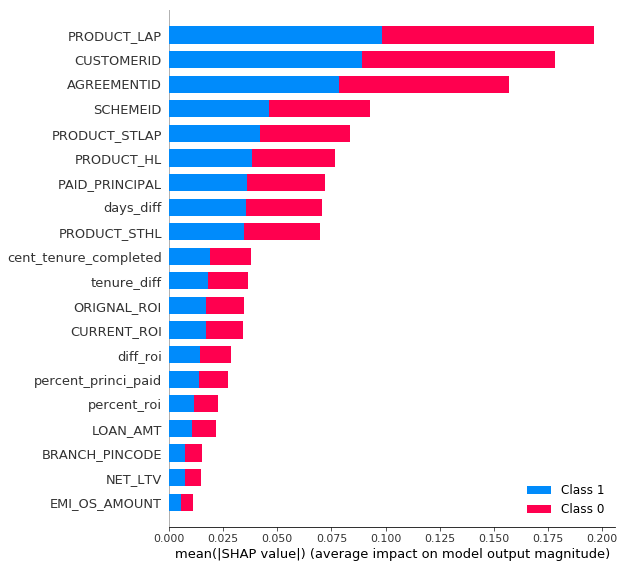

In [97]:
#checking feature importance by shap
import shap

# DF, based on which importance is checked
X_importance = x_val

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)



C:\Users\Administrator\Anaconda3\lib\site-packages\shap\plots\summary.py:229: RuntimeWarning: invalid value encountered in less
  if np.std(shaps) < (global_high - global_low) / 100:


ValueError: array must not contain infs or NaNs

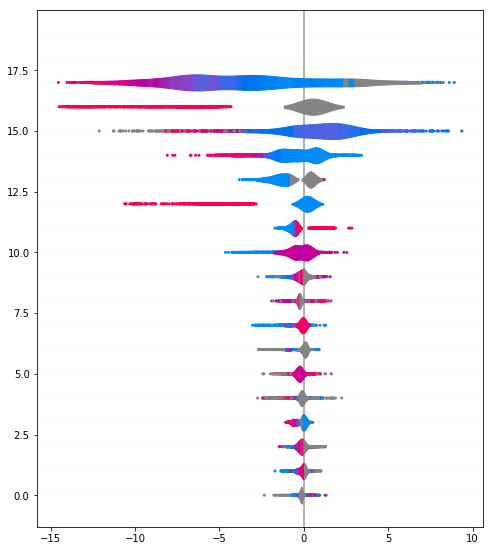

In [92]:
shap.summary_plot(shap_values, X_importance)

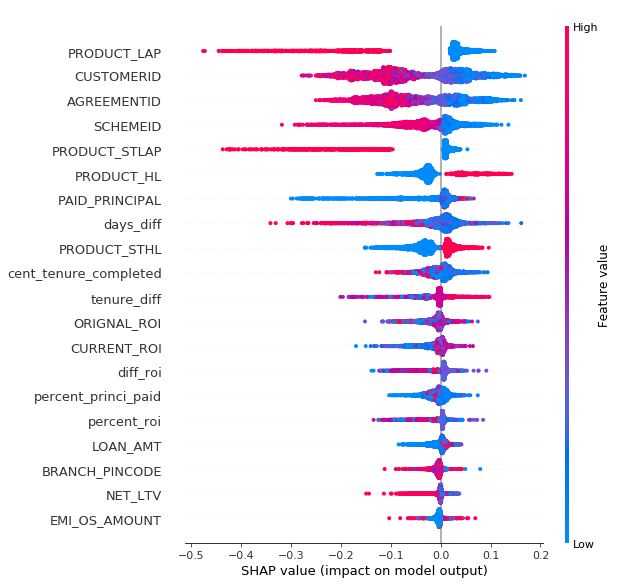

In [102]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(x_val)

shap.initjs()
shap.summary_plot(shap_values[1], X_importance)


In [426]:
#submitting one
sm = SMOTETomek()
x_train_smot, y_train_smot = sm.fit_resample(train_x_scaled_df,train_y.ravel())
x_train_smot = pd.DataFrame(x_train_smot, columns=train_x_scaled_df.columns)
print(train_x_scaled_df.shape,train_y.shape)
print(x_train_smot.shape,y_train_smot.shape)

model       = XGBClassifier(n_estimators=400,booster='gbtree',learning_rate=0.6,max_depth=15,colsample_bytree=0.9,
                                scale_pos_weight=1,random_state = 1293)
#bag = BalancedBaggingClassifier(base_estimator=model,n_estimators=5,warm_start=True)
    
model.fit(train_x_scaled_df,train_y, eval_metric='auc')

pred        = pd.DataFrame(model.predict_proba(test_x_scaled_df),columns= ['NEG','FORECLOSURE'])
pred_1      = pred[['FORECLOSURE']].reset_index(drop = True)
AGREEMENTID = pd.DataFrame(test_x['AGREEMENTID']).reset_index(drop = True)
sub_100_xg_19feat = pd.DataFrame({'AGREEMENTID' : AGREEMENTID['AGREEMENTID'],
                  'FORECLOSURE'  : pred_1['FORECLOSURE']}).sort_values('AGREEMENTID', ascending = True)
sub_100_xg_19feat.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth Edelweiss/sub_proj_1/sub_105_xg_29feat.csv', index = False)

(20012, 27) (20012,)
(36398, 27) (36398,)


In [55]:
from sklearn.pipeline import make_pipeline

In [51]:
test_x_scaled_df.columns
#test_x_scaled.columns

Index(['AGREEMENTID', 'tenure_diff', 'cent_tenure_completed', 'LOAN_AMT',
       'diff_roi', 'percent_roi', 'PRE_EMI_OS_AMOUNT', 'PAID_PRINCIPAL',
       'percent_princi_paid', 'NET_LTV', 'FOIR', 'days_diff', 'l_city',
       'count_interaction', 'SCHEMEID', 'CITY_y', 'CURRENT_ROI', 'ORIGNAL_ROI',
       'level_1', 'DUEDAY', 'EMI_OS_AMOUNT', 'DPD', 'BRANCH_PINCODE',
       'PRODUCT_HL', 'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP'],
      dtype='object')